In [34]:
import pandas as pd
dataset= pd.read_csv(r"C:\Users\rafi\Desktop\master pro\NB7_by_LA2.csv", encoding= 'unicode_escape', delimiter= ',')
print(dataset)

dataset

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
0                  0.0        1              2                   113.750000   
1                  0.0        1              4                   154.733333   
2                  0.0        2              4                    71.666667   
3                  0.0        3              4                   191.000000   
4                  0.0        4              2                   174.333333   
...                ...      ...            ...                          ...   
2372             199.0        4              3                    87.000000   
2373             200.0        1              3                    70.800000   
2374             200.0        2              3                    90.000000   
2375             200.0        3              1                    71.500000   
2376             200.0        4              3                    99.000000   

      LightingCostAveragePerDwelling  HeatingCostAv

,AverageFloorArea,Quarter,Property Type,EnergyUseAveragePerDwelling,LightingCostAveragePerDwelling,HeatingCostAveragePerDwelling,HotWaterCostAveragePerDwelling
0,0.0,1,2,113.750000,59.500000,204.750000,118.500000
1,0.0,1,4,154.733333,70.266667,292.000000,115.533333
2,0.0,2,4,71.666667,54.666667,229.666667,57.333333
3,0.0,3,4,191.000000,56.000000,200.000000,140.000000
4,0.0,4,2,174.333333,55.000000,226.333333,76.000000
...,...,...,...,...,...,...,...
2372,199.0,4,3,87.000000,99.666667,563.000000,123.333333
2373,200.0,1,3,70.800000,93.600000,455.400000,113.800000
2374,200.0,2,3,90.000000,99.000000,424.000000,137.000000
2375,200.0,3,1,71.500000,103.000000,487.000000,126.500000


In [35]:
del dataset['HeatingCostAveragePerDwelling']
del dataset['LightingCostAveragePerDwelling']

In [36]:
dataset['EnergyUseAveragePerDwelling'] = dataset['EnergyUseAveragePerDwelling'].astype(int)
dataset['AverageFloorArea'] = dataset['AverageFloorArea'].astype(int)
dataset['HotWaterCostAveragePerDwelling'] = dataset['HotWaterCostAveragePerDwelling'].astype(int)
dataset

,AverageFloorArea,Quarter,Property Type,EnergyUseAveragePerDwelling,HotWaterCostAveragePerDwelling
0,0,1,2,113,118
1,0,1,4,154,115
2,0,2,4,71,57
3,0,3,4,191,140
4,0,4,2,174,76
...,...,...,...,...,...
2372,199,4,3,87,123
2373,200,1,3,70,113
2374,200,2,3,90,137
2375,200,3,1,71,126


In [37]:
from sklearn.model_selection import train_test_split
X=dataset.drop('HotWaterCostAveragePerDwelling',axis=1)
Y=dataset['HotWaterCostAveragePerDwelling']
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3, random_state = 0)
X


,AverageFloorArea,Quarter,Property Type,EnergyUseAveragePerDwelling
0,0,1,2,113
1,0,1,4,154
2,0,2,4,71
3,0,3,4,191
4,0,4,2,174
...,...,...,...,...
2372,199,4,3,87
2373,200,1,3,70
2374,200,2,3,90
2375,200,3,1,71


## Random forest with keras tuner dense

In [5]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
RF= RandomForestRegressor(n_estimators=200,random_state=30)
RF.fit(X_train.values,Y_train.values)

RandomForestRegressor(n_estimators=200, random_state=30)

In [6]:
prediction = np.squeeze(RF.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

Prediction: 109.475


In [7]:
y_prd=RF.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

      Actual  predict  differences
898       87   90.785       -3.785
182       65   67.265       -2.265
565      103  102.665        0.335
457       69   82.315      -13.315
1852     104   94.140        9.860
...      ...      ...          ...
1812     112  111.970        0.030
913       86   89.525       -3.525
1036     104  109.155       -5.155
629       74   80.630       -6.630
61        63   83.455      -20.455

[714 rows x 3 columns]


In [8]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

-63.014999999999986
144.485
105.745
93.035
71.16
-68.89
100.075
-60.66
127.41
98.42
lower bound: -53.41592265447846
upper bound: 52.40985822870815


In [9]:
A.drop(A[(A['differences'] >52)].index, inplace=True)
A.drop(A[(A['differences'] <-53)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['HotWaterCostAveragePerDwelling']

print(B)

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
1                    0        1              4                          154   
6                    1        1              4                          213   
9                    1        4              4                          114   
10                   2        1              4                          153   
11                   2        2              4                          151   
...                ...      ...            ...                          ...   
2363               198        2              3                           96   
2367               198        4              1                          111   
2368               198        4              3                           88   
2372               199        4              3                           87   
2376               200        4              3                           99   

      Actual  predict  
1        115   89.320  
6  

In [10]:
from sklearn.model_selection import train_test_split
X1=B.drop('Actual',axis=1)
Y1=B['Actual']
X_train1, X_test1, Y_train1, Y_test1 =train_test_split(X1,Y1, test_size=0.3, random_state = 0)

In [11]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
import kerastuner
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

C:\Users\rafi\AppData\Local\Temp\ipykernel_9964\3496013807.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner


In [12]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project1',project_name='A1')

tuner.search(X_train1,Y_train1 ,epochs=100,validation_data=(X_test1,Y_test1))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model1 = tuner.hypermodel.build(best_hps)
model1.fit(X_train1, Y_train1, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project1\A1\oracle.json
INFO:tensorflow:Reloading Tuner from project1\A1\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
11/11 [==============================] - 2s 61ms/step - loss: 138.2908 - mean_absolute_error: 138.2908 - val_loss: 37.6981 - val_mean_absolute_error: 37.6981
Epoch 2/2000
11/11 [==============================] - 0s 8ms/step - loss: 28.0885 - mean_absolute_error: 28.0885 - val_loss: 16.5355 - val_mean_absolute_error: 16.5355
Epoch 3/2000
11/11 [==============================] - 0s 7ms/step - loss: 13.8692 - mean_absolute_error: 13.8692 - val_loss: 11.1534 - val_mean_absolute_error: 11.1534
Epoch 4/2000
11/11 [==============================] - 0s 8ms/step - loss: 11.0025 - mean_absolute_error: 11.0025 - val_loss: 10.6648 - val_mean_absolute_error: 10.6648
Epoch 5/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.3477 - mean_absolute_error: 10.3477 - val_loss: 10.5841 - val_mean_ab

Epoch 49/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.1148 - mean_absolute_error: 10.1148 - val_loss: 10.6675 - val_mean_absolute_error: 10.6675
Epoch 50/2000
11/11 [==============================] - 0s 12ms/step - loss: 11.5418 - mean_absolute_error: 11.5418 - val_loss: 10.3233 - val_mean_absolute_error: 10.3233
Epoch 51/2000
11/11 [==============================] - 0s 9ms/step - loss: 9.6882 - mean_absolute_error: 9.6882 - val_loss: 9.7249 - val_mean_absolute_error: 9.7249
Epoch 52/2000
11/11 [==============================] - 0s 8ms/step - loss: 10.2184 - mean_absolute_error: 10.2184 - val_loss: 14.1478 - val_mean_absolute_error: 14.1478
Epoch 53/2000
11/11 [==============================] - 0s 12ms/step - loss: 11.4428 - mean_absolute_error: 11.4428 - val_loss: 11.9157 - val_mean_absolute_error: 11.9157
Epoch 54/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.9422 - mean_absolute_error: 10.9422 - val_loss: 9.6923 - val_mean_absolute_er

Epoch 98/2000
11/11 [==============================] - 0s 12ms/step - loss: 9.3466 - mean_absolute_error: 9.3466 - val_loss: 9.7042 - val_mean_absolute_error: 9.7042
Epoch 99/2000
11/11 [==============================] - 0s 9ms/step - loss: 10.2444 - mean_absolute_error: 10.2444 - val_loss: 10.6522 - val_mean_absolute_error: 10.6522
Epoch 100/2000
11/11 [==============================] - 0s 11ms/step - loss: 9.6249 - mean_absolute_error: 9.6249 - val_loss: 10.0055 - val_mean_absolute_error: 10.0055
Epoch 101/2000
11/11 [==============================] - 0s 13ms/step - loss: 9.5855 - mean_absolute_error: 9.5855 - val_loss: 9.6980 - val_mean_absolute_error: 9.6980
Epoch 102/2000
11/11 [==============================] - 0s 11ms/step - loss: 9.8332 - mean_absolute_error: 9.8332 - val_loss: 12.3267 - val_mean_absolute_error: 12.3267
Epoch 103/2000
11/11 [==============================] - 0s 8ms/step - loss: 10.5189 - mean_absolute_error: 10.5189 - val_loss: 9.7793 - val_mean_absolute_error:

Epoch 195/2000
11/11 [==============================] - 0s 16ms/step - loss: 10.6313 - mean_absolute_error: 10.6313 - val_loss: 10.6326 - val_mean_absolute_error: 10.6326
Epoch 196/2000
11/11 [==============================] - 0s 14ms/step - loss: 11.8511 - mean_absolute_error: 11.8511 - val_loss: 9.6978 - val_mean_absolute_error: 9.6978
Epoch 197/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.3430 - mean_absolute_error: 10.3430 - val_loss: 9.8336 - val_mean_absolute_error: 9.8336
Epoch 198/2000
11/11 [==============================] - 0s 10ms/step - loss: 9.5335 - mean_absolute_error: 9.5335 - val_loss: 10.3447 - val_mean_absolute_error: 10.3447
Epoch 199/2000
11/11 [==============================] - 0s 9ms/step - loss: 9.7128 - mean_absolute_error: 9.7128 - val_loss: 9.7778 - val_mean_absolute_error: 9.7778
Epoch 200/2000
11/11 [==============================] - 0s 10ms/step - loss: 9.2914 - mean_absolute_error: 9.2914 - val_loss: 10.0496 - val_mean_absolute_er

Epoch 244/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.5657 - mean_absolute_error: 10.5657 - val_loss: 9.7699 - val_mean_absolute_error: 9.7699
Epoch 245/2000
11/11 [==============================] - 0s 14ms/step - loss: 10.3264 - mean_absolute_error: 10.3264 - val_loss: 9.6990 - val_mean_absolute_error: 9.6990
Epoch 246/2000
11/11 [==============================] - 0s 10ms/step - loss: 9.3441 - mean_absolute_error: 9.3441 - val_loss: 11.1299 - val_mean_absolute_error: 11.1299
Epoch 247/2000
11/11 [==============================] - 0s 14ms/step - loss: 10.3711 - mean_absolute_error: 10.3711 - val_loss: 10.9876 - val_mean_absolute_error: 10.9876
Epoch 248/2000
11/11 [==============================] - 0s 13ms/step - loss: 10.7465 - mean_absolute_error: 10.7465 - val_loss: 11.1568 - val_mean_absolute_error: 11.1568
Epoch 249/2000
11/11 [==============================] - 0s 21ms/step - loss: 10.6535 - mean_absolute_error: 10.6535 - val_loss: 10.4622 - val_mean_abso

Epoch 341/2000
11/11 [==============================] - 0s 16ms/step - loss: 11.0338 - mean_absolute_error: 11.0338 - val_loss: 12.5078 - val_mean_absolute_error: 12.5078
Epoch 342/2000
11/11 [==============================] - 0s 22ms/step - loss: 10.6045 - mean_absolute_error: 10.6045 - val_loss: 9.7394 - val_mean_absolute_error: 9.7394
Epoch 343/2000
11/11 [==============================] - 0s 19ms/step - loss: 9.6673 - mean_absolute_error: 9.6673 - val_loss: 10.3669 - val_mean_absolute_error: 10.3669
Epoch 344/2000
11/11 [==============================] - 0s 21ms/step - loss: 9.8604 - mean_absolute_error: 9.8604 - val_loss: 9.9644 - val_mean_absolute_error: 9.9644
Epoch 345/2000
11/11 [==============================] - 0s 15ms/step - loss: 9.2640 - mean_absolute_error: 9.2640 - val_loss: 9.8302 - val_mean_absolute_error: 9.8302
Epoch 346/2000
11/11 [==============================] - 0s 12ms/step - loss: 9.1709 - mean_absolute_error: 9.1709 - val_loss: 9.7596 - val_mean_absolute_erro

11/11 [==============================] - 0s 19ms/step - loss: 9.6097 - mean_absolute_error: 9.6097 - val_loss: 9.9285 - val_mean_absolute_error: 9.9285
Epoch 438/2000
11/11 [==============================] - 0s 13ms/step - loss: 9.2360 - mean_absolute_error: 9.2360 - val_loss: 10.0243 - val_mean_absolute_error: 10.0243
Epoch 439/2000
11/11 [==============================] - 0s 10ms/step - loss: 9.7589 - mean_absolute_error: 9.7589 - val_loss: 9.8132 - val_mean_absolute_error: 9.8132
Epoch 440/2000
11/11 [==============================] - 0s 10ms/step - loss: 9.5873 - mean_absolute_error: 9.5873 - val_loss: 10.0471 - val_mean_absolute_error: 10.0471
Epoch 441/2000
11/11 [==============================] - 0s 10ms/step - loss: 9.8758 - mean_absolute_error: 9.8758 - val_loss: 11.8326 - val_mean_absolute_error: 11.8326
Epoch 442/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.2295 - mean_absolute_error: 10.2295 - val_loss: 10.0780 - val_mean_absolute_error: 10.0780
Epo

Epoch 486/2000
11/11 [==============================] - 0s 17ms/step - loss: 9.3855 - mean_absolute_error: 9.3855 - val_loss: 10.0055 - val_mean_absolute_error: 10.0055
Epoch 487/2000
11/11 [==============================] - 0s 11ms/step - loss: 9.7266 - mean_absolute_error: 9.7266 - val_loss: 9.8956 - val_mean_absolute_error: 9.8956
Epoch 488/2000
11/11 [==============================] - 0s 10ms/step - loss: 9.5913 - mean_absolute_error: 9.5913 - val_loss: 10.3348 - val_mean_absolute_error: 10.3348
Epoch 489/2000
11/11 [==============================] - 0s 13ms/step - loss: 9.6926 - mean_absolute_error: 9.6926 - val_loss: 9.8208 - val_mean_absolute_error: 9.8208
Epoch 490/2000
11/11 [==============================] - 0s 16ms/step - loss: 9.5642 - mean_absolute_error: 9.5642 - val_loss: 10.4531 - val_mean_absolute_error: 10.4531
Epoch 491/2000
11/11 [==============================] - 0s 12ms/step - loss: 9.8703 - mean_absolute_error: 9.8703 - val_loss: 9.8182 - val_mean_absolute_error:

Epoch 535/2000
11/11 [==============================] - 0s 9ms/step - loss: 9.5496 - mean_absolute_error: 9.5496 - val_loss: 10.0572 - val_mean_absolute_error: 10.0572
Epoch 536/2000
11/11 [==============================] - 0s 10ms/step - loss: 9.1414 - mean_absolute_error: 9.1414 - val_loss: 9.9540 - val_mean_absolute_error: 9.9540
Epoch 537/2000
11/11 [==============================] - 0s 9ms/step - loss: 9.4954 - mean_absolute_error: 9.4954 - val_loss: 11.3631 - val_mean_absolute_error: 11.3631
Epoch 538/2000
11/11 [==============================] - 0s 9ms/step - loss: 9.6208 - mean_absolute_error: 9.6208 - val_loss: 10.8728 - val_mean_absolute_error: 10.8728
Epoch 539/2000
11/11 [==============================] - 0s 9ms/step - loss: 9.9175 - mean_absolute_error: 9.9175 - val_loss: 11.6341 - val_mean_absolute_error: 11.6341
Epoch 540/2000
11/11 [==============================] - 0s 8ms/step - loss: 9.5349 - mean_absolute_error: 9.5349 - val_loss: 10.1792 - val_mean_absolute_error: 1

Epoch 584/2000
11/11 [==============================] - 0s 9ms/step - loss: 10.8802 - mean_absolute_error: 10.8802 - val_loss: 11.1860 - val_mean_absolute_error: 11.1860
Epoch 585/2000
11/11 [==============================] - 0s 7ms/step - loss: 9.9721 - mean_absolute_error: 9.9721 - val_loss: 11.6396 - val_mean_absolute_error: 11.6396
Epoch 586/2000
11/11 [==============================] - 0s 7ms/step - loss: 10.2242 - mean_absolute_error: 10.2242 - val_loss: 11.9341 - val_mean_absolute_error: 11.9341
Epoch 587/2000
11/11 [==============================] - 0s 8ms/step - loss: 9.9411 - mean_absolute_error: 9.9411 - val_loss: 10.1616 - val_mean_absolute_error: 10.1616
Epoch 588/2000
11/11 [==============================] - 0s 9ms/step - loss: 9.1367 - mean_absolute_error: 9.1367 - val_loss: 10.0555 - val_mean_absolute_error: 10.0555
Epoch 589/2000
11/11 [==============================] - 0s 7ms/step - loss: 9.4217 - mean_absolute_error: 9.4217 - val_loss: 9.9039 - val_mean_absolute_erro

Epoch 633/2000
11/11 [==============================] - 0s 7ms/step - loss: 9.4913 - mean_absolute_error: 9.4913 - val_loss: 10.2186 - val_mean_absolute_error: 10.2186
Epoch 634/2000
11/11 [==============================] - 0s 8ms/step - loss: 9.1458 - mean_absolute_error: 9.1458 - val_loss: 10.0097 - val_mean_absolute_error: 10.0097
Epoch 635/2000
11/11 [==============================] - 0s 10ms/step - loss: 9.4161 - mean_absolute_error: 9.4161 - val_loss: 10.7926 - val_mean_absolute_error: 10.7926
Epoch 636/2000
11/11 [==============================] - 0s 8ms/step - loss: 9.3449 - mean_absolute_error: 9.3449 - val_loss: 10.7929 - val_mean_absolute_error: 10.7929
Epoch 637/2000
11/11 [==============================] - 0s 7ms/step - loss: 10.3703 - mean_absolute_error: 10.3703 - val_loss: 10.2447 - val_mean_absolute_error: 10.2447
Epoch 638/2000
11/11 [==============================] - 0s 7ms/step - loss: 9.4744 - mean_absolute_error: 9.4744 - val_loss: 10.0002 - val_mean_absolute_erro

Epoch 682/2000
11/11 [==============================] - 0s 7ms/step - loss: 9.8548 - mean_absolute_error: 9.8548 - val_loss: 10.3141 - val_mean_absolute_error: 10.3141
Epoch 683/2000
11/11 [==============================] - 0s 8ms/step - loss: 9.7957 - mean_absolute_error: 9.7957 - val_loss: 10.0009 - val_mean_absolute_error: 10.0009
Epoch 684/2000
11/11 [==============================] - 0s 8ms/step - loss: 10.2547 - mean_absolute_error: 10.2547 - val_loss: 9.9995 - val_mean_absolute_error: 9.9995
Epoch 685/2000
11/11 [==============================] - 0s 8ms/step - loss: 9.6980 - mean_absolute_error: 9.6980 - val_loss: 9.9935 - val_mean_absolute_error: 9.9935
Epoch 686/2000
11/11 [==============================] - 0s 9ms/step - loss: 9.2759 - mean_absolute_error: 9.2759 - val_loss: 10.3015 - val_mean_absolute_error: 10.3015
Epoch 687/2000
11/11 [==============================] - 0s 12ms/step - loss: 9.8183 - mean_absolute_error: 9.8183 - val_loss: 10.5273 - val_mean_absolute_error: 1

11/11 [==============================] - 0s 26ms/step - loss: 10.9065 - mean_absolute_error: 10.9065 - val_loss: 11.3552 - val_mean_absolute_error: 11.3552
Epoch 779/2000
11/11 [==============================] - 0s 24ms/step - loss: 10.4544 - mean_absolute_error: 10.4544 - val_loss: 9.9860 - val_mean_absolute_error: 9.9860
Epoch 780/2000
11/11 [==============================] - 0s 19ms/step - loss: 11.3180 - mean_absolute_error: 11.3180 - val_loss: 10.0145 - val_mean_absolute_error: 10.0145
Epoch 781/2000
11/11 [==============================] - 0s 22ms/step - loss: 9.2245 - mean_absolute_error: 9.2245 - val_loss: 10.2818 - val_mean_absolute_error: 10.2818
Epoch 782/2000
11/11 [==============================] - 0s 18ms/step - loss: 9.2363 - mean_absolute_error: 9.2363 - val_loss: 10.0954 - val_mean_absolute_error: 10.0954
Epoch 783/2000
11/11 [==============================] - 0s 12ms/step - loss: 9.2135 - mean_absolute_error: 9.2135 - val_loss: 10.0178 - val_mean_absolute_error: 10.01

11/11 [==============================] - 0s 19ms/step - loss: 9.0976 - mean_absolute_error: 9.0976 - val_loss: 10.1593 - val_mean_absolute_error: 10.1593
Epoch 875/2000
11/11 [==============================] - 0s 16ms/step - loss: 9.6151 - mean_absolute_error: 9.6151 - val_loss: 11.6469 - val_mean_absolute_error: 11.6469
Epoch 876/2000
11/11 [==============================] - 0s 20ms/step - loss: 9.6789 - mean_absolute_error: 9.6789 - val_loss: 10.1330 - val_mean_absolute_error: 10.1330
Epoch 877/2000
11/11 [==============================] - 0s 24ms/step - loss: 9.0525 - mean_absolute_error: 9.0525 - val_loss: 10.3791 - val_mean_absolute_error: 10.3791
Epoch 878/2000
11/11 [==============================] - 0s 21ms/step - loss: 10.2084 - mean_absolute_error: 10.2084 - val_loss: 12.5988 - val_mean_absolute_error: 12.5988
Epoch 879/2000
11/11 [==============================] - 0s 20ms/step - loss: 9.6693 - mean_absolute_error: 9.6693 - val_loss: 10.4672 - val_mean_absolute_error: 10.4672

11/11 [==============================] - 0s 20ms/step - loss: 9.4592 - mean_absolute_error: 9.4592 - val_loss: 10.2875 - val_mean_absolute_error: 10.2875
Epoch 971/2000
11/11 [==============================] - 0s 22ms/step - loss: 9.1597 - mean_absolute_error: 9.1597 - val_loss: 10.3161 - val_mean_absolute_error: 10.3161
Epoch 972/2000
11/11 [==============================] - 0s 15ms/step - loss: 9.3537 - mean_absolute_error: 9.3537 - val_loss: 10.8094 - val_mean_absolute_error: 10.8094
Epoch 973/2000
11/11 [==============================] - 0s 15ms/step - loss: 9.3963 - mean_absolute_error: 9.3963 - val_loss: 10.3775 - val_mean_absolute_error: 10.3775
Epoch 974/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.4425 - mean_absolute_error: 9.4425 - val_loss: 11.8323 - val_mean_absolute_error: 11.8323
Epoch 975/2000
11/11 [==============================] - 0s 31ms/step - loss: 9.6736 - mean_absolute_error: 9.6736 - val_loss: 10.3988 - val_mean_absolute_error: 10.3988
E

11/11 [==============================] - 0s 24ms/step - loss: 9.3238 - mean_absolute_error: 9.3238 - val_loss: 11.1772 - val_mean_absolute_error: 11.1772
Epoch 1067/2000
11/11 [==============================] - 0s 43ms/step - loss: 9.3628 - mean_absolute_error: 9.3628 - val_loss: 10.4439 - val_mean_absolute_error: 10.4439
Epoch 1068/2000
11/11 [==============================] - 0s 24ms/step - loss: 9.7939 - mean_absolute_error: 9.7939 - val_loss: 12.3841 - val_mean_absolute_error: 12.3841
Epoch 1069/2000
11/11 [==============================] - 0s 38ms/step - loss: 10.6289 - mean_absolute_error: 10.6289 - val_loss: 10.2537 - val_mean_absolute_error: 10.2537
Epoch 1070/2000
11/11 [==============================] - 0s 30ms/step - loss: 9.4164 - mean_absolute_error: 9.4164 - val_loss: 10.2785 - val_mean_absolute_error: 10.2785
Epoch 1071/2000
11/11 [==============================] - 0s 23ms/step - loss: 9.8525 - mean_absolute_error: 9.8525 - val_loss: 10.3611 - val_mean_absolute_error: 10

11/11 [==============================] - 0s 34ms/step - loss: 9.1461 - mean_absolute_error: 9.1461 - val_loss: 10.2775 - val_mean_absolute_error: 10.2775
Epoch 1163/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.5414 - mean_absolute_error: 9.5414 - val_loss: 11.6845 - val_mean_absolute_error: 11.6845
Epoch 1164/2000
11/11 [==============================] - 0s 42ms/step - loss: 10.3483 - mean_absolute_error: 10.3483 - val_loss: 11.7588 - val_mean_absolute_error: 11.7588
Epoch 1165/2000
11/11 [==============================] - 0s 33ms/step - loss: 10.4269 - mean_absolute_error: 10.4269 - val_loss: 12.4631 - val_mean_absolute_error: 12.4631
Epoch 1166/2000
11/11 [==============================] - 0s 30ms/step - loss: 10.0535 - mean_absolute_error: 10.0535 - val_loss: 10.5886 - val_mean_absolute_error: 10.5886
Epoch 1167/2000
11/11 [==============================] - 0s 32ms/step - loss: 9.5232 - mean_absolute_error: 9.5232 - val_loss: 10.4363 - val_mean_absolute_error

11/11 [==============================] - 0s 42ms/step - loss: 9.8890 - mean_absolute_error: 9.8890 - val_loss: 11.0184 - val_mean_absolute_error: 11.0184
Epoch 1259/2000
11/11 [==============================] - 0s 22ms/step - loss: 11.0189 - mean_absolute_error: 11.0189 - val_loss: 10.5520 - val_mean_absolute_error: 10.5520
Epoch 1260/2000
11/11 [==============================] - 0s 27ms/step - loss: 10.7607 - mean_absolute_error: 10.7607 - val_loss: 11.8324 - val_mean_absolute_error: 11.8324
Epoch 1261/2000
11/11 [==============================] - 0s 23ms/step - loss: 10.0348 - mean_absolute_error: 10.0348 - val_loss: 11.1172 - val_mean_absolute_error: 11.1172
Epoch 1262/2000
11/11 [==============================] - 0s 22ms/step - loss: 10.5133 - mean_absolute_error: 10.5133 - val_loss: 10.6863 - val_mean_absolute_error: 10.6863
Epoch 1263/2000
11/11 [==============================] - 0s 26ms/step - loss: 9.2529 - mean_absolute_error: 9.2529 - val_loss: 10.5763 - val_mean_absolute_err

11/11 [==============================] - 0s 35ms/step - loss: 9.3289 - mean_absolute_error: 9.3289 - val_loss: 10.3242 - val_mean_absolute_error: 10.3242
Epoch 1355/2000
11/11 [==============================] - 0s 26ms/step - loss: 9.3029 - mean_absolute_error: 9.3029 - val_loss: 10.4780 - val_mean_absolute_error: 10.4780
Epoch 1356/2000
11/11 [==============================] - 0s 19ms/step - loss: 10.1412 - mean_absolute_error: 10.1412 - val_loss: 10.4554 - val_mean_absolute_error: 10.4554
Epoch 1357/2000
11/11 [==============================] - 0s 19ms/step - loss: 10.5162 - mean_absolute_error: 10.5162 - val_loss: 10.3795 - val_mean_absolute_error: 10.3795
Epoch 1358/2000
11/11 [==============================] - 0s 32ms/step - loss: 10.6713 - mean_absolute_error: 10.6713 - val_loss: 11.4942 - val_mean_absolute_error: 11.4942
Epoch 1359/2000
11/11 [==============================] - 0s 42ms/step - loss: 10.2840 - mean_absolute_error: 10.2840 - val_loss: 10.6325 - val_mean_absolute_err

11/11 [==============================] - 1s 54ms/step - loss: 9.4828 - mean_absolute_error: 9.4828 - val_loss: 10.3545 - val_mean_absolute_error: 10.3545
Epoch 1451/2000
11/11 [==============================] - 0s 37ms/step - loss: 9.4230 - mean_absolute_error: 9.4230 - val_loss: 10.8705 - val_mean_absolute_error: 10.8705
Epoch 1452/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.3273 - mean_absolute_error: 9.3273 - val_loss: 10.9233 - val_mean_absolute_error: 10.9233
Epoch 1453/2000
11/11 [==============================] - 0s 25ms/step - loss: 10.0215 - mean_absolute_error: 10.0215 - val_loss: 10.3578 - val_mean_absolute_error: 10.3578
Epoch 1454/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.2860 - mean_absolute_error: 9.2860 - val_loss: 10.5541 - val_mean_absolute_error: 10.5541
Epoch 1455/2000
11/11 [==============================] - 0s 47ms/step - loss: 9.8112 - mean_absolute_error: 9.8112 - val_loss: 10.3666 - val_mean_absolute_error: 10

11/11 [==============================] - 0s 41ms/step - loss: 9.7191 - mean_absolute_error: 9.7191 - val_loss: 10.5740 - val_mean_absolute_error: 10.5740
Epoch 1547/2000
11/11 [==============================] - 0s 48ms/step - loss: 10.0274 - mean_absolute_error: 10.0274 - val_loss: 10.8729 - val_mean_absolute_error: 10.8729
Epoch 1548/2000
11/11 [==============================] - 1s 51ms/step - loss: 9.8836 - mean_absolute_error: 9.8836 - val_loss: 10.6163 - val_mean_absolute_error: 10.6163
Epoch 1549/2000
11/11 [==============================] - 1s 59ms/step - loss: 9.8758 - mean_absolute_error: 9.8758 - val_loss: 11.9446 - val_mean_absolute_error: 11.9446
Epoch 1550/2000
11/11 [==============================] - 0s 48ms/step - loss: 10.0191 - mean_absolute_error: 10.0191 - val_loss: 10.6071 - val_mean_absolute_error: 10.6071
Epoch 1551/2000
11/11 [==============================] - 0s 27ms/step - loss: 9.4291 - mean_absolute_error: 9.4291 - val_loss: 10.8040 - val_mean_absolute_error: 

11/11 [==============================] - 0s 21ms/step - loss: 10.3552 - mean_absolute_error: 10.3552 - val_loss: 11.5569 - val_mean_absolute_error: 11.5569
Epoch 1643/2000
11/11 [==============================] - 0s 31ms/step - loss: 9.7276 - mean_absolute_error: 9.7276 - val_loss: 10.4394 - val_mean_absolute_error: 10.4394
Epoch 1644/2000
11/11 [==============================] - 1s 55ms/step - loss: 9.3354 - mean_absolute_error: 9.3354 - val_loss: 10.5854 - val_mean_absolute_error: 10.5854
Epoch 1645/2000
11/11 [==============================] - 1s 59ms/step - loss: 9.2634 - mean_absolute_error: 9.2634 - val_loss: 10.4516 - val_mean_absolute_error: 10.4516
Epoch 1646/2000
11/11 [==============================] - 0s 48ms/step - loss: 9.3006 - mean_absolute_error: 9.3006 - val_loss: 10.4255 - val_mean_absolute_error: 10.4255
Epoch 1647/2000
11/11 [==============================] - 1s 51ms/step - loss: 9.5951 - mean_absolute_error: 9.5951 - val_loss: 10.7207 - val_mean_absolute_error: 10

11/11 [==============================] - 0s 46ms/step - loss: 9.6427 - mean_absolute_error: 9.6427 - val_loss: 10.4071 - val_mean_absolute_error: 10.4071
Epoch 1739/2000
11/11 [==============================] - 0s 44ms/step - loss: 9.3655 - mean_absolute_error: 9.3655 - val_loss: 11.5743 - val_mean_absolute_error: 11.5743
Epoch 1740/2000
11/11 [==============================] - 0s 43ms/step - loss: 10.3351 - mean_absolute_error: 10.3351 - val_loss: 10.8800 - val_mean_absolute_error: 10.8800
Epoch 1741/2000
11/11 [==============================] - 0s 31ms/step - loss: 9.9593 - mean_absolute_error: 9.9593 - val_loss: 10.4083 - val_mean_absolute_error: 10.4083
Epoch 1742/2000
11/11 [==============================] - 0s 32ms/step - loss: 9.9339 - mean_absolute_error: 9.9339 - val_loss: 12.4139 - val_mean_absolute_error: 12.4139
Epoch 1743/2000
11/11 [==============================] - 0s 36ms/step - loss: 10.2944 - mean_absolute_error: 10.2944 - val_loss: 11.2181 - val_mean_absolute_error: 

11/11 [==============================] - 0s 48ms/step - loss: 9.8673 - mean_absolute_error: 9.8673 - val_loss: 10.5927 - val_mean_absolute_error: 10.5927
Epoch 1835/2000
11/11 [==============================] - 1s 67ms/step - loss: 9.3428 - mean_absolute_error: 9.3428 - val_loss: 10.5077 - val_mean_absolute_error: 10.5077
Epoch 1836/2000
11/11 [==============================] - 1s 69ms/step - loss: 9.7419 - mean_absolute_error: 9.7419 - val_loss: 10.5889 - val_mean_absolute_error: 10.5889
Epoch 1837/2000
11/11 [==============================] - 0s 20ms/step - loss: 9.3549 - mean_absolute_error: 9.3549 - val_loss: 11.5861 - val_mean_absolute_error: 11.5861
Epoch 1838/2000
11/11 [==============================] - 0s 41ms/step - loss: 10.6978 - mean_absolute_error: 10.6978 - val_loss: 10.4515 - val_mean_absolute_error: 10.4515
Epoch 1839/2000
11/11 [==============================] - 1s 58ms/step - loss: 10.2018 - mean_absolute_error: 10.2018 - val_loss: 10.4216 - val_mean_absolute_error: 

11/11 [==============================] - 0s 38ms/step - loss: 9.2357 - mean_absolute_error: 9.2357 - val_loss: 10.4986 - val_mean_absolute_error: 10.4986
Epoch 1931/2000
11/11 [==============================] - 1s 59ms/step - loss: 9.1652 - mean_absolute_error: 9.1652 - val_loss: 10.4836 - val_mean_absolute_error: 10.4836
Epoch 1932/2000
11/11 [==============================] - 0s 44ms/step - loss: 9.1302 - mean_absolute_error: 9.1302 - val_loss: 10.5037 - val_mean_absolute_error: 10.5037
Epoch 1933/2000
11/11 [==============================] - 0s 39ms/step - loss: 9.3134 - mean_absolute_error: 9.3134 - val_loss: 10.9564 - val_mean_absolute_error: 10.9564
Epoch 1934/2000
11/11 [==============================] - 1s 57ms/step - loss: 9.3896 - mean_absolute_error: 9.3896 - val_loss: 10.5475 - val_mean_absolute_error: 10.5475
Epoch 1935/2000
11/11 [==============================] - 0s 49ms/step - loss: 9.3653 - mean_absolute_error: 9.3653 - val_loss: 11.4133 - val_mean_absolute_error: 11.4

7/7 [==============================] - 1s 3ms/step
r2_score: 0.5924388049333996
7/7 [==============================] - 0s 3ms/step
mean squired error: 182.23861602202342
mean absolute error: 9.403623499576515
7/7 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'Actual vs predicted')

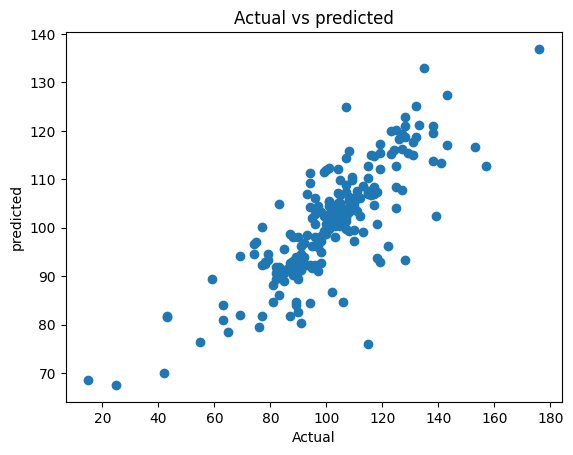

In [13]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test1, np.squeeze(model1.predict(X_test1)) )
print('r2_score:', r2_score)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test1, np.squeeze(model1.predict(X_test1)) )
mae= mean_absolute_error(Y_test1, np.squeeze(model1.predict(X_test1)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test1, np.squeeze(model1.predict(X_test1)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [14]:
prediction1 =np.squeeze(model1.predict([[80,2,2,129,prediction]]))
print("Prediction: {}".format(prediction1))

y_prd=np.squeeze(np.squeeze(model1.predict(X_test1)) )
predic_dif=pd.DataFrame({'Actual':Y_test1,'predict':y_prd,"differences":Y_test1-y_prd})
predic_dif[0:15]

1/1 [==============================] - 1s 1s/step
Prediction: 105.28651428222656
7/7 [==============================] - 0s 2ms/step


,Actual,predict,differences
1839,111,106.781235,4.218765
1632,107,114.406845,-7.406845
1860,128,118.828941,9.171059
2043,108,106.300735,1.699265
1765,124,115.964966,8.035034
33,87,81.720428,5.279572
117,115,75.996918,39.003082
1255,119,112.035675,6.964325
1063,104,105.014786,-1.014786
1712,100,112.003799,-12.003799


## RNN with Keras tuner dense

In [19]:
from keras.layers import Dense, Dropout,Activation, LSTM
from keras.models import Sequential
model2=Sequential()
model2.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units=64, activation='relu', return_sequences=True))
model2.add(Dropout(0.3))
model2.add(LSTM(units=32, activation='relu', return_sequences=True))
model2.add(Dropout(0.4))
model2.add(LSTM(units=64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(units=1))
model2.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 4, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 64)             49408     
                                                                 
 dropout_1 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 4, 32)             12416     
                                                                 
 dropout_2 (Dropout)         (None, 4, 32)             0         
                                                                 
 lstm_3 (LSTM)               (None, 64)               

In [20]:
model2.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 9s 40ms/step - loss: 7686.3022 - mae: 80.7390 - val_loss: 2717.9766 - val_mae: 46.6832
Epoch 2/2000
37/37 [==============================] - 1s 15ms/step - loss: 2698.3042 - mae: 43.2514 - val_loss: 1273.1476 - val_mae: 30.0019
Epoch 3/2000
37/37 [==============================] - 1s 15ms/step - loss: 1648.8650 - mae: 32.1830 - val_loss: 648.4894 - val_mae: 17.7421
Epoch 4/2000
37/37 [==============================] - 1s 15ms/step - loss: 1475.2643 - mae: 30.3142 - val_loss: 1317.9333 - val_mae: 30.6469
Epoch 5/2000
37/37 [==============================] - 1s 16ms/step - loss: 1307.8828 - mae: 28.6634 - val_loss: 1468.9326 - val_mae: 32.7516
Epoch 6/2000
37/37 [==============================] - 1s 17ms/step - loss: 1185.0286 - mae: 27.7549 - val_loss: 662.9528 - val_mae: 18.5054
Epoch 7/2000
37/37 [==============================] - 1s 15ms/step - loss: 1046.5588 - mae: 25.4581 - val_loss: 996.5588 - val_mae: 25.8223
Epoch 8/2000
37/

37/37 [==============================] - 1s 16ms/step - loss: 526.5532 - mae: 17.6661 - val_loss: 400.5688 - val_mae: 13.5400
Epoch 60/2000
37/37 [==============================] - 1s 16ms/step - loss: 574.0055 - mae: 18.3487 - val_loss: 471.6241 - val_mae: 15.2208
Epoch 61/2000
37/37 [==============================] - 1s 16ms/step - loss: 529.6605 - mae: 17.4614 - val_loss: 367.5337 - val_mae: 12.7397
Epoch 62/2000
37/37 [==============================] - 1s 16ms/step - loss: 534.8696 - mae: 17.7702 - val_loss: 343.3089 - val_mae: 12.2648
Epoch 63/2000
37/37 [==============================] - 1s 15ms/step - loss: 537.0273 - mae: 17.8608 - val_loss: 326.9332 - val_mae: 11.9761
Epoch 64/2000
37/37 [==============================] - 1s 15ms/step - loss: 555.2773 - mae: 18.1807 - val_loss: 331.7732 - val_mae: 12.0921
Epoch 65/2000
37/37 [==============================] - 1s 15ms/step - loss: 555.2305 - mae: 18.1476 - val_loss: 417.9495 - val_mae: 13.9978
Epoch 66/2000
37/37 [=============

37/37 [==============================] - 1s 17ms/step - loss: 457.8640 - mae: 16.2504 - val_loss: 343.8273 - val_mae: 12.3475
Epoch 118/2000
37/37 [==============================] - 1s 16ms/step - loss: 479.7917 - mae: 16.6207 - val_loss: 341.9120 - val_mae: 12.3301
Epoch 119/2000
37/37 [==============================] - 1s 16ms/step - loss: 480.2818 - mae: 16.5655 - val_loss: 371.4299 - val_mae: 13.1998
Epoch 120/2000
37/37 [==============================] - 1s 17ms/step - loss: 486.6796 - mae: 16.8309 - val_loss: 344.1272 - val_mae: 12.7437
Epoch 121/2000
37/37 [==============================] - 1s 16ms/step - loss: 471.2284 - mae: 16.5045 - val_loss: 311.4951 - val_mae: 11.5266
Epoch 122/2000
37/37 [==============================] - 1s 16ms/step - loss: 517.0489 - mae: 17.3481 - val_loss: 306.1767 - val_mae: 11.3963
Epoch 123/2000
37/37 [==============================] - 1s 16ms/step - loss: 454.9814 - mae: 16.2466 - val_loss: 332.1864 - val_mae: 12.1192
Epoch 124/2000
37/37 [======

37/37 [==============================] - 1s 16ms/step - loss: 455.7517 - mae: 16.2472 - val_loss: 306.0849 - val_mae: 11.2232
Epoch 176/2000
37/37 [==============================] - 1s 16ms/step - loss: 434.6290 - mae: 15.8837 - val_loss: 293.0130 - val_mae: 11.0148
Epoch 177/2000
37/37 [==============================] - 1s 17ms/step - loss: 451.1795 - mae: 15.9790 - val_loss: 321.1222 - val_mae: 11.7003
Epoch 178/2000
37/37 [==============================] - 1s 16ms/step - loss: 443.3154 - mae: 16.0300 - val_loss: 344.2586 - val_mae: 12.4558
Epoch 179/2000
37/37 [==============================] - 1s 16ms/step - loss: 416.9531 - mae: 15.6122 - val_loss: 309.0218 - val_mae: 11.3361
Epoch 180/2000
37/37 [==============================] - 1s 16ms/step - loss: 445.0092 - mae: 15.9236 - val_loss: 292.8348 - val_mae: 11.1238
Epoch 181/2000
37/37 [==============================] - 1s 16ms/step - loss: 455.9805 - mae: 16.1750 - val_loss: 504.6808 - val_mae: 17.1021
Epoch 182/2000
37/37 [======

37/37 [==============================] - 1s 16ms/step - loss: 441.7057 - mae: 15.7010 - val_loss: 298.2154 - val_mae: 10.9200
Epoch 234/2000
37/37 [==============================] - 1s 16ms/step - loss: 433.9134 - mae: 15.6039 - val_loss: 310.3757 - val_mae: 11.4463
Epoch 235/2000
37/37 [==============================] - 1s 17ms/step - loss: 418.4136 - mae: 15.5269 - val_loss: 425.7954 - val_mae: 15.6157
Epoch 236/2000
37/37 [==============================] - 1s 16ms/step - loss: 443.1641 - mae: 15.8847 - val_loss: 337.4900 - val_mae: 12.2765
Epoch 237/2000
37/37 [==============================] - 1s 17ms/step - loss: 435.6911 - mae: 15.3802 - val_loss: 309.3316 - val_mae: 11.4061
Epoch 238/2000
37/37 [==============================] - 1s 16ms/step - loss: 437.1747 - mae: 15.8132 - val_loss: 324.7157 - val_mae: 11.8799
Epoch 239/2000
37/37 [==============================] - 1s 16ms/step - loss: 419.3009 - mae: 15.3689 - val_loss: 324.3609 - val_mae: 11.8355
Epoch 240/2000
37/37 [======

37/37 [==============================] - 1s 17ms/step - loss: 398.0334 - mae: 15.0268 - val_loss: 334.2162 - val_mae: 11.7965
Epoch 292/2000
37/37 [==============================] - 1s 16ms/step - loss: 433.7164 - mae: 15.7818 - val_loss: 315.6574 - val_mae: 11.3027
Epoch 293/2000
37/37 [==============================] - 1s 16ms/step - loss: 405.9823 - mae: 15.1763 - val_loss: 306.8315 - val_mae: 10.8947
Epoch 294/2000
37/37 [==============================] - 1s 19ms/step - loss: 404.8958 - mae: 14.8549 - val_loss: 287.6845 - val_mae: 10.8203
Epoch 295/2000
37/37 [==============================] - 1s 15ms/step - loss: 408.8413 - mae: 15.2988 - val_loss: 322.7262 - val_mae: 11.6065
Epoch 296/2000
37/37 [==============================] - 1s 15ms/step - loss: 416.5270 - mae: 15.4610 - val_loss: 297.3002 - val_mae: 10.9287
Epoch 297/2000
37/37 [==============================] - 1s 15ms/step - loss: 399.9494 - mae: 15.1118 - val_loss: 286.5324 - val_mae: 10.7110
Epoch 298/2000
37/37 [======

37/37 [==============================] - 0s 13ms/step - loss: 383.8620 - mae: 14.8919 - val_loss: 301.4252 - val_mae: 11.3696
Epoch 350/2000
37/37 [==============================] - 0s 12ms/step - loss: 431.8571 - mae: 15.5618 - val_loss: 318.6577 - val_mae: 12.0237
Epoch 351/2000
37/37 [==============================] - 0s 13ms/step - loss: 415.9040 - mae: 15.1603 - val_loss: 309.3757 - val_mae: 11.0395
Epoch 352/2000
37/37 [==============================] - 0s 12ms/step - loss: 408.7538 - mae: 14.9722 - val_loss: 312.4911 - val_mae: 11.3527
Epoch 353/2000
37/37 [==============================] - 0s 12ms/step - loss: 376.4833 - mae: 14.3260 - val_loss: 331.1265 - val_mae: 12.2236
Epoch 354/2000
37/37 [==============================] - 0s 12ms/step - loss: 406.9788 - mae: 15.2493 - val_loss: 435.9153 - val_mae: 15.5069
Epoch 355/2000
37/37 [==============================] - 0s 12ms/step - loss: 445.2389 - mae: 15.8559 - val_loss: 350.1764 - val_mae: 12.2188
Epoch 356/2000
37/37 [======

37/37 [==============================] - 0s 12ms/step - loss: 383.4985 - mae: 14.7473 - val_loss: 333.8156 - val_mae: 11.7020
Epoch 408/2000
37/37 [==============================] - 0s 12ms/step - loss: 369.3012 - mae: 14.5159 - val_loss: 351.3072 - val_mae: 11.9313
Epoch 409/2000
37/37 [==============================] - 0s 12ms/step - loss: 374.5930 - mae: 14.7321 - val_loss: 301.4569 - val_mae: 10.8657
Epoch 410/2000
37/37 [==============================] - 0s 12ms/step - loss: 399.2337 - mae: 15.0324 - val_loss: 305.9057 - val_mae: 10.9598
Epoch 411/2000
37/37 [==============================] - 0s 12ms/step - loss: 388.3162 - mae: 14.9538 - val_loss: 333.9829 - val_mae: 11.4698
Epoch 412/2000
37/37 [==============================] - 0s 13ms/step - loss: 385.5295 - mae: 14.5602 - val_loss: 394.2409 - val_mae: 12.4838
Epoch 413/2000
37/37 [==============================] - 0s 12ms/step - loss: 395.7583 - mae: 14.9984 - val_loss: 334.7990 - val_mae: 11.4135
Epoch 414/2000
37/37 [======

37/37 [==============================] - 1s 14ms/step - loss: 419.4998 - mae: 15.4641 - val_loss: 318.5080 - val_mae: 11.2289
Epoch 466/2000
37/37 [==============================] - 1s 14ms/step - loss: 416.1173 - mae: 15.1008 - val_loss: 371.2924 - val_mae: 12.8489
Epoch 467/2000
37/37 [==============================] - 1s 14ms/step - loss: 390.2497 - mae: 14.4721 - val_loss: 343.5537 - val_mae: 11.4648
Epoch 468/2000
37/37 [==============================] - 1s 14ms/step - loss: 403.9415 - mae: 15.2579 - val_loss: 326.8742 - val_mae: 11.6282
Epoch 469/2000
37/37 [==============================] - 1s 14ms/step - loss: 380.4366 - mae: 14.5262 - val_loss: 338.9828 - val_mae: 12.1158
Epoch 470/2000
37/37 [==============================] - 1s 14ms/step - loss: 359.8577 - mae: 14.3043 - val_loss: 318.5704 - val_mae: 11.6579
Epoch 471/2000
37/37 [==============================] - 1s 14ms/step - loss: 386.2974 - mae: 14.6350 - val_loss: 298.8661 - val_mae: 11.2917
Epoch 472/2000
37/37 [======

37/37 [==============================] - 1s 14ms/step - loss: 343.9010 - mae: 14.0666 - val_loss: 329.8830 - val_mae: 11.5748
Epoch 524/2000
37/37 [==============================] - 1s 14ms/step - loss: 385.7628 - mae: 14.8406 - val_loss: 319.8031 - val_mae: 11.1774
Epoch 525/2000
37/37 [==============================] - 1s 14ms/step - loss: 392.9413 - mae: 14.7003 - val_loss: 300.2832 - val_mae: 11.1130
Epoch 526/2000
37/37 [==============================] - 1s 14ms/step - loss: 369.8317 - mae: 14.5482 - val_loss: 312.0852 - val_mae: 11.0400
Epoch 527/2000
37/37 [==============================] - 1s 14ms/step - loss: 361.5460 - mae: 14.1864 - val_loss: 360.4799 - val_mae: 12.4240
Epoch 528/2000
37/37 [==============================] - 1s 14ms/step - loss: 387.6388 - mae: 14.6698 - val_loss: 362.7646 - val_mae: 13.0537
Epoch 529/2000
37/37 [==============================] - 1s 14ms/step - loss: 341.7395 - mae: 13.8910 - val_loss: 315.9042 - val_mae: 11.0889
Epoch 530/2000
37/37 [======

37/37 [==============================] - 1s 14ms/step - loss: 374.7126 - mae: 14.3883 - val_loss: 329.3646 - val_mae: 11.2138
Epoch 582/2000
37/37 [==============================] - 1s 14ms/step - loss: 358.9641 - mae: 14.1344 - val_loss: 345.9317 - val_mae: 11.9161
Epoch 583/2000
37/37 [==============================] - 1s 14ms/step - loss: 371.1938 - mae: 14.5070 - val_loss: 344.4544 - val_mae: 11.4132
Epoch 584/2000
37/37 [==============================] - 1s 14ms/step - loss: 369.9174 - mae: 14.6467 - val_loss: 321.3933 - val_mae: 11.1983
Epoch 585/2000
37/37 [==============================] - 0s 13ms/step - loss: 362.5310 - mae: 14.1587 - val_loss: 347.2503 - val_mae: 11.7617
Epoch 586/2000
37/37 [==============================] - 1s 15ms/step - loss: 339.6072 - mae: 13.9077 - val_loss: 339.4345 - val_mae: 11.4867
Epoch 587/2000
37/37 [==============================] - 1s 16ms/step - loss: 356.9407 - mae: 14.4857 - val_loss: 358.4765 - val_mae: 12.5163
Epoch 588/2000
37/37 [======

37/37 [==============================] - 0s 12ms/step - loss: 373.6774 - mae: 14.5569 - val_loss: 319.1338 - val_mae: 11.2837
Epoch 640/2000
37/37 [==============================] - 0s 12ms/step - loss: 366.7519 - mae: 14.6499 - val_loss: 357.6462 - val_mae: 11.7368
Epoch 641/2000
37/37 [==============================] - 0s 12ms/step - loss: 353.9465 - mae: 14.2223 - val_loss: 322.1796 - val_mae: 11.4902
Epoch 642/2000
37/37 [==============================] - 0s 12ms/step - loss: 334.0863 - mae: 13.8737 - val_loss: 372.5699 - val_mae: 12.1296
Epoch 643/2000
37/37 [==============================] - 0s 12ms/step - loss: 357.7424 - mae: 14.1980 - val_loss: 339.4930 - val_mae: 11.5121
Epoch 644/2000
37/37 [==============================] - 0s 13ms/step - loss: 332.1443 - mae: 13.6360 - val_loss: 366.8668 - val_mae: 12.1284
Epoch 645/2000
37/37 [==============================] - 0s 12ms/step - loss: 333.4171 - mae: 13.6896 - val_loss: 316.5471 - val_mae: 11.2591
Epoch 646/2000
37/37 [======

37/37 [==============================] - 1s 14ms/step - loss: 350.8297 - mae: 13.8983 - val_loss: 334.7946 - val_mae: 11.3476
Epoch 698/2000
37/37 [==============================] - 1s 19ms/step - loss: 351.0526 - mae: 14.2867 - val_loss: 367.2531 - val_mae: 13.1605
Epoch 699/2000
37/37 [==============================] - 1s 15ms/step - loss: 314.1706 - mae: 13.5176 - val_loss: 332.8006 - val_mae: 11.5931
Epoch 700/2000
37/37 [==============================] - 1s 15ms/step - loss: 319.5983 - mae: 13.8067 - val_loss: 331.3366 - val_mae: 11.6264
Epoch 701/2000
37/37 [==============================] - 1s 15ms/step - loss: 345.5338 - mae: 13.9795 - val_loss: 341.2815 - val_mae: 12.2857
Epoch 702/2000
37/37 [==============================] - 1s 15ms/step - loss: 348.4943 - mae: 14.0712 - val_loss: 343.2121 - val_mae: 11.4314
Epoch 703/2000
37/37 [==============================] - 1s 15ms/step - loss: 346.4750 - mae: 13.9883 - val_loss: 328.5970 - val_mae: 11.5080
Epoch 704/2000
37/37 [======

37/37 [==============================] - 0s 12ms/step - loss: 349.8394 - mae: 13.8825 - val_loss: 340.7610 - val_mae: 11.3387
Epoch 756/2000
37/37 [==============================] - 0s 12ms/step - loss: 368.7809 - mae: 14.6300 - val_loss: 370.2339 - val_mae: 12.7343
Epoch 757/2000
37/37 [==============================] - 0s 13ms/step - loss: 330.1898 - mae: 13.6519 - val_loss: 376.6210 - val_mae: 13.1250
Epoch 758/2000
37/37 [==============================] - 0s 13ms/step - loss: 324.5465 - mae: 13.4924 - val_loss: 329.7845 - val_mae: 11.2835
Epoch 759/2000
37/37 [==============================] - 0s 12ms/step - loss: 329.6759 - mae: 13.5260 - val_loss: 354.3176 - val_mae: 12.2399
Epoch 760/2000
37/37 [==============================] - 0s 13ms/step - loss: 343.2562 - mae: 13.8300 - val_loss: 354.8909 - val_mae: 12.2106
Epoch 761/2000
37/37 [==============================] - 0s 12ms/step - loss: 346.1048 - mae: 14.0546 - val_loss: 339.2236 - val_mae: 11.5202
Epoch 762/2000
37/37 [======

37/37 [==============================] - 0s 12ms/step - loss: 328.5532 - mae: 13.6885 - val_loss: 379.3154 - val_mae: 12.5322
Epoch 814/2000
37/37 [==============================] - 0s 12ms/step - loss: 359.1218 - mae: 14.4212 - val_loss: 347.3030 - val_mae: 12.0925
Epoch 815/2000
37/37 [==============================] - 0s 13ms/step - loss: 348.5261 - mae: 13.8950 - val_loss: 377.3926 - val_mae: 12.2895
Epoch 816/2000
37/37 [==============================] - 0s 12ms/step - loss: 328.5586 - mae: 13.5359 - val_loss: 347.4788 - val_mae: 11.6675
Epoch 817/2000
37/37 [==============================] - 0s 12ms/step - loss: 326.0276 - mae: 13.8778 - val_loss: 347.6837 - val_mae: 11.9047
Epoch 818/2000
37/37 [==============================] - 0s 12ms/step - loss: 315.2687 - mae: 13.4914 - val_loss: 358.0230 - val_mae: 12.0110
Epoch 819/2000
37/37 [==============================] - 0s 12ms/step - loss: 320.2357 - mae: 13.6206 - val_loss: 344.1585 - val_mae: 11.7803
Epoch 820/2000
37/37 [======

37/37 [==============================] - 1s 14ms/step - loss: 310.3282 - mae: 13.4393 - val_loss: 389.6769 - val_mae: 11.9372
Epoch 872/2000
37/37 [==============================] - 1s 14ms/step - loss: 313.7931 - mae: 13.4064 - val_loss: 383.8494 - val_mae: 12.5718
Epoch 873/2000
37/37 [==============================] - 1s 14ms/step - loss: 316.3263 - mae: 13.3211 - val_loss: 353.4789 - val_mae: 11.6881
Epoch 874/2000
37/37 [==============================] - 1s 14ms/step - loss: 312.5570 - mae: 13.5332 - val_loss: 385.7185 - val_mae: 12.3671
Epoch 875/2000
37/37 [==============================] - 1s 14ms/step - loss: 331.5237 - mae: 13.8957 - val_loss: 368.4156 - val_mae: 12.0515
Epoch 876/2000
37/37 [==============================] - 1s 14ms/step - loss: 336.8389 - mae: 13.9799 - val_loss: 370.7940 - val_mae: 11.7399
Epoch 877/2000
37/37 [==============================] - 1s 14ms/step - loss: 306.2364 - mae: 13.4325 - val_loss: 386.7132 - val_mae: 11.9162
Epoch 878/2000
37/37 [======

37/37 [==============================] - 1s 14ms/step - loss: 311.7836 - mae: 13.3824 - val_loss: 348.7041 - val_mae: 11.4330
Epoch 930/2000
37/37 [==============================] - 1s 14ms/step - loss: 334.6484 - mae: 13.9029 - val_loss: 331.7339 - val_mae: 11.3642
Epoch 931/2000
37/37 [==============================] - 1s 14ms/step - loss: 316.6625 - mae: 13.4982 - val_loss: 356.3048 - val_mae: 11.5792
Epoch 932/2000
37/37 [==============================] - 1s 14ms/step - loss: 304.8285 - mae: 13.2848 - val_loss: 350.4590 - val_mae: 12.1042
Epoch 933/2000
37/37 [==============================] - 1s 14ms/step - loss: 298.6214 - mae: 13.4572 - val_loss: 364.5516 - val_mae: 11.8305
Epoch 934/2000
37/37 [==============================] - 1s 14ms/step - loss: 309.9178 - mae: 13.4053 - val_loss: 364.9069 - val_mae: 11.9745
Epoch 935/2000
37/37 [==============================] - 1s 14ms/step - loss: 324.5422 - mae: 13.8542 - val_loss: 368.8087 - val_mae: 12.0228
Epoch 936/2000
37/37 [======

37/37 [==============================] - 0s 12ms/step - loss: 306.2972 - mae: 13.2150 - val_loss: 356.6295 - val_mae: 11.6138
Epoch 988/2000
37/37 [==============================] - 0s 12ms/step - loss: 288.9908 - mae: 12.9047 - val_loss: 337.2732 - val_mae: 11.4542
Epoch 989/2000
37/37 [==============================] - 0s 12ms/step - loss: 323.2563 - mae: 13.5413 - val_loss: 365.1305 - val_mae: 12.2464
Epoch 990/2000
37/37 [==============================] - 0s 12ms/step - loss: 316.2682 - mae: 13.5316 - val_loss: 359.2824 - val_mae: 11.4931
Epoch 991/2000
37/37 [==============================] - 0s 13ms/step - loss: 329.9184 - mae: 13.6879 - val_loss: 416.0166 - val_mae: 14.4526
Epoch 992/2000
37/37 [==============================] - 0s 12ms/step - loss: 312.1294 - mae: 13.5331 - val_loss: 342.9438 - val_mae: 11.4120
Epoch 993/2000
37/37 [==============================] - 0s 13ms/step - loss: 305.6855 - mae: 13.0899 - val_loss: 354.3468 - val_mae: 11.7023
Epoch 994/2000
37/37 [======

Epoch 1045/2000
37/37 [==============================] - 0s 12ms/step - loss: 306.2994 - mae: 13.0024 - val_loss: 360.8948 - val_mae: 11.4620
Epoch 1046/2000
37/37 [==============================] - 0s 12ms/step - loss: 333.9899 - mae: 13.7133 - val_loss: 327.1315 - val_mae: 11.2944
Epoch 1047/2000
37/37 [==============================] - 0s 12ms/step - loss: 312.1789 - mae: 13.2155 - val_loss: 332.8832 - val_mae: 11.4932
Epoch 1048/2000
37/37 [==============================] - 0s 13ms/step - loss: 322.5261 - mae: 13.3811 - val_loss: 361.1561 - val_mae: 12.3437
Epoch 1049/2000
37/37 [==============================] - 0s 12ms/step - loss: 318.4199 - mae: 13.3105 - val_loss: 352.7305 - val_mae: 11.3103
Epoch 1050/2000
37/37 [==============================] - 0s 12ms/step - loss: 328.6729 - mae: 13.7375 - val_loss: 333.3720 - val_mae: 11.8112
Epoch 1051/2000
37/37 [==============================] - 0s 12ms/step - loss: 310.5728 - mae: 13.3638 - val_loss: 326.8683 - val_mae: 11.2394
Epoch 

Epoch 1103/2000
37/37 [==============================] - 0s 12ms/step - loss: 301.2125 - mae: 13.3029 - val_loss: 377.5109 - val_mae: 11.8990
Epoch 1104/2000
37/37 [==============================] - 0s 13ms/step - loss: 299.8525 - mae: 12.9815 - val_loss: 318.2745 - val_mae: 11.0032
Epoch 1105/2000
37/37 [==============================] - 1s 14ms/step - loss: 317.2328 - mae: 13.3453 - val_loss: 330.4907 - val_mae: 11.5252
Epoch 1106/2000
37/37 [==============================] - 0s 12ms/step - loss: 287.0946 - mae: 12.8762 - val_loss: 341.5040 - val_mae: 11.3162
Epoch 1107/2000
37/37 [==============================] - 0s 12ms/step - loss: 284.3388 - mae: 12.9330 - val_loss: 354.0310 - val_mae: 11.6105
Epoch 1108/2000
37/37 [==============================] - 0s 13ms/step - loss: 303.1467 - mae: 13.1027 - val_loss: 380.6420 - val_mae: 12.3703
Epoch 1109/2000
37/37 [==============================] - 0s 12ms/step - loss: 321.4416 - mae: 13.5861 - val_loss: 357.2401 - val_mae: 11.7654
Epoch 

Epoch 1161/2000
37/37 [==============================] - 0s 12ms/step - loss: 322.3719 - mae: 13.4483 - val_loss: 349.8640 - val_mae: 11.3942
Epoch 1162/2000
37/37 [==============================] - 0s 13ms/step - loss: 290.7524 - mae: 12.8977 - val_loss: 381.5356 - val_mae: 12.0537
Epoch 1163/2000
37/37 [==============================] - 0s 12ms/step - loss: 285.0564 - mae: 12.5419 - val_loss: 369.3110 - val_mae: 12.4858
Epoch 1164/2000
37/37 [==============================] - 0s 12ms/step - loss: 298.0836 - mae: 12.9578 - val_loss: 372.9774 - val_mae: 11.9914
Epoch 1165/2000
37/37 [==============================] - 0s 12ms/step - loss: 294.6851 - mae: 13.0832 - val_loss: 329.2473 - val_mae: 11.1501
Epoch 1166/2000
37/37 [==============================] - 0s 12ms/step - loss: 336.3205 - mae: 13.9790 - val_loss: 356.0731 - val_mae: 11.7377
Epoch 1167/2000
37/37 [==============================] - 0s 12ms/step - loss: 290.9060 - mae: 12.8512 - val_loss: 341.7841 - val_mae: 11.2785
Epoch 

Epoch 1219/2000
37/37 [==============================] - 1s 14ms/step - loss: 286.3867 - mae: 12.7050 - val_loss: 329.8380 - val_mae: 11.6955
Epoch 1220/2000
37/37 [==============================] - 1s 14ms/step - loss: 274.8194 - mae: 12.5474 - val_loss: 375.6299 - val_mae: 11.7201
Epoch 1221/2000
37/37 [==============================] - 1s 14ms/step - loss: 296.4129 - mae: 12.8075 - val_loss: 356.5615 - val_mae: 11.5159
Epoch 1222/2000
37/37 [==============================] - 1s 14ms/step - loss: 292.4540 - mae: 13.0976 - val_loss: 335.4332 - val_mae: 11.1861
Epoch 1223/2000
37/37 [==============================] - 1s 14ms/step - loss: 326.5404 - mae: 13.8779 - val_loss: 378.1479 - val_mae: 13.2137
Epoch 1224/2000
37/37 [==============================] - 1s 14ms/step - loss: 300.6725 - mae: 13.1090 - val_loss: 332.5726 - val_mae: 11.5369
Epoch 1225/2000
37/37 [==============================] - 0s 13ms/step - loss: 266.7195 - mae: 12.3090 - val_loss: 336.8084 - val_mae: 11.3289
Epoch 

Epoch 1277/2000
37/37 [==============================] - 1s 14ms/step - loss: 299.3326 - mae: 12.9334 - val_loss: 343.6497 - val_mae: 11.5801
Epoch 1278/2000
37/37 [==============================] - 1s 15ms/step - loss: 288.4801 - mae: 12.7194 - val_loss: 359.6535 - val_mae: 12.0432
Epoch 1279/2000
37/37 [==============================] - 1s 15ms/step - loss: 271.8578 - mae: 12.4890 - val_loss: 336.0423 - val_mae: 11.3632
Epoch 1280/2000
37/37 [==============================] - 1s 15ms/step - loss: 280.8284 - mae: 12.6547 - val_loss: 330.8838 - val_mae: 11.5801
Epoch 1281/2000
37/37 [==============================] - 1s 15ms/step - loss: 277.6802 - mae: 12.7970 - val_loss: 391.1054 - val_mae: 12.7142
Epoch 1282/2000
37/37 [==============================] - 1s 15ms/step - loss: 296.2513 - mae: 12.9628 - val_loss: 330.7668 - val_mae: 11.2281
Epoch 1283/2000
37/37 [==============================] - 1s 15ms/step - loss: 292.3318 - mae: 12.6414 - val_loss: 336.8194 - val_mae: 11.5895
Epoch 

Epoch 1335/2000
37/37 [==============================] - 0s 13ms/step - loss: 262.1564 - mae: 12.3334 - val_loss: 357.9444 - val_mae: 11.8147
Epoch 1336/2000
37/37 [==============================] - 0s 13ms/step - loss: 280.9189 - mae: 12.7916 - val_loss: 377.4834 - val_mae: 13.0847
Epoch 1337/2000
37/37 [==============================] - 0s 13ms/step - loss: 259.2505 - mae: 12.1437 - val_loss: 341.4729 - val_mae: 11.2704
Epoch 1338/2000
37/37 [==============================] - 1s 14ms/step - loss: 266.8970 - mae: 12.1532 - val_loss: 349.7912 - val_mae: 11.3011
Epoch 1339/2000
37/37 [==============================] - 1s 14ms/step - loss: 279.0616 - mae: 12.6114 - val_loss: 358.7945 - val_mae: 11.4208
Epoch 1340/2000
37/37 [==============================] - 1s 14ms/step - loss: 268.0714 - mae: 12.3619 - val_loss: 365.2309 - val_mae: 11.7255
Epoch 1341/2000
37/37 [==============================] - 1s 14ms/step - loss: 287.1375 - mae: 12.6676 - val_loss: 349.2426 - val_mae: 11.5473
Epoch 

Epoch 1393/2000
37/37 [==============================] - 1s 31ms/step - loss: 289.5537 - mae: 12.9395 - val_loss: 413.2033 - val_mae: 12.8829
Epoch 1394/2000
37/37 [==============================] - 1s 32ms/step - loss: 279.0889 - mae: 12.7425 - val_loss: 384.8317 - val_mae: 12.4447
Epoch 1395/2000
37/37 [==============================] - 1s 32ms/step - loss: 259.9844 - mae: 12.1136 - val_loss: 377.6865 - val_mae: 11.8166
Epoch 1396/2000
37/37 [==============================] - 1s 28ms/step - loss: 265.7510 - mae: 12.1174 - val_loss: 348.9066 - val_mae: 11.3184
Epoch 1397/2000
37/37 [==============================] - 1s 26ms/step - loss: 317.1924 - mae: 13.2945 - val_loss: 353.5536 - val_mae: 12.2571
Epoch 1398/2000
37/37 [==============================] - 1s 28ms/step - loss: 299.8922 - mae: 12.9971 - val_loss: 338.6870 - val_mae: 11.7191
Epoch 1399/2000
37/37 [==============================] - 1s 26ms/step - loss: 256.5724 - mae: 12.0460 - val_loss: 357.5045 - val_mae: 11.8424
Epoch 

Epoch 1451/2000
37/37 [==============================] - 1s 26ms/step - loss: 266.2157 - mae: 12.1963 - val_loss: 333.0328 - val_mae: 11.3230
Epoch 1452/2000
37/37 [==============================] - 1s 25ms/step - loss: 317.7331 - mae: 13.1833 - val_loss: 334.9636 - val_mae: 11.3864
Epoch 1453/2000
37/37 [==============================] - 1s 26ms/step - loss: 278.8870 - mae: 12.4558 - val_loss: 339.2944 - val_mae: 11.3588
Epoch 1454/2000
37/37 [==============================] - 1s 26ms/step - loss: 270.0972 - mae: 12.0954 - val_loss: 326.2363 - val_mae: 11.1533
Epoch 1455/2000
37/37 [==============================] - 1s 26ms/step - loss: 263.1952 - mae: 12.1452 - val_loss: 329.2992 - val_mae: 11.1042
Epoch 1456/2000
37/37 [==============================] - 1s 26ms/step - loss: 265.1217 - mae: 12.3944 - val_loss: 342.9077 - val_mae: 11.3434
Epoch 1457/2000
37/37 [==============================] - 1s 26ms/step - loss: 283.1824 - mae: 12.5311 - val_loss: 333.4334 - val_mae: 11.5139
Epoch 

Epoch 1509/2000
37/37 [==============================] - 1s 25ms/step - loss: 254.4584 - mae: 12.3321 - val_loss: 361.5896 - val_mae: 12.1439
Epoch 1510/2000
37/37 [==============================] - 1s 26ms/step - loss: 264.9969 - mae: 12.3214 - val_loss: 350.3573 - val_mae: 11.6921
Epoch 1511/2000
37/37 [==============================] - 1s 25ms/step - loss: 263.3579 - mae: 12.1418 - val_loss: 354.2435 - val_mae: 11.8359
Epoch 1512/2000
37/37 [==============================] - 1s 26ms/step - loss: 288.0519 - mae: 12.7205 - val_loss: 344.0065 - val_mae: 11.1730
Epoch 1513/2000
37/37 [==============================] - 1s 26ms/step - loss: 248.9270 - mae: 11.9710 - val_loss: 342.4883 - val_mae: 11.5630
Epoch 1514/2000
37/37 [==============================] - 1s 25ms/step - loss: 295.9606 - mae: 12.7491 - val_loss: 345.2518 - val_mae: 11.3302
Epoch 1515/2000
37/37 [==============================] - 1s 25ms/step - loss: 247.2783 - mae: 11.9579 - val_loss: 386.1750 - val_mae: 11.9058
Epoch 

Epoch 1567/2000
37/37 [==============================] - 1s 27ms/step - loss: 236.1719 - mae: 11.6299 - val_loss: 346.6864 - val_mae: 11.4507
Epoch 1568/2000
37/37 [==============================] - 1s 24ms/step - loss: 279.3352 - mae: 12.3935 - val_loss: 333.4442 - val_mae: 11.0168
Epoch 1569/2000
37/37 [==============================] - 1s 26ms/step - loss: 268.0353 - mae: 12.5112 - val_loss: 342.4192 - val_mae: 11.5761
Epoch 1570/2000
37/37 [==============================] - 1s 27ms/step - loss: 244.3546 - mae: 11.8737 - val_loss: 334.2544 - val_mae: 11.1082
Epoch 1571/2000
37/37 [==============================] - 1s 28ms/step - loss: 265.7928 - mae: 12.4542 - val_loss: 339.5638 - val_mae: 11.2377
Epoch 1572/2000
37/37 [==============================] - 1s 26ms/step - loss: 268.7145 - mae: 12.1407 - val_loss: 373.4243 - val_mae: 11.8955
Epoch 1573/2000
37/37 [==============================] - 1s 26ms/step - loss: 266.7905 - mae: 12.3489 - val_loss: 343.9858 - val_mae: 11.2269
Epoch 

Epoch 1625/2000
37/37 [==============================] - 1s 27ms/step - loss: 260.7709 - mae: 12.3175 - val_loss: 338.2790 - val_mae: 11.3219
Epoch 1626/2000
37/37 [==============================] - 1s 25ms/step - loss: 245.1782 - mae: 11.9314 - val_loss: 354.7552 - val_mae: 11.5099
Epoch 1627/2000
37/37 [==============================] - 1s 26ms/step - loss: 247.5820 - mae: 11.8944 - val_loss: 387.4093 - val_mae: 11.6724
Epoch 1628/2000
37/37 [==============================] - 1s 26ms/step - loss: 252.2762 - mae: 12.0118 - val_loss: 355.1738 - val_mae: 11.3287
Epoch 1629/2000
37/37 [==============================] - 1s 27ms/step - loss: 269.7641 - mae: 12.1387 - val_loss: 367.2082 - val_mae: 12.1706
Epoch 1630/2000
37/37 [==============================] - 1s 26ms/step - loss: 274.9830 - mae: 12.5378 - val_loss: 367.2309 - val_mae: 11.6678
Epoch 1631/2000
37/37 [==============================] - 1s 26ms/step - loss: 268.4890 - mae: 12.3423 - val_loss: 364.4069 - val_mae: 11.7970
Epoch 

Epoch 1683/2000
37/37 [==============================] - 1s 26ms/step - loss: 265.8330 - mae: 12.2522 - val_loss: 357.6997 - val_mae: 11.3507
Epoch 1684/2000
37/37 [==============================] - 1s 27ms/step - loss: 251.1922 - mae: 11.9657 - val_loss: 358.8455 - val_mae: 11.5317
Epoch 1685/2000
37/37 [==============================] - 1s 27ms/step - loss: 260.6813 - mae: 12.1329 - val_loss: 368.4663 - val_mae: 11.7606
Epoch 1686/2000
37/37 [==============================] - 1s 26ms/step - loss: 250.7777 - mae: 11.9062 - val_loss: 360.1771 - val_mae: 12.1180
Epoch 1687/2000
37/37 [==============================] - 1s 27ms/step - loss: 251.6797 - mae: 11.8559 - val_loss: 345.1371 - val_mae: 12.0759
Epoch 1688/2000
37/37 [==============================] - 1s 28ms/step - loss: 244.9203 - mae: 11.7824 - val_loss: 322.5550 - val_mae: 11.1294
Epoch 1689/2000
37/37 [==============================] - 1s 26ms/step - loss: 245.6414 - mae: 11.8034 - val_loss: 360.7247 - val_mae: 12.1254
Epoch 

Epoch 1741/2000
37/37 [==============================] - 1s 27ms/step - loss: 247.0276 - mae: 11.7129 - val_loss: 365.3232 - val_mae: 12.2788
Epoch 1742/2000
37/37 [==============================] - 1s 26ms/step - loss: 241.3746 - mae: 11.8947 - val_loss: 314.2133 - val_mae: 11.2309
Epoch 1743/2000
37/37 [==============================] - 1s 25ms/step - loss: 252.8793 - mae: 11.8824 - val_loss: 356.2963 - val_mae: 11.5227
Epoch 1744/2000
37/37 [==============================] - 1s 27ms/step - loss: 244.0732 - mae: 11.7617 - val_loss: 350.7117 - val_mae: 11.4409
Epoch 1745/2000
37/37 [==============================] - 1s 26ms/step - loss: 236.7046 - mae: 11.6691 - val_loss: 351.6570 - val_mae: 11.5421
Epoch 1746/2000
37/37 [==============================] - 1s 26ms/step - loss: 234.3336 - mae: 11.8744 - val_loss: 369.8949 - val_mae: 11.5903
Epoch 1747/2000
37/37 [==============================] - 1s 28ms/step - loss: 257.8427 - mae: 12.1588 - val_loss: 345.9264 - val_mae: 11.4400
Epoch 

Epoch 1799/2000
37/37 [==============================] - 1s 26ms/step - loss: 250.1098 - mae: 11.8838 - val_loss: 355.0649 - val_mae: 11.4943
Epoch 1800/2000
37/37 [==============================] - 1s 24ms/step - loss: 240.9929 - mae: 11.6705 - val_loss: 368.4825 - val_mae: 11.7582
Epoch 1801/2000
37/37 [==============================] - 1s 25ms/step - loss: 253.3754 - mae: 11.8032 - val_loss: 365.8303 - val_mae: 11.9410
Epoch 1802/2000
37/37 [==============================] - 1s 26ms/step - loss: 240.9123 - mae: 11.6662 - val_loss: 345.2809 - val_mae: 11.2435
Epoch 1803/2000
37/37 [==============================] - 1s 25ms/step - loss: 249.2400 - mae: 11.8740 - val_loss: 344.6903 - val_mae: 11.1392
Epoch 1804/2000
37/37 [==============================] - 1s 25ms/step - loss: 241.5446 - mae: 11.7361 - val_loss: 354.3585 - val_mae: 11.5690
Epoch 1805/2000
37/37 [==============================] - 1s 26ms/step - loss: 264.3334 - mae: 12.0511 - val_loss: 364.1832 - val_mae: 11.6729
Epoch 

Epoch 1857/2000
37/37 [==============================] - 1s 25ms/step - loss: 228.8794 - mae: 11.4993 - val_loss: 352.8524 - val_mae: 11.6865
Epoch 1858/2000
37/37 [==============================] - 1s 26ms/step - loss: 237.2024 - mae: 11.5909 - val_loss: 356.1033 - val_mae: 11.6040
Epoch 1859/2000
37/37 [==============================] - 1s 24ms/step - loss: 228.3018 - mae: 11.4983 - val_loss: 385.8148 - val_mae: 11.8807
Epoch 1860/2000
37/37 [==============================] - 1s 25ms/step - loss: 228.0490 - mae: 11.3364 - val_loss: 370.5532 - val_mae: 12.5099
Epoch 1861/2000
37/37 [==============================] - 1s 25ms/step - loss: 232.3195 - mae: 11.5878 - val_loss: 336.7921 - val_mae: 11.2585
Epoch 1862/2000
37/37 [==============================] - 1s 26ms/step - loss: 248.4599 - mae: 11.8226 - val_loss: 394.9206 - val_mae: 12.3453
Epoch 1863/2000
37/37 [==============================] - 1s 28ms/step - loss: 245.9094 - mae: 11.6233 - val_loss: 378.6747 - val_mae: 11.7387
Epoch 

Epoch 1915/2000
37/37 [==============================] - 1s 26ms/step - loss: 263.9425 - mae: 12.0885 - val_loss: 347.6891 - val_mae: 11.2314
Epoch 1916/2000
37/37 [==============================] - 1s 25ms/step - loss: 245.7461 - mae: 11.6054 - val_loss: 360.0155 - val_mae: 11.9969
Epoch 1917/2000
37/37 [==============================] - 1s 25ms/step - loss: 233.9587 - mae: 11.2891 - val_loss: 326.6296 - val_mae: 10.9957
Epoch 1918/2000
37/37 [==============================] - 1s 26ms/step - loss: 228.4093 - mae: 11.5439 - val_loss: 339.3630 - val_mae: 11.2163
Epoch 1919/2000
37/37 [==============================] - 1s 24ms/step - loss: 230.6175 - mae: 11.3055 - val_loss: 348.9795 - val_mae: 11.4203
Epoch 1920/2000
37/37 [==============================] - 1s 26ms/step - loss: 234.1834 - mae: 11.7492 - val_loss: 349.7371 - val_mae: 11.4069
Epoch 1921/2000
37/37 [==============================] - 1s 25ms/step - loss: 241.6550 - mae: 11.6669 - val_loss: 350.8876 - val_mae: 11.3853
Epoch 

Epoch 1973/2000
37/37 [==============================] - 1s 25ms/step - loss: 232.9808 - mae: 11.4952 - val_loss: 356.1352 - val_mae: 11.7337
Epoch 1974/2000
37/37 [==============================] - 1s 26ms/step - loss: 224.8242 - mae: 11.2971 - val_loss: 340.4467 - val_mae: 11.1037
Epoch 1975/2000
37/37 [==============================] - 1s 24ms/step - loss: 223.8108 - mae: 11.4018 - val_loss: 355.5106 - val_mae: 11.8506
Epoch 1976/2000
37/37 [==============================] - 1s 26ms/step - loss: 231.0884 - mae: 11.5582 - val_loss: 345.2642 - val_mae: 11.3511
Epoch 1977/2000
37/37 [==============================] - 1s 25ms/step - loss: 251.3634 - mae: 11.8892 - val_loss: 341.0123 - val_mae: 11.1307
Epoch 1978/2000
37/37 [==============================] - 1s 25ms/step - loss: 242.9845 - mae: 11.8241 - val_loss: 348.0601 - val_mae: 11.7119
Epoch 1979/2000
37/37 [==============================] - 1s 26ms/step - loss: 229.4690 - mae: 11.2357 - val_loss: 325.1116 - val_mae: 11.0400
Epoch 

In [21]:
prediction2 = np.squeeze(model2.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction2))

1/1 [==============================] - 3s 3s/step
Prediction: 107.26866149902344


In [22]:
y_prd=np.squeeze(np.squeeze(model2.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

23/23 [==============================] - 3s 9ms/step
      Actual     predict  differences
898       87   93.270706    -6.270706
182       65   70.502464    -5.502464
565      103  103.831810    -0.831810
457       69   79.052689   -10.052689
1852     104  107.001274    -3.001274
...      ...         ...          ...
1812     112  112.654427    -0.654427
913       86   86.289352    -0.289352
1036     104  107.891968    -3.891968
629       74   82.932930    -8.932930
61        63   87.829063   -24.829063

[714 rows x 3 columns]


In [23]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

-82.2950439453125
146.6177520751953
105.92201232910156
67.78608703613281
82.47188568115234
59.94695281982422
63.44530487060547
69.33260345458984
-96.75007629394531
87.41265869140625
-84.17102813720703
-70.22361755371094
66.59333038330078
139.92870330810547
-64.98016357421875
106.09471130371094
lower bound: -60.15176129727738
upper bound: 59.81143989802677


In [24]:
A.drop(A[(A['differences'] >59)].index, inplace=True)
A.drop(A[(A['differences'] <-60)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['HotWaterCostAveragePerDwelling']

print(B)

from sklearn.model_selection import train_test_split
X2=B.drop('Actual',axis=1)
Y2=B['Actual']
X_train2, X_test2, Y_train2, Y_test2 =train_test_split(X2,Y2, test_size=0.3, random_state = 0)

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
6                    1        1              4                          213   
9                    1        4              4                          114   
10                   2        1              4                          153   
11                   2        2              4                          151   
14                   2        4              2                          156   
...                ...      ...            ...                          ...   
2363               198        2              3                           96   
2367               198        4              1                          111   
2368               198        4              3                           88   
2372               199        4              3                           87   
2376               200        4              3                           99   

      Actual     predict  
6         87   48.975662

In [25]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
import kerastuner
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [26]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project1',project_name='A1')

tuner.search(X_train2,Y_train2 ,epochs=100,validation_data=(X_test2,Y_test2))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model3 = tuner.hypermodel.build(best_hps)
model3.fit(X_train2, Y_train2, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project1\A1\oracle.json
INFO:tensorflow:Reloading Tuner from project1\A1\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
11/11 [==============================] - 3s 71ms/step - loss: 146.8178 - mean_absolute_error: 146.8178 - val_loss: 67.1135 - val_mean_absolute_error: 67.1135
Epoch 2/2000
11/11 [==============================] - 0s 18ms/step - loss: 40.2782 - mean_absolute_error: 40.2782 - val_loss: 34.2960 - val_mean_absolute_error: 34.2960
Epoch 3/2000
11/11 [==============================] - 0s 14ms/step - loss: 20.9437 - mean_absolute_error: 20.9437 - val_loss: 10.2174 - val_mean_absolute_error: 10.2174
Epoch 4/2000
11/11 [==============================] - 0s 17ms/step - loss: 13.5792 - mean_absolute_error: 13.5792 - val_loss: 10.2262 - val_mean_absolute_error: 10.2262
Epoch 5/2000
11/11 [==============================] - 0s 9ms/step - loss: 12.3402 - mean_absolute_error: 12.3402 - val_loss: 10.1159 - val_mean_

11/11 [==============================] - 0s 31ms/step - loss: 11.4466 - mean_absolute_error: 11.4466 - val_loss: 9.5204 - val_mean_absolute_error: 9.5204
Epoch 49/2000
11/11 [==============================] - 0s 13ms/step - loss: 10.1930 - mean_absolute_error: 10.1930 - val_loss: 11.3213 - val_mean_absolute_error: 11.3213
Epoch 50/2000
11/11 [==============================] - 0s 16ms/step - loss: 11.5244 - mean_absolute_error: 11.5244 - val_loss: 13.3528 - val_mean_absolute_error: 13.3528
Epoch 51/2000
11/11 [==============================] - 0s 20ms/step - loss: 12.1863 - mean_absolute_error: 12.1863 - val_loss: 9.7843 - val_mean_absolute_error: 9.7843
Epoch 52/2000
11/11 [==============================] - 0s 9ms/step - loss: 11.1775 - mean_absolute_error: 11.1775 - val_loss: 11.8634 - val_mean_absolute_error: 11.8634
Epoch 53/2000
11/11 [==============================] - 0s 20ms/step - loss: 11.5245 - mean_absolute_error: 11.5245 - val_loss: 9.5061 - val_mean_absolute_error: 9.5061
E

11/11 [==============================] - 0s 13ms/step - loss: 11.6801 - mean_absolute_error: 11.6801 - val_loss: 9.3193 - val_mean_absolute_error: 9.3193
Epoch 97/2000
11/11 [==============================] - 0s 11ms/step - loss: 10.7135 - mean_absolute_error: 10.7135 - val_loss: 10.8817 - val_mean_absolute_error: 10.8817
Epoch 98/2000
11/11 [==============================] - 0s 8ms/step - loss: 10.4480 - mean_absolute_error: 10.4480 - val_loss: 9.7979 - val_mean_absolute_error: 9.7979
Epoch 99/2000
11/11 [==============================] - 0s 11ms/step - loss: 11.1546 - mean_absolute_error: 11.1546 - val_loss: 9.4321 - val_mean_absolute_error: 9.4321
Epoch 100/2000
11/11 [==============================] - 0s 13ms/step - loss: 10.3054 - mean_absolute_error: 10.3054 - val_loss: 9.6417 - val_mean_absolute_error: 9.6417
Epoch 101/2000
11/11 [==============================] - 0s 8ms/step - loss: 10.2664 - mean_absolute_error: 10.2664 - val_loss: 10.3486 - val_mean_absolute_error: 10.3486
Ep

11/11 [==============================] - 0s 15ms/step - loss: 10.1249 - mean_absolute_error: 10.1249 - val_loss: 9.8222 - val_mean_absolute_error: 9.8222
Epoch 145/2000
11/11 [==============================] - 0s 9ms/step - loss: 10.0029 - mean_absolute_error: 10.0029 - val_loss: 9.5196 - val_mean_absolute_error: 9.5196
Epoch 146/2000
11/11 [==============================] - 0s 14ms/step - loss: 10.3264 - mean_absolute_error: 10.3264 - val_loss: 9.7684 - val_mean_absolute_error: 9.7684
Epoch 147/2000
11/11 [==============================] - 0s 15ms/step - loss: 11.6034 - mean_absolute_error: 11.6034 - val_loss: 10.6138 - val_mean_absolute_error: 10.6138
Epoch 148/2000
11/11 [==============================] - 0s 9ms/step - loss: 10.5445 - mean_absolute_error: 10.5445 - val_loss: 9.6143 - val_mean_absolute_error: 9.6143
Epoch 149/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.5561 - mean_absolute_error: 10.5561 - val_loss: 9.5965 - val_mean_absolute_error: 9.5965
E

11/11 [==============================] - 0s 11ms/step - loss: 10.5721 - mean_absolute_error: 10.5721 - val_loss: 9.8019 - val_mean_absolute_error: 9.8019
Epoch 193/2000
11/11 [==============================] - 0s 14ms/step - loss: 10.3842 - mean_absolute_error: 10.3842 - val_loss: 9.9708 - val_mean_absolute_error: 9.9708
Epoch 194/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.2483 - mean_absolute_error: 10.2483 - val_loss: 10.3520 - val_mean_absolute_error: 10.3520
Epoch 195/2000
11/11 [==============================] - 0s 12ms/step - loss: 11.7455 - mean_absolute_error: 11.7455 - val_loss: 12.0530 - val_mean_absolute_error: 12.0530
Epoch 196/2000
11/11 [==============================] - 0s 13ms/step - loss: 11.7264 - mean_absolute_error: 11.7264 - val_loss: 9.5224 - val_mean_absolute_error: 9.5224
Epoch 197/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.6236 - mean_absolute_error: 10.6236 - val_loss: 9.9277 - val_mean_absolute_error: 9.92

11/11 [==============================] - 0s 14ms/step - loss: 11.5972 - mean_absolute_error: 11.5972 - val_loss: 9.4217 - val_mean_absolute_error: 9.4217
Epoch 241/2000
11/11 [==============================] - 0s 13ms/step - loss: 10.4465 - mean_absolute_error: 10.4465 - val_loss: 9.7828 - val_mean_absolute_error: 9.7828
Epoch 242/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.3449 - mean_absolute_error: 10.3449 - val_loss: 9.4438 - val_mean_absolute_error: 9.4438
Epoch 243/2000
11/11 [==============================] - 0s 14ms/step - loss: 10.3888 - mean_absolute_error: 10.3888 - val_loss: 9.8574 - val_mean_absolute_error: 9.8574
Epoch 244/2000
11/11 [==============================] - 0s 9ms/step - loss: 10.7269 - mean_absolute_error: 10.7269 - val_loss: 11.4719 - val_mean_absolute_error: 11.4719
Epoch 245/2000
11/11 [==============================] - 0s 11ms/step - loss: 11.0402 - mean_absolute_error: 11.0402 - val_loss: 10.0081 - val_mean_absolute_error: 10.008

11/11 [==============================] - 0s 15ms/step - loss: 11.3964 - mean_absolute_error: 11.3964 - val_loss: 9.5587 - val_mean_absolute_error: 9.5587
Epoch 289/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.2955 - mean_absolute_error: 10.2955 - val_loss: 11.8697 - val_mean_absolute_error: 11.8697
Epoch 290/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.8296 - mean_absolute_error: 10.8296 - val_loss: 10.7831 - val_mean_absolute_error: 10.7831
Epoch 291/2000
11/11 [==============================] - 0s 15ms/step - loss: 10.3992 - mean_absolute_error: 10.3992 - val_loss: 9.5408 - val_mean_absolute_error: 9.5408
Epoch 292/2000
11/11 [==============================] - 0s 8ms/step - loss: 10.7668 - mean_absolute_error: 10.7668 - val_loss: 9.5750 - val_mean_absolute_error: 9.5750
Epoch 293/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.1500 - mean_absolute_error: 10.1500 - val_loss: 12.8997 - val_mean_absolute_error: 12.8

11/11 [==============================] - 0s 16ms/step - loss: 10.1831 - mean_absolute_error: 10.1831 - val_loss: 9.4225 - val_mean_absolute_error: 9.4225
Epoch 337/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.1943 - mean_absolute_error: 10.1943 - val_loss: 9.5112 - val_mean_absolute_error: 9.5112
Epoch 338/2000
11/11 [==============================] - 0s 14ms/step - loss: 10.5995 - mean_absolute_error: 10.5995 - val_loss: 9.6087 - val_mean_absolute_error: 9.6087
Epoch 339/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.8862 - mean_absolute_error: 10.8862 - val_loss: 9.5678 - val_mean_absolute_error: 9.5678
Epoch 340/2000
11/11 [==============================] - 0s 9ms/step - loss: 10.3686 - mean_absolute_error: 10.3686 - val_loss: 10.9147 - val_mean_absolute_error: 10.9147
Epoch 341/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.6976 - mean_absolute_error: 10.6976 - val_loss: 9.6756 - val_mean_absolute_error: 9.6756


11/11 [==============================] - 0s 12ms/step - loss: 11.4123 - mean_absolute_error: 11.4123 - val_loss: 11.1221 - val_mean_absolute_error: 11.1221
Epoch 385/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.3806 - mean_absolute_error: 10.3806 - val_loss: 9.4717 - val_mean_absolute_error: 9.4717
Epoch 386/2000
11/11 [==============================] - 0s 7ms/step - loss: 10.0637 - mean_absolute_error: 10.0637 - val_loss: 13.1335 - val_mean_absolute_error: 13.1335
Epoch 387/2000
11/11 [==============================] - 0s 9ms/step - loss: 10.8521 - mean_absolute_error: 10.8521 - val_loss: 9.5035 - val_mean_absolute_error: 9.5035
Epoch 388/2000
11/11 [==============================] - 0s 11ms/step - loss: 10.1789 - mean_absolute_error: 10.1789 - val_loss: 9.3801 - val_mean_absolute_error: 9.3801
Epoch 389/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.4990 - mean_absolute_error: 10.4990 - val_loss: 9.8843 - val_mean_absolute_error: 9.8843

11/11 [==============================] - 0s 10ms/step - loss: 12.8608 - mean_absolute_error: 12.8608 - val_loss: 10.2634 - val_mean_absolute_error: 10.2634
Epoch 433/2000
11/11 [==============================] - 0s 13ms/step - loss: 12.1535 - mean_absolute_error: 12.1535 - val_loss: 10.5603 - val_mean_absolute_error: 10.5603
Epoch 434/2000
11/11 [==============================] - 0s 10ms/step - loss: 11.7168 - mean_absolute_error: 11.7168 - val_loss: 9.8010 - val_mean_absolute_error: 9.8010
Epoch 435/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.3701 - mean_absolute_error: 10.3701 - val_loss: 10.1721 - val_mean_absolute_error: 10.1721
Epoch 436/2000
11/11 [==============================] - 0s 13ms/step - loss: 11.2569 - mean_absolute_error: 11.2569 - val_loss: 12.3107 - val_mean_absolute_error: 12.3107
Epoch 437/2000
11/11 [==============================] - 0s 10ms/step - loss: 12.9995 - mean_absolute_error: 12.9995 - val_loss: 9.7659 - val_mean_absolute_error: 

11/11 [==============================] - 0s 12ms/step - loss: 9.9747 - mean_absolute_error: 9.9747 - val_loss: 9.7423 - val_mean_absolute_error: 9.7423
Epoch 481/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.0438 - mean_absolute_error: 10.0438 - val_loss: 9.3810 - val_mean_absolute_error: 9.3810
Epoch 482/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.2427 - mean_absolute_error: 10.2427 - val_loss: 9.4883 - val_mean_absolute_error: 9.4883
Epoch 483/2000
11/11 [==============================] - 0s 11ms/step - loss: 10.3107 - mean_absolute_error: 10.3107 - val_loss: 9.4928 - val_mean_absolute_error: 9.4928
Epoch 484/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.3725 - mean_absolute_error: 10.3725 - val_loss: 10.6879 - val_mean_absolute_error: 10.6879
Epoch 485/2000
11/11 [==============================] - 0s 12ms/step - loss: 11.2490 - mean_absolute_error: 11.2490 - val_loss: 10.3062 - val_mean_absolute_error: 10.3062

11/11 [==============================] - 0s 12ms/step - loss: 10.2845 - mean_absolute_error: 10.2845 - val_loss: 9.4048 - val_mean_absolute_error: 9.4048
Epoch 529/2000
11/11 [==============================] - 0s 11ms/step - loss: 10.7681 - mean_absolute_error: 10.7681 - val_loss: 9.5433 - val_mean_absolute_error: 9.5433
Epoch 530/2000
11/11 [==============================] - 0s 8ms/step - loss: 10.2013 - mean_absolute_error: 10.2013 - val_loss: 9.3639 - val_mean_absolute_error: 9.3639
Epoch 531/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.6589 - mean_absolute_error: 10.6589 - val_loss: 11.0427 - val_mean_absolute_error: 11.0427
Epoch 532/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.9044 - mean_absolute_error: 10.9044 - val_loss: 10.3587 - val_mean_absolute_error: 10.3587
Epoch 533/2000
11/11 [==============================] - 0s 9ms/step - loss: 10.0889 - mean_absolute_error: 10.0889 - val_loss: 9.7279 - val_mean_absolute_error: 9.7279

11/11 [==============================] - 0s 13ms/step - loss: 10.1812 - mean_absolute_error: 10.1812 - val_loss: 11.1394 - val_mean_absolute_error: 11.1394
Epoch 577/2000
11/11 [==============================] - 0s 9ms/step - loss: 11.2021 - mean_absolute_error: 11.2021 - val_loss: 9.3507 - val_mean_absolute_error: 9.3507
Epoch 578/2000
11/11 [==============================] - 0s 13ms/step - loss: 10.7845 - mean_absolute_error: 10.7845 - val_loss: 9.6382 - val_mean_absolute_error: 9.6382
Epoch 579/2000
11/11 [==============================] - 0s 14ms/step - loss: 10.9712 - mean_absolute_error: 10.9712 - val_loss: 9.2799 - val_mean_absolute_error: 9.2799
Epoch 580/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.6179 - mean_absolute_error: 10.6179 - val_loss: 10.5650 - val_mean_absolute_error: 10.5650
Epoch 581/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.2721 - mean_absolute_error: 10.2721 - val_loss: 9.3846 - val_mean_absolute_error: 9.384

11/11 [==============================] - 0s 11ms/step - loss: 10.2019 - mean_absolute_error: 10.2019 - val_loss: 11.8785 - val_mean_absolute_error: 11.8785
Epoch 625/2000
11/11 [==============================] - 0s 7ms/step - loss: 10.6565 - mean_absolute_error: 10.6565 - val_loss: 9.8896 - val_mean_absolute_error: 9.8896
Epoch 626/2000
11/11 [==============================] - 0s 14ms/step - loss: 10.2045 - mean_absolute_error: 10.2045 - val_loss: 9.4753 - val_mean_absolute_error: 9.4753
Epoch 627/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.1320 - mean_absolute_error: 10.1320 - val_loss: 9.5682 - val_mean_absolute_error: 9.5682
Epoch 628/2000
11/11 [==============================] - 0s 10ms/step - loss: 11.9572 - mean_absolute_error: 11.9572 - val_loss: 13.4322 - val_mean_absolute_error: 13.4322
Epoch 629/2000
11/11 [==============================] - 0s 17ms/step - loss: 11.7318 - mean_absolute_error: 11.7318 - val_loss: 10.8718 - val_mean_absolute_error: 10.8

11/11 [==============================] - 0s 13ms/step - loss: 13.7678 - mean_absolute_error: 13.7678 - val_loss: 12.5395 - val_mean_absolute_error: 12.5395
Epoch 673/2000
11/11 [==============================] - 0s 10ms/step - loss: 12.3769 - mean_absolute_error: 12.3769 - val_loss: 12.5877 - val_mean_absolute_error: 12.5877
Epoch 674/2000
11/11 [==============================] - 0s 11ms/step - loss: 12.3861 - mean_absolute_error: 12.3861 - val_loss: 12.0690 - val_mean_absolute_error: 12.0690
Epoch 675/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.8183 - mean_absolute_error: 10.8183 - val_loss: 9.3016 - val_mean_absolute_error: 9.3016
Epoch 676/2000
11/11 [==============================] - 0s 8ms/step - loss: 10.0785 - mean_absolute_error: 10.0785 - val_loss: 9.2683 - val_mean_absolute_error: 9.2683
Epoch 677/2000
11/11 [==============================] - 0s 9ms/step - loss: 10.1994 - mean_absolute_error: 10.1994 - val_loss: 10.0977 - val_mean_absolute_error: 10.

11/11 [==============================] - 0s 10ms/step - loss: 11.3126 - mean_absolute_error: 11.3126 - val_loss: 9.5058 - val_mean_absolute_error: 9.5058
Epoch 721/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.9015 - mean_absolute_error: 10.9015 - val_loss: 10.5564 - val_mean_absolute_error: 10.5564
Epoch 722/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.4179 - mean_absolute_error: 10.4179 - val_loss: 10.8950 - val_mean_absolute_error: 10.8950
Epoch 723/2000
11/11 [==============================] - 0s 11ms/step - loss: 10.9512 - mean_absolute_error: 10.9512 - val_loss: 9.4050 - val_mean_absolute_error: 9.4050
Epoch 724/2000
11/11 [==============================] - 0s 11ms/step - loss: 10.1207 - mean_absolute_error: 10.1207 - val_loss: 9.5754 - val_mean_absolute_error: 9.5754
Epoch 725/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.6856 - mean_absolute_error: 10.6856 - val_loss: 9.7818 - val_mean_absolute_error: 9.78

11/11 [==============================] - 0s 13ms/step - loss: 10.0594 - mean_absolute_error: 10.0594 - val_loss: 10.3870 - val_mean_absolute_error: 10.3870
Epoch 769/2000
11/11 [==============================] - 0s 9ms/step - loss: 11.8550 - mean_absolute_error: 11.8550 - val_loss: 14.5584 - val_mean_absolute_error: 14.5584
Epoch 770/2000
11/11 [==============================] - 0s 12ms/step - loss: 13.5549 - mean_absolute_error: 13.5549 - val_loss: 14.4721 - val_mean_absolute_error: 14.4721
Epoch 771/2000
11/11 [==============================] - 0s 11ms/step - loss: 13.2312 - mean_absolute_error: 13.2312 - val_loss: 10.5302 - val_mean_absolute_error: 10.5302
Epoch 772/2000
11/11 [==============================] - 0s 8ms/step - loss: 10.4936 - mean_absolute_error: 10.4936 - val_loss: 9.4472 - val_mean_absolute_error: 9.4472
Epoch 773/2000
11/11 [==============================] - 0s 11ms/step - loss: 10.1006 - mean_absolute_error: 10.1006 - val_loss: 9.2919 - val_mean_absolute_error: 9.

11/11 [==============================] - 0s 14ms/step - loss: 11.8329 - mean_absolute_error: 11.8329 - val_loss: 11.8992 - val_mean_absolute_error: 11.8992
Epoch 817/2000
11/11 [==============================] - 0s 9ms/step - loss: 10.9923 - mean_absolute_error: 10.9923 - val_loss: 11.2733 - val_mean_absolute_error: 11.2733
Epoch 818/2000
11/11 [==============================] - 0s 14ms/step - loss: 10.3834 - mean_absolute_error: 10.3834 - val_loss: 10.2098 - val_mean_absolute_error: 10.2098
Epoch 819/2000
11/11 [==============================] - 0s 15ms/step - loss: 10.2641 - mean_absolute_error: 10.2641 - val_loss: 9.8150 - val_mean_absolute_error: 9.8150
Epoch 820/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.0639 - mean_absolute_error: 10.0639 - val_loss: 10.3872 - val_mean_absolute_error: 10.3872
Epoch 821/2000
11/11 [==============================] - 0s 15ms/step - loss: 10.5896 - mean_absolute_error: 10.5896 - val_loss: 9.3449 - val_mean_absolute_error: 9

11/11 [==============================] - 0s 12ms/step - loss: 10.3013 - mean_absolute_error: 10.3013 - val_loss: 9.3176 - val_mean_absolute_error: 9.3176
Epoch 865/2000
11/11 [==============================] - 0s 16ms/step - loss: 10.5382 - mean_absolute_error: 10.5382 - val_loss: 10.1808 - val_mean_absolute_error: 10.1808
Epoch 866/2000
11/11 [==============================] - 0s 9ms/step - loss: 11.1643 - mean_absolute_error: 11.1643 - val_loss: 9.6162 - val_mean_absolute_error: 9.6162
Epoch 867/2000
11/11 [==============================] - 0s 15ms/step - loss: 10.8419 - mean_absolute_error: 10.8419 - val_loss: 10.5452 - val_mean_absolute_error: 10.5452
Epoch 868/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.5690 - mean_absolute_error: 10.5690 - val_loss: 9.9013 - val_mean_absolute_error: 9.9013
Epoch 869/2000
11/11 [==============================] - 0s 8ms/step - loss: 10.7470 - mean_absolute_error: 10.7470 - val_loss: 9.5729 - val_mean_absolute_error: 9.5729

11/11 [==============================] - 0s 16ms/step - loss: 10.0993 - mean_absolute_error: 10.0993 - val_loss: 9.2855 - val_mean_absolute_error: 9.2855
Epoch 913/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.0062 - mean_absolute_error: 10.0062 - val_loss: 9.5999 - val_mean_absolute_error: 9.5999
Epoch 914/2000
11/11 [==============================] - 0s 8ms/step - loss: 10.3147 - mean_absolute_error: 10.3147 - val_loss: 10.8175 - val_mean_absolute_error: 10.8175
Epoch 915/2000
11/11 [==============================] - 0s 13ms/step - loss: 10.4083 - mean_absolute_error: 10.4083 - val_loss: 9.8373 - val_mean_absolute_error: 9.8373
Epoch 916/2000
11/11 [==============================] - 0s 13ms/step - loss: 11.3469 - mean_absolute_error: 11.3469 - val_loss: 9.7681 - val_mean_absolute_error: 9.7681
Epoch 917/2000
11/11 [==============================] - 0s 8ms/step - loss: 11.1956 - mean_absolute_error: 11.1956 - val_loss: 9.4128 - val_mean_absolute_error: 9.4128
E

11/11 [==============================] - 0s 12ms/step - loss: 10.3862 - mean_absolute_error: 10.3862 - val_loss: 9.6227 - val_mean_absolute_error: 9.6227
Epoch 961/2000
11/11 [==============================] - 0s 8ms/step - loss: 10.0186 - mean_absolute_error: 10.0186 - val_loss: 9.3840 - val_mean_absolute_error: 9.3840
Epoch 962/2000
11/11 [==============================] - 0s 11ms/step - loss: 10.5430 - mean_absolute_error: 10.5430 - val_loss: 9.4729 - val_mean_absolute_error: 9.4729
Epoch 963/2000
11/11 [==============================] - 0s 10ms/step - loss: 12.1847 - mean_absolute_error: 12.1847 - val_loss: 12.8042 - val_mean_absolute_error: 12.8042
Epoch 964/2000
11/11 [==============================] - 0s 9ms/step - loss: 11.1524 - mean_absolute_error: 11.1524 - val_loss: 9.2762 - val_mean_absolute_error: 9.2762
Epoch 965/2000
11/11 [==============================] - 0s 9ms/step - loss: 9.8792 - mean_absolute_error: 9.8792 - val_loss: 9.4610 - val_mean_absolute_error: 9.4610
Epoc

11/11 [==============================] - 0s 7ms/step - loss: 11.2670 - mean_absolute_error: 11.2670 - val_loss: 12.1886 - val_mean_absolute_error: 12.1886
Epoch 1009/2000
11/11 [==============================] - 0s 15ms/step - loss: 10.7019 - mean_absolute_error: 10.7019 - val_loss: 9.3585 - val_mean_absolute_error: 9.3585
Epoch 1010/2000
11/11 [==============================] - 0s 10ms/step - loss: 9.9297 - mean_absolute_error: 9.9297 - val_loss: 9.5054 - val_mean_absolute_error: 9.5054
Epoch 1011/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.1443 - mean_absolute_error: 10.1443 - val_loss: 9.3560 - val_mean_absolute_error: 9.3560
Epoch 1012/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.3985 - mean_absolute_error: 10.3985 - val_loss: 14.0315 - val_mean_absolute_error: 14.0315
Epoch 1013/2000
11/11 [==============================] - 0s 14ms/step - loss: 10.8966 - mean_absolute_error: 10.8966 - val_loss: 9.4324 - val_mean_absolute_error: 9.

11/11 [==============================] - 0s 10ms/step - loss: 11.2102 - mean_absolute_error: 11.2102 - val_loss: 10.9309 - val_mean_absolute_error: 10.9309
Epoch 1057/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.1496 - mean_absolute_error: 10.1496 - val_loss: 10.4433 - val_mean_absolute_error: 10.4433
Epoch 1058/2000
11/11 [==============================] - 0s 13ms/step - loss: 10.9085 - mean_absolute_error: 10.9085 - val_loss: 9.6127 - val_mean_absolute_error: 9.6127
Epoch 1059/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.4705 - mean_absolute_error: 10.4705 - val_loss: 10.9716 - val_mean_absolute_error: 10.9716
Epoch 1060/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.8350 - mean_absolute_error: 10.8350 - val_loss: 10.4745 - val_mean_absolute_error: 10.4745
Epoch 1061/2000
11/11 [==============================] - 0s 14ms/step - loss: 10.4117 - mean_absolute_error: 10.4117 - val_loss: 9.8795 - val_mean_absolute_er

11/11 [==============================] - 0s 14ms/step - loss: 10.7664 - mean_absolute_error: 10.7664 - val_loss: 9.4465 - val_mean_absolute_error: 9.4465
Epoch 1105/2000
11/11 [==============================] - 0s 10ms/step - loss: 9.9764 - mean_absolute_error: 9.9764 - val_loss: 9.4851 - val_mean_absolute_error: 9.4851
Epoch 1106/2000
11/11 [==============================] - 0s 13ms/step - loss: 10.2939 - mean_absolute_error: 10.2939 - val_loss: 9.4024 - val_mean_absolute_error: 9.4024
Epoch 1107/2000
11/11 [==============================] - 0s 15ms/step - loss: 10.1563 - mean_absolute_error: 10.1563 - val_loss: 10.2773 - val_mean_absolute_error: 10.2773
Epoch 1108/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.9159 - mean_absolute_error: 10.9159 - val_loss: 10.5223 - val_mean_absolute_error: 10.5223
Epoch 1109/2000
11/11 [==============================] - 0s 13ms/step - loss: 10.2202 - mean_absolute_error: 10.2202 - val_loss: 9.9444 - val_mean_absolute_error: 9

11/11 [==============================] - 0s 13ms/step - loss: 10.0847 - mean_absolute_error: 10.0847 - val_loss: 9.3429 - val_mean_absolute_error: 9.3429
Epoch 1153/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.1808 - mean_absolute_error: 10.1808 - val_loss: 9.3895 - val_mean_absolute_error: 9.3895
Epoch 1154/2000
11/11 [==============================] - 0s 10ms/step - loss: 9.9425 - mean_absolute_error: 9.9425 - val_loss: 10.2387 - val_mean_absolute_error: 10.2387
Epoch 1155/2000
11/11 [==============================] - 0s 11ms/step - loss: 11.7606 - mean_absolute_error: 11.7606 - val_loss: 10.3721 - val_mean_absolute_error: 10.3721
Epoch 1156/2000
11/11 [==============================] - 0s 12ms/step - loss: 11.1380 - mean_absolute_error: 11.1380 - val_loss: 13.2902 - val_mean_absolute_error: 13.2902
Epoch 1157/2000
11/11 [==============================] - 0s 10ms/step - loss: 12.0675 - mean_absolute_error: 12.0675 - val_loss: 9.7351 - val_mean_absolute_error:

11/11 [==============================] - 0s 12ms/step - loss: 13.0258 - mean_absolute_error: 13.0258 - val_loss: 9.8083 - val_mean_absolute_error: 9.8083
Epoch 1201/2000
11/11 [==============================] - 0s 8ms/step - loss: 10.6561 - mean_absolute_error: 10.6561 - val_loss: 9.8762 - val_mean_absolute_error: 9.8762
Epoch 1202/2000
11/11 [==============================] - 0s 16ms/step - loss: 10.7992 - mean_absolute_error: 10.7992 - val_loss: 11.7025 - val_mean_absolute_error: 11.7025
Epoch 1203/2000
11/11 [==============================] - 0s 10ms/step - loss: 11.1864 - mean_absolute_error: 11.1864 - val_loss: 11.5067 - val_mean_absolute_error: 11.5067
Epoch 1204/2000
11/11 [==============================] - 0s 11ms/step - loss: 13.5216 - mean_absolute_error: 13.5216 - val_loss: 14.1843 - val_mean_absolute_error: 14.1843
Epoch 1205/2000
11/11 [==============================] - 0s 10ms/step - loss: 12.1152 - mean_absolute_error: 12.1152 - val_loss: 11.3299 - val_mean_absolute_erro

11/11 [==============================] - 0s 13ms/step - loss: 10.4406 - mean_absolute_error: 10.4406 - val_loss: 9.4930 - val_mean_absolute_error: 9.4930
Epoch 1249/2000
11/11 [==============================] - 0s 11ms/step - loss: 10.6620 - mean_absolute_error: 10.6620 - val_loss: 11.1445 - val_mean_absolute_error: 11.1445
Epoch 1250/2000
11/11 [==============================] - 0s 14ms/step - loss: 10.6545 - mean_absolute_error: 10.6545 - val_loss: 9.6226 - val_mean_absolute_error: 9.6226
Epoch 1251/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.8858 - mean_absolute_error: 10.8858 - val_loss: 10.0171 - val_mean_absolute_error: 10.0171
Epoch 1252/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.2262 - mean_absolute_error: 10.2262 - val_loss: 10.0098 - val_mean_absolute_error: 10.0098
Epoch 1253/2000
11/11 [==============================] - 0s 14ms/step - loss: 10.5757 - mean_absolute_error: 10.5757 - val_loss: 9.7269 - val_mean_absolute_erro

11/11 [==============================] - 0s 11ms/step - loss: 10.5132 - mean_absolute_error: 10.5132 - val_loss: 10.6859 - val_mean_absolute_error: 10.6859
Epoch 1297/2000
11/11 [==============================] - 0s 13ms/step - loss: 10.4576 - mean_absolute_error: 10.4576 - val_loss: 9.5186 - val_mean_absolute_error: 9.5186
Epoch 1298/2000
11/11 [==============================] - 0s 8ms/step - loss: 10.5081 - mean_absolute_error: 10.5081 - val_loss: 9.6500 - val_mean_absolute_error: 9.6500
Epoch 1299/2000
11/11 [==============================] - 0s 12ms/step - loss: 10.1428 - mean_absolute_error: 10.1428 - val_loss: 9.5408 - val_mean_absolute_error: 9.5408
Epoch 1300/2000
11/11 [==============================] - 0s 11ms/step - loss: 10.1379 - mean_absolute_error: 10.1379 - val_loss: 9.6690 - val_mean_absolute_error: 9.6690
Epoch 1301/2000
11/11 [==============================] - 0s 9ms/step - loss: 10.7083 - mean_absolute_error: 10.7083 - val_loss: 12.4607 - val_mean_absolute_error: 12

11/11 [==============================] - 0s 10ms/step - loss: 10.0844 - mean_absolute_error: 10.0844 - val_loss: 9.3983 - val_mean_absolute_error: 9.3983
Epoch 1345/2000
11/11 [==============================] - 0s 9ms/step - loss: 10.8968 - mean_absolute_error: 10.8968 - val_loss: 9.5187 - val_mean_absolute_error: 9.5187
Epoch 1346/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.1511 - mean_absolute_error: 10.1511 - val_loss: 9.7199 - val_mean_absolute_error: 9.7199
Epoch 1347/2000
11/11 [==============================] - 0s 13ms/step - loss: 10.1584 - mean_absolute_error: 10.1584 - val_loss: 9.8277 - val_mean_absolute_error: 9.8277
Epoch 1348/2000
11/11 [==============================] - 0s 11ms/step - loss: 10.5317 - mean_absolute_error: 10.5317 - val_loss: 9.4889 - val_mean_absolute_error: 9.4889
Epoch 1349/2000
11/11 [==============================] - 0s 11ms/step - loss: 10.8380 - mean_absolute_error: 10.8380 - val_loss: 11.1874 - val_mean_absolute_error: 11.

11/11 [==============================] - 0s 11ms/step - loss: 10.2299 - mean_absolute_error: 10.2299 - val_loss: 9.3912 - val_mean_absolute_error: 9.3912
Epoch 1393/2000
11/11 [==============================] - 0s 11ms/step - loss: 10.0185 - mean_absolute_error: 10.0185 - val_loss: 10.0203 - val_mean_absolute_error: 10.0203
Epoch 1394/2000
11/11 [==============================] - 0s 9ms/step - loss: 11.1738 - mean_absolute_error: 11.1738 - val_loss: 10.5112 - val_mean_absolute_error: 10.5112
Epoch 1395/2000
11/11 [==============================] - 0s 10ms/step - loss: 11.3053 - mean_absolute_error: 11.3053 - val_loss: 10.7983 - val_mean_absolute_error: 10.7983
Epoch 1396/2000
11/11 [==============================] - 0s 12ms/step - loss: 11.1154 - mean_absolute_error: 11.1154 - val_loss: 10.1030 - val_mean_absolute_error: 10.1030
Epoch 1397/2000
11/11 [==============================] - 0s 11ms/step - loss: 10.5577 - mean_absolute_error: 10.5577 - val_loss: 11.3575 - val_mean_absolute_er

11/11 [==============================] - 0s 17ms/step - loss: 9.9539 - mean_absolute_error: 9.9539 - val_loss: 9.3919 - val_mean_absolute_error: 9.3919
Epoch 1441/2000
11/11 [==============================] - 0s 9ms/step - loss: 10.4535 - mean_absolute_error: 10.4535 - val_loss: 11.4000 - val_mean_absolute_error: 11.4000
Epoch 1442/2000
11/11 [==============================] - 0s 11ms/step - loss: 11.2505 - mean_absolute_error: 11.2505 - val_loss: 12.6189 - val_mean_absolute_error: 12.6189
Epoch 1443/2000
11/11 [==============================] - 0s 11ms/step - loss: 10.4409 - mean_absolute_error: 10.4409 - val_loss: 9.3898 - val_mean_absolute_error: 9.3898
Epoch 1444/2000
11/11 [==============================] - 0s 14ms/step - loss: 10.0778 - mean_absolute_error: 10.0778 - val_loss: 9.3493 - val_mean_absolute_error: 9.3493
Epoch 1445/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.4139 - mean_absolute_error: 10.4139 - val_loss: 9.3963 - val_mean_absolute_error: 9.

11/11 [==============================] - 0s 6ms/step - loss: 10.5692 - mean_absolute_error: 10.5692 - val_loss: 9.7793 - val_mean_absolute_error: 9.7793
Epoch 1489/2000
11/11 [==============================] - 0s 5ms/step - loss: 10.2597 - mean_absolute_error: 10.2597 - val_loss: 9.4410 - val_mean_absolute_error: 9.4410
Epoch 1490/2000
11/11 [==============================] - 0s 5ms/step - loss: 10.1177 - mean_absolute_error: 10.1177 - val_loss: 9.5850 - val_mean_absolute_error: 9.5850
Epoch 1491/2000
11/11 [==============================] - 0s 5ms/step - loss: 10.0607 - mean_absolute_error: 10.0607 - val_loss: 9.3890 - val_mean_absolute_error: 9.3890
Epoch 1492/2000
11/11 [==============================] - 0s 5ms/step - loss: 10.2927 - mean_absolute_error: 10.2927 - val_loss: 9.6184 - val_mean_absolute_error: 9.6184
Epoch 1493/2000
11/11 [==============================] - 0s 6ms/step - loss: 10.4250 - mean_absolute_error: 10.4250 - val_loss: 10.0688 - val_mean_absolute_error: 10.0688


11/11 [==============================] - 0s 6ms/step - loss: 10.0889 - mean_absolute_error: 10.0889 - val_loss: 9.4343 - val_mean_absolute_error: 9.4343
Epoch 1537/2000
11/11 [==============================] - 0s 6ms/step - loss: 10.8489 - mean_absolute_error: 10.8489 - val_loss: 12.1773 - val_mean_absolute_error: 12.1773
Epoch 1538/2000
11/11 [==============================] - 0s 5ms/step - loss: 11.4468 - mean_absolute_error: 11.4468 - val_loss: 9.8470 - val_mean_absolute_error: 9.8470
Epoch 1539/2000
11/11 [==============================] - 0s 6ms/step - loss: 11.4173 - mean_absolute_error: 11.4173 - val_loss: 13.2840 - val_mean_absolute_error: 13.2840
Epoch 1540/2000
11/11 [==============================] - 0s 5ms/step - loss: 11.5890 - mean_absolute_error: 11.5890 - val_loss: 9.8697 - val_mean_absolute_error: 9.8697
Epoch 1541/2000
11/11 [==============================] - 0s 5ms/step - loss: 11.0133 - mean_absolute_error: 11.0133 - val_loss: 9.8260 - val_mean_absolute_error: 9.826

11/11 [==============================] - 0s 6ms/step - loss: 10.0753 - mean_absolute_error: 10.0753 - val_loss: 9.4341 - val_mean_absolute_error: 9.4341
Epoch 1585/2000
11/11 [==============================] - 0s 7ms/step - loss: 10.1250 - mean_absolute_error: 10.1250 - val_loss: 10.6514 - val_mean_absolute_error: 10.6514
Epoch 1586/2000
11/11 [==============================] - 0s 6ms/step - loss: 11.2304 - mean_absolute_error: 11.2304 - val_loss: 11.4891 - val_mean_absolute_error: 11.4891
Epoch 1587/2000
11/11 [==============================] - 0s 5ms/step - loss: 11.2693 - mean_absolute_error: 11.2693 - val_loss: 9.9630 - val_mean_absolute_error: 9.9630
Epoch 1588/2000
11/11 [==============================] - 0s 5ms/step - loss: 10.5018 - mean_absolute_error: 10.5018 - val_loss: 9.6219 - val_mean_absolute_error: 9.6219
Epoch 1589/2000
11/11 [==============================] - 0s 5ms/step - loss: 10.0262 - mean_absolute_error: 10.0262 - val_loss: 9.3333 - val_mean_absolute_error: 9.333

11/11 [==============================] - 0s 4ms/step - loss: 11.8242 - mean_absolute_error: 11.8242 - val_loss: 9.5564 - val_mean_absolute_error: 9.5564
Epoch 1633/2000
11/11 [==============================] - 0s 5ms/step - loss: 10.4466 - mean_absolute_error: 10.4466 - val_loss: 9.3436 - val_mean_absolute_error: 9.3436
Epoch 1634/2000
11/11 [==============================] - 0s 5ms/step - loss: 9.9294 - mean_absolute_error: 9.9294 - val_loss: 9.5223 - val_mean_absolute_error: 9.5223
Epoch 1635/2000
11/11 [==============================] - 0s 6ms/step - loss: 10.3423 - mean_absolute_error: 10.3423 - val_loss: 11.1974 - val_mean_absolute_error: 11.1974
Epoch 1636/2000
11/11 [==============================] - 0s 5ms/step - loss: 12.1296 - mean_absolute_error: 12.1296 - val_loss: 11.1090 - val_mean_absolute_error: 11.1090
Epoch 1637/2000
11/11 [==============================] - 0s 5ms/step - loss: 10.1820 - mean_absolute_error: 10.1820 - val_loss: 9.3426 - val_mean_absolute_error: 9.3426


11/11 [==============================] - 0s 5ms/step - loss: 10.9327 - mean_absolute_error: 10.9327 - val_loss: 9.6271 - val_mean_absolute_error: 9.6271
Epoch 1681/2000
11/11 [==============================] - 0s 5ms/step - loss: 10.6024 - mean_absolute_error: 10.6024 - val_loss: 9.7094 - val_mean_absolute_error: 9.7094
Epoch 1682/2000
11/11 [==============================] - 0s 5ms/step - loss: 10.7194 - mean_absolute_error: 10.7194 - val_loss: 11.9923 - val_mean_absolute_error: 11.9923
Epoch 1683/2000
11/11 [==============================] - 0s 6ms/step - loss: 12.0083 - mean_absolute_error: 12.0083 - val_loss: 9.6406 - val_mean_absolute_error: 9.6406
Epoch 1684/2000
11/11 [==============================] - 0s 6ms/step - loss: 12.1758 - mean_absolute_error: 12.1758 - val_loss: 11.0698 - val_mean_absolute_error: 11.0698
Epoch 1685/2000
11/11 [==============================] - 0s 7ms/step - loss: 11.2779 - mean_absolute_error: 11.2779 - val_loss: 9.8525 - val_mean_absolute_error: 9.852

11/11 [==============================] - 0s 7ms/step - loss: 10.1912 - mean_absolute_error: 10.1912 - val_loss: 9.9266 - val_mean_absolute_error: 9.9265
Epoch 1729/2000
11/11 [==============================] - 0s 5ms/step - loss: 10.8180 - mean_absolute_error: 10.8180 - val_loss: 11.5749 - val_mean_absolute_error: 11.5749
Epoch 1730/2000
11/11 [==============================] - 0s 8ms/step - loss: 12.1037 - mean_absolute_error: 12.1037 - val_loss: 10.4675 - val_mean_absolute_error: 10.4675
Epoch 1731/2000
11/11 [==============================] - 0s 7ms/step - loss: 11.1657 - mean_absolute_error: 11.1657 - val_loss: 10.2185 - val_mean_absolute_error: 10.2185
Epoch 1732/2000
11/11 [==============================] - 0s 8ms/step - loss: 10.2539 - mean_absolute_error: 10.2539 - val_loss: 9.4897 - val_mean_absolute_error: 9.4897
Epoch 1733/2000
11/11 [==============================] - 0s 6ms/step - loss: 10.1905 - mean_absolute_error: 10.1905 - val_loss: 9.3966 - val_mean_absolute_error: 9.3

11/11 [==============================] - 0s 8ms/step - loss: 10.4314 - mean_absolute_error: 10.4314 - val_loss: 10.6490 - val_mean_absolute_error: 10.6490
Epoch 1777/2000
11/11 [==============================] - 0s 7ms/step - loss: 10.3958 - mean_absolute_error: 10.3958 - val_loss: 9.7460 - val_mean_absolute_error: 9.7460
Epoch 1778/2000
11/11 [==============================] - 0s 8ms/step - loss: 10.2419 - mean_absolute_error: 10.2419 - val_loss: 9.4784 - val_mean_absolute_error: 9.4784
Epoch 1779/2000
11/11 [==============================] - 0s 7ms/step - loss: 10.4102 - mean_absolute_error: 10.4102 - val_loss: 9.7860 - val_mean_absolute_error: 9.7860
Epoch 1780/2000
11/11 [==============================] - 0s 10ms/step - loss: 10.2783 - mean_absolute_error: 10.2783 - val_loss: 9.5949 - val_mean_absolute_error: 9.5949
Epoch 1781/2000
11/11 [==============================] - 0s 7ms/step - loss: 10.8330 - mean_absolute_error: 10.8330 - val_loss: 12.6665 - val_mean_absolute_error: 12.66

11/11 [==============================] - 0s 8ms/step - loss: 10.9253 - mean_absolute_error: 10.9253 - val_loss: 9.4030 - val_mean_absolute_error: 9.4030
Epoch 1825/2000
11/11 [==============================] - 0s 7ms/step - loss: 10.0234 - mean_absolute_error: 10.0234 - val_loss: 9.4022 - val_mean_absolute_error: 9.4022
Epoch 1826/2000
11/11 [==============================] - 0s 6ms/step - loss: 10.4864 - mean_absolute_error: 10.4864 - val_loss: 9.8632 - val_mean_absolute_error: 9.8632
Epoch 1827/2000
11/11 [==============================] - 0s 6ms/step - loss: 10.2696 - mean_absolute_error: 10.2696 - val_loss: 9.4892 - val_mean_absolute_error: 9.4892
Epoch 1828/2000
11/11 [==============================] - 0s 7ms/step - loss: 10.6140 - mean_absolute_error: 10.6140 - val_loss: 10.7404 - val_mean_absolute_error: 10.7404
Epoch 1829/2000
11/11 [==============================] - 0s 6ms/step - loss: 11.4229 - mean_absolute_error: 11.4229 - val_loss: 9.4588 - val_mean_absolute_error: 9.4588


11/11 [==============================] - 0s 6ms/step - loss: 10.6177 - mean_absolute_error: 10.6177 - val_loss: 9.7587 - val_mean_absolute_error: 9.7587
Epoch 1873/2000
11/11 [==============================] - 0s 5ms/step - loss: 10.2612 - mean_absolute_error: 10.2612 - val_loss: 9.6475 - val_mean_absolute_error: 9.6475
Epoch 1874/2000
11/11 [==============================] - 0s 5ms/step - loss: 10.4292 - mean_absolute_error: 10.4292 - val_loss: 10.8198 - val_mean_absolute_error: 10.8198
Epoch 1875/2000
11/11 [==============================] - 0s 6ms/step - loss: 10.3676 - mean_absolute_error: 10.3676 - val_loss: 9.4379 - val_mean_absolute_error: 9.4379
Epoch 1876/2000
11/11 [==============================] - 0s 6ms/step - loss: 10.5106 - mean_absolute_error: 10.5106 - val_loss: 10.2491 - val_mean_absolute_error: 10.2491
Epoch 1877/2000
11/11 [==============================] - 0s 6ms/step - loss: 12.0848 - mean_absolute_error: 12.0848 - val_loss: 11.9480 - val_mean_absolute_error: 11.9

11/11 [==============================] - 0s 6ms/step - loss: 10.6318 - mean_absolute_error: 10.6318 - val_loss: 15.0067 - val_mean_absolute_error: 15.0067
Epoch 1921/2000
11/11 [==============================] - 0s 6ms/step - loss: 13.1729 - mean_absolute_error: 13.1729 - val_loss: 13.0986 - val_mean_absolute_error: 13.0986
Epoch 1922/2000
11/11 [==============================] - 0s 6ms/step - loss: 12.1064 - mean_absolute_error: 12.1064 - val_loss: 9.8555 - val_mean_absolute_error: 9.8555
Epoch 1923/2000
11/11 [==============================] - 0s 6ms/step - loss: 10.8387 - mean_absolute_error: 10.8387 - val_loss: 9.6191 - val_mean_absolute_error: 9.6191
Epoch 1924/2000
11/11 [==============================] - 0s 6ms/step - loss: 10.3106 - mean_absolute_error: 10.3106 - val_loss: 9.7459 - val_mean_absolute_error: 9.7459
Epoch 1925/2000
11/11 [==============================] - 0s 6ms/step - loss: 10.0261 - mean_absolute_error: 10.0261 - val_loss: 10.1505 - val_mean_absolute_error: 10.1

11/11 [==============================] - 0s 6ms/step - loss: 10.7287 - mean_absolute_error: 10.7287 - val_loss: 9.9542 - val_mean_absolute_error: 9.9542
Epoch 1969/2000
11/11 [==============================] - 0s 5ms/step - loss: 10.7978 - mean_absolute_error: 10.7978 - val_loss: 10.1843 - val_mean_absolute_error: 10.1843
Epoch 1970/2000
11/11 [==============================] - 0s 6ms/step - loss: 10.1060 - mean_absolute_error: 10.1060 - val_loss: 9.4527 - val_mean_absolute_error: 9.4527
Epoch 1971/2000
11/11 [==============================] - 0s 6ms/step - loss: 10.0022 - mean_absolute_error: 10.0022 - val_loss: 9.8077 - val_mean_absolute_error: 9.8077
Epoch 1972/2000
11/11 [==============================] - 0s 6ms/step - loss: 11.0346 - mean_absolute_error: 11.0346 - val_loss: 10.4199 - val_mean_absolute_error: 10.4199
Epoch 1973/2000
11/11 [==============================] - 0s 5ms/step - loss: 10.3767 - mean_absolute_error: 10.3767 - val_loss: 9.7134 - val_mean_absolute_error: 9.713

7/7 [==============================] - 0s 2ms/step
r2_score: 0.46907532575291844
7/7 [==============================] - 0s 2ms/step
mean squired error: 192.81167618020527
mean absolute error: 10.020927283877418
7/7 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual vs predicted')

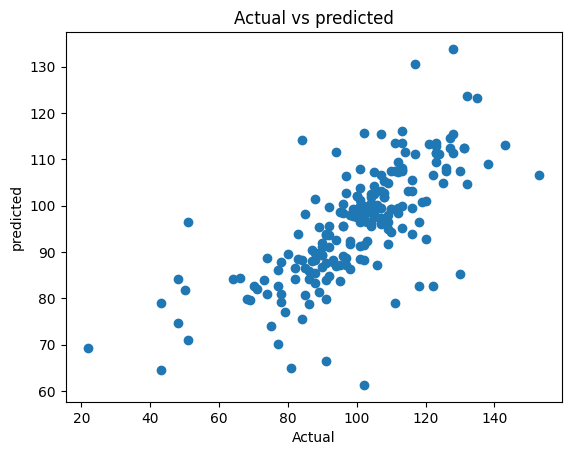

In [27]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test2, np.squeeze(model3.predict(X_test2)) )
print('r2_score:', r2_score)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test2, np.squeeze(model3.predict(X_test2)) )
mae= mean_absolute_error(Y_test2, np.squeeze(model3.predict(X_test2)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test2, np.squeeze(model3.predict(X_test2)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [28]:
prediction3 =np.squeeze(model3.predict([[80,2,2,129,prediction1]]))
print("Prediction: {}".format(prediction3))

y_prd=np.squeeze(np.squeeze(model3.predict(X_test2)) )
predic_dif=pd.DataFrame({'Actual':Y_test2,'predict':y_prd,"differences":Y_test2-y_prd})
predic_dif[0:15]

1/1 [==============================] - 0s 113ms/step
Prediction: 98.98960876464844
7/7 [==============================] - 0s 2ms/step


,Actual,predict,differences
2055,97,106.334595,-9.334595
2127,107,106.636856,0.363144
1550,105,98.167236,6.832764
309,68,79.927689,-11.927689
1436,114,111.456558,2.543442
1909,113,113.548920,-0.548920
34,90,86.819618,3.180382
2227,105,107.216141,-2.216141
2290,126,108.137070,17.862930
1981,116,99.486740,16.513260


## Random forest with keras tuner RNN

In [38]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
RF= RandomForestRegressor(n_estimators=200,random_state=30)
RF.fit(X_train.values,Y_train.values)

RandomForestRegressor(n_estimators=200, random_state=30)

In [39]:
prediction4 = np.squeeze(RF.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction4))

Prediction: 109.475


In [40]:
y_prd=np.squeeze(np.squeeze(model2.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

23/23 [==============================] - 0s 5ms/step
      Actual     predict  differences
898       87   93.270706    -6.270706
182       65   70.502464    -5.502464
565      103  103.831810    -0.831810
457       69   79.052689   -10.052689
1852     104  107.001274    -3.001274
...      ...         ...          ...
1812     112  112.654427    -0.654427
913       86   86.289352    -0.289352
1036     104  107.891968    -3.891968
629       74   82.932930    -8.932930
61        63   87.829063   -24.829063

[714 rows x 3 columns]


In [41]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

-82.2950439453125
146.6177520751953
105.92201232910156
67.78608703613281
82.47188568115234
59.94695281982422
63.44530487060547
69.33260345458984
-96.75007629394531
87.41265869140625
-84.17102813720703
-70.22361755371094
66.59333038330078
139.92870330810547
-64.98016357421875
106.09471130371094
lower bound: -60.15176129727738
upper bound: 59.81143989802677


In [42]:
A.drop(A[(A['differences'] >59)].index, inplace=True)
A.drop(A[(A['differences'] <-60)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['HotWaterCostAveragePerDwelling']

print(B)

from sklearn.model_selection import train_test_split
X3=B.drop('Actual',axis=1)
Y3=B['Actual']
X_train3, X_test3, Y_train3, Y_test3 =train_test_split(X3,Y3, test_size=0.3, random_state = 0)

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
6                    1        1              4                          213   
9                    1        4              4                          114   
10                   2        1              4                          153   
11                   2        2              4                          151   
14                   2        4              2                          156   
...                ...      ...            ...                          ...   
2363               198        2              3                           96   
2367               198        4              1                          111   
2368               198        4              3                           88   
2372               199        4              3                           87   
2376               200        4              3                           99   

      Actual     predict  
6         87   48.975662

In [43]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.LSTM(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                                           input_shape=(X_train3.shape[1],1),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [44]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

tuner.search(X_train3,Y_train3 ,epochs=100,validation_data=(X_test3,Y_test3))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model4 = tuner.hypermodel.build(best_hps)

model4.fit(X_train3, Y_train3, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
11/11 [==============================] - 3s 72ms/step - loss: 78.6076 - mean_absolute_error: 78.6076 - val_loss: 22.3985 - val_mean_absolute_error: 22.3985
Epoch 2/2000
11/11 [==============================] - 0s 32ms/step - loss: 16.9083 - mean_absolute_error: 16.9083 - val_loss: 10.3903 - val_mean_absolute_error: 10.3903
Epoch 3/2000
11/11 [==============================] - 0s 36ms/step - loss: 12.7101 - mean_absolute_error: 12.7101 - val_loss: 10.9252 - val_mean_absolute_error: 10.9252
Epoch 4/2000
11/11 [==============================] - 0s 38ms/step - loss: 12.3918 - mean_absolute_error: 12.3918 - val_loss: 10.7327 - val_mean_absolute_error: 10.7327
Epoch 5/2000
11/11 [==============================] - 0s 38ms/step - loss: 12.6333 - mean_absolute_error: 12.6333 - val_loss: 12.4250 - val_mean_a

11/11 [==============================] - 0s 32ms/step - loss: 9.9900 - mean_absolute_error: 9.9900 - val_loss: 10.1657 - val_mean_absolute_error: 10.1657
Epoch 49/2000
11/11 [==============================] - 0s 32ms/step - loss: 10.2187 - mean_absolute_error: 10.2187 - val_loss: 9.6229 - val_mean_absolute_error: 9.6229
Epoch 50/2000
11/11 [==============================] - 0s 31ms/step - loss: 9.8557 - mean_absolute_error: 9.8557 - val_loss: 9.3361 - val_mean_absolute_error: 9.3361
Epoch 51/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.9892 - mean_absolute_error: 9.9892 - val_loss: 9.1416 - val_mean_absolute_error: 9.1416
Epoch 52/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.8175 - mean_absolute_error: 9.8175 - val_loss: 9.0895 - val_mean_absolute_error: 9.0895
Epoch 53/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.7164 - mean_absolute_error: 9.7164 - val_loss: 10.8831 - val_mean_absolute_error: 10.8831
Epoch 54/200

Epoch 97/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.7594 - mean_absolute_error: 9.7594 - val_loss: 10.0684 - val_mean_absolute_error: 10.0684
Epoch 98/2000
11/11 [==============================] - 0s 32ms/step - loss: 10.7667 - mean_absolute_error: 10.7667 - val_loss: 11.7685 - val_mean_absolute_error: 11.7685
Epoch 99/2000
11/11 [==============================] - 0s 34ms/step - loss: 10.1248 - mean_absolute_error: 10.1248 - val_loss: 10.2269 - val_mean_absolute_error: 10.2269
Epoch 100/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.9985 - mean_absolute_error: 9.9985 - val_loss: 9.8671 - val_mean_absolute_error: 9.8671
Epoch 101/2000
11/11 [==============================] - 0s 35ms/step - loss: 9.8605 - mean_absolute_error: 9.8605 - val_loss: 9.2673 - val_mean_absolute_error: 9.2673
Epoch 102/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.7560 - mean_absolute_error: 9.7560 - val_loss: 9.5902 - val_mean_absolute_error

Epoch 146/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.4505 - mean_absolute_error: 9.4505 - val_loss: 9.5925 - val_mean_absolute_error: 9.5925
Epoch 147/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.1367 - mean_absolute_error: 9.1367 - val_loss: 10.0277 - val_mean_absolute_error: 10.0277
Epoch 148/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.4667 - mean_absolute_error: 9.4667 - val_loss: 9.3559 - val_mean_absolute_error: 9.3559
Epoch 149/2000
11/11 [==============================] - 0s 32ms/step - loss: 9.6174 - mean_absolute_error: 9.6174 - val_loss: 9.0253 - val_mean_absolute_error: 9.0253
Epoch 150/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.9579 - mean_absolute_error: 9.9579 - val_loss: 9.4551 - val_mean_absolute_error: 9.4551
Epoch 151/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.4095 - mean_absolute_error: 9.4095 - val_loss: 9.0727 - val_mean_absolute_error: 9.0

Epoch 195/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.4866 - mean_absolute_error: 9.4866 - val_loss: 9.7004 - val_mean_absolute_error: 9.7004
Epoch 196/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.1744 - mean_absolute_error: 9.1744 - val_loss: 9.3313 - val_mean_absolute_error: 9.3313
Epoch 197/2000
11/11 [==============================] - 0s 35ms/step - loss: 8.9853 - mean_absolute_error: 8.9853 - val_loss: 8.9135 - val_mean_absolute_error: 8.9135
Epoch 198/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.1568 - mean_absolute_error: 9.1568 - val_loss: 9.7007 - val_mean_absolute_error: 9.7007
Epoch 199/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.7316 - mean_absolute_error: 9.7316 - val_loss: 11.3604 - val_mean_absolute_error: 11.3604
Epoch 200/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.8996 - mean_absolute_error: 9.8996 - val_loss: 9.3716 - val_mean_absolute_error: 9.3

Epoch 244/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.7109 - mean_absolute_error: 9.7109 - val_loss: 9.9606 - val_mean_absolute_error: 9.9606
Epoch 245/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.8049 - mean_absolute_error: 9.8049 - val_loss: 11.4143 - val_mean_absolute_error: 11.4143
Epoch 246/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.7070 - mean_absolute_error: 9.7070 - val_loss: 9.6761 - val_mean_absolute_error: 9.6761
Epoch 247/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.3275 - mean_absolute_error: 9.3275 - val_loss: 9.8690 - val_mean_absolute_error: 9.8690
Epoch 248/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.9752 - mean_absolute_error: 8.9752 - val_loss: 9.9513 - val_mean_absolute_error: 9.9513
Epoch 249/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.2500 - mean_absolute_error: 9.2500 - val_loss: 9.6536 - val_mean_absolute_error: 9.6

Epoch 293/2000
11/11 [==============================] - 0s 32ms/step - loss: 8.8485 - mean_absolute_error: 8.8485 - val_loss: 9.4894 - val_mean_absolute_error: 9.4894
Epoch 294/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.0316 - mean_absolute_error: 9.0316 - val_loss: 9.8901 - val_mean_absolute_error: 9.8901
Epoch 295/2000
11/11 [==============================] - 0s 35ms/step - loss: 9.4171 - mean_absolute_error: 9.4171 - val_loss: 11.9244 - val_mean_absolute_error: 11.9244
Epoch 296/2000
11/11 [==============================] - 0s 33ms/step - loss: 10.7279 - mean_absolute_error: 10.7279 - val_loss: 9.7722 - val_mean_absolute_error: 9.7722
Epoch 297/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.9124 - mean_absolute_error: 9.9124 - val_loss: 9.7705 - val_mean_absolute_error: 9.7705
Epoch 298/2000
11/11 [==============================] - 0s 32ms/step - loss: 9.3228 - mean_absolute_error: 9.3228 - val_loss: 10.3468 - val_mean_absolute_error: 

Epoch 342/2000
11/11 [==============================] - 0s 35ms/step - loss: 10.0873 - mean_absolute_error: 10.0873 - val_loss: 11.2248 - val_mean_absolute_error: 11.2248
Epoch 343/2000
11/11 [==============================] - 0s 32ms/step - loss: 8.7824 - mean_absolute_error: 8.7824 - val_loss: 9.9316 - val_mean_absolute_error: 9.9316
Epoch 344/2000
11/11 [==============================] - 0s 35ms/step - loss: 8.9611 - mean_absolute_error: 8.9611 - val_loss: 10.3831 - val_mean_absolute_error: 10.3831
Epoch 345/2000
11/11 [==============================] - 0s 37ms/step - loss: 9.0746 - mean_absolute_error: 9.0746 - val_loss: 10.8804 - val_mean_absolute_error: 10.8804
Epoch 346/2000
11/11 [==============================] - 0s 38ms/step - loss: 9.3411 - mean_absolute_error: 9.3411 - val_loss: 10.1668 - val_mean_absolute_error: 10.1668
Epoch 347/2000
11/11 [==============================] - 0s 35ms/step - loss: 9.1391 - mean_absolute_error: 9.1391 - val_loss: 10.2057 - val_mean_absolute_e

Epoch 391/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.1237 - mean_absolute_error: 9.1237 - val_loss: 11.1646 - val_mean_absolute_error: 11.1646
Epoch 392/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.5886 - mean_absolute_error: 9.5886 - val_loss: 10.6441 - val_mean_absolute_error: 10.6441
Epoch 393/2000
11/11 [==============================] - 0s 31ms/step - loss: 8.9167 - mean_absolute_error: 8.9167 - val_loss: 9.8624 - val_mean_absolute_error: 9.8624
Epoch 394/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.5337 - mean_absolute_error: 8.5337 - val_loss: 9.7266 - val_mean_absolute_error: 9.7266
Epoch 395/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.0492 - mean_absolute_error: 9.0492 - val_loss: 10.2463 - val_mean_absolute_error: 10.2463
Epoch 396/2000
11/11 [==============================] - 0s 32ms/step - loss: 8.8684 - mean_absolute_error: 8.8684 - val_loss: 10.0097 - val_mean_absolute_error

Epoch 440/2000
11/11 [==============================] - 0s 32ms/step - loss: 8.4669 - mean_absolute_error: 8.4669 - val_loss: 9.2037 - val_mean_absolute_error: 9.2037
Epoch 441/2000
11/11 [==============================] - 0s 31ms/step - loss: 8.8004 - mean_absolute_error: 8.8004 - val_loss: 9.5508 - val_mean_absolute_error: 9.5508
Epoch 442/2000
11/11 [==============================] - 0s 32ms/step - loss: 9.0410 - mean_absolute_error: 9.0410 - val_loss: 9.3610 - val_mean_absolute_error: 9.3610
Epoch 443/2000
11/11 [==============================] - 0s 32ms/step - loss: 10.0279 - mean_absolute_error: 10.0279 - val_loss: 10.7900 - val_mean_absolute_error: 10.7900
Epoch 444/2000
11/11 [==============================] - 0s 32ms/step - loss: 10.3481 - mean_absolute_error: 10.3481 - val_loss: 10.3234 - val_mean_absolute_error: 10.3234
Epoch 445/2000
11/11 [==============================] - 0s 32ms/step - loss: 10.3788 - mean_absolute_error: 10.3788 - val_loss: 9.7450 - val_mean_absolute_er

Epoch 489/2000
11/11 [==============================] - 0s 31ms/step - loss: 8.1011 - mean_absolute_error: 8.1011 - val_loss: 9.3224 - val_mean_absolute_error: 9.3224
Epoch 490/2000
11/11 [==============================] - 0s 32ms/step - loss: 8.4116 - mean_absolute_error: 8.4116 - val_loss: 9.8672 - val_mean_absolute_error: 9.8672
Epoch 491/2000
11/11 [==============================] - 0s 32ms/step - loss: 8.6870 - mean_absolute_error: 8.6870 - val_loss: 9.8132 - val_mean_absolute_error: 9.8132
Epoch 492/2000
11/11 [==============================] - 0s 32ms/step - loss: 8.5068 - mean_absolute_error: 8.5068 - val_loss: 9.1721 - val_mean_absolute_error: 9.1721
Epoch 493/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.5416 - mean_absolute_error: 8.5416 - val_loss: 9.5753 - val_mean_absolute_error: 9.5753
Epoch 494/2000
11/11 [==============================] - 0s 32ms/step - loss: 8.4786 - mean_absolute_error: 8.4786 - val_loss: 9.5894 - val_mean_absolute_error: 9.589

Epoch 538/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.8769 - mean_absolute_error: 8.8769 - val_loss: 9.1681 - val_mean_absolute_error: 9.1681
Epoch 539/2000
11/11 [==============================] - 0s 32ms/step - loss: 8.2486 - mean_absolute_error: 8.2486 - val_loss: 9.0281 - val_mean_absolute_error: 9.0281
Epoch 540/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.2910 - mean_absolute_error: 8.2910 - val_loss: 9.2399 - val_mean_absolute_error: 9.2399
Epoch 541/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.0533 - mean_absolute_error: 8.0533 - val_loss: 8.8906 - val_mean_absolute_error: 8.8906
Epoch 542/2000
11/11 [==============================] - 0s 32ms/step - loss: 8.2291 - mean_absolute_error: 8.2291 - val_loss: 9.2215 - val_mean_absolute_error: 9.2215
Epoch 543/2000
11/11 [==============================] - 0s 31ms/step - loss: 7.9199 - mean_absolute_error: 7.9199 - val_loss: 9.5124 - val_mean_absolute_error: 9.512

11/11 [==============================] - 0s 33ms/step - loss: 8.1069 - mean_absolute_error: 8.1069 - val_loss: 9.5761 - val_mean_absolute_error: 9.5761
Epoch 588/2000
11/11 [==============================] - 0s 32ms/step - loss: 7.7151 - mean_absolute_error: 7.7151 - val_loss: 9.1570 - val_mean_absolute_error: 9.1570
Epoch 589/2000
11/11 [==============================] - 0s 32ms/step - loss: 7.9144 - mean_absolute_error: 7.9144 - val_loss: 9.2521 - val_mean_absolute_error: 9.2521
Epoch 590/2000
11/11 [==============================] - 0s 31ms/step - loss: 8.1869 - mean_absolute_error: 8.1869 - val_loss: 8.9984 - val_mean_absolute_error: 8.9984
Epoch 591/2000
11/11 [==============================] - 0s 31ms/step - loss: 8.0751 - mean_absolute_error: 8.0751 - val_loss: 9.3893 - val_mean_absolute_error: 9.3893
Epoch 592/2000
11/11 [==============================] - 0s 31ms/step - loss: 8.1326 - mean_absolute_error: 8.1326 - val_loss: 9.1217 - val_mean_absolute_error: 9.1217
Epoch 593/200

11/11 [==============================] - 0s 33ms/step - loss: 8.1085 - mean_absolute_error: 8.1085 - val_loss: 9.1381 - val_mean_absolute_error: 9.1381
Epoch 637/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.0443 - mean_absolute_error: 8.0443 - val_loss: 9.6913 - val_mean_absolute_error: 9.6913
Epoch 638/2000
11/11 [==============================] - 0s 34ms/step - loss: 7.9341 - mean_absolute_error: 7.9341 - val_loss: 9.2735 - val_mean_absolute_error: 9.2735
Epoch 639/2000
11/11 [==============================] - 0s 34ms/step - loss: 7.4795 - mean_absolute_error: 7.4795 - val_loss: 9.1546 - val_mean_absolute_error: 9.1546
Epoch 640/2000
11/11 [==============================] - 0s 34ms/step - loss: 7.6805 - mean_absolute_error: 7.6805 - val_loss: 8.8417 - val_mean_absolute_error: 8.8417
Epoch 641/2000
11/11 [==============================] - 0s 35ms/step - loss: 7.5990 - mean_absolute_error: 7.5990 - val_loss: 9.2056 - val_mean_absolute_error: 9.2056
Epoch 642/200

11/11 [==============================] - 0s 34ms/step - loss: 7.2335 - mean_absolute_error: 7.2335 - val_loss: 8.6497 - val_mean_absolute_error: 8.6497
Epoch 686/2000
11/11 [==============================] - 0s 34ms/step - loss: 7.8488 - mean_absolute_error: 7.8488 - val_loss: 9.2225 - val_mean_absolute_error: 9.2225
Epoch 687/2000
11/11 [==============================] - 0s 33ms/step - loss: 7.7527 - mean_absolute_error: 7.7527 - val_loss: 9.1478 - val_mean_absolute_error: 9.1478
Epoch 688/2000
11/11 [==============================] - 0s 35ms/step - loss: 7.7224 - mean_absolute_error: 7.7224 - val_loss: 9.1717 - val_mean_absolute_error: 9.1717
Epoch 689/2000
11/11 [==============================] - 0s 33ms/step - loss: 7.9033 - mean_absolute_error: 7.9033 - val_loss: 8.6726 - val_mean_absolute_error: 8.6726
Epoch 690/2000
11/11 [==============================] - 0s 32ms/step - loss: 7.9041 - mean_absolute_error: 7.9041 - val_loss: 12.0733 - val_mean_absolute_error: 12.0733
Epoch 691/2

Epoch 734/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.5869 - mean_absolute_error: 8.5869 - val_loss: 9.5050 - val_mean_absolute_error: 9.5050
Epoch 735/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.4815 - mean_absolute_error: 8.4815 - val_loss: 9.8410 - val_mean_absolute_error: 9.8410
Epoch 736/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.3326 - mean_absolute_error: 8.3326 - val_loss: 9.6498 - val_mean_absolute_error: 9.6498
Epoch 737/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.2627 - mean_absolute_error: 8.2627 - val_loss: 9.6135 - val_mean_absolute_error: 9.6135
Epoch 738/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.0945 - mean_absolute_error: 9.0945 - val_loss: 9.5100 - val_mean_absolute_error: 9.5100
Epoch 739/2000
11/11 [==============================] - 0s 35ms/step - loss: 8.3150 - mean_absolute_error: 8.3150 - val_loss: 10.5269 - val_mean_absolute_error: 10.5

Epoch 783/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.1828 - mean_absolute_error: 8.1828 - val_loss: 9.3046 - val_mean_absolute_error: 9.3046
Epoch 784/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.2158 - mean_absolute_error: 8.2158 - val_loss: 9.1734 - val_mean_absolute_error: 9.1734
Epoch 785/2000
11/11 [==============================] - 0s 36ms/step - loss: 8.0163 - mean_absolute_error: 8.0163 - val_loss: 9.8901 - val_mean_absolute_error: 9.8901
Epoch 786/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.5727 - mean_absolute_error: 8.5727 - val_loss: 9.5706 - val_mean_absolute_error: 9.5706
Epoch 787/2000
11/11 [==============================] - 0s 35ms/step - loss: 8.4524 - mean_absolute_error: 8.4524 - val_loss: 9.2819 - val_mean_absolute_error: 9.2819
Epoch 788/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.4151 - mean_absolute_error: 8.4151 - val_loss: 9.4011 - val_mean_absolute_error: 9.401

11/11 [==============================] - 0s 39ms/step - loss: 7.9066 - mean_absolute_error: 7.9066 - val_loss: 9.4302 - val_mean_absolute_error: 9.4302
Epoch 833/2000
11/11 [==============================] - 0s 37ms/step - loss: 7.7572 - mean_absolute_error: 7.7572 - val_loss: 9.5613 - val_mean_absolute_error: 9.5613
Epoch 834/2000
11/11 [==============================] - 0s 36ms/step - loss: 7.7489 - mean_absolute_error: 7.7489 - val_loss: 9.7166 - val_mean_absolute_error: 9.7166
Epoch 835/2000
11/11 [==============================] - 0s 35ms/step - loss: 8.2513 - mean_absolute_error: 8.2513 - val_loss: 9.6214 - val_mean_absolute_error: 9.6214
Epoch 836/2000
11/11 [==============================] - 0s 35ms/step - loss: 7.8226 - mean_absolute_error: 7.8226 - val_loss: 9.7818 - val_mean_absolute_error: 9.7818
Epoch 837/2000
11/11 [==============================] - 0s 35ms/step - loss: 7.6716 - mean_absolute_error: 7.6716 - val_loss: 9.2557 - val_mean_absolute_error: 9.2557
Epoch 838/200

11/11 [==============================] - 0s 36ms/step - loss: 8.2492 - mean_absolute_error: 8.2492 - val_loss: 9.1196 - val_mean_absolute_error: 9.1196
Epoch 882/2000
11/11 [==============================] - 0s 35ms/step - loss: 8.1868 - mean_absolute_error: 8.1868 - val_loss: 9.1482 - val_mean_absolute_error: 9.1482
Epoch 883/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.2444 - mean_absolute_error: 8.2444 - val_loss: 9.5023 - val_mean_absolute_error: 9.5023
Epoch 884/2000
11/11 [==============================] - 0s 39ms/step - loss: 8.0787 - mean_absolute_error: 8.0787 - val_loss: 9.4898 - val_mean_absolute_error: 9.4898
Epoch 885/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.0885 - mean_absolute_error: 8.0885 - val_loss: 9.3429 - val_mean_absolute_error: 9.3429
Epoch 886/2000
11/11 [==============================] - 0s 39ms/step - loss: 8.3088 - mean_absolute_error: 8.3088 - val_loss: 9.3352 - val_mean_absolute_error: 9.3352
Epoch 887/200

11/11 [==============================] - 0s 29ms/step - loss: 8.7188 - mean_absolute_error: 8.7188 - val_loss: 9.5443 - val_mean_absolute_error: 9.5443
Epoch 931/2000
11/11 [==============================] - 0s 30ms/step - loss: 8.1352 - mean_absolute_error: 8.1352 - val_loss: 8.8241 - val_mean_absolute_error: 8.8241
Epoch 932/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.9089 - mean_absolute_error: 7.9089 - val_loss: 8.9695 - val_mean_absolute_error: 8.9695
Epoch 933/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.9195 - mean_absolute_error: 7.9195 - val_loss: 9.1320 - val_mean_absolute_error: 9.1320
Epoch 934/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.0673 - mean_absolute_error: 8.0673 - val_loss: 10.1671 - val_mean_absolute_error: 10.1671
Epoch 935/2000
11/11 [==============================] - 0s 29ms/step - loss: 9.4290 - mean_absolute_error: 9.4290 - val_loss: 10.2751 - val_mean_absolute_error: 10.2751
Epoch 936

Epoch 979/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.3592 - mean_absolute_error: 8.3592 - val_loss: 9.6000 - val_mean_absolute_error: 9.6000
Epoch 980/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.0937 - mean_absolute_error: 8.0937 - val_loss: 10.0043 - val_mean_absolute_error: 10.0043
Epoch 981/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.1693 - mean_absolute_error: 8.1693 - val_loss: 9.5821 - val_mean_absolute_error: 9.5821
Epoch 982/2000
11/11 [==============================] - 0s 28ms/step - loss: 8.4662 - mean_absolute_error: 8.4662 - val_loss: 10.6839 - val_mean_absolute_error: 10.6839
Epoch 983/2000
11/11 [==============================] - 0s 30ms/step - loss: 8.4791 - mean_absolute_error: 8.4791 - val_loss: 9.5210 - val_mean_absolute_error: 9.5210
Epoch 984/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.0878 - mean_absolute_error: 8.0878 - val_loss: 10.2535 - val_mean_absolute_error: 

Epoch 1028/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.9284 - mean_absolute_error: 7.9284 - val_loss: 9.4293 - val_mean_absolute_error: 9.4293
Epoch 1029/2000
11/11 [==============================] - 0s 26ms/step - loss: 8.0139 - mean_absolute_error: 8.0139 - val_loss: 9.4656 - val_mean_absolute_error: 9.4656
Epoch 1030/2000
11/11 [==============================] - 0s 25ms/step - loss: 8.0018 - mean_absolute_error: 8.0018 - val_loss: 9.5764 - val_mean_absolute_error: 9.5764
Epoch 1031/2000
11/11 [==============================] - 0s 25ms/step - loss: 7.8851 - mean_absolute_error: 7.8851 - val_loss: 9.5508 - val_mean_absolute_error: 9.5508
Epoch 1032/2000
11/11 [==============================] - 0s 25ms/step - loss: 7.9847 - mean_absolute_error: 7.9847 - val_loss: 9.5773 - val_mean_absolute_error: 9.5773
Epoch 1033/2000
11/11 [==============================] - 0s 24ms/step - loss: 7.9623 - mean_absolute_error: 7.9623 - val_loss: 9.5878 - val_mean_absolute_error:

Epoch 1077/2000
11/11 [==============================] - 0s 24ms/step - loss: 8.5492 - mean_absolute_error: 8.5492 - val_loss: 10.0382 - val_mean_absolute_error: 10.0382
Epoch 1078/2000
11/11 [==============================] - 0s 24ms/step - loss: 8.2431 - mean_absolute_error: 8.2431 - val_loss: 10.1203 - val_mean_absolute_error: 10.1203
Epoch 1079/2000
11/11 [==============================] - 0s 25ms/step - loss: 7.9780 - mean_absolute_error: 7.9780 - val_loss: 9.5583 - val_mean_absolute_error: 9.5583
Epoch 1080/2000
11/11 [==============================] - 0s 25ms/step - loss: 8.0436 - mean_absolute_error: 8.0436 - val_loss: 9.5145 - val_mean_absolute_error: 9.5145
Epoch 1081/2000
11/11 [==============================] - 0s 28ms/step - loss: 7.8413 - mean_absolute_error: 7.8413 - val_loss: 9.8042 - val_mean_absolute_error: 9.8042
Epoch 1082/2000
11/11 [==============================] - 0s 25ms/step - loss: 8.1402 - mean_absolute_error: 8.1402 - val_loss: 10.1690 - val_mean_absolute_e

11/11 [==============================] - 0s 25ms/step - loss: 7.8147 - mean_absolute_error: 7.8147 - val_loss: 10.6434 - val_mean_absolute_error: 10.6434
Epoch 1126/2000
11/11 [==============================] - 0s 24ms/step - loss: 7.8068 - mean_absolute_error: 7.8068 - val_loss: 10.1741 - val_mean_absolute_error: 10.1741
Epoch 1127/2000
11/11 [==============================] - 0s 24ms/step - loss: 7.9523 - mean_absolute_error: 7.9523 - val_loss: 10.1902 - val_mean_absolute_error: 10.1902
Epoch 1128/2000
11/11 [==============================] - 0s 25ms/step - loss: 7.6427 - mean_absolute_error: 7.6427 - val_loss: 10.0349 - val_mean_absolute_error: 10.0349
Epoch 1129/2000
11/11 [==============================] - 0s 24ms/step - loss: 8.0254 - mean_absolute_error: 8.0254 - val_loss: 10.0665 - val_mean_absolute_error: 10.0665
Epoch 1130/2000
11/11 [==============================] - 0s 24ms/step - loss: 7.8973 - mean_absolute_error: 7.8973 - val_loss: 10.1192 - val_mean_absolute_error: 10.1

11/11 [==============================] - 0s 26ms/step - loss: 8.7091 - mean_absolute_error: 8.7091 - val_loss: 10.2197 - val_mean_absolute_error: 10.2197
Epoch 1174/2000
11/11 [==============================] - 0s 25ms/step - loss: 8.7619 - mean_absolute_error: 8.7619 - val_loss: 9.0649 - val_mean_absolute_error: 9.0649
Epoch 1175/2000
11/11 [==============================] - 0s 24ms/step - loss: 8.6152 - mean_absolute_error: 8.6152 - val_loss: 11.2853 - val_mean_absolute_error: 11.2853
Epoch 1176/2000
11/11 [==============================] - 0s 25ms/step - loss: 9.8841 - mean_absolute_error: 9.8841 - val_loss: 10.8738 - val_mean_absolute_error: 10.8738
Epoch 1177/2000
11/11 [==============================] - 0s 25ms/step - loss: 9.7868 - mean_absolute_error: 9.7868 - val_loss: 9.7498 - val_mean_absolute_error: 9.7498
Epoch 1178/2000
11/11 [==============================] - 0s 24ms/step - loss: 8.9266 - mean_absolute_error: 8.9266 - val_loss: 9.2603 - val_mean_absolute_error: 9.2603
Ep

Epoch 1222/2000
11/11 [==============================] - 0s 24ms/step - loss: 7.7621 - mean_absolute_error: 7.7621 - val_loss: 9.9396 - val_mean_absolute_error: 9.9396
Epoch 1223/2000
11/11 [==============================] - 0s 25ms/step - loss: 7.7742 - mean_absolute_error: 7.7742 - val_loss: 9.2461 - val_mean_absolute_error: 9.2461
Epoch 1224/2000
11/11 [==============================] - 0s 24ms/step - loss: 7.6733 - mean_absolute_error: 7.6733 - val_loss: 9.5950 - val_mean_absolute_error: 9.5950
Epoch 1225/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.7493 - mean_absolute_error: 7.7493 - val_loss: 9.6890 - val_mean_absolute_error: 9.6890
Epoch 1226/2000
11/11 [==============================] - 0s 28ms/step - loss: 7.5222 - mean_absolute_error: 7.5222 - val_loss: 9.3147 - val_mean_absolute_error: 9.3147
Epoch 1227/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.4450 - mean_absolute_error: 7.4450 - val_loss: 9.5770 - val_mean_absolute_error:

Epoch 1271/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.7310 - mean_absolute_error: 7.7310 - val_loss: 9.7954 - val_mean_absolute_error: 9.7954
Epoch 1272/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.7195 - mean_absolute_error: 7.7195 - val_loss: 9.7486 - val_mean_absolute_error: 9.7486
Epoch 1273/2000
11/11 [==============================] - 0s 26ms/step - loss: 8.1070 - mean_absolute_error: 8.1070 - val_loss: 11.1466 - val_mean_absolute_error: 11.1466
Epoch 1274/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.2590 - mean_absolute_error: 8.2590 - val_loss: 9.4335 - val_mean_absolute_error: 9.4335
Epoch 1275/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.8153 - mean_absolute_error: 7.8153 - val_loss: 10.0100 - val_mean_absolute_error: 10.0100
Epoch 1276/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.8893 - mean_absolute_error: 7.8893 - val_loss: 10.2763 - val_mean_absolute_e

11/11 [==============================] - 0s 27ms/step - loss: 7.6367 - mean_absolute_error: 7.6367 - val_loss: 9.8954 - val_mean_absolute_error: 9.8954
Epoch 1320/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.6512 - mean_absolute_error: 7.6512 - val_loss: 9.8389 - val_mean_absolute_error: 9.8389
Epoch 1321/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.9023 - mean_absolute_error: 7.9023 - val_loss: 9.8960 - val_mean_absolute_error: 9.8960
Epoch 1322/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.7744 - mean_absolute_error: 7.7744 - val_loss: 9.7131 - val_mean_absolute_error: 9.7131
Epoch 1323/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.4866 - mean_absolute_error: 7.4866 - val_loss: 9.8935 - val_mean_absolute_error: 9.8935
Epoch 1324/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.5112 - mean_absolute_error: 7.5112 - val_loss: 10.1136 - val_mean_absolute_error: 10.1136
Epoch 

Epoch 1368/2000
11/11 [==============================] - 0s 28ms/step - loss: 7.7148 - mean_absolute_error: 7.7148 - val_loss: 9.8988 - val_mean_absolute_error: 9.8988
Epoch 1369/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.3140 - mean_absolute_error: 8.3140 - val_loss: 9.0086 - val_mean_absolute_error: 9.0086
Epoch 1370/2000
11/11 [==============================] - 0s 28ms/step - loss: 8.2621 - mean_absolute_error: 8.2621 - val_loss: 8.5707 - val_mean_absolute_error: 8.5707
Epoch 1371/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.9194 - mean_absolute_error: 7.9194 - val_loss: 8.9936 - val_mean_absolute_error: 8.9936
Epoch 1372/2000
11/11 [==============================] - 0s 28ms/step - loss: 8.1683 - mean_absolute_error: 8.1683 - val_loss: 8.7877 - val_mean_absolute_error: 8.7877
Epoch 1373/2000
11/11 [==============================] - 0s 28ms/step - loss: 8.0223 - mean_absolute_error: 8.0223 - val_loss: 9.1114 - val_mean_absolute_error:

Epoch 1417/2000
11/11 [==============================] - 0s 28ms/step - loss: 7.4889 - mean_absolute_error: 7.4889 - val_loss: 8.9123 - val_mean_absolute_error: 8.9123
Epoch 1418/2000
11/11 [==============================] - 0s 28ms/step - loss: 7.9468 - mean_absolute_error: 7.9468 - val_loss: 8.9531 - val_mean_absolute_error: 8.9531
Epoch 1419/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.4767 - mean_absolute_error: 7.4767 - val_loss: 8.4840 - val_mean_absolute_error: 8.4840
Epoch 1420/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.4801 - mean_absolute_error: 7.4801 - val_loss: 9.0911 - val_mean_absolute_error: 9.0911
Epoch 1421/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.8717 - mean_absolute_error: 7.8717 - val_loss: 8.9131 - val_mean_absolute_error: 8.9131
Epoch 1422/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.5565 - mean_absolute_error: 7.5565 - val_loss: 8.7732 - val_mean_absolute_error:

Epoch 1466/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.3265 - mean_absolute_error: 7.3265 - val_loss: 9.2819 - val_mean_absolute_error: 9.2819
Epoch 1467/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.3994 - mean_absolute_error: 7.3994 - val_loss: 9.2475 - val_mean_absolute_error: 9.2475
Epoch 1468/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.1933 - mean_absolute_error: 7.1933 - val_loss: 9.4649 - val_mean_absolute_error: 9.4649
Epoch 1469/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.2107 - mean_absolute_error: 7.2107 - val_loss: 9.1847 - val_mean_absolute_error: 9.1847
Epoch 1470/2000
11/11 [==============================] - 0s 30ms/step - loss: 7.0815 - mean_absolute_error: 7.0815 - val_loss: 9.0072 - val_mean_absolute_error: 9.0072
Epoch 1471/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.2537 - mean_absolute_error: 7.2537 - val_loss: 9.4168 - val_mean_absolute_error:

Epoch 1515/2000
11/11 [==============================] - 0s 25ms/step - loss: 7.5949 - mean_absolute_error: 7.5949 - val_loss: 9.0121 - val_mean_absolute_error: 9.0121
Epoch 1516/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.1130 - mean_absolute_error: 7.1130 - val_loss: 8.7662 - val_mean_absolute_error: 8.7662
Epoch 1517/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.1880 - mean_absolute_error: 7.1880 - val_loss: 8.7121 - val_mean_absolute_error: 8.7121
Epoch 1518/2000
11/11 [==============================] - 0s 32ms/step - loss: 7.1442 - mean_absolute_error: 7.1442 - val_loss: 8.6489 - val_mean_absolute_error: 8.6489
Epoch 1519/2000
11/11 [==============================] - 0s 31ms/step - loss: 7.2592 - mean_absolute_error: 7.2592 - val_loss: 8.8505 - val_mean_absolute_error: 8.8505
Epoch 1520/2000
11/11 [==============================] - 0s 31ms/step - loss: 7.2483 - mean_absolute_error: 7.2483 - val_loss: 9.5623 - val_mean_absolute_error:

Epoch 1564/2000
11/11 [==============================] - 0s 41ms/step - loss: 7.5793 - mean_absolute_error: 7.5793 - val_loss: 9.4610 - val_mean_absolute_error: 9.4610
Epoch 1565/2000
11/11 [==============================] - 0s 43ms/step - loss: 7.3631 - mean_absolute_error: 7.3631 - val_loss: 9.1313 - val_mean_absolute_error: 9.1313
Epoch 1566/2000
11/11 [==============================] - 0s 44ms/step - loss: 7.3044 - mean_absolute_error: 7.3044 - val_loss: 9.2357 - val_mean_absolute_error: 9.2357
Epoch 1567/2000
11/11 [==============================] - 0s 45ms/step - loss: 7.6902 - mean_absolute_error: 7.6902 - val_loss: 9.8311 - val_mean_absolute_error: 9.8311
Epoch 1568/2000
11/11 [==============================] - 1s 46ms/step - loss: 7.7239 - mean_absolute_error: 7.7239 - val_loss: 9.4653 - val_mean_absolute_error: 9.4653
Epoch 1569/2000
11/11 [==============================] - 0s 45ms/step - loss: 7.5492 - mean_absolute_error: 7.5492 - val_loss: 9.3876 - val_mean_absolute_error:

Epoch 1613/2000
11/11 [==============================] - 1s 46ms/step - loss: 7.3955 - mean_absolute_error: 7.3955 - val_loss: 9.0237 - val_mean_absolute_error: 9.0237
Epoch 1614/2000
11/11 [==============================] - 0s 44ms/step - loss: 7.3622 - mean_absolute_error: 7.3622 - val_loss: 9.3386 - val_mean_absolute_error: 9.3386
Epoch 1615/2000
11/11 [==============================] - 0s 42ms/step - loss: 6.9668 - mean_absolute_error: 6.9668 - val_loss: 9.2547 - val_mean_absolute_error: 9.2547
Epoch 1616/2000
11/11 [==============================] - 0s 44ms/step - loss: 7.5354 - mean_absolute_error: 7.5354 - val_loss: 9.4154 - val_mean_absolute_error: 9.4154
Epoch 1617/2000
11/11 [==============================] - 0s 44ms/step - loss: 7.5307 - mean_absolute_error: 7.5307 - val_loss: 9.4533 - val_mean_absolute_error: 9.4533
Epoch 1618/2000
11/11 [==============================] - 0s 45ms/step - loss: 7.3503 - mean_absolute_error: 7.3503 - val_loss: 9.1978 - val_mean_absolute_error:

11/11 [==============================] - 0s 42ms/step - loss: 7.4562 - mean_absolute_error: 7.4562 - val_loss: 9.3215 - val_mean_absolute_error: 9.3215
Epoch 1662/2000
11/11 [==============================] - 0s 42ms/step - loss: 7.6005 - mean_absolute_error: 7.6005 - val_loss: 9.1146 - val_mean_absolute_error: 9.1146
Epoch 1663/2000
11/11 [==============================] - 0s 45ms/step - loss: 7.3295 - mean_absolute_error: 7.3295 - val_loss: 8.9933 - val_mean_absolute_error: 8.9933
Epoch 1664/2000
11/11 [==============================] - 0s 45ms/step - loss: 7.2802 - mean_absolute_error: 7.2802 - val_loss: 8.9467 - val_mean_absolute_error: 8.9467
Epoch 1665/2000
11/11 [==============================] - 1s 47ms/step - loss: 7.2642 - mean_absolute_error: 7.2642 - val_loss: 8.8229 - val_mean_absolute_error: 8.8229
Epoch 1666/2000
11/11 [==============================] - 0s 42ms/step - loss: 7.4087 - mean_absolute_error: 7.4087 - val_loss: 9.1335 - val_mean_absolute_error: 9.1335
Epoch 16

Epoch 1710/2000
11/11 [==============================] - 0s 43ms/step - loss: 7.5395 - mean_absolute_error: 7.5395 - val_loss: 9.8476 - val_mean_absolute_error: 9.8476
Epoch 1711/2000
11/11 [==============================] - 0s 45ms/step - loss: 7.7832 - mean_absolute_error: 7.7832 - val_loss: 9.3809 - val_mean_absolute_error: 9.3809
Epoch 1712/2000
11/11 [==============================] - 0s 44ms/step - loss: 7.4753 - mean_absolute_error: 7.4753 - val_loss: 9.4738 - val_mean_absolute_error: 9.4738
Epoch 1713/2000
11/11 [==============================] - 0s 43ms/step - loss: 7.4375 - mean_absolute_error: 7.4375 - val_loss: 9.5005 - val_mean_absolute_error: 9.5005
Epoch 1714/2000
11/11 [==============================] - 0s 44ms/step - loss: 7.5434 - mean_absolute_error: 7.5434 - val_loss: 10.4221 - val_mean_absolute_error: 10.4221
Epoch 1715/2000
11/11 [==============================] - 0s 46ms/step - loss: 7.6936 - mean_absolute_error: 7.6936 - val_loss: 9.4997 - val_mean_absolute_erro

Epoch 1759/2000
11/11 [==============================] - 0s 44ms/step - loss: 7.0817 - mean_absolute_error: 7.0817 - val_loss: 9.6847 - val_mean_absolute_error: 9.6847
Epoch 1760/2000
11/11 [==============================] - 0s 42ms/step - loss: 7.0733 - mean_absolute_error: 7.0733 - val_loss: 9.6360 - val_mean_absolute_error: 9.6360
Epoch 1761/2000
11/11 [==============================] - 0s 43ms/step - loss: 7.4314 - mean_absolute_error: 7.4314 - val_loss: 10.0017 - val_mean_absolute_error: 10.0017
Epoch 1762/2000
11/11 [==============================] - 0s 44ms/step - loss: 7.0943 - mean_absolute_error: 7.0943 - val_loss: 9.8786 - val_mean_absolute_error: 9.8786
Epoch 1763/2000
11/11 [==============================] - 0s 45ms/step - loss: 7.1798 - mean_absolute_error: 7.1798 - val_loss: 9.6408 - val_mean_absolute_error: 9.6408
Epoch 1764/2000
11/11 [==============================] - 0s 46ms/step - loss: 7.4590 - mean_absolute_error: 7.4590 - val_loss: 10.0396 - val_mean_absolute_err

Epoch 1808/2000
11/11 [==============================] - 0s 45ms/step - loss: 7.1456 - mean_absolute_error: 7.1456 - val_loss: 9.5010 - val_mean_absolute_error: 9.5010
Epoch 1809/2000
11/11 [==============================] - 0s 44ms/step - loss: 7.4554 - mean_absolute_error: 7.4554 - val_loss: 10.2624 - val_mean_absolute_error: 10.2624
Epoch 1810/2000
11/11 [==============================] - 1s 48ms/step - loss: 7.3642 - mean_absolute_error: 7.3642 - val_loss: 9.6084 - val_mean_absolute_error: 9.6084
Epoch 1811/2000
11/11 [==============================] - 0s 44ms/step - loss: 7.0696 - mean_absolute_error: 7.0696 - val_loss: 9.7693 - val_mean_absolute_error: 9.7693
Epoch 1812/2000
11/11 [==============================] - 0s 44ms/step - loss: 7.0020 - mean_absolute_error: 7.0020 - val_loss: 9.8183 - val_mean_absolute_error: 9.8183
Epoch 1813/2000
11/11 [==============================] - 1s 47ms/step - loss: 7.2135 - mean_absolute_error: 7.2135 - val_loss: 9.8054 - val_mean_absolute_erro

Epoch 1857/2000
11/11 [==============================] - 1s 46ms/step - loss: 7.3086 - mean_absolute_error: 7.3086 - val_loss: 9.6296 - val_mean_absolute_error: 9.6296
Epoch 1858/2000
11/11 [==============================] - 0s 44ms/step - loss: 7.5127 - mean_absolute_error: 7.5127 - val_loss: 9.8911 - val_mean_absolute_error: 9.8911
Epoch 1859/2000
11/11 [==============================] - 0s 42ms/step - loss: 7.3876 - mean_absolute_error: 7.3876 - val_loss: 9.8257 - val_mean_absolute_error: 9.8257
Epoch 1860/2000
11/11 [==============================] - 0s 44ms/step - loss: 7.2667 - mean_absolute_error: 7.2667 - val_loss: 10.4147 - val_mean_absolute_error: 10.4147
Epoch 1861/2000
11/11 [==============================] - 0s 45ms/step - loss: 7.3435 - mean_absolute_error: 7.3435 - val_loss: 10.1394 - val_mean_absolute_error: 10.1394
Epoch 1862/2000
11/11 [==============================] - 1s 48ms/step - loss: 7.1517 - mean_absolute_error: 7.1517 - val_loss: 9.4622 - val_mean_absolute_er

Epoch 1906/2000
11/11 [==============================] - 0s 45ms/step - loss: 6.9353 - mean_absolute_error: 6.9353 - val_loss: 9.2447 - val_mean_absolute_error: 9.2447
Epoch 1907/2000
11/11 [==============================] - 1s 47ms/step - loss: 6.8972 - mean_absolute_error: 6.8972 - val_loss: 9.2229 - val_mean_absolute_error: 9.2229
Epoch 1908/2000
11/11 [==============================] - 0s 46ms/step - loss: 6.7997 - mean_absolute_error: 6.7997 - val_loss: 9.9913 - val_mean_absolute_error: 9.9913
Epoch 1909/2000
11/11 [==============================] - 0s 44ms/step - loss: 6.8501 - mean_absolute_error: 6.8501 - val_loss: 9.2625 - val_mean_absolute_error: 9.2625
Epoch 1910/2000
11/11 [==============================] - 0s 45ms/step - loss: 7.2520 - mean_absolute_error: 7.2520 - val_loss: 10.1092 - val_mean_absolute_error: 10.1092
Epoch 1911/2000
11/11 [==============================] - 1s 47ms/step - loss: 7.9032 - mean_absolute_error: 7.9032 - val_loss: 10.8729 - val_mean_absolute_err

Epoch 1955/2000
11/11 [==============================] - 0s 43ms/step - loss: 7.5289 - mean_absolute_error: 7.5289 - val_loss: 9.4567 - val_mean_absolute_error: 9.4567
Epoch 1956/2000
11/11 [==============================] - 1s 49ms/step - loss: 7.3942 - mean_absolute_error: 7.3942 - val_loss: 9.6988 - val_mean_absolute_error: 9.6988
Epoch 1957/2000
11/11 [==============================] - 0s 45ms/step - loss: 6.9305 - mean_absolute_error: 6.9305 - val_loss: 9.5933 - val_mean_absolute_error: 9.5933
Epoch 1958/2000
11/11 [==============================] - 0s 46ms/step - loss: 6.9996 - mean_absolute_error: 6.9996 - val_loss: 9.2266 - val_mean_absolute_error: 9.2266
Epoch 1959/2000
11/11 [==============================] - 1s 46ms/step - loss: 7.0197 - mean_absolute_error: 7.0197 - val_loss: 9.6582 - val_mean_absolute_error: 9.6582
Epoch 1960/2000
11/11 [==============================] - 0s 45ms/step - loss: 6.9300 - mean_absolute_error: 6.9300 - val_loss: 9.4161 - val_mean_absolute_error:

7/7 [==============================] - 1s 16ms/step
r2_score: 0.35304650483607625
7/7 [==============================] - 0s 15ms/step
mean squired error: 234.94893694683873
mean absolute error: 10.051335670834495
7/7 [==============================] - 0s 14ms/step


Text(0.5, 1.0, 'Actual vs predicted')

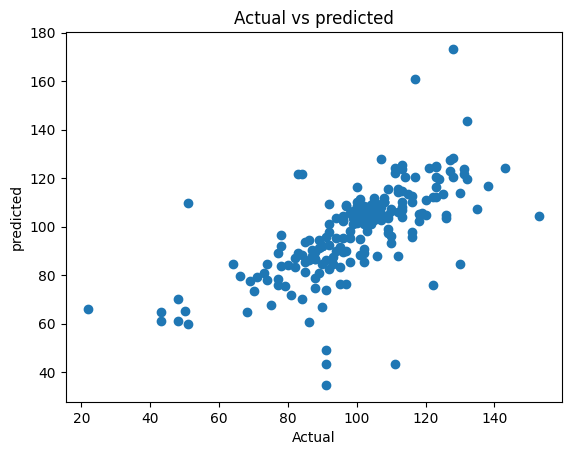

In [45]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test3, np.squeeze(model4.predict(X_test3)) )
r2_score=print('r2_score:', r2_score)


from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test3, np.squeeze(model4.predict(X_test3)) )
mae= mean_absolute_error(Y_test3, np.squeeze(model4.predict(X_test3)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test3, np.squeeze(model4.predict(X_test3)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [46]:
prediction5 =np.squeeze(model4.predict([[80,2,2,129,prediction4]]))
print("Prediction: {}".format(prediction5))

y_prd=np.squeeze(np.squeeze(model4.predict(X_test3)) )
predic_dif=pd.DataFrame({'Actual':Y_test3,'predict':y_prd,"differences":Y_test3-y_prd})
predic_dif[0:15]

1/1 [==============================] - 1s 872ms/step
Prediction: 110.85254669189453
7/7 [==============================] - 0s 13ms/step


,Actual,predict,differences
2055,97,108.996780,-11.996780
2127,107,108.920776,-1.920776
1550,105,110.107986,-5.107986
309,68,64.910980,3.089020
1436,114,120.556488,-6.556488
1909,113,125.199730,-12.199730
34,90,66.654037,23.345963
2227,105,103.192642,1.807358
2290,126,103.459740,22.540260
1981,116,97.623398,18.376602


## Dense with keras tuner RNN

In [47]:
from keras.layers import Dense, Dropout,Activation
from keras.models import Sequential
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
model5=Sequential()
model5.add(Dense(128, input_dim=4, activation='relu'))
model5.add(Dense(64,activation='relu'))
model5.add(Dense(1,activation='linear'))
model5.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               640       
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [48]:
model5.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 3s 26ms/step - loss: 4070.3401 - mae: 47.9335 - val_loss: 578.8376 - val_mae: 17.6620
Epoch 2/2000
37/37 [==============================] - 0s 6ms/step - loss: 361.5836 - mae: 13.8460 - val_loss: 370.7674 - val_mae: 13.2223
Epoch 3/2000
37/37 [==============================] - 0s 7ms/step - loss: 306.5407 - mae: 12.3979 - val_loss: 350.9079 - val_mae: 12.7450
Epoch 4/2000
37/37 [==============================] - 0s 7ms/step - loss: 293.6617 - mae: 12.0600 - val_loss: 340.4366 - val_mae: 12.4963
Epoch 5/2000
37/37 [==============================] - 0s 8ms/step - loss: 285.1174 - mae: 11.8250 - val_loss: 342.0548 - val_mae: 12.5076
Epoch 6/2000
37/37 [==============================] - 0s 9ms/step - loss: 284.1487 - mae: 11.8382 - val_loss: 333.0681 - val_mae: 12.2242
Epoch 7/2000
37/37 [==============================] - 0s 7ms/step - loss: 281.0351 - mae: 11.7994 - val_loss: 332.5679 - val_mae: 12.1814
Epoch 8/2000
37/37 [============

Epoch 60/2000
37/37 [==============================] - 0s 8ms/step - loss: 269.5803 - mae: 11.5375 - val_loss: 344.3976 - val_mae: 12.5130
Epoch 61/2000
37/37 [==============================] - 0s 6ms/step - loss: 276.8779 - mae: 11.6804 - val_loss: 323.6249 - val_mae: 12.0869
Epoch 62/2000
37/37 [==============================] - 0s 6ms/step - loss: 278.4326 - mae: 11.7300 - val_loss: 328.0100 - val_mae: 12.0861
Epoch 63/2000
37/37 [==============================] - 0s 7ms/step - loss: 280.9441 - mae: 11.7663 - val_loss: 329.8659 - val_mae: 12.3354
Epoch 64/2000
37/37 [==============================] - 0s 7ms/step - loss: 271.7077 - mae: 11.5233 - val_loss: 322.9640 - val_mae: 12.0503
Epoch 65/2000
37/37 [==============================] - 0s 6ms/step - loss: 270.6762 - mae: 11.4823 - val_loss: 338.8718 - val_mae: 12.8375
Epoch 66/2000
37/37 [==============================] - 0s 7ms/step - loss: 272.7768 - mae: 11.5371 - val_loss: 326.4071 - val_mae: 12.2751
Epoch 67/2000
37/37 [======

Epoch 119/2000
37/37 [==============================] - 0s 6ms/step - loss: 273.2512 - mae: 11.5325 - val_loss: 318.3669 - val_mae: 12.0097
Epoch 120/2000
37/37 [==============================] - 0s 6ms/step - loss: 272.2072 - mae: 11.5386 - val_loss: 320.9920 - val_mae: 12.1962
Epoch 121/2000
37/37 [==============================] - 0s 6ms/step - loss: 269.2953 - mae: 11.5079 - val_loss: 317.7781 - val_mae: 11.9808
Epoch 122/2000
37/37 [==============================] - 0s 8ms/step - loss: 273.5251 - mae: 11.4722 - val_loss: 321.5046 - val_mae: 12.0158
Epoch 123/2000
37/37 [==============================] - 0s 5ms/step - loss: 265.0317 - mae: 11.3214 - val_loss: 324.3898 - val_mae: 12.3665
Epoch 124/2000
37/37 [==============================] - 0s 6ms/step - loss: 262.8077 - mae: 11.3017 - val_loss: 325.8485 - val_mae: 12.1130
Epoch 125/2000
37/37 [==============================] - 0s 6ms/step - loss: 274.3235 - mae: 11.6161 - val_loss: 335.3794 - val_mae: 12.4014
Epoch 126/2000
37/37

37/37 [==============================] - 0s 6ms/step - loss: 259.9777 - mae: 11.2123 - val_loss: 316.5131 - val_mae: 11.8652
Epoch 178/2000
37/37 [==============================] - 0s 7ms/step - loss: 262.8881 - mae: 11.2733 - val_loss: 332.2348 - val_mae: 12.3904
Epoch 179/2000
37/37 [==============================] - 0s 6ms/step - loss: 265.2468 - mae: 11.3330 - val_loss: 315.6210 - val_mae: 11.8705
Epoch 180/2000
37/37 [==============================] - 0s 6ms/step - loss: 261.4446 - mae: 11.2629 - val_loss: 316.1012 - val_mae: 12.0950
Epoch 181/2000
37/37 [==============================] - 0s 7ms/step - loss: 261.2703 - mae: 11.2323 - val_loss: 315.6407 - val_mae: 11.8736
Epoch 182/2000
37/37 [==============================] - 0s 7ms/step - loss: 263.4678 - mae: 11.3357 - val_loss: 315.5426 - val_mae: 12.0253
Epoch 183/2000
37/37 [==============================] - 0s 5ms/step - loss: 259.7520 - mae: 11.1623 - val_loss: 315.5952 - val_mae: 12.0083
Epoch 184/2000
37/37 [=============

37/37 [==============================] - 0s 7ms/step - loss: 258.6099 - mae: 11.0927 - val_loss: 314.0616 - val_mae: 11.9651
Epoch 236/2000
37/37 [==============================] - 0s 6ms/step - loss: 256.3871 - mae: 11.0252 - val_loss: 316.2083 - val_mae: 12.0857
Epoch 237/2000
37/37 [==============================] - 0s 6ms/step - loss: 262.0523 - mae: 11.1775 - val_loss: 320.2205 - val_mae: 11.9702
Epoch 238/2000
37/37 [==============================] - 0s 6ms/step - loss: 259.4318 - mae: 11.0801 - val_loss: 318.1187 - val_mae: 12.2426
Epoch 239/2000
37/37 [==============================] - 0s 6ms/step - loss: 256.7769 - mae: 11.1567 - val_loss: 333.1498 - val_mae: 12.2436
Epoch 240/2000
37/37 [==============================] - 0s 6ms/step - loss: 258.8743 - mae: 11.2016 - val_loss: 315.8859 - val_mae: 11.8483
Epoch 241/2000
37/37 [==============================] - 0s 8ms/step - loss: 258.6535 - mae: 11.0715 - val_loss: 315.6050 - val_mae: 11.8679
Epoch 242/2000
37/37 [=============

37/37 [==============================] - 0s 7ms/step - loss: 256.7536 - mae: 10.9746 - val_loss: 310.8974 - val_mae: 11.7296
Epoch 294/2000
37/37 [==============================] - 0s 6ms/step - loss: 254.7669 - mae: 10.9797 - val_loss: 316.8153 - val_mae: 11.9014
Epoch 295/2000
37/37 [==============================] - 0s 7ms/step - loss: 253.0598 - mae: 10.9312 - val_loss: 309.4889 - val_mae: 11.7212
Epoch 296/2000
37/37 [==============================] - 0s 8ms/step - loss: 251.1830 - mae: 10.8595 - val_loss: 311.2224 - val_mae: 11.7129
Epoch 297/2000
37/37 [==============================] - 0s 6ms/step - loss: 252.2574 - mae: 10.9176 - val_loss: 309.7741 - val_mae: 11.7502
Epoch 298/2000
37/37 [==============================] - 0s 6ms/step - loss: 261.1313 - mae: 11.1998 - val_loss: 310.5584 - val_mae: 11.7054
Epoch 299/2000
37/37 [==============================] - 0s 6ms/step - loss: 255.0648 - mae: 11.0748 - val_loss: 320.0681 - val_mae: 12.2836
Epoch 300/2000
37/37 [=============

37/37 [==============================] - 0s 7ms/step - loss: 249.4808 - mae: 10.7984 - val_loss: 307.4495 - val_mae: 11.6542
Epoch 352/2000
37/37 [==============================] - 0s 7ms/step - loss: 246.9029 - mae: 10.7540 - val_loss: 310.8974 - val_mae: 11.8485
Epoch 353/2000
37/37 [==============================] - 0s 6ms/step - loss: 250.9131 - mae: 10.8353 - val_loss: 308.7630 - val_mae: 11.6298
Epoch 354/2000
37/37 [==============================] - 0s 7ms/step - loss: 249.5335 - mae: 10.8374 - val_loss: 309.0964 - val_mae: 11.6279
Epoch 355/2000
37/37 [==============================] - 0s 7ms/step - loss: 247.1778 - mae: 10.7493 - val_loss: 309.1720 - val_mae: 11.6443
Epoch 356/2000
37/37 [==============================] - 0s 6ms/step - loss: 244.6778 - mae: 10.6532 - val_loss: 309.4822 - val_mae: 11.6229
Epoch 357/2000
37/37 [==============================] - 0s 7ms/step - loss: 244.2135 - mae: 10.6385 - val_loss: 322.8557 - val_mae: 11.9815
Epoch 358/2000
37/37 [=============

37/37 [==============================] - 0s 8ms/step - loss: 244.9795 - mae: 10.7158 - val_loss: 310.4939 - val_mae: 11.5960
Epoch 410/2000
37/37 [==============================] - 0s 6ms/step - loss: 250.5875 - mae: 10.8334 - val_loss: 304.6754 - val_mae: 11.6062
Epoch 411/2000
37/37 [==============================] - 0s 6ms/step - loss: 249.2872 - mae: 10.7992 - val_loss: 330.7492 - val_mae: 12.2515
Epoch 412/2000
37/37 [==============================] - 0s 8ms/step - loss: 244.4293 - mae: 10.6242 - val_loss: 305.7450 - val_mae: 11.6721
Epoch 413/2000
37/37 [==============================] - 0s 8ms/step - loss: 246.8215 - mae: 10.9117 - val_loss: 310.6888 - val_mae: 11.6601
Epoch 414/2000
37/37 [==============================] - 0s 6ms/step - loss: 255.7226 - mae: 10.9059 - val_loss: 309.2811 - val_mae: 11.7242
Epoch 415/2000
37/37 [==============================] - 0s 8ms/step - loss: 246.9207 - mae: 10.7383 - val_loss: 323.5226 - val_mae: 12.2836
Epoch 416/2000
37/37 [=============

37/37 [==============================] - 0s 8ms/step - loss: 246.3206 - mae: 10.7520 - val_loss: 311.9585 - val_mae: 11.6705
Epoch 468/2000
37/37 [==============================] - 0s 6ms/step - loss: 240.3588 - mae: 10.5215 - val_loss: 304.8332 - val_mae: 11.4731
Epoch 469/2000
37/37 [==============================] - 0s 9ms/step - loss: 236.6427 - mae: 10.4545 - val_loss: 327.2942 - val_mae: 12.1624
Epoch 470/2000
37/37 [==============================] - 0s 8ms/step - loss: 241.4890 - mae: 10.6447 - val_loss: 305.4669 - val_mae: 11.4841
Epoch 471/2000
37/37 [==============================] - 0s 7ms/step - loss: 243.3583 - mae: 10.5568 - val_loss: 308.7990 - val_mae: 11.6531
Epoch 472/2000
37/37 [==============================] - 0s 7ms/step - loss: 238.8885 - mae: 10.5631 - val_loss: 313.4810 - val_mae: 11.7364
Epoch 473/2000
37/37 [==============================] - 0s 8ms/step - loss: 239.6961 - mae: 10.6040 - val_loss: 326.9789 - val_mae: 12.5181
Epoch 474/2000
37/37 [=============

37/37 [==============================] - 0s 7ms/step - loss: 238.7678 - mae: 10.5619 - val_loss: 309.4749 - val_mae: 11.7395
Epoch 526/2000
37/37 [==============================] - 0s 6ms/step - loss: 235.4040 - mae: 10.4472 - val_loss: 308.5154 - val_mae: 11.7130
Epoch 527/2000
37/37 [==============================] - 0s 7ms/step - loss: 235.1354 - mae: 10.3587 - val_loss: 305.1768 - val_mae: 11.4426
Epoch 528/2000
37/37 [==============================] - 0s 7ms/step - loss: 234.7383 - mae: 10.3942 - val_loss: 300.7897 - val_mae: 11.4086
Epoch 529/2000
37/37 [==============================] - 0s 7ms/step - loss: 242.1959 - mae: 10.6703 - val_loss: 302.8189 - val_mae: 11.5057
Epoch 530/2000
37/37 [==============================] - 0s 7ms/step - loss: 238.7394 - mae: 10.6581 - val_loss: 309.6684 - val_mae: 11.5450
Epoch 531/2000
37/37 [==============================] - 0s 8ms/step - loss: 235.3802 - mae: 10.4114 - val_loss: 302.9028 - val_mae: 11.4655
Epoch 532/2000
37/37 [=============

37/37 [==============================] - 0s 6ms/step - loss: 239.6142 - mae: 10.5926 - val_loss: 302.6964 - val_mae: 11.4261
Epoch 584/2000
37/37 [==============================] - 0s 9ms/step - loss: 232.6109 - mae: 10.3639 - val_loss: 304.6248 - val_mae: 11.4184
Epoch 585/2000
37/37 [==============================] - 0s 6ms/step - loss: 232.7746 - mae: 10.3603 - val_loss: 337.9113 - val_mae: 12.3422
Epoch 586/2000
37/37 [==============================] - 0s 6ms/step - loss: 243.4500 - mae: 10.7554 - val_loss: 334.2085 - val_mae: 12.3110
Epoch 587/2000
37/37 [==============================] - 0s 8ms/step - loss: 238.7014 - mae: 10.6116 - val_loss: 309.3094 - val_mae: 11.4906
Epoch 588/2000
37/37 [==============================] - 0s 7ms/step - loss: 235.2430 - mae: 10.4397 - val_loss: 307.3090 - val_mae: 11.6179
Epoch 589/2000
37/37 [==============================] - 0s 6ms/step - loss: 239.0696 - mae: 10.4830 - val_loss: 303.8269 - val_mae: 11.4863
Epoch 590/2000
37/37 [=============

37/37 [==============================] - 0s 7ms/step - loss: 226.0987 - mae: 10.1662 - val_loss: 305.2141 - val_mae: 11.4510
Epoch 642/2000
37/37 [==============================] - 0s 6ms/step - loss: 234.4193 - mae: 10.5166 - val_loss: 303.6782 - val_mae: 11.5378
Epoch 643/2000
37/37 [==============================] - 0s 7ms/step - loss: 235.2826 - mae: 10.4989 - val_loss: 305.5829 - val_mae: 11.5622
Epoch 644/2000
37/37 [==============================] - 0s 7ms/step - loss: 228.6375 - mae: 10.3275 - val_loss: 305.3830 - val_mae: 11.5298
Epoch 645/2000
37/37 [==============================] - 0s 7ms/step - loss: 226.1630 - mae: 10.1899 - val_loss: 308.3193 - val_mae: 11.6021
Epoch 646/2000
37/37 [==============================] - 0s 8ms/step - loss: 235.0112 - mae: 10.4217 - val_loss: 306.9646 - val_mae: 11.4465
Epoch 647/2000
37/37 [==============================] - 0s 9ms/step - loss: 232.1689 - mae: 10.3357 - val_loss: 304.4379 - val_mae: 11.5252
Epoch 648/2000
37/37 [=============

37/37 [==============================] - 0s 6ms/step - loss: 226.7115 - mae: 10.1704 - val_loss: 307.3848 - val_mae: 11.4431
Epoch 700/2000
37/37 [==============================] - 0s 5ms/step - loss: 223.6810 - mae: 10.1807 - val_loss: 322.9879 - val_mae: 12.1163
Epoch 701/2000
37/37 [==============================] - 0s 7ms/step - loss: 231.1242 - mae: 10.3567 - val_loss: 316.1602 - val_mae: 11.7576
Epoch 702/2000
37/37 [==============================] - 0s 6ms/step - loss: 228.7015 - mae: 10.2730 - val_loss: 312.0332 - val_mae: 11.8105
Epoch 703/2000
37/37 [==============================] - 0s 6ms/step - loss: 222.4738 - mae: 10.1946 - val_loss: 303.2119 - val_mae: 11.3857
Epoch 704/2000
37/37 [==============================] - 0s 7ms/step - loss: 226.4079 - mae: 10.1701 - val_loss: 311.1092 - val_mae: 11.6255
Epoch 705/2000
37/37 [==============================] - 0s 5ms/step - loss: 224.1954 - mae: 10.1093 - val_loss: 306.6792 - val_mae: 11.4311
Epoch 706/2000
37/37 [=============

37/37 [==============================] - 0s 7ms/step - loss: 228.6243 - mae: 10.2370 - val_loss: 305.9557 - val_mae: 11.5660
Epoch 758/2000
37/37 [==============================] - 0s 7ms/step - loss: 222.0721 - mae: 10.1838 - val_loss: 346.7910 - val_mae: 13.1804
Epoch 759/2000
37/37 [==============================] - 0s 6ms/step - loss: 222.5356 - mae: 10.2383 - val_loss: 303.7257 - val_mae: 11.4361
Epoch 760/2000
37/37 [==============================] - 0s 8ms/step - loss: 222.2659 - mae: 10.0312 - val_loss: 304.4564 - val_mae: 11.4696
Epoch 761/2000
37/37 [==============================] - 0s 6ms/step - loss: 225.3415 - mae: 10.1173 - val_loss: 308.5943 - val_mae: 11.4836
Epoch 762/2000
37/37 [==============================] - 0s 6ms/step - loss: 226.1754 - mae: 10.2673 - val_loss: 308.6245 - val_mae: 11.4430
Epoch 763/2000
37/37 [==============================] - 0s 8ms/step - loss: 235.1969 - mae: 10.6324 - val_loss: 314.0764 - val_mae: 11.4927
Epoch 764/2000
37/37 [=============

37/37 [==============================] - 0s 6ms/step - loss: 222.5795 - mae: 10.0299 - val_loss: 311.2621 - val_mae: 11.4787
Epoch 816/2000
37/37 [==============================] - 0s 6ms/step - loss: 217.0126 - mae: 9.9949 - val_loss: 308.7329 - val_mae: 11.5374
Epoch 817/2000
37/37 [==============================] - 0s 8ms/step - loss: 218.4156 - mae: 10.0648 - val_loss: 317.2518 - val_mae: 11.5889
Epoch 818/2000
37/37 [==============================] - 0s 7ms/step - loss: 219.8364 - mae: 10.1385 - val_loss: 311.1644 - val_mae: 11.6316
Epoch 819/2000
37/37 [==============================] - 0s 7ms/step - loss: 219.6334 - mae: 10.1190 - val_loss: 317.0933 - val_mae: 11.9890
Epoch 820/2000
37/37 [==============================] - 0s 7ms/step - loss: 218.4886 - mae: 10.0165 - val_loss: 322.7525 - val_mae: 11.6454
Epoch 821/2000
37/37 [==============================] - 0s 7ms/step - loss: 223.5341 - mae: 10.1747 - val_loss: 311.2326 - val_mae: 11.4658
Epoch 822/2000
37/37 [==============

Epoch 874/2000
37/37 [==============================] - 0s 7ms/step - loss: 215.7196 - mae: 9.9114 - val_loss: 312.0502 - val_mae: 11.5095
Epoch 875/2000
37/37 [==============================] - 0s 6ms/step - loss: 218.5637 - mae: 10.0851 - val_loss: 317.1146 - val_mae: 11.8104
Epoch 876/2000
37/37 [==============================] - 0s 6ms/step - loss: 214.1064 - mae: 9.9027 - val_loss: 322.7066 - val_mae: 11.9615
Epoch 877/2000
37/37 [==============================] - 0s 7ms/step - loss: 218.0672 - mae: 9.9887 - val_loss: 313.4064 - val_mae: 11.6051
Epoch 878/2000
37/37 [==============================] - 0s 5ms/step - loss: 212.8619 - mae: 9.8971 - val_loss: 325.3672 - val_mae: 12.2220
Epoch 879/2000
37/37 [==============================] - 0s 6ms/step - loss: 220.2121 - mae: 10.2532 - val_loss: 342.8121 - val_mae: 12.9462
Epoch 880/2000
37/37 [==============================] - 0s 6ms/step - loss: 222.5522 - mae: 10.3941 - val_loss: 310.4278 - val_mae: 11.6447
Epoch 881/2000
37/37 [==

Epoch 933/2000
37/37 [==============================] - 0s 7ms/step - loss: 212.5393 - mae: 9.9193 - val_loss: 306.8195 - val_mae: 11.5175
Epoch 934/2000
37/37 [==============================] - 0s 6ms/step - loss: 216.6712 - mae: 10.0499 - val_loss: 310.7573 - val_mae: 11.4436
Epoch 935/2000
37/37 [==============================] - 0s 7ms/step - loss: 215.6715 - mae: 9.9646 - val_loss: 321.4542 - val_mae: 12.1173
Epoch 936/2000
37/37 [==============================] - 0s 7ms/step - loss: 220.0479 - mae: 10.1850 - val_loss: 324.9470 - val_mae: 11.8937
Epoch 937/2000
37/37 [==============================] - 0s 6ms/step - loss: 226.5161 - mae: 10.4475 - val_loss: 315.1927 - val_mae: 11.8004
Epoch 938/2000
37/37 [==============================] - 0s 8ms/step - loss: 211.9054 - mae: 9.7623 - val_loss: 311.4111 - val_mae: 11.5120
Epoch 939/2000
37/37 [==============================] - 0s 9ms/step - loss: 209.4630 - mae: 9.8421 - val_loss: 316.2287 - val_mae: 11.7094
Epoch 940/2000
37/37 [==

Epoch 992/2000
37/37 [==============================] - 0s 2ms/step - loss: 212.1359 - mae: 9.9286 - val_loss: 308.4492 - val_mae: 11.4465
Epoch 993/2000
37/37 [==============================] - 0s 2ms/step - loss: 205.8626 - mae: 9.7177 - val_loss: 316.0824 - val_mae: 11.6934
Epoch 994/2000
37/37 [==============================] - 0s 2ms/step - loss: 211.5607 - mae: 10.0141 - val_loss: 319.2874 - val_mae: 11.9167
Epoch 995/2000
37/37 [==============================] - 0s 2ms/step - loss: 215.3065 - mae: 9.8905 - val_loss: 310.6437 - val_mae: 11.5693
Epoch 996/2000
37/37 [==============================] - 0s 3ms/step - loss: 212.6394 - mae: 9.8544 - val_loss: 327.1692 - val_mae: 12.3222
Epoch 997/2000
37/37 [==============================] - 0s 2ms/step - loss: 207.3148 - mae: 9.8186 - val_loss: 318.7137 - val_mae: 11.6301
Epoch 998/2000
37/37 [==============================] - 0s 3ms/step - loss: 212.0625 - mae: 9.9073 - val_loss: 312.9200 - val_mae: 11.5934
Epoch 999/2000
37/37 [====

37/37 [==============================] - 0s 3ms/step - loss: 206.4101 - mae: 9.7687 - val_loss: 320.4859 - val_mae: 11.7520
Epoch 1051/2000
37/37 [==============================] - 0s 2ms/step - loss: 210.9449 - mae: 9.9861 - val_loss: 312.2445 - val_mae: 11.6706
Epoch 1052/2000
37/37 [==============================] - 0s 2ms/step - loss: 208.4213 - mae: 9.8867 - val_loss: 305.9839 - val_mae: 11.3849
Epoch 1053/2000
37/37 [==============================] - 0s 3ms/step - loss: 216.9886 - mae: 10.0846 - val_loss: 321.3620 - val_mae: 12.0428
Epoch 1054/2000
37/37 [==============================] - 0s 2ms/step - loss: 208.0847 - mae: 9.8281 - val_loss: 324.9883 - val_mae: 11.8413
Epoch 1055/2000
37/37 [==============================] - 0s 3ms/step - loss: 206.0771 - mae: 9.7090 - val_loss: 314.2159 - val_mae: 11.5112
Epoch 1056/2000
37/37 [==============================] - 0s 3ms/step - loss: 207.0179 - mae: 9.8606 - val_loss: 331.8000 - val_mae: 11.8157
Epoch 1057/2000
37/37 [============

37/37 [==============================] - 0s 3ms/step - loss: 205.7527 - mae: 9.7551 - val_loss: 322.4977 - val_mae: 12.2489
Epoch 1109/2000
37/37 [==============================] - 0s 3ms/step - loss: 205.1886 - mae: 9.7268 - val_loss: 330.6537 - val_mae: 12.0523
Epoch 1110/2000
37/37 [==============================] - 0s 3ms/step - loss: 203.2762 - mae: 9.5861 - val_loss: 324.1376 - val_mae: 11.7498
Epoch 1111/2000
37/37 [==============================] - 0s 3ms/step - loss: 207.5865 - mae: 9.8664 - val_loss: 321.5217 - val_mae: 11.7924
Epoch 1112/2000
37/37 [==============================] - 0s 3ms/step - loss: 207.9890 - mae: 9.8128 - val_loss: 331.5122 - val_mae: 12.3540
Epoch 1113/2000
37/37 [==============================] - 0s 3ms/step - loss: 208.5782 - mae: 9.8007 - val_loss: 309.3691 - val_mae: 11.4060
Epoch 1114/2000
37/37 [==============================] - 0s 2ms/step - loss: 203.6961 - mae: 9.6696 - val_loss: 318.9247 - val_mae: 11.5401
Epoch 1115/2000
37/37 [=============

37/37 [==============================] - 0s 2ms/step - loss: 203.2827 - mae: 9.5933 - val_loss: 317.8940 - val_mae: 11.9061
Epoch 1167/2000
37/37 [==============================] - 0s 2ms/step - loss: 209.5979 - mae: 10.0565 - val_loss: 326.0926 - val_mae: 12.0227
Epoch 1168/2000
37/37 [==============================] - 0s 2ms/step - loss: 199.5573 - mae: 9.6300 - val_loss: 322.3866 - val_mae: 11.7467
Epoch 1169/2000
37/37 [==============================] - 0s 2ms/step - loss: 200.3460 - mae: 9.6425 - val_loss: 318.1277 - val_mae: 11.5482
Epoch 1170/2000
37/37 [==============================] - 0s 3ms/step - loss: 208.2738 - mae: 9.9361 - val_loss: 307.0849 - val_mae: 11.4585
Epoch 1171/2000
37/37 [==============================] - 0s 2ms/step - loss: 210.7724 - mae: 9.9706 - val_loss: 335.0865 - val_mae: 12.1606
Epoch 1172/2000
37/37 [==============================] - 0s 2ms/step - loss: 205.9311 - mae: 9.8633 - val_loss: 311.9466 - val_mae: 11.4706
Epoch 1173/2000
37/37 [============

37/37 [==============================] - 0s 3ms/step - loss: 200.3136 - mae: 9.6815 - val_loss: 320.9490 - val_mae: 11.8270
Epoch 1225/2000
37/37 [==============================] - 0s 3ms/step - loss: 203.2064 - mae: 9.6980 - val_loss: 321.7379 - val_mae: 11.6942
Epoch 1226/2000
37/37 [==============================] - 0s 2ms/step - loss: 200.8775 - mae: 9.6938 - val_loss: 324.3260 - val_mae: 11.5841
Epoch 1227/2000
37/37 [==============================] - 0s 3ms/step - loss: 198.6328 - mae: 9.5916 - val_loss: 334.1046 - val_mae: 12.0236
Epoch 1228/2000
37/37 [==============================] - 0s 3ms/step - loss: 203.4412 - mae: 9.6671 - val_loss: 330.1758 - val_mae: 11.6403
Epoch 1229/2000
37/37 [==============================] - 0s 2ms/step - loss: 201.6716 - mae: 9.6637 - val_loss: 314.7994 - val_mae: 11.5492
Epoch 1230/2000
37/37 [==============================] - 0s 3ms/step - loss: 199.5894 - mae: 9.5378 - val_loss: 325.0907 - val_mae: 12.0164
Epoch 1231/2000
37/37 [=============

37/37 [==============================] - 0s 3ms/step - loss: 202.6845 - mae: 9.7206 - val_loss: 317.5698 - val_mae: 11.8615
Epoch 1283/2000
37/37 [==============================] - 0s 3ms/step - loss: 198.4167 - mae: 9.5867 - val_loss: 317.0170 - val_mae: 11.7185
Epoch 1284/2000
37/37 [==============================] - 0s 3ms/step - loss: 196.0172 - mae: 9.4755 - val_loss: 320.5711 - val_mae: 11.5420
Epoch 1285/2000
37/37 [==============================] - 0s 3ms/step - loss: 194.3424 - mae: 9.3246 - val_loss: 320.4210 - val_mae: 11.6619
Epoch 1286/2000
37/37 [==============================] - 0s 2ms/step - loss: 196.4691 - mae: 9.6122 - val_loss: 322.4769 - val_mae: 11.8804
Epoch 1287/2000
37/37 [==============================] - 0s 3ms/step - loss: 202.6932 - mae: 9.7465 - val_loss: 323.9635 - val_mae: 11.5700
Epoch 1288/2000
37/37 [==============================] - 0s 2ms/step - loss: 200.3453 - mae: 9.5626 - val_loss: 324.2856 - val_mae: 11.8703
Epoch 1289/2000
37/37 [=============

37/37 [==============================] - 0s 2ms/step - loss: 196.2142 - mae: 9.5234 - val_loss: 322.1540 - val_mae: 11.8055
Epoch 1341/2000
37/37 [==============================] - 0s 2ms/step - loss: 199.5416 - mae: 9.6609 - val_loss: 343.9888 - val_mae: 12.1442
Epoch 1342/2000
37/37 [==============================] - 0s 2ms/step - loss: 194.0643 - mae: 9.6092 - val_loss: 323.9249 - val_mae: 11.6716
Epoch 1343/2000
37/37 [==============================] - 0s 2ms/step - loss: 198.0396 - mae: 9.5732 - val_loss: 328.3654 - val_mae: 11.7842
Epoch 1344/2000
37/37 [==============================] - 0s 2ms/step - loss: 193.0084 - mae: 9.4724 - val_loss: 318.7856 - val_mae: 11.5475
Epoch 1345/2000
37/37 [==============================] - 0s 2ms/step - loss: 197.1310 - mae: 9.5556 - val_loss: 328.7818 - val_mae: 11.7888
Epoch 1346/2000
37/37 [==============================] - 0s 2ms/step - loss: 194.5352 - mae: 9.3975 - val_loss: 315.7152 - val_mae: 11.5618
Epoch 1347/2000
37/37 [=============

37/37 [==============================] - 0s 2ms/step - loss: 201.2715 - mae: 9.7939 - val_loss: 320.6371 - val_mae: 11.5707
Epoch 1399/2000
37/37 [==============================] - 0s 2ms/step - loss: 198.5485 - mae: 9.5120 - val_loss: 317.4400 - val_mae: 11.5269
Epoch 1400/2000
37/37 [==============================] - 0s 2ms/step - loss: 191.0314 - mae: 9.3332 - val_loss: 315.3467 - val_mae: 11.5170
Epoch 1401/2000
37/37 [==============================] - 0s 2ms/step - loss: 196.2158 - mae: 9.4532 - val_loss: 320.0330 - val_mae: 11.5199
Epoch 1402/2000
37/37 [==============================] - 0s 2ms/step - loss: 188.6711 - mae: 9.3588 - val_loss: 325.8960 - val_mae: 11.6963
Epoch 1403/2000
37/37 [==============================] - 0s 2ms/step - loss: 201.8158 - mae: 9.7200 - val_loss: 324.1718 - val_mae: 11.6540
Epoch 1404/2000
37/37 [==============================] - 0s 2ms/step - loss: 201.9297 - mae: 9.6195 - val_loss: 322.2220 - val_mae: 11.8604
Epoch 1405/2000
37/37 [=============

37/37 [==============================] - 0s 2ms/step - loss: 193.0382 - mae: 9.4301 - val_loss: 345.5383 - val_mae: 11.8759
Epoch 1457/2000
37/37 [==============================] - 0s 2ms/step - loss: 201.4846 - mae: 9.7390 - val_loss: 322.4584 - val_mae: 11.9752
Epoch 1458/2000
37/37 [==============================] - 0s 2ms/step - loss: 198.4483 - mae: 9.5599 - val_loss: 331.6313 - val_mae: 12.0597
Epoch 1459/2000
37/37 [==============================] - 0s 2ms/step - loss: 198.9257 - mae: 9.6077 - val_loss: 330.9136 - val_mae: 11.8715
Epoch 1460/2000
37/37 [==============================] - 0s 2ms/step - loss: 194.6853 - mae: 9.4890 - val_loss: 339.6277 - val_mae: 11.9100
Epoch 1461/2000
37/37 [==============================] - 0s 2ms/step - loss: 195.4233 - mae: 9.4688 - val_loss: 329.3248 - val_mae: 11.8212
Epoch 1462/2000
37/37 [==============================] - 0s 3ms/step - loss: 192.4270 - mae: 9.3186 - val_loss: 326.3696 - val_mae: 11.7260
Epoch 1463/2000
37/37 [=============

37/37 [==============================] - 0s 2ms/step - loss: 200.2649 - mae: 9.7442 - val_loss: 333.3882 - val_mae: 11.7521
Epoch 1515/2000
37/37 [==============================] - 0s 2ms/step - loss: 194.1046 - mae: 9.5204 - val_loss: 330.3017 - val_mae: 11.6206
Epoch 1516/2000
37/37 [==============================] - 0s 2ms/step - loss: 194.9156 - mae: 9.4705 - val_loss: 331.5546 - val_mae: 12.0352
Epoch 1517/2000
37/37 [==============================] - 0s 2ms/step - loss: 194.0226 - mae: 9.4507 - val_loss: 336.6039 - val_mae: 11.9933
Epoch 1518/2000
37/37 [==============================] - 0s 2ms/step - loss: 195.5521 - mae: 9.5591 - val_loss: 335.9545 - val_mae: 12.1420
Epoch 1519/2000
37/37 [==============================] - 0s 2ms/step - loss: 192.3678 - mae: 9.5180 - val_loss: 329.6357 - val_mae: 11.9145
Epoch 1520/2000
37/37 [==============================] - 0s 2ms/step - loss: 196.9631 - mae: 9.7089 - val_loss: 328.4848 - val_mae: 11.6554
Epoch 1521/2000
37/37 [=============

37/37 [==============================] - 0s 2ms/step - loss: 198.0119 - mae: 9.6582 - val_loss: 313.4266 - val_mae: 11.3584
Epoch 1573/2000
37/37 [==============================] - 0s 2ms/step - loss: 191.5579 - mae: 9.4473 - val_loss: 330.4073 - val_mae: 11.6221
Epoch 1574/2000
37/37 [==============================] - 0s 2ms/step - loss: 189.8891 - mae: 9.3025 - val_loss: 338.2703 - val_mae: 11.8472
Epoch 1575/2000
37/37 [==============================] - 0s 2ms/step - loss: 187.5333 - mae: 9.4400 - val_loss: 323.5737 - val_mae: 11.4526
Epoch 1576/2000
37/37 [==============================] - 0s 2ms/step - loss: 184.6301 - mae: 9.2074 - val_loss: 331.8281 - val_mae: 11.6671
Epoch 1577/2000
37/37 [==============================] - 0s 2ms/step - loss: 188.8575 - mae: 9.3111 - val_loss: 330.2744 - val_mae: 11.6628
Epoch 1578/2000
37/37 [==============================] - 0s 2ms/step - loss: 187.0895 - mae: 9.3260 - val_loss: 337.7172 - val_mae: 11.8233
Epoch 1579/2000
37/37 [=============

37/37 [==============================] - 0s 2ms/step - loss: 189.0887 - mae: 9.2715 - val_loss: 329.5526 - val_mae: 11.9005
Epoch 1631/2000
37/37 [==============================] - 0s 2ms/step - loss: 188.8449 - mae: 9.4738 - val_loss: 323.2653 - val_mae: 11.5476
Epoch 1632/2000
37/37 [==============================] - 0s 2ms/step - loss: 193.9812 - mae: 9.4642 - val_loss: 321.6147 - val_mae: 11.6272
Epoch 1633/2000
37/37 [==============================] - 0s 2ms/step - loss: 199.3555 - mae: 9.6160 - val_loss: 330.3884 - val_mae: 11.9970
Epoch 1634/2000
37/37 [==============================] - 0s 2ms/step - loss: 191.2715 - mae: 9.4895 - val_loss: 329.5529 - val_mae: 11.6226
Epoch 1635/2000
37/37 [==============================] - 0s 2ms/step - loss: 191.4769 - mae: 9.4109 - val_loss: 316.2983 - val_mae: 11.4691
Epoch 1636/2000
37/37 [==============================] - 0s 2ms/step - loss: 190.0546 - mae: 9.4328 - val_loss: 316.8787 - val_mae: 11.4258
Epoch 1637/2000
37/37 [=============

37/37 [==============================] - 0s 2ms/step - loss: 186.0612 - mae: 9.3019 - val_loss: 326.7043 - val_mae: 11.8746
Epoch 1689/2000
37/37 [==============================] - 0s 3ms/step - loss: 187.5466 - mae: 9.3904 - val_loss: 352.5237 - val_mae: 12.0147
Epoch 1690/2000
37/37 [==============================] - 0s 3ms/step - loss: 191.9299 - mae: 9.4010 - val_loss: 338.6794 - val_mae: 11.8710
Epoch 1691/2000
37/37 [==============================] - 0s 2ms/step - loss: 194.5985 - mae: 9.4075 - val_loss: 321.5958 - val_mae: 11.4901
Epoch 1692/2000
37/37 [==============================] - 0s 2ms/step - loss: 189.4069 - mae: 9.3066 - val_loss: 327.6721 - val_mae: 11.4053
Epoch 1693/2000
37/37 [==============================] - 0s 2ms/step - loss: 190.2238 - mae: 9.3220 - val_loss: 326.2698 - val_mae: 11.5010
Epoch 1694/2000
37/37 [==============================] - 0s 2ms/step - loss: 186.0442 - mae: 9.1211 - val_loss: 328.4196 - val_mae: 11.5566
Epoch 1695/2000
37/37 [=============

37/37 [==============================] - 0s 3ms/step - loss: 182.1574 - mae: 9.1266 - val_loss: 342.3496 - val_mae: 11.7272
Epoch 1747/2000
37/37 [==============================] - 0s 3ms/step - loss: 178.6245 - mae: 9.1101 - val_loss: 334.0881 - val_mae: 11.5863
Epoch 1748/2000
37/37 [==============================] - 0s 3ms/step - loss: 181.0058 - mae: 9.1761 - val_loss: 315.5139 - val_mae: 11.3176
Epoch 1749/2000
37/37 [==============================] - 0s 3ms/step - loss: 180.1524 - mae: 9.0497 - val_loss: 335.2946 - val_mae: 11.7459
Epoch 1750/2000
37/37 [==============================] - 0s 3ms/step - loss: 179.7216 - mae: 9.0845 - val_loss: 339.6738 - val_mae: 11.8285
Epoch 1751/2000
37/37 [==============================] - 0s 3ms/step - loss: 193.2949 - mae: 9.3755 - val_loss: 332.3969 - val_mae: 11.6306
Epoch 1752/2000
37/37 [==============================] - 0s 3ms/step - loss: 177.8111 - mae: 9.0799 - val_loss: 322.1843 - val_mae: 11.5907
Epoch 1753/2000
37/37 [=============

37/37 [==============================] - 0s 4ms/step - loss: 181.2292 - mae: 9.1200 - val_loss: 334.5279 - val_mae: 11.8063
Epoch 1805/2000
37/37 [==============================] - 0s 5ms/step - loss: 186.1191 - mae: 9.3779 - val_loss: 333.9451 - val_mae: 11.6904
Epoch 1806/2000
37/37 [==============================] - 0s 5ms/step - loss: 176.8427 - mae: 9.0982 - val_loss: 331.3817 - val_mae: 11.7833
Epoch 1807/2000
37/37 [==============================] - 0s 5ms/step - loss: 187.8050 - mae: 9.3841 - val_loss: 333.8719 - val_mae: 11.7878
Epoch 1808/2000
37/37 [==============================] - 0s 4ms/step - loss: 180.9534 - mae: 9.0499 - val_loss: 347.3598 - val_mae: 11.9336
Epoch 1809/2000
37/37 [==============================] - 0s 4ms/step - loss: 177.8987 - mae: 8.9736 - val_loss: 332.8082 - val_mae: 11.7487
Epoch 1810/2000
37/37 [==============================] - 0s 5ms/step - loss: 180.7135 - mae: 9.0469 - val_loss: 342.1412 - val_mae: 11.6457
Epoch 1811/2000
37/37 [=============

37/37 [==============================] - 0s 4ms/step - loss: 181.6287 - mae: 9.2233 - val_loss: 322.5451 - val_mae: 11.6916
Epoch 1863/2000
37/37 [==============================] - 0s 4ms/step - loss: 178.0828 - mae: 9.0649 - val_loss: 328.6710 - val_mae: 11.6198
Epoch 1864/2000
37/37 [==============================] - 0s 4ms/step - loss: 175.9751 - mae: 9.0119 - val_loss: 339.4393 - val_mae: 11.9731
Epoch 1865/2000
37/37 [==============================] - 0s 4ms/step - loss: 179.1277 - mae: 9.0838 - val_loss: 343.8367 - val_mae: 11.9102
Epoch 1866/2000
37/37 [==============================] - 0s 4ms/step - loss: 180.9585 - mae: 9.1332 - val_loss: 361.9993 - val_mae: 12.0225
Epoch 1867/2000
37/37 [==============================] - 0s 4ms/step - loss: 176.7702 - mae: 9.0824 - val_loss: 324.2662 - val_mae: 11.5593
Epoch 1868/2000
37/37 [==============================] - 0s 4ms/step - loss: 186.2593 - mae: 9.3619 - val_loss: 334.4159 - val_mae: 11.7735
Epoch 1869/2000
37/37 [=============

37/37 [==============================] - 0s 4ms/step - loss: 172.7081 - mae: 8.8632 - val_loss: 336.2700 - val_mae: 11.5999
Epoch 1921/2000
37/37 [==============================] - 0s 4ms/step - loss: 173.1312 - mae: 8.8528 - val_loss: 335.7238 - val_mae: 11.7353
Epoch 1922/2000
37/37 [==============================] - 0s 4ms/step - loss: 176.3138 - mae: 8.9388 - val_loss: 339.5612 - val_mae: 12.0352
Epoch 1923/2000
37/37 [==============================] - 0s 4ms/step - loss: 178.1180 - mae: 9.1677 - val_loss: 349.2008 - val_mae: 12.0534
Epoch 1924/2000
37/37 [==============================] - 0s 4ms/step - loss: 181.2204 - mae: 9.1397 - val_loss: 354.5197 - val_mae: 12.0164
Epoch 1925/2000
37/37 [==============================] - 0s 4ms/step - loss: 179.2455 - mae: 9.1935 - val_loss: 350.2626 - val_mae: 11.9217
Epoch 1926/2000
37/37 [==============================] - 0s 4ms/step - loss: 177.9790 - mae: 9.0515 - val_loss: 331.5644 - val_mae: 11.6168
Epoch 1927/2000
37/37 [=============

37/37 [==============================] - 0s 4ms/step - loss: 173.4805 - mae: 9.0644 - val_loss: 356.8030 - val_mae: 12.1343
Epoch 1979/2000
37/37 [==============================] - 0s 4ms/step - loss: 173.2010 - mae: 8.9604 - val_loss: 331.8772 - val_mae: 11.9483
Epoch 1980/2000
37/37 [==============================] - 0s 4ms/step - loss: 182.1892 - mae: 9.0613 - val_loss: 332.2743 - val_mae: 11.7026
Epoch 1981/2000
37/37 [==============================] - 0s 4ms/step - loss: 175.2816 - mae: 8.9651 - val_loss: 355.5492 - val_mae: 12.3296
Epoch 1982/2000
37/37 [==============================] - 0s 4ms/step - loss: 173.2664 - mae: 8.8802 - val_loss: 343.3540 - val_mae: 11.8339
Epoch 1983/2000
37/37 [==============================] - 0s 4ms/step - loss: 176.6953 - mae: 9.0387 - val_loss: 350.8775 - val_mae: 11.7465
Epoch 1984/2000
37/37 [==============================] - 0s 4ms/step - loss: 174.3748 - mae: 9.0001 - val_loss: 331.7402 - val_mae: 11.5093
Epoch 1985/2000
37/37 [=============

In [49]:
prediction6 = np.squeeze(model5.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction6))

1/1 [==============================] - 0s 117ms/step
Prediction: 110.52851867675781


In [50]:
y_prd=np.squeeze(np.squeeze(model5.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

23/23 [==============================] - 0s 2ms/step
      Actual     predict  differences
898       87   94.233192    -7.233192
182       65   70.091888    -5.091888
565      103  101.275482     1.724518
457       69   78.045692    -9.045692
1852     104  120.494362   -16.494362
...      ...         ...          ...
1812     112  117.561699    -5.561699
913       86   93.108177    -7.108177
1036     104   99.583923     4.416077
629       74   81.911110    -7.911110
61        63   90.620262   -27.620262

[714 rows x 3 columns]


In [51]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

-68.81434631347656
165.2718620300293
102.22161102294922
60.713035583496094
75.36732864379883
66.93733978271484
-78.0810546875
81.55853271484375
-65.86378479003906
59.6828727722168
57.323936462402344
139.17119979858398
-73.08474731445312
85.05973052978516
lower bound: -57.62205955531506
upper bound: 56.3536283218903


In [52]:
A.drop(A[(A['differences'] >56)].index, inplace=True)
A.drop(A[(A['differences'] <-57)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['HotWaterCostAveragePerDwelling']

print(B)

from sklearn.model_selection import train_test_split
X4=B.drop('Actual',axis=1)
Y4=B['Actual']
X_train4, X_test4, Y_train4, Y_test4 =train_test_split(X4,Y4, test_size=0.3, random_state = 0)

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
6                    1        1              4                          213   
9                    1        4              4                          114   
10                   2        1              4                          153   
11                   2        2              4                          151   
14                   2        4              2                          156   
...                ...      ...            ...                          ...   
2363               198        2              3                           96   
2367               198        4              1                          111   
2368               198        4              3                           88   
2372               199        4              3                           87   
2376               200        4              3                           99   

      Actual     predict  
6         87   37.288715

In [53]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.LSTM(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                                           input_shape=(X_train4.shape[1],1),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [54]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

tuner.search(X_train4,Y_train4 ,epochs=100,validation_data=(X_test4,Y_test4))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model6 = tuner.hypermodel.build(best_hps)

model6.fit(X_train4, Y_train4, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
11/11 [==============================] - 3s 82ms/step - loss: 70.5485 - mean_absolute_error: 70.5485 - val_loss: 21.0933 - val_mean_absolute_error: 21.0933
Epoch 2/2000
11/11 [==============================] - 0s 35ms/step - loss: 16.9736 - mean_absolute_error: 16.9736 - val_loss: 9.5507 - val_mean_absolute_error: 9.5507
Epoch 3/2000
11/11 [==============================] - 0s 37ms/step - loss: 12.0170 - mean_absolute_error: 12.0170 - val_loss: 9.6760 - val_mean_absolute_error: 9.6760
Epoch 4/2000
11/11 [==============================] - 0s 35ms/step - loss: 12.1533 - mean_absolute_error: 12.1533 - val_loss: 10.6755 - val_mean_absolute_error: 10.6755
Epoch 5/2000
11/11 [==============================] - 0s 32ms/step - loss: 11.2294 - mean_absolute_error: 11.2294 - val_loss: 9.4360 - val_mean_absolu

11/11 [==============================] - 0s 32ms/step - loss: 10.5960 - mean_absolute_error: 10.5960 - val_loss: 10.3830 - val_mean_absolute_error: 10.3830
Epoch 49/2000
11/11 [==============================] - 0s 32ms/step - loss: 10.3511 - mean_absolute_error: 10.3511 - val_loss: 9.6963 - val_mean_absolute_error: 9.6963
Epoch 50/2000
11/11 [==============================] - 0s 33ms/step - loss: 10.5750 - mean_absolute_error: 10.5750 - val_loss: 9.7288 - val_mean_absolute_error: 9.7288
Epoch 51/2000
11/11 [==============================] - 0s 33ms/step - loss: 10.5606 - mean_absolute_error: 10.5606 - val_loss: 9.3479 - val_mean_absolute_error: 9.3479
Epoch 52/2000
11/11 [==============================] - 0s 32ms/step - loss: 10.9804 - mean_absolute_error: 10.9804 - val_loss: 10.6920 - val_mean_absolute_error: 10.6920
Epoch 53/2000
11/11 [==============================] - 0s 31ms/step - loss: 11.9161 - mean_absolute_error: 11.9161 - val_loss: 12.5843 - val_mean_absolute_error: 12.5843


Epoch 97/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.6080 - mean_absolute_error: 9.6080 - val_loss: 9.3488 - val_mean_absolute_error: 9.3488
Epoch 98/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.7374 - mean_absolute_error: 9.7374 - val_loss: 9.6615 - val_mean_absolute_error: 9.6615
Epoch 99/2000
11/11 [==============================] - 0s 32ms/step - loss: 9.5246 - mean_absolute_error: 9.5246 - val_loss: 9.1334 - val_mean_absolute_error: 9.1334
Epoch 100/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.7452 - mean_absolute_error: 9.7452 - val_loss: 9.4593 - val_mean_absolute_error: 9.4593
Epoch 101/2000
11/11 [==============================] - 0s 32ms/step - loss: 9.4355 - mean_absolute_error: 9.4355 - val_loss: 9.5443 - val_mean_absolute_error: 9.5443
Epoch 102/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.9449 - mean_absolute_error: 9.9449 - val_loss: 9.2094 - val_mean_absolute_error: 9.2094
E

Epoch 146/2000
11/11 [==============================] - 0s 32ms/step - loss: 9.4749 - mean_absolute_error: 9.4749 - val_loss: 9.2446 - val_mean_absolute_error: 9.2446
Epoch 147/2000
11/11 [==============================] - 0s 35ms/step - loss: 9.9788 - mean_absolute_error: 9.9788 - val_loss: 9.8568 - val_mean_absolute_error: 9.8568
Epoch 148/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.9276 - mean_absolute_error: 9.9276 - val_loss: 9.5122 - val_mean_absolute_error: 9.5122
Epoch 149/2000
11/11 [==============================] - 0s 34ms/step - loss: 10.0619 - mean_absolute_error: 10.0619 - val_loss: 9.8186 - val_mean_absolute_error: 9.8186
Epoch 150/2000
11/11 [==============================] - 0s 32ms/step - loss: 9.7335 - mean_absolute_error: 9.7335 - val_loss: 9.3947 - val_mean_absolute_error: 9.3947
Epoch 151/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.3579 - mean_absolute_error: 9.3579 - val_loss: 9.2032 - val_mean_absolute_error: 9.2

Epoch 195/2000
11/11 [==============================] - 0s 35ms/step - loss: 10.0578 - mean_absolute_error: 10.0578 - val_loss: 9.5390 - val_mean_absolute_error: 9.5390
Epoch 196/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.5771 - mean_absolute_error: 9.5771 - val_loss: 10.0700 - val_mean_absolute_error: 10.0700
Epoch 197/2000
11/11 [==============================] - 0s 33ms/step - loss: 10.0163 - mean_absolute_error: 10.0163 - val_loss: 9.6196 - val_mean_absolute_error: 9.6196
Epoch 198/2000
11/11 [==============================] - 0s 35ms/step - loss: 9.3303 - mean_absolute_error: 9.3303 - val_loss: 9.5806 - val_mean_absolute_error: 9.5806
Epoch 199/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.6272 - mean_absolute_error: 9.6272 - val_loss: 10.1678 - val_mean_absolute_error: 10.1678
Epoch 200/2000
11/11 [==============================] - 0s 32ms/step - loss: 9.1149 - mean_absolute_error: 9.1149 - val_loss: 9.6964 - val_mean_absolute_erro

11/11 [==============================] - 0s 35ms/step - loss: 9.9355 - mean_absolute_error: 9.9355 - val_loss: 9.2659 - val_mean_absolute_error: 9.2659
Epoch 244/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.9595 - mean_absolute_error: 9.9595 - val_loss: 9.2729 - val_mean_absolute_error: 9.2729
Epoch 245/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.8329 - mean_absolute_error: 9.8329 - val_loss: 9.9155 - val_mean_absolute_error: 9.9155
Epoch 246/2000
11/11 [==============================] - 0s 33ms/step - loss: 10.7386 - mean_absolute_error: 10.7386 - val_loss: 9.9427 - val_mean_absolute_error: 9.9427
Epoch 247/2000
11/11 [==============================] - 0s 33ms/step - loss: 10.2157 - mean_absolute_error: 10.2157 - val_loss: 9.3232 - val_mean_absolute_error: 9.3232
Epoch 248/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.9593 - mean_absolute_error: 9.9593 - val_loss: 9.3873 - val_mean_absolute_error: 9.3873
Epoch 249

Epoch 292/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.9102 - mean_absolute_error: 9.9102 - val_loss: 11.3086 - val_mean_absolute_error: 11.3086
Epoch 293/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.7680 - mean_absolute_error: 9.7680 - val_loss: 9.4188 - val_mean_absolute_error: 9.4188
Epoch 294/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.8421 - mean_absolute_error: 9.8421 - val_loss: 10.1449 - val_mean_absolute_error: 10.1449
Epoch 295/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.7658 - mean_absolute_error: 9.7658 - val_loss: 9.5007 - val_mean_absolute_error: 9.5007
Epoch 296/2000
11/11 [==============================] - 0s 34ms/step - loss: 10.0687 - mean_absolute_error: 10.0687 - val_loss: 10.3956 - val_mean_absolute_error: 10.3956
Epoch 297/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.7005 - mean_absolute_error: 9.7005 - val_loss: 9.1887 - val_mean_absolute_erro

Epoch 341/2000
11/11 [==============================] - 0s 33ms/step - loss: 25.6322 - mean_absolute_error: 25.6322 - val_loss: 11.4957 - val_mean_absolute_error: 11.4957
Epoch 342/2000
11/11 [==============================] - 0s 33ms/step - loss: 12.7277 - mean_absolute_error: 12.7277 - val_loss: 11.2520 - val_mean_absolute_error: 11.2520
Epoch 343/2000
11/11 [==============================] - 0s 34ms/step - loss: 10.8036 - mean_absolute_error: 10.8036 - val_loss: 9.6783 - val_mean_absolute_error: 9.6783
Epoch 344/2000
11/11 [==============================] - 0s 34ms/step - loss: 10.5421 - mean_absolute_error: 10.5421 - val_loss: 11.1579 - val_mean_absolute_error: 11.1579
Epoch 345/2000
11/11 [==============================] - 0s 33ms/step - loss: 10.4888 - mean_absolute_error: 10.4888 - val_loss: 9.0764 - val_mean_absolute_error: 9.0764
Epoch 346/2000
11/11 [==============================] - 0s 33ms/step - loss: 10.1766 - mean_absolute_error: 10.1766 - val_loss: 9.4718 - val_mean_abs

11/11 [==============================] - 0s 33ms/step - loss: 9.8618 - mean_absolute_error: 9.8618 - val_loss: 9.1964 - val_mean_absolute_error: 9.1964
Epoch 390/2000
11/11 [==============================] - 0s 35ms/step - loss: 9.8885 - mean_absolute_error: 9.8885 - val_loss: 9.0740 - val_mean_absolute_error: 9.0740
Epoch 391/2000
11/11 [==============================] - 0s 33ms/step - loss: 10.0041 - mean_absolute_error: 10.0041 - val_loss: 9.1931 - val_mean_absolute_error: 9.1931
Epoch 392/2000
11/11 [==============================] - 0s 34ms/step - loss: 10.4026 - mean_absolute_error: 10.4026 - val_loss: 10.0520 - val_mean_absolute_error: 10.0520
Epoch 393/2000
11/11 [==============================] - 0s 34ms/step - loss: 10.0606 - mean_absolute_error: 10.0606 - val_loss: 10.2085 - val_mean_absolute_error: 10.2085
Epoch 394/2000
11/11 [==============================] - 0s 34ms/step - loss: 10.2135 - mean_absolute_error: 10.2135 - val_loss: 9.0015 - val_mean_absolute_error: 9.0015
E

Epoch 438/2000
11/11 [==============================] - 0s 35ms/step - loss: 10.1295 - mean_absolute_error: 10.1295 - val_loss: 9.8088 - val_mean_absolute_error: 9.8088
Epoch 439/2000
11/11 [==============================] - 0s 34ms/step - loss: 10.3029 - mean_absolute_error: 10.3029 - val_loss: 9.1833 - val_mean_absolute_error: 9.1833
Epoch 440/2000
11/11 [==============================] - 0s 34ms/step - loss: 10.0721 - mean_absolute_error: 10.0721 - val_loss: 8.8361 - val_mean_absolute_error: 8.8361
Epoch 441/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.6687 - mean_absolute_error: 9.6687 - val_loss: 8.8836 - val_mean_absolute_error: 8.8836
Epoch 442/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.9235 - mean_absolute_error: 9.9235 - val_loss: 8.8600 - val_mean_absolute_error: 8.8600
Epoch 443/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.6027 - mean_absolute_error: 9.6027 - val_loss: 9.3519 - val_mean_absolute_error:

Epoch 487/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.6311 - mean_absolute_error: 9.6311 - val_loss: 8.9298 - val_mean_absolute_error: 8.9298
Epoch 488/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.5294 - mean_absolute_error: 9.5294 - val_loss: 9.0293 - val_mean_absolute_error: 9.0293
Epoch 489/2000
11/11 [==============================] - 0s 32ms/step - loss: 9.9259 - mean_absolute_error: 9.9259 - val_loss: 8.8693 - val_mean_absolute_error: 8.8693
Epoch 490/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.6623 - mean_absolute_error: 9.6623 - val_loss: 9.0941 - val_mean_absolute_error: 9.0941
Epoch 491/2000
11/11 [==============================] - 0s 34ms/step - loss: 10.0157 - mean_absolute_error: 10.0157 - val_loss: 9.2472 - val_mean_absolute_error: 9.2472
Epoch 492/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.7157 - mean_absolute_error: 9.7157 - val_loss: 9.4125 - val_mean_absolute_error: 9.4

11/11 [==============================] - 0s 33ms/step - loss: 9.6487 - mean_absolute_error: 9.6487 - val_loss: 9.1693 - val_mean_absolute_error: 9.1693
Epoch 537/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.6146 - mean_absolute_error: 9.6146 - val_loss: 9.2538 - val_mean_absolute_error: 9.2538
Epoch 538/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.7437 - mean_absolute_error: 9.7437 - val_loss: 9.7780 - val_mean_absolute_error: 9.7780
Epoch 539/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.6890 - mean_absolute_error: 9.6890 - val_loss: 9.2372 - val_mean_absolute_error: 9.2372
Epoch 540/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.5848 - mean_absolute_error: 9.5848 - val_loss: 9.1647 - val_mean_absolute_error: 9.1647
Epoch 541/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.6186 - mean_absolute_error: 9.6186 - val_loss: 9.2407 - val_mean_absolute_error: 9.2407
Epoch 542/200

11/11 [==============================] - 0s 34ms/step - loss: 9.4909 - mean_absolute_error: 9.4909 - val_loss: 9.2566 - val_mean_absolute_error: 9.2566
Epoch 586/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.4973 - mean_absolute_error: 9.4973 - val_loss: 9.5093 - val_mean_absolute_error: 9.5093
Epoch 587/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.4685 - mean_absolute_error: 9.4685 - val_loss: 9.5349 - val_mean_absolute_error: 9.5349
Epoch 588/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.4438 - mean_absolute_error: 9.4438 - val_loss: 9.8921 - val_mean_absolute_error: 9.8921
Epoch 589/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.5303 - mean_absolute_error: 9.5303 - val_loss: 9.5430 - val_mean_absolute_error: 9.5430
Epoch 590/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.5071 - mean_absolute_error: 9.5071 - val_loss: 9.6299 - val_mean_absolute_error: 9.6299
Epoch 591/200

11/11 [==============================] - 0s 34ms/step - loss: 9.6707 - mean_absolute_error: 9.6707 - val_loss: 9.6931 - val_mean_absolute_error: 9.6931
Epoch 635/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.3430 - mean_absolute_error: 9.3430 - val_loss: 9.4668 - val_mean_absolute_error: 9.4668
Epoch 636/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.4525 - mean_absolute_error: 9.4525 - val_loss: 9.4832 - val_mean_absolute_error: 9.4832
Epoch 637/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.5891 - mean_absolute_error: 9.5891 - val_loss: 9.5489 - val_mean_absolute_error: 9.5489
Epoch 638/2000
11/11 [==============================] - 0s 32ms/step - loss: 9.3682 - mean_absolute_error: 9.3682 - val_loss: 9.6056 - val_mean_absolute_error: 9.6056
Epoch 639/2000
11/11 [==============================] - 0s 34ms/step - loss: 10.0056 - mean_absolute_error: 10.0056 - val_loss: 10.9595 - val_mean_absolute_error: 10.9595
Epoch 640

11/11 [==============================] - 0s 34ms/step - loss: 9.5088 - mean_absolute_error: 9.5088 - val_loss: 10.4636 - val_mean_absolute_error: 10.4636
Epoch 684/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.3273 - mean_absolute_error: 9.3273 - val_loss: 9.2450 - val_mean_absolute_error: 9.2450
Epoch 685/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.3550 - mean_absolute_error: 9.3550 - val_loss: 9.5434 - val_mean_absolute_error: 9.5434
Epoch 686/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.4209 - mean_absolute_error: 9.4209 - val_loss: 9.8636 - val_mean_absolute_error: 9.8636
Epoch 687/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.3725 - mean_absolute_error: 9.3725 - val_loss: 9.7703 - val_mean_absolute_error: 9.7703
Epoch 688/2000
11/11 [==============================] - 0s 35ms/step - loss: 9.5828 - mean_absolute_error: 9.5828 - val_loss: 9.4412 - val_mean_absolute_error: 9.4412
Epoch 689/2

Epoch 732/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.8217 - mean_absolute_error: 9.8217 - val_loss: 9.6014 - val_mean_absolute_error: 9.6014
Epoch 733/2000
11/11 [==============================] - 0s 32ms/step - loss: 10.0437 - mean_absolute_error: 10.0437 - val_loss: 8.9614 - val_mean_absolute_error: 8.9614
Epoch 734/2000
11/11 [==============================] - 0s 32ms/step - loss: 9.9432 - mean_absolute_error: 9.9432 - val_loss: 9.9401 - val_mean_absolute_error: 9.9401
Epoch 735/2000
11/11 [==============================] - 0s 31ms/step - loss: 9.7890 - mean_absolute_error: 9.7890 - val_loss: 9.3320 - val_mean_absolute_error: 9.3320
Epoch 736/2000
11/11 [==============================] - 0s 32ms/step - loss: 9.8852 - mean_absolute_error: 9.8852 - val_loss: 9.6014 - val_mean_absolute_error: 9.6014
Epoch 737/2000
11/11 [==============================] - 0s 32ms/step - loss: 9.8795 - mean_absolute_error: 9.8795 - val_loss: 9.7044 - val_mean_absolute_error: 9.7

Epoch 781/2000
11/11 [==============================] - 0s 32ms/step - loss: 13.7254 - mean_absolute_error: 13.7254 - val_loss: 9.2168 - val_mean_absolute_error: 9.2168
Epoch 782/2000
11/11 [==============================] - 0s 31ms/step - loss: 10.3055 - mean_absolute_error: 10.3055 - val_loss: 9.3138 - val_mean_absolute_error: 9.3138
Epoch 783/2000
11/11 [==============================] - 0s 32ms/step - loss: 10.1613 - mean_absolute_error: 10.1613 - val_loss: 9.1616 - val_mean_absolute_error: 9.1616
Epoch 784/2000
11/11 [==============================] - 0s 32ms/step - loss: 11.1174 - mean_absolute_error: 11.1174 - val_loss: 9.1573 - val_mean_absolute_error: 9.1573
Epoch 785/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.9722 - mean_absolute_error: 9.9722 - val_loss: 9.0984 - val_mean_absolute_error: 9.0984
Epoch 786/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.8784 - mean_absolute_error: 9.8784 - val_loss: 8.9694 - val_mean_absolute_erro

Epoch 830/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.7912 - mean_absolute_error: 9.7912 - val_loss: 9.1682 - val_mean_absolute_error: 9.1682
Epoch 831/2000
11/11 [==============================] - 0s 35ms/step - loss: 9.6968 - mean_absolute_error: 9.6968 - val_loss: 9.2424 - val_mean_absolute_error: 9.2424
Epoch 832/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.6006 - mean_absolute_error: 9.6006 - val_loss: 9.3647 - val_mean_absolute_error: 9.3647
Epoch 833/2000
11/11 [==============================] - 0s 36ms/step - loss: 9.6908 - mean_absolute_error: 9.6908 - val_loss: 9.2577 - val_mean_absolute_error: 9.2577
Epoch 834/2000
11/11 [==============================] - 0s 40ms/step - loss: 9.6507 - mean_absolute_error: 9.6507 - val_loss: 9.1829 - val_mean_absolute_error: 9.1829
Epoch 835/2000
11/11 [==============================] - 0s 38ms/step - loss: 9.6289 - mean_absolute_error: 9.6289 - val_loss: 9.3342 - val_mean_absolute_error: 9.334

11/11 [==============================] - 0s 34ms/step - loss: 9.2627 - mean_absolute_error: 9.2627 - val_loss: 9.6060 - val_mean_absolute_error: 9.6060
Epoch 880/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.4083 - mean_absolute_error: 9.4083 - val_loss: 9.7712 - val_mean_absolute_error: 9.7712
Epoch 881/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.5914 - mean_absolute_error: 9.5914 - val_loss: 9.9231 - val_mean_absolute_error: 9.9231
Epoch 882/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.2903 - mean_absolute_error: 9.2903 - val_loss: 9.7790 - val_mean_absolute_error: 9.7790
Epoch 883/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.2646 - mean_absolute_error: 9.2646 - val_loss: 9.7173 - val_mean_absolute_error: 9.7173
Epoch 884/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.1909 - mean_absolute_error: 9.1909 - val_loss: 9.7582 - val_mean_absolute_error: 9.7582
Epoch 885/200

Epoch 928/2000
11/11 [==============================] - 0s 33ms/step - loss: 9.2757 - mean_absolute_error: 9.2757 - val_loss: 10.4806 - val_mean_absolute_error: 10.4806
Epoch 929/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.0345 - mean_absolute_error: 9.0345 - val_loss: 10.2475 - val_mean_absolute_error: 10.2475
Epoch 930/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.9557 - mean_absolute_error: 8.9557 - val_loss: 10.4706 - val_mean_absolute_error: 10.4706
Epoch 931/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.7663 - mean_absolute_error: 8.7663 - val_loss: 10.7390 - val_mean_absolute_error: 10.7390
Epoch 932/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.9125 - mean_absolute_error: 8.9125 - val_loss: 11.1499 - val_mean_absolute_error: 11.1499
Epoch 933/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.7763 - mean_absolute_error: 8.7763 - val_loss: 10.8688 - val_mean_absolute_e

11/11 [==============================] - 0s 33ms/step - loss: 8.7484 - mean_absolute_error: 8.7484 - val_loss: 11.0129 - val_mean_absolute_error: 11.0129
Epoch 977/2000
11/11 [==============================] - 0s 35ms/step - loss: 8.5223 - mean_absolute_error: 8.5223 - val_loss: 10.8795 - val_mean_absolute_error: 10.8795
Epoch 978/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.3793 - mean_absolute_error: 8.3793 - val_loss: 11.0436 - val_mean_absolute_error: 11.0436
Epoch 979/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.5586 - mean_absolute_error: 8.5586 - val_loss: 10.9859 - val_mean_absolute_error: 10.9859
Epoch 980/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.4261 - mean_absolute_error: 8.4261 - val_loss: 10.9950 - val_mean_absolute_error: 10.9950
Epoch 981/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.3141 - mean_absolute_error: 8.3141 - val_loss: 10.6689 - val_mean_absolute_error: 10.6689
E

11/11 [==============================] - 0s 38ms/step - loss: 8.6008 - mean_absolute_error: 8.6008 - val_loss: 11.0266 - val_mean_absolute_error: 11.0266
Epoch 1025/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.9263 - mean_absolute_error: 8.9263 - val_loss: 10.5924 - val_mean_absolute_error: 10.5924
Epoch 1026/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.7063 - mean_absolute_error: 8.7063 - val_loss: 10.6953 - val_mean_absolute_error: 10.6953
Epoch 1027/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.6486 - mean_absolute_error: 8.6486 - val_loss: 10.7649 - val_mean_absolute_error: 10.7649
Epoch 1028/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.4162 - mean_absolute_error: 8.4162 - val_loss: 10.6862 - val_mean_absolute_error: 10.6862
Epoch 1029/2000
11/11 [==============================] - 0s 35ms/step - loss: 8.3329 - mean_absolute_error: 8.3329 - val_loss: 11.1540 - val_mean_absolute_error: 11.1

11/11 [==============================] - 0s 34ms/step - loss: 8.5433 - mean_absolute_error: 8.5433 - val_loss: 10.6914 - val_mean_absolute_error: 10.6914
Epoch 1073/2000
11/11 [==============================] - 0s 34ms/step - loss: 8.2588 - mean_absolute_error: 8.2588 - val_loss: 11.0589 - val_mean_absolute_error: 11.0589
Epoch 1074/2000
11/11 [==============================] - 0s 32ms/step - loss: 8.3227 - mean_absolute_error: 8.3227 - val_loss: 10.8751 - val_mean_absolute_error: 10.8751
Epoch 1075/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.3617 - mean_absolute_error: 8.3617 - val_loss: 11.2159 - val_mean_absolute_error: 11.2159
Epoch 1076/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.2176 - mean_absolute_error: 8.2176 - val_loss: 10.8156 - val_mean_absolute_error: 10.8156
Epoch 1077/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.1803 - mean_absolute_error: 8.1803 - val_loss: 10.9565 - val_mean_absolute_error: 10.9

11/11 [==============================] - 0s 30ms/step - loss: 8.5261 - mean_absolute_error: 8.5261 - val_loss: 10.9247 - val_mean_absolute_error: 10.9247
Epoch 1121/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.3430 - mean_absolute_error: 8.3430 - val_loss: 11.0763 - val_mean_absolute_error: 11.0763
Epoch 1122/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.9672 - mean_absolute_error: 7.9672 - val_loss: 10.8468 - val_mean_absolute_error: 10.8468
Epoch 1123/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.3727 - mean_absolute_error: 8.3727 - val_loss: 11.4614 - val_mean_absolute_error: 11.4614
Epoch 1124/2000
11/11 [==============================] - 0s 31ms/step - loss: 8.5683 - mean_absolute_error: 8.5683 - val_loss: 11.0944 - val_mean_absolute_error: 11.0944
Epoch 1125/2000
11/11 [==============================] - 0s 30ms/step - loss: 8.2401 - mean_absolute_error: 8.2401 - val_loss: 11.0180 - val_mean_absolute_error: 11.0

11/11 [==============================] - 0s 29ms/step - loss: 8.7296 - mean_absolute_error: 8.7296 - val_loss: 11.3600 - val_mean_absolute_error: 11.3600
Epoch 1169/2000
11/11 [==============================] - 0s 26ms/step - loss: 8.8125 - mean_absolute_error: 8.8125 - val_loss: 10.7540 - val_mean_absolute_error: 10.7540
Epoch 1170/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.4169 - mean_absolute_error: 8.4169 - val_loss: 11.4255 - val_mean_absolute_error: 11.4255
Epoch 1171/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.4869 - mean_absolute_error: 8.4869 - val_loss: 11.0009 - val_mean_absolute_error: 11.0009
Epoch 1172/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.2280 - mean_absolute_error: 8.2280 - val_loss: 10.9745 - val_mean_absolute_error: 10.9745
Epoch 1173/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.3992 - mean_absolute_error: 8.3992 - val_loss: 11.1827 - val_mean_absolute_error: 11.1

11/11 [==============================] - 0s 26ms/step - loss: 8.3632 - mean_absolute_error: 8.3632 - val_loss: 10.7933 - val_mean_absolute_error: 10.7933
Epoch 1217/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.2605 - mean_absolute_error: 8.2605 - val_loss: 11.2109 - val_mean_absolute_error: 11.2109
Epoch 1218/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.1994 - mean_absolute_error: 8.1994 - val_loss: 10.5029 - val_mean_absolute_error: 10.5029
Epoch 1219/2000
11/11 [==============================] - 0s 28ms/step - loss: 8.2086 - mean_absolute_error: 8.2086 - val_loss: 10.9554 - val_mean_absolute_error: 10.9554
Epoch 1220/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.1578 - mean_absolute_error: 8.1578 - val_loss: 10.7077 - val_mean_absolute_error: 10.7077
Epoch 1221/2000
11/11 [==============================] - 0s 26ms/step - loss: 8.1530 - mean_absolute_error: 8.1530 - val_loss: 10.9727 - val_mean_absolute_error: 10.9

11/11 [==============================] - 0s 30ms/step - loss: 7.9814 - mean_absolute_error: 7.9814 - val_loss: 10.9847 - val_mean_absolute_error: 10.9847
Epoch 1265/2000
11/11 [==============================] - 0s 37ms/step - loss: 8.3615 - mean_absolute_error: 8.3615 - val_loss: 10.9856 - val_mean_absolute_error: 10.9856
Epoch 1266/2000
11/11 [==============================] - 0s 31ms/step - loss: 8.1018 - mean_absolute_error: 8.1018 - val_loss: 11.0081 - val_mean_absolute_error: 11.0081
Epoch 1267/2000
11/11 [==============================] - 0s 33ms/step - loss: 8.5907 - mean_absolute_error: 8.5907 - val_loss: 13.1578 - val_mean_absolute_error: 13.1578
Epoch 1268/2000
11/11 [==============================] - 0s 31ms/step - loss: 8.4256 - mean_absolute_error: 8.4256 - val_loss: 11.8940 - val_mean_absolute_error: 11.8940
Epoch 1269/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.3546 - mean_absolute_error: 8.3546 - val_loss: 12.3940 - val_mean_absolute_error: 12.3

11/11 [==============================] - 0s 25ms/step - loss: 8.6313 - mean_absolute_error: 8.6313 - val_loss: 12.1843 - val_mean_absolute_error: 12.1843
Epoch 1313/2000
11/11 [==============================] - 0s 25ms/step - loss: 8.2174 - mean_absolute_error: 8.2174 - val_loss: 11.7231 - val_mean_absolute_error: 11.7231
Epoch 1314/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.9825 - mean_absolute_error: 7.9825 - val_loss: 12.1096 - val_mean_absolute_error: 12.1096
Epoch 1315/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.9653 - mean_absolute_error: 7.9653 - val_loss: 12.3424 - val_mean_absolute_error: 12.3424
Epoch 1316/2000
11/11 [==============================] - 0s 25ms/step - loss: 7.8535 - mean_absolute_error: 7.8535 - val_loss: 12.9601 - val_mean_absolute_error: 12.9601
Epoch 1317/2000
11/11 [==============================] - 0s 25ms/step - loss: 8.3875 - mean_absolute_error: 8.3875 - val_loss: 12.9592 - val_mean_absolute_error: 12.9

11/11 [==============================] - 0s 26ms/step - loss: 8.0859 - mean_absolute_error: 8.0859 - val_loss: 10.6803 - val_mean_absolute_error: 10.6803
Epoch 1361/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.1881 - mean_absolute_error: 8.1881 - val_loss: 11.1626 - val_mean_absolute_error: 11.1626
Epoch 1362/2000
11/11 [==============================] - 0s 28ms/step - loss: 8.0417 - mean_absolute_error: 8.0417 - val_loss: 11.1916 - val_mean_absolute_error: 11.1916
Epoch 1363/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.1263 - mean_absolute_error: 8.1263 - val_loss: 10.5639 - val_mean_absolute_error: 10.5639
Epoch 1364/2000
11/11 [==============================] - 0s 28ms/step - loss: 8.1092 - mean_absolute_error: 8.1092 - val_loss: 10.9775 - val_mean_absolute_error: 10.9775
Epoch 1365/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.9094 - mean_absolute_error: 7.9094 - val_loss: 10.9519 - val_mean_absolute_error: 10.9

11/11 [==============================] - 0s 27ms/step - loss: 7.6515 - mean_absolute_error: 7.6515 - val_loss: 11.0641 - val_mean_absolute_error: 11.0641
Epoch 1409/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.7029 - mean_absolute_error: 7.7029 - val_loss: 10.7620 - val_mean_absolute_error: 10.7620
Epoch 1410/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.6162 - mean_absolute_error: 7.6162 - val_loss: 11.0242 - val_mean_absolute_error: 11.0242
Epoch 1411/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.7939 - mean_absolute_error: 7.7939 - val_loss: 10.8905 - val_mean_absolute_error: 10.8905
Epoch 1412/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.7576 - mean_absolute_error: 7.7576 - val_loss: 10.7539 - val_mean_absolute_error: 10.7539
Epoch 1413/2000
11/11 [==============================] - 0s 28ms/step - loss: 7.8938 - mean_absolute_error: 7.8938 - val_loss: 11.1989 - val_mean_absolute_error: 11.1

11/11 [==============================] - 0s 37ms/step - loss: 7.7607 - mean_absolute_error: 7.7607 - val_loss: 10.3935 - val_mean_absolute_error: 10.3935
Epoch 1457/2000
11/11 [==============================] - 0s 40ms/step - loss: 8.1378 - mean_absolute_error: 8.1378 - val_loss: 10.7951 - val_mean_absolute_error: 10.7951
Epoch 1458/2000
11/11 [==============================] - 0s 37ms/step - loss: 7.9130 - mean_absolute_error: 7.9130 - val_loss: 10.6950 - val_mean_absolute_error: 10.6950
Epoch 1459/2000
11/11 [==============================] - 0s 39ms/step - loss: 7.9013 - mean_absolute_error: 7.9013 - val_loss: 10.6990 - val_mean_absolute_error: 10.6990
Epoch 1460/2000
11/11 [==============================] - 0s 42ms/step - loss: 7.8295 - mean_absolute_error: 7.8295 - val_loss: 10.8256 - val_mean_absolute_error: 10.8256
Epoch 1461/2000
11/11 [==============================] - 0s 39ms/step - loss: 7.8713 - mean_absolute_error: 7.8713 - val_loss: 10.5739 - val_mean_absolute_error: 10.5

11/11 [==============================] - 0s 40ms/step - loss: 7.9303 - mean_absolute_error: 7.9303 - val_loss: 10.5135 - val_mean_absolute_error: 10.5135
Epoch 1505/2000
11/11 [==============================] - 0s 39ms/step - loss: 7.4830 - mean_absolute_error: 7.4830 - val_loss: 10.6579 - val_mean_absolute_error: 10.6579
Epoch 1506/2000
11/11 [==============================] - 0s 41ms/step - loss: 7.6612 - mean_absolute_error: 7.6612 - val_loss: 10.6079 - val_mean_absolute_error: 10.6079
Epoch 1507/2000
11/11 [==============================] - 0s 37ms/step - loss: 7.8499 - mean_absolute_error: 7.8499 - val_loss: 10.8516 - val_mean_absolute_error: 10.8516
Epoch 1508/2000
11/11 [==============================] - 0s 40ms/step - loss: 7.9066 - mean_absolute_error: 7.9066 - val_loss: 10.4878 - val_mean_absolute_error: 10.4878
Epoch 1509/2000
11/11 [==============================] - 0s 38ms/step - loss: 7.7629 - mean_absolute_error: 7.7629 - val_loss: 10.6857 - val_mean_absolute_error: 10.6

11/11 [==============================] - 0s 41ms/step - loss: 7.7390 - mean_absolute_error: 7.7390 - val_loss: 10.9179 - val_mean_absolute_error: 10.9179
Epoch 1553/2000
11/11 [==============================] - 0s 37ms/step - loss: 7.6993 - mean_absolute_error: 7.6993 - val_loss: 10.3146 - val_mean_absolute_error: 10.3146
Epoch 1554/2000
11/11 [==============================] - 0s 39ms/step - loss: 7.7936 - mean_absolute_error: 7.7936 - val_loss: 10.6420 - val_mean_absolute_error: 10.6420
Epoch 1555/2000
11/11 [==============================] - 0s 41ms/step - loss: 7.7324 - mean_absolute_error: 7.7324 - val_loss: 10.5239 - val_mean_absolute_error: 10.5239
Epoch 1556/2000
11/11 [==============================] - 0s 39ms/step - loss: 7.7271 - mean_absolute_error: 7.7271 - val_loss: 10.6264 - val_mean_absolute_error: 10.6264
Epoch 1557/2000
11/11 [==============================] - 0s 43ms/step - loss: 7.7022 - mean_absolute_error: 7.7022 - val_loss: 10.8126 - val_mean_absolute_error: 10.8

11/11 [==============================] - 0s 36ms/step - loss: 8.4745 - mean_absolute_error: 8.4745 - val_loss: 12.0621 - val_mean_absolute_error: 12.0621
Epoch 1601/2000
11/11 [==============================] - 0s 39ms/step - loss: 8.2306 - mean_absolute_error: 8.2306 - val_loss: 12.3732 - val_mean_absolute_error: 12.3732
Epoch 1602/2000
11/11 [==============================] - 0s 38ms/step - loss: 8.1789 - mean_absolute_error: 8.1789 - val_loss: 14.1671 - val_mean_absolute_error: 14.1671
Epoch 1603/2000
11/11 [==============================] - 0s 42ms/step - loss: 8.2628 - mean_absolute_error: 8.2628 - val_loss: 13.1068 - val_mean_absolute_error: 13.1068
Epoch 1604/2000
11/11 [==============================] - 0s 38ms/step - loss: 7.9056 - mean_absolute_error: 7.9056 - val_loss: 12.7695 - val_mean_absolute_error: 12.7695
Epoch 1605/2000
11/11 [==============================] - 0s 37ms/step - loss: 7.8148 - mean_absolute_error: 7.8148 - val_loss: 11.2480 - val_mean_absolute_error: 11.2

11/11 [==============================] - 0s 38ms/step - loss: 7.9654 - mean_absolute_error: 7.9654 - val_loss: 10.9147 - val_mean_absolute_error: 10.9147
Epoch 1649/2000
11/11 [==============================] - 0s 38ms/step - loss: 7.7254 - mean_absolute_error: 7.7254 - val_loss: 10.5224 - val_mean_absolute_error: 10.5224
Epoch 1650/2000
11/11 [==============================] - 0s 38ms/step - loss: 8.0494 - mean_absolute_error: 8.0494 - val_loss: 10.7509 - val_mean_absolute_error: 10.7509
Epoch 1651/2000
11/11 [==============================] - 0s 43ms/step - loss: 7.8407 - mean_absolute_error: 7.8407 - val_loss: 10.3072 - val_mean_absolute_error: 10.3072
Epoch 1652/2000
11/11 [==============================] - 0s 41ms/step - loss: 7.7246 - mean_absolute_error: 7.7246 - val_loss: 10.3323 - val_mean_absolute_error: 10.3323
Epoch 1653/2000
11/11 [==============================] - 1s 47ms/step - loss: 7.8836 - mean_absolute_error: 7.8836 - val_loss: 10.6182 - val_mean_absolute_error: 10.6

11/11 [==============================] - 0s 42ms/step - loss: 8.0443 - mean_absolute_error: 8.0443 - val_loss: 10.3687 - val_mean_absolute_error: 10.3687
Epoch 1697/2000
11/11 [==============================] - 0s 38ms/step - loss: 7.8069 - mean_absolute_error: 7.8069 - val_loss: 12.6549 - val_mean_absolute_error: 12.6549
Epoch 1698/2000
11/11 [==============================] - 0s 44ms/step - loss: 7.6861 - mean_absolute_error: 7.6861 - val_loss: 12.2420 - val_mean_absolute_error: 12.2420
Epoch 1699/2000
11/11 [==============================] - 0s 38ms/step - loss: 7.6526 - mean_absolute_error: 7.6526 - val_loss: 11.3340 - val_mean_absolute_error: 11.3340
Epoch 1700/2000
11/11 [==============================] - 0s 38ms/step - loss: 7.6519 - mean_absolute_error: 7.6519 - val_loss: 12.1864 - val_mean_absolute_error: 12.1864
Epoch 1701/2000
11/11 [==============================] - 0s 39ms/step - loss: 7.6932 - mean_absolute_error: 7.6932 - val_loss: 12.2025 - val_mean_absolute_error: 12.2

11/11 [==============================] - 0s 37ms/step - loss: 7.7067 - mean_absolute_error: 7.7067 - val_loss: 12.2882 - val_mean_absolute_error: 12.2882
Epoch 1745/2000
11/11 [==============================] - 0s 42ms/step - loss: 7.6194 - mean_absolute_error: 7.6194 - val_loss: 12.6879 - val_mean_absolute_error: 12.6879
Epoch 1746/2000
11/11 [==============================] - 0s 39ms/step - loss: 8.1735 - mean_absolute_error: 8.1735 - val_loss: 11.5979 - val_mean_absolute_error: 11.5979
Epoch 1747/2000
11/11 [==============================] - 0s 39ms/step - loss: 8.0885 - mean_absolute_error: 8.0885 - val_loss: 10.6721 - val_mean_absolute_error: 10.6721
Epoch 1748/2000
11/11 [==============================] - 0s 38ms/step - loss: 7.7351 - mean_absolute_error: 7.7351 - val_loss: 12.5023 - val_mean_absolute_error: 12.5023
Epoch 1749/2000
11/11 [==============================] - 0s 39ms/step - loss: 7.8242 - mean_absolute_error: 7.8242 - val_loss: 11.2701 - val_mean_absolute_error: 11.2

11/11 [==============================] - 0s 37ms/step - loss: 10.3569 - mean_absolute_error: 10.3569 - val_loss: 10.4360 - val_mean_absolute_error: 10.4360
Epoch 1793/2000
11/11 [==============================] - 0s 41ms/step - loss: 11.2732 - mean_absolute_error: 11.2732 - val_loss: 11.3463 - val_mean_absolute_error: 11.3463
Epoch 1794/2000
11/11 [==============================] - 0s 39ms/step - loss: 10.1209 - mean_absolute_error: 10.1209 - val_loss: 9.7008 - val_mean_absolute_error: 9.7008
Epoch 1795/2000
11/11 [==============================] - 0s 40ms/step - loss: 10.1747 - mean_absolute_error: 10.1747 - val_loss: 10.0665 - val_mean_absolute_error: 10.0665
Epoch 1796/2000
11/11 [==============================] - 0s 37ms/step - loss: 10.1734 - mean_absolute_error: 10.1734 - val_loss: 9.7241 - val_mean_absolute_error: 9.7241
Epoch 1797/2000
11/11 [==============================] - 0s 39ms/step - loss: 9.8900 - mean_absolute_error: 9.8900 - val_loss: 9.6934 - val_mean_absolute_error:

11/11 [==============================] - 0s 39ms/step - loss: 9.7238 - mean_absolute_error: 9.7238 - val_loss: 10.9884 - val_mean_absolute_error: 10.9884
Epoch 1841/2000
11/11 [==============================] - 0s 43ms/step - loss: 10.1083 - mean_absolute_error: 10.1083 - val_loss: 9.9288 - val_mean_absolute_error: 9.9288
Epoch 1842/2000
11/11 [==============================] - 0s 39ms/step - loss: 10.2212 - mean_absolute_error: 10.2212 - val_loss: 10.2545 - val_mean_absolute_error: 10.2545
Epoch 1843/2000
11/11 [==============================] - 0s 38ms/step - loss: 10.4118 - mean_absolute_error: 10.4118 - val_loss: 10.6765 - val_mean_absolute_error: 10.6765
Epoch 1844/2000
11/11 [==============================] - 0s 38ms/step - loss: 11.4320 - mean_absolute_error: 11.4320 - val_loss: 10.0956 - val_mean_absolute_error: 10.0956
Epoch 1845/2000
11/11 [==============================] - 0s 37ms/step - loss: 10.8192 - mean_absolute_error: 10.8192 - val_loss: 11.1482 - val_mean_absolute_err

11/11 [==============================] - 0s 40ms/step - loss: 9.5657 - mean_absolute_error: 9.5657 - val_loss: 9.4629 - val_mean_absolute_error: 9.4629
Epoch 1889/2000
11/11 [==============================] - 0s 41ms/step - loss: 9.6489 - mean_absolute_error: 9.6489 - val_loss: 9.8955 - val_mean_absolute_error: 9.8955
Epoch 1890/2000
11/11 [==============================] - 0s 42ms/step - loss: 9.6455 - mean_absolute_error: 9.6455 - val_loss: 9.6015 - val_mean_absolute_error: 9.6015
Epoch 1891/2000
11/11 [==============================] - 0s 37ms/step - loss: 9.5385 - mean_absolute_error: 9.5385 - val_loss: 9.4491 - val_mean_absolute_error: 9.4491
Epoch 1892/2000
11/11 [==============================] - 0s 38ms/step - loss: 9.6944 - mean_absolute_error: 9.6944 - val_loss: 10.4703 - val_mean_absolute_error: 10.4703
Epoch 1893/2000
11/11 [==============================] - 0s 38ms/step - loss: 9.9780 - mean_absolute_error: 9.9780 - val_loss: 10.1868 - val_mean_absolute_error: 10.1868
Epoc

Epoch 1937/2000
11/11 [==============================] - 0s 41ms/step - loss: 9.9519 - mean_absolute_error: 9.9519 - val_loss: 10.2894 - val_mean_absolute_error: 10.2894
Epoch 1938/2000
11/11 [==============================] - 0s 37ms/step - loss: 9.8765 - mean_absolute_error: 9.8765 - val_loss: 10.3652 - val_mean_absolute_error: 10.3652
Epoch 1939/2000
11/11 [==============================] - 0s 37ms/step - loss: 9.5945 - mean_absolute_error: 9.5945 - val_loss: 10.2623 - val_mean_absolute_error: 10.2623
Epoch 1940/2000
11/11 [==============================] - 0s 38ms/step - loss: 9.6390 - mean_absolute_error: 9.6390 - val_loss: 10.4373 - val_mean_absolute_error: 10.4373
Epoch 1941/2000
11/11 [==============================] - 0s 34ms/step - loss: 9.6618 - mean_absolute_error: 9.6618 - val_loss: 9.8292 - val_mean_absolute_error: 9.8292
Epoch 1942/2000
11/11 [==============================] - 0s 42ms/step - loss: 9.5171 - mean_absolute_error: 9.5171 - val_loss: 9.8731 - val_mean_absolut

11/11 [==============================] - 0s 40ms/step - loss: 9.2937 - mean_absolute_error: 9.2937 - val_loss: 9.8956 - val_mean_absolute_error: 9.8956
Epoch 1986/2000
11/11 [==============================] - 0s 43ms/step - loss: 9.4419 - mean_absolute_error: 9.4419 - val_loss: 10.1487 - val_mean_absolute_error: 10.1487
Epoch 1987/2000
11/11 [==============================] - 0s 44ms/step - loss: 9.4944 - mean_absolute_error: 9.4944 - val_loss: 9.9462 - val_mean_absolute_error: 9.9462
Epoch 1988/2000
11/11 [==============================] - 0s 43ms/step - loss: 9.3911 - mean_absolute_error: 9.3911 - val_loss: 10.2156 - val_mean_absolute_error: 10.2156
Epoch 1989/2000
11/11 [==============================] - 0s 39ms/step - loss: 9.8291 - mean_absolute_error: 9.8291 - val_loss: 10.8042 - val_mean_absolute_error: 10.8042
Epoch 1990/2000
11/11 [==============================] - 0s 44ms/step - loss: 10.0940 - mean_absolute_error: 10.0940 - val_loss: 9.9847 - val_mean_absolute_error: 9.9847


7/7 [==============================] - 1s 11ms/step
r2_score: 0.49281085424738036
7/7 [==============================] - 0s 12ms/step
mean squired error: 189.45163821150615
mean absolute error: 9.507525852748326
7/7 [==============================] - 0s 12ms/step


Text(0.5, 1.0, 'Actual vs predicted')

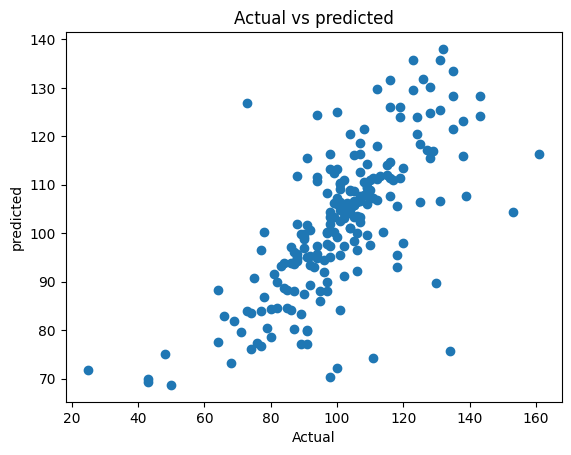

In [55]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test4, np.squeeze(model6.predict(X_test4)) )
print('r2_score:', r2_score)


from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test4, np.squeeze(model6.predict(X_test4)) )
mae= mean_absolute_error(Y_test4, np.squeeze(model6.predict(X_test4)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test4, np.squeeze(model6.predict(X_test4)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [56]:
prediction7 =np.squeeze(model6.predict([[80,2,2,129,prediction6]]))
print("Prediction: {}".format(prediction7))

y_prd=np.squeeze(np.squeeze(model6.predict(X_test4)) )
predic_dif=pd.DataFrame({'Actual':Y_test4,'predict':y_prd,"differences":Y_test4  -y_prd})
predic_dif[0:15]

1/1 [==============================] - 1s 811ms/step
Prediction: 112.62199401855469
7/7 [==============================] - 0s 13ms/step


,Actual,predict,differences
1036,104,101.135208,2.864792
2056,128,130.233521,-2.233521
148,134,75.645111,58.354889
1691,112,106.764313,5.235687
37,86,84.072418,1.927582
1867,73,126.772705,-53.772705
913,86,93.941345,-7.941345
124,98,70.343521,27.656479
847,86,97.199371,-11.199371
390,101,106.260620,-5.260620


## dense and RNN

In [57]:
from keras.layers import Dense, Dropout,Activation
from keras.models import Sequential
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
model7=Sequential()
model7.add(Dense(128, input_dim=4, activation='relu'))
model7.add(Dense(64,activation='relu'))
model7.add(Dense(1,activation='linear'))
model7.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model7.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               640       
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [58]:
model7.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 2s 21ms/step - loss: 5244.1699 - mae: 60.1938 - val_loss: 453.1206 - val_mae: 15.7370
Epoch 2/2000
37/37 [==============================] - 0s 10ms/step - loss: 403.1426 - mae: 14.4027 - val_loss: 412.4076 - val_mae: 14.6361
Epoch 3/2000
37/37 [==============================] - 0s 8ms/step - loss: 343.6725 - mae: 13.4287 - val_loss: 387.3214 - val_mae: 13.7497
Epoch 4/2000
37/37 [==============================] - 0s 9ms/step - loss: 322.9437 - mae: 12.7871 - val_loss: 370.2298 - val_mae: 13.3653
Epoch 5/2000
37/37 [==============================] - 0s 6ms/step - loss: 307.1122 - mae: 12.3626 - val_loss: 357.5064 - val_mae: 12.8633
Epoch 6/2000
37/37 [==============================] - 0s 9ms/step - loss: 297.2581 - mae: 12.0724 - val_loss: 348.6636 - val_mae: 12.5856
Epoch 7/2000
37/37 [==============================] - 0s 6ms/step - loss: 290.4783 - mae: 11.9348 - val_loss: 347.3443 - val_mae: 12.5964
Epoch 8/2000
37/37 [===========

Epoch 60/2000
37/37 [==============================] - 0s 6ms/step - loss: 272.6635 - mae: 11.6975 - val_loss: 328.2751 - val_mae: 12.1154
Epoch 61/2000
37/37 [==============================] - 0s 6ms/step - loss: 272.1492 - mae: 11.4993 - val_loss: 334.7606 - val_mae: 12.3371
Epoch 62/2000
37/37 [==============================] - 0s 6ms/step - loss: 276.6789 - mae: 11.6458 - val_loss: 325.8179 - val_mae: 12.1061
Epoch 63/2000
37/37 [==============================] - 0s 5ms/step - loss: 275.5447 - mae: 11.6997 - val_loss: 333.0668 - val_mae: 12.5377
Epoch 64/2000
37/37 [==============================] - 0s 5ms/step - loss: 271.8782 - mae: 11.5583 - val_loss: 325.1630 - val_mae: 12.1386
Epoch 65/2000
37/37 [==============================] - 0s 5ms/step - loss: 272.9781 - mae: 11.5644 - val_loss: 343.3381 - val_mae: 12.9406
Epoch 66/2000
37/37 [==============================] - 0s 7ms/step - loss: 276.0861 - mae: 11.8215 - val_loss: 342.7668 - val_mae: 12.5178
Epoch 67/2000
37/37 [======

Epoch 119/2000
37/37 [==============================] - 0s 5ms/step - loss: 269.5213 - mae: 11.4582 - val_loss: 330.5994 - val_mae: 12.5675
Epoch 120/2000
37/37 [==============================] - 0s 5ms/step - loss: 270.6448 - mae: 11.5670 - val_loss: 326.5765 - val_mae: 12.2090
Epoch 121/2000
37/37 [==============================] - 0s 5ms/step - loss: 268.7581 - mae: 11.5284 - val_loss: 323.5857 - val_mae: 12.0775
Epoch 122/2000
37/37 [==============================] - 0s 7ms/step - loss: 269.5017 - mae: 11.4757 - val_loss: 322.6246 - val_mae: 12.0466
Epoch 123/2000
37/37 [==============================] - 0s 5ms/step - loss: 277.8320 - mae: 11.6388 - val_loss: 323.1885 - val_mae: 12.0261
Epoch 124/2000
37/37 [==============================] - 0s 5ms/step - loss: 273.8889 - mae: 11.5902 - val_loss: 322.7059 - val_mae: 12.0437
Epoch 125/2000
37/37 [==============================] - 0s 5ms/step - loss: 274.4878 - mae: 11.5579 - val_loss: 321.7729 - val_mae: 12.1449
Epoch 126/2000
37/37

37/37 [==============================] - 0s 6ms/step - loss: 268.1547 - mae: 11.3950 - val_loss: 325.3195 - val_mae: 12.2428
Epoch 178/2000
37/37 [==============================] - 0s 6ms/step - loss: 262.7862 - mae: 11.2719 - val_loss: 320.5073 - val_mae: 11.9667
Epoch 179/2000
37/37 [==============================] - 0s 5ms/step - loss: 261.8689 - mae: 11.2618 - val_loss: 322.9796 - val_mae: 12.2295
Epoch 180/2000
37/37 [==============================] - 0s 5ms/step - loss: 266.8293 - mae: 11.4885 - val_loss: 327.7370 - val_mae: 12.1865
Epoch 181/2000
37/37 [==============================] - 0s 5ms/step - loss: 272.4757 - mae: 11.5240 - val_loss: 318.5465 - val_mae: 11.9328
Epoch 182/2000
37/37 [==============================] - 0s 5ms/step - loss: 262.3230 - mae: 11.3196 - val_loss: 334.2931 - val_mae: 12.3174
Epoch 183/2000
37/37 [==============================] - 0s 6ms/step - loss: 263.8677 - mae: 11.3286 - val_loss: 318.0111 - val_mae: 11.9578
Epoch 184/2000
37/37 [=============

37/37 [==============================] - 0s 5ms/step - loss: 261.5571 - mae: 11.2578 - val_loss: 321.5113 - val_mae: 12.0899
Epoch 236/2000
37/37 [==============================] - 0s 5ms/step - loss: 266.8153 - mae: 11.4238 - val_loss: 317.6735 - val_mae: 11.9519
Epoch 237/2000
37/37 [==============================] - 0s 5ms/step - loss: 265.4211 - mae: 11.3322 - val_loss: 323.9634 - val_mae: 12.2327
Epoch 238/2000
37/37 [==============================] - 0s 5ms/step - loss: 259.2589 - mae: 11.2777 - val_loss: 321.6451 - val_mae: 11.9420
Epoch 239/2000
37/37 [==============================] - 0s 6ms/step - loss: 261.3954 - mae: 11.1440 - val_loss: 316.7692 - val_mae: 11.8787
Epoch 240/2000
37/37 [==============================] - 0s 5ms/step - loss: 261.0851 - mae: 11.2231 - val_loss: 320.2885 - val_mae: 11.9016
Epoch 241/2000
37/37 [==============================] - 0s 5ms/step - loss: 261.0436 - mae: 11.2209 - val_loss: 316.2223 - val_mae: 11.9792
Epoch 242/2000
37/37 [=============

37/37 [==============================] - 0s 5ms/step - loss: 258.1453 - mae: 11.1644 - val_loss: 316.6121 - val_mae: 11.8541
Epoch 294/2000
37/37 [==============================] - 0s 5ms/step - loss: 260.9050 - mae: 11.2540 - val_loss: 324.8356 - val_mae: 12.0555
Epoch 295/2000
37/37 [==============================] - 0s 5ms/step - loss: 260.1028 - mae: 11.2871 - val_loss: 328.3351 - val_mae: 12.1311
Epoch 296/2000
37/37 [==============================] - 0s 5ms/step - loss: 259.0792 - mae: 11.2110 - val_loss: 322.2468 - val_mae: 12.0592
Epoch 297/2000
37/37 [==============================] - 0s 7ms/step - loss: 257.9999 - mae: 11.1896 - val_loss: 317.8976 - val_mae: 11.8719
Epoch 298/2000
37/37 [==============================] - 0s 4ms/step - loss: 260.7992 - mae: 11.1830 - val_loss: 324.7728 - val_mae: 12.0545
Epoch 299/2000
37/37 [==============================] - 0s 5ms/step - loss: 263.3936 - mae: 11.2034 - val_loss: 319.1585 - val_mae: 11.9457
Epoch 300/2000
37/37 [=============

37/37 [==============================] - 0s 6ms/step - loss: 221.4387 - mae: 10.0389 - val_loss: 302.1818 - val_mae: 11.3441
Epoch 784/2000
37/37 [==============================] - 0s 6ms/step - loss: 235.2357 - mae: 10.3093 - val_loss: 300.9379 - val_mae: 11.2792
Epoch 785/2000
37/37 [==============================] - 0s 6ms/step - loss: 226.9997 - mae: 10.1261 - val_loss: 294.0820 - val_mae: 11.2937
Epoch 786/2000
37/37 [==============================] - 0s 6ms/step - loss: 229.2150 - mae: 10.2485 - val_loss: 300.9416 - val_mae: 11.4184
Epoch 787/2000
37/37 [==============================] - 0s 5ms/step - loss: 224.8027 - mae: 10.0381 - val_loss: 294.8799 - val_mae: 11.2683
Epoch 788/2000
37/37 [==============================] - 0s 5ms/step - loss: 226.7607 - mae: 10.2179 - val_loss: 297.8716 - val_mae: 11.2161
Epoch 789/2000
37/37 [==============================] - 0s 5ms/step - loss: 227.4923 - mae: 10.1982 - val_loss: 313.0684 - val_mae: 11.5259
Epoch 790/2000
37/37 [=============

Epoch 842/2000
37/37 [==============================] - 0s 6ms/step - loss: 222.2449 - mae: 10.0698 - val_loss: 314.3494 - val_mae: 12.1117
Epoch 843/2000
37/37 [==============================] - 0s 6ms/step - loss: 219.6973 - mae: 9.8889 - val_loss: 294.7784 - val_mae: 11.1719
Epoch 844/2000
37/37 [==============================] - 0s 6ms/step - loss: 218.3403 - mae: 9.8680 - val_loss: 295.2231 - val_mae: 11.2283
Epoch 845/2000
37/37 [==============================] - 0s 5ms/step - loss: 221.5417 - mae: 9.9405 - val_loss: 294.9371 - val_mae: 11.1753
Epoch 846/2000
37/37 [==============================] - 0s 6ms/step - loss: 219.2542 - mae: 9.9295 - val_loss: 307.2527 - val_mae: 11.3364
Epoch 847/2000
37/37 [==============================] - 0s 5ms/step - loss: 224.1936 - mae: 10.0900 - val_loss: 304.2197 - val_mae: 11.4003
Epoch 848/2000
37/37 [==============================] - 0s 6ms/step - loss: 223.6940 - mae: 10.0171 - val_loss: 297.3639 - val_mae: 11.3254
Epoch 849/2000
37/37 [==

Epoch 901/2000
37/37 [==============================] - 0s 5ms/step - loss: 223.0516 - mae: 9.9609 - val_loss: 297.0659 - val_mae: 11.2703
Epoch 902/2000
37/37 [==============================] - 0s 4ms/step - loss: 221.9055 - mae: 9.9593 - val_loss: 300.4481 - val_mae: 11.2699
Epoch 903/2000
37/37 [==============================] - 0s 5ms/step - loss: 221.9363 - mae: 9.9233 - val_loss: 304.6594 - val_mae: 11.2722
Epoch 904/2000
37/37 [==============================] - 0s 4ms/step - loss: 223.7090 - mae: 10.0007 - val_loss: 295.6312 - val_mae: 11.2369
Epoch 905/2000
37/37 [==============================] - 0s 5ms/step - loss: 218.4405 - mae: 9.9364 - val_loss: 304.4183 - val_mae: 11.5825
Epoch 906/2000
37/37 [==============================] - 0s 8ms/step - loss: 220.4847 - mae: 10.0972 - val_loss: 307.3560 - val_mae: 11.3762
Epoch 907/2000
37/37 [==============================] - 0s 6ms/step - loss: 218.3089 - mae: 9.9505 - val_loss: 305.9693 - val_mae: 11.2870
Epoch 908/2000
37/37 [===

Epoch 960/2000
37/37 [==============================] - 0s 5ms/step - loss: 213.3873 - mae: 9.8178 - val_loss: 298.3649 - val_mae: 11.1551
Epoch 961/2000
37/37 [==============================] - 0s 4ms/step - loss: 213.5117 - mae: 9.7392 - val_loss: 326.9057 - val_mae: 11.5839
Epoch 962/2000
37/37 [==============================] - 0s 5ms/step - loss: 215.6573 - mae: 9.7654 - val_loss: 297.9458 - val_mae: 11.4200
Epoch 963/2000
37/37 [==============================] - 0s 6ms/step - loss: 222.2384 - mae: 10.0220 - val_loss: 303.8361 - val_mae: 11.7156
Epoch 964/2000
37/37 [==============================] - 0s 6ms/step - loss: 217.6984 - mae: 9.8657 - val_loss: 296.4293 - val_mae: 11.2560
Epoch 965/2000
37/37 [==============================] - 0s 6ms/step - loss: 216.4599 - mae: 9.8771 - val_loss: 298.2463 - val_mae: 11.2888
Epoch 966/2000
37/37 [==============================] - 0s 5ms/step - loss: 214.7640 - mae: 9.7118 - val_loss: 294.1369 - val_mae: 11.2126
Epoch 967/2000
37/37 [====

Epoch 1019/2000
37/37 [==============================] - 0s 6ms/step - loss: 215.1212 - mae: 9.8107 - val_loss: 296.0908 - val_mae: 11.1552
Epoch 1020/2000
37/37 [==============================] - 0s 6ms/step - loss: 217.3975 - mae: 9.9007 - val_loss: 300.4114 - val_mae: 11.5213
Epoch 1021/2000
37/37 [==============================] - 0s 4ms/step - loss: 218.6157 - mae: 9.8632 - val_loss: 299.1226 - val_mae: 11.1575
Epoch 1022/2000
37/37 [==============================] - 0s 5ms/step - loss: 215.7197 - mae: 9.7634 - val_loss: 303.3289 - val_mae: 11.2393
Epoch 1023/2000
37/37 [==============================] - 0s 5ms/step - loss: 219.1601 - mae: 9.8681 - val_loss: 297.0973 - val_mae: 11.2119
Epoch 1024/2000
37/37 [==============================] - 0s 5ms/step - loss: 215.1222 - mae: 9.8975 - val_loss: 299.3519 - val_mae: 11.4204
Epoch 1025/2000
37/37 [==============================] - 0s 5ms/step - loss: 211.3861 - mae: 9.6711 - val_loss: 294.3075 - val_mae: 11.2885
Epoch 1026/2000
37/3

37/37 [==============================] - 0s 5ms/step - loss: 208.7276 - mae: 9.6189 - val_loss: 296.9352 - val_mae: 11.2894
Epoch 1078/2000
37/37 [==============================] - 0s 5ms/step - loss: 207.6921 - mae: 9.5608 - val_loss: 297.1111 - val_mae: 11.0839
Epoch 1079/2000
37/37 [==============================] - 0s 5ms/step - loss: 206.0295 - mae: 9.4907 - val_loss: 297.8445 - val_mae: 11.1376
Epoch 1080/2000
37/37 [==============================] - 0s 5ms/step - loss: 209.3889 - mae: 9.5617 - val_loss: 294.2180 - val_mae: 11.1594
Epoch 1081/2000
37/37 [==============================] - 0s 6ms/step - loss: 216.9758 - mae: 9.9746 - val_loss: 297.5801 - val_mae: 11.1877
Epoch 1082/2000
37/37 [==============================] - 0s 5ms/step - loss: 212.9040 - mae: 9.7329 - val_loss: 329.3591 - val_mae: 11.6998
Epoch 1083/2000
37/37 [==============================] - 0s 5ms/step - loss: 210.7191 - mae: 9.7909 - val_loss: 297.5820 - val_mae: 11.1340
Epoch 1084/2000
37/37 [=============

37/37 [==============================] - 0s 5ms/step - loss: 204.2087 - mae: 9.5369 - val_loss: 309.5579 - val_mae: 11.4488
Epoch 1136/2000
37/37 [==============================] - 0s 5ms/step - loss: 208.0624 - mae: 9.6308 - val_loss: 298.6276 - val_mae: 11.1616
Epoch 1137/2000
37/37 [==============================] - 0s 6ms/step - loss: 203.4374 - mae: 9.5350 - val_loss: 301.6741 - val_mae: 11.2174
Epoch 1138/2000
37/37 [==============================] - 0s 6ms/step - loss: 204.5121 - mae: 9.4465 - val_loss: 313.2029 - val_mae: 11.3972
Epoch 1139/2000
37/37 [==============================] - 0s 5ms/step - loss: 210.7509 - mae: 9.7042 - val_loss: 306.5983 - val_mae: 11.1725
Epoch 1140/2000
37/37 [==============================] - 0s 5ms/step - loss: 205.6088 - mae: 9.5147 - val_loss: 297.4625 - val_mae: 11.2877
Epoch 1141/2000
37/37 [==============================] - 0s 4ms/step - loss: 203.3102 - mae: 9.5858 - val_loss: 304.4555 - val_mae: 11.2095
Epoch 1142/2000
37/37 [=============

37/37 [==============================] - 0s 7ms/step - loss: 205.0431 - mae: 9.4261 - val_loss: 308.1357 - val_mae: 11.7580
Epoch 1194/2000
37/37 [==============================] - 0s 6ms/step - loss: 206.5629 - mae: 9.6573 - val_loss: 306.9381 - val_mae: 11.6375
Epoch 1195/2000
37/37 [==============================] - 0s 5ms/step - loss: 202.7925 - mae: 9.4035 - val_loss: 324.8297 - val_mae: 11.5469
Epoch 1196/2000
37/37 [==============================] - 0s 5ms/step - loss: 204.3889 - mae: 9.5032 - val_loss: 298.3876 - val_mae: 11.1870
Epoch 1197/2000
37/37 [==============================] - 0s 5ms/step - loss: 204.1044 - mae: 9.4696 - val_loss: 314.8014 - val_mae: 11.4889
Epoch 1198/2000
37/37 [==============================] - 0s 5ms/step - loss: 203.0683 - mae: 9.4869 - val_loss: 310.8252 - val_mae: 11.2496
Epoch 1199/2000
37/37 [==============================] - 0s 6ms/step - loss: 200.3638 - mae: 9.4343 - val_loss: 321.8850 - val_mae: 11.6809
Epoch 1200/2000
37/37 [=============

37/37 [==============================] - 0s 5ms/step - loss: 199.8746 - mae: 9.4833 - val_loss: 302.6715 - val_mae: 11.3519
Epoch 1252/2000
37/37 [==============================] - 0s 5ms/step - loss: 199.9167 - mae: 9.3201 - val_loss: 299.4050 - val_mae: 11.1205
Epoch 1253/2000
37/37 [==============================] - 0s 6ms/step - loss: 203.6933 - mae: 9.5643 - val_loss: 299.2361 - val_mae: 11.2180
Epoch 1254/2000
37/37 [==============================] - 0s 5ms/step - loss: 199.0415 - mae: 9.3375 - val_loss: 317.0125 - val_mae: 11.6679
Epoch 1255/2000
37/37 [==============================] - 0s 5ms/step - loss: 202.0972 - mae: 9.5480 - val_loss: 312.9102 - val_mae: 11.5613
Epoch 1256/2000
37/37 [==============================] - 0s 5ms/step - loss: 205.3482 - mae: 9.7542 - val_loss: 317.0266 - val_mae: 11.7661
Epoch 1257/2000
37/37 [==============================] - 0s 5ms/step - loss: 201.4438 - mae: 9.5297 - val_loss: 351.9864 - val_mae: 12.1578
Epoch 1258/2000
37/37 [=============

37/37 [==============================] - 0s 7ms/step - loss: 196.9217 - mae: 9.4554 - val_loss: 303.3627 - val_mae: 11.2105
Epoch 1310/2000
37/37 [==============================] - 0s 6ms/step - loss: 201.2542 - mae: 9.3820 - val_loss: 328.7577 - val_mae: 11.7779
Epoch 1311/2000
37/37 [==============================] - 0s 5ms/step - loss: 200.8455 - mae: 9.6031 - val_loss: 301.4211 - val_mae: 11.3707
Epoch 1312/2000
37/37 [==============================] - 0s 5ms/step - loss: 200.4630 - mae: 9.4019 - val_loss: 310.4884 - val_mae: 11.2796
Epoch 1313/2000
37/37 [==============================] - 0s 6ms/step - loss: 195.9381 - mae: 9.2369 - val_loss: 306.9330 - val_mae: 11.1421
Epoch 1314/2000
37/37 [==============================] - 0s 6ms/step - loss: 198.3154 - mae: 9.4554 - val_loss: 317.2222 - val_mae: 11.3775
Epoch 1315/2000
37/37 [==============================] - 0s 6ms/step - loss: 202.9139 - mae: 9.5200 - val_loss: 299.8450 - val_mae: 11.1182
Epoch 1316/2000
37/37 [=============

37/37 [==============================] - 0s 6ms/step - loss: 203.2138 - mae: 9.5052 - val_loss: 329.0878 - val_mae: 11.4723
Epoch 1368/2000
37/37 [==============================] - 0s 6ms/step - loss: 196.6306 - mae: 9.2383 - val_loss: 302.3936 - val_mae: 11.1846
Epoch 1369/2000
37/37 [==============================] - 0s 6ms/step - loss: 199.7908 - mae: 9.3848 - val_loss: 312.5333 - val_mae: 11.6617
Epoch 1370/2000
37/37 [==============================] - 0s 6ms/step - loss: 196.1426 - mae: 9.2498 - val_loss: 328.5400 - val_mae: 11.5793
Epoch 1371/2000
37/37 [==============================] - 0s 6ms/step - loss: 198.8069 - mae: 9.4410 - val_loss: 350.4505 - val_mae: 12.3877
Epoch 1372/2000
37/37 [==============================] - 0s 6ms/step - loss: 206.2701 - mae: 9.7221 - val_loss: 324.5586 - val_mae: 11.6357
Epoch 1373/2000
37/37 [==============================] - 0s 5ms/step - loss: 196.0165 - mae: 9.1600 - val_loss: 304.2784 - val_mae: 11.2541
Epoch 1374/2000
37/37 [=============

37/37 [==============================] - 0s 5ms/step - loss: 197.9524 - mae: 9.2978 - val_loss: 304.3614 - val_mae: 11.2518
Epoch 1426/2000
37/37 [==============================] - 0s 5ms/step - loss: 198.0705 - mae: 9.3575 - val_loss: 306.9316 - val_mae: 11.4841
Epoch 1427/2000
37/37 [==============================] - 0s 6ms/step - loss: 201.2173 - mae: 9.3152 - val_loss: 312.8553 - val_mae: 11.2727
Epoch 1428/2000
37/37 [==============================] - 0s 7ms/step - loss: 191.5314 - mae: 9.0868 - val_loss: 308.3956 - val_mae: 11.4311
Epoch 1429/2000
37/37 [==============================] - 0s 6ms/step - loss: 190.1860 - mae: 9.0532 - val_loss: 309.1824 - val_mae: 11.2604
Epoch 1430/2000
37/37 [==============================] - 0s 6ms/step - loss: 195.4731 - mae: 9.3179 - val_loss: 331.7841 - val_mae: 12.4898
Epoch 1431/2000
37/37 [==============================] - 0s 6ms/step - loss: 194.1362 - mae: 9.3291 - val_loss: 318.7280 - val_mae: 11.4433
Epoch 1432/2000
37/37 [=============

37/37 [==============================] - 0s 5ms/step - loss: 193.7064 - mae: 9.1743 - val_loss: 317.2020 - val_mae: 11.2870
Epoch 1484/2000
37/37 [==============================] - 0s 7ms/step - loss: 185.0405 - mae: 8.9188 - val_loss: 311.4600 - val_mae: 11.7142
Epoch 1485/2000
37/37 [==============================] - 0s 7ms/step - loss: 194.2439 - mae: 9.2327 - val_loss: 314.7704 - val_mae: 11.7980
Epoch 1486/2000
37/37 [==============================] - 0s 7ms/step - loss: 191.3035 - mae: 9.1470 - val_loss: 310.9362 - val_mae: 11.3290
Epoch 1487/2000
37/37 [==============================] - 0s 7ms/step - loss: 187.0735 - mae: 8.9450 - val_loss: 316.5231 - val_mae: 11.3413
Epoch 1488/2000
37/37 [==============================] - 0s 7ms/step - loss: 187.3326 - mae: 8.9980 - val_loss: 307.2944 - val_mae: 11.2980
Epoch 1489/2000
37/37 [==============================] - 0s 7ms/step - loss: 186.7377 - mae: 8.9969 - val_loss: 312.3609 - val_mae: 11.5085
Epoch 1490/2000
37/37 [=============

37/37 [==============================] - 0s 4ms/step - loss: 186.9873 - mae: 8.9543 - val_loss: 307.4337 - val_mae: 11.4530
Epoch 1542/2000
37/37 [==============================] - 0s 4ms/step - loss: 190.8135 - mae: 9.1583 - val_loss: 321.2376 - val_mae: 11.4680
Epoch 1543/2000
37/37 [==============================] - 0s 4ms/step - loss: 183.9475 - mae: 9.0339 - val_loss: 314.0598 - val_mae: 11.4632
Epoch 1544/2000
37/37 [==============================] - 0s 4ms/step - loss: 182.1152 - mae: 8.9599 - val_loss: 301.4467 - val_mae: 11.4009
Epoch 1545/2000
37/37 [==============================] - 0s 4ms/step - loss: 194.9993 - mae: 9.3187 - val_loss: 308.2354 - val_mae: 11.3176
Epoch 1546/2000
37/37 [==============================] - 0s 4ms/step - loss: 191.0636 - mae: 9.0855 - val_loss: 328.3001 - val_mae: 11.5085
Epoch 1547/2000
37/37 [==============================] - 0s 4ms/step - loss: 185.8869 - mae: 9.0051 - val_loss: 322.0020 - val_mae: 11.4208
Epoch 1548/2000
37/37 [=============

37/37 [==============================] - 0s 4ms/step - loss: 179.0479 - mae: 8.9258 - val_loss: 328.3564 - val_mae: 11.7018
Epoch 1600/2000
37/37 [==============================] - 0s 4ms/step - loss: 187.1100 - mae: 9.0632 - val_loss: 315.0095 - val_mae: 11.6046
Epoch 1601/2000
37/37 [==============================] - 0s 4ms/step - loss: 188.3364 - mae: 9.2286 - val_loss: 324.7177 - val_mae: 11.4844
Epoch 1602/2000
37/37 [==============================] - 0s 4ms/step - loss: 185.1948 - mae: 9.1044 - val_loss: 324.0066 - val_mae: 11.5019
Epoch 1603/2000
37/37 [==============================] - 0s 4ms/step - loss: 184.3631 - mae: 9.0502 - val_loss: 307.6097 - val_mae: 11.3740
Epoch 1604/2000
37/37 [==============================] - 0s 4ms/step - loss: 186.9143 - mae: 9.0481 - val_loss: 320.3615 - val_mae: 11.9048
Epoch 1605/2000
37/37 [==============================] - 0s 4ms/step - loss: 184.4533 - mae: 9.0195 - val_loss: 310.8722 - val_mae: 11.3363
Epoch 1606/2000
37/37 [=============

37/37 [==============================] - 0s 4ms/step - loss: 186.6142 - mae: 8.9904 - val_loss: 315.7637 - val_mae: 11.3407
Epoch 1658/2000
37/37 [==============================] - 0s 4ms/step - loss: 186.4352 - mae: 9.1525 - val_loss: 311.3706 - val_mae: 11.5454
Epoch 1659/2000
37/37 [==============================] - 0s 4ms/step - loss: 187.0783 - mae: 8.9953 - val_loss: 311.7442 - val_mae: 11.3489
Epoch 1660/2000
37/37 [==============================] - 0s 4ms/step - loss: 185.2675 - mae: 9.1882 - val_loss: 317.5456 - val_mae: 11.6118
Epoch 1661/2000
37/37 [==============================] - 0s 3ms/step - loss: 189.5529 - mae: 9.3367 - val_loss: 325.8895 - val_mae: 11.5875
Epoch 1662/2000
37/37 [==============================] - 0s 4ms/step - loss: 184.6772 - mae: 9.0511 - val_loss: 310.1129 - val_mae: 11.3390
Epoch 1663/2000
37/37 [==============================] - 0s 4ms/step - loss: 188.7179 - mae: 9.1288 - val_loss: 318.0362 - val_mae: 11.4698
Epoch 1664/2000
37/37 [=============

37/37 [==============================] - 0s 4ms/step - loss: 184.2492 - mae: 8.9863 - val_loss: 315.0270 - val_mae: 11.4090
Epoch 1716/2000
37/37 [==============================] - 0s 4ms/step - loss: 179.1996 - mae: 8.7717 - val_loss: 327.5655 - val_mae: 11.5305
Epoch 1717/2000
37/37 [==============================] - 0s 4ms/step - loss: 176.1388 - mae: 8.7594 - val_loss: 308.0336 - val_mae: 11.4483
Epoch 1718/2000
37/37 [==============================] - 0s 4ms/step - loss: 191.8628 - mae: 9.3117 - val_loss: 323.2264 - val_mae: 11.6485
Epoch 1719/2000
37/37 [==============================] - 0s 4ms/step - loss: 184.7879 - mae: 9.1505 - val_loss: 320.8736 - val_mae: 11.5868
Epoch 1720/2000
37/37 [==============================] - 0s 4ms/step - loss: 182.5006 - mae: 8.9081 - val_loss: 323.6036 - val_mae: 11.4371
Epoch 1721/2000
37/37 [==============================] - 0s 4ms/step - loss: 179.6382 - mae: 8.8431 - val_loss: 326.2439 - val_mae: 11.6316
Epoch 1722/2000
37/37 [=============

37/37 [==============================] - 0s 4ms/step - loss: 182.8440 - mae: 8.9634 - val_loss: 314.4446 - val_mae: 11.4651
Epoch 1774/2000
37/37 [==============================] - 0s 4ms/step - loss: 179.7114 - mae: 8.8975 - val_loss: 347.1844 - val_mae: 11.8804
Epoch 1775/2000
37/37 [==============================] - 0s 4ms/step - loss: 188.6225 - mae: 9.2921 - val_loss: 317.3263 - val_mae: 11.7470
Epoch 1776/2000
37/37 [==============================] - 0s 4ms/step - loss: 182.6953 - mae: 8.9067 - val_loss: 330.4160 - val_mae: 12.0239
Epoch 1777/2000
37/37 [==============================] - 0s 4ms/step - loss: 179.7305 - mae: 8.8852 - val_loss: 318.7369 - val_mae: 11.5578
Epoch 1778/2000
37/37 [==============================] - 0s 4ms/step - loss: 184.3148 - mae: 9.0949 - val_loss: 324.8940 - val_mae: 11.4786
Epoch 1779/2000
37/37 [==============================] - 0s 4ms/step - loss: 180.7317 - mae: 8.9184 - val_loss: 326.6805 - val_mae: 11.4484
Epoch 1780/2000
37/37 [=============

37/37 [==============================] - 0s 4ms/step - loss: 182.2925 - mae: 9.0235 - val_loss: 331.9858 - val_mae: 11.6883
Epoch 1832/2000
37/37 [==============================] - 0s 4ms/step - loss: 177.0419 - mae: 8.7127 - val_loss: 314.8944 - val_mae: 11.4680
Epoch 1833/2000
37/37 [==============================] - 0s 4ms/step - loss: 179.7905 - mae: 8.9258 - val_loss: 316.0478 - val_mae: 11.3785
Epoch 1834/2000
37/37 [==============================] - 0s 4ms/step - loss: 183.9872 - mae: 9.0862 - val_loss: 327.5514 - val_mae: 11.5930
Epoch 1835/2000
37/37 [==============================] - 0s 4ms/step - loss: 184.9512 - mae: 9.0842 - val_loss: 327.6173 - val_mae: 11.5335
Epoch 1836/2000
37/37 [==============================] - 0s 4ms/step - loss: 184.7207 - mae: 8.9357 - val_loss: 316.1648 - val_mae: 11.6638
Epoch 1837/2000
37/37 [==============================] - 0s 5ms/step - loss: 184.0302 - mae: 9.0084 - val_loss: 328.5787 - val_mae: 12.1625
Epoch 1838/2000
37/37 [=============

37/37 [==============================] - 0s 4ms/step - loss: 175.2601 - mae: 8.7750 - val_loss: 318.4475 - val_mae: 11.6909
Epoch 1890/2000
37/37 [==============================] - 0s 4ms/step - loss: 176.6768 - mae: 8.8504 - val_loss: 325.0489 - val_mae: 11.4597
Epoch 1891/2000
37/37 [==============================] - 0s 4ms/step - loss: 178.1941 - mae: 8.8699 - val_loss: 328.9981 - val_mae: 11.5912
Epoch 1892/2000
37/37 [==============================] - 0s 4ms/step - loss: 176.9800 - mae: 8.9218 - val_loss: 318.0374 - val_mae: 11.5775
Epoch 1893/2000
37/37 [==============================] - 0s 4ms/step - loss: 192.1865 - mae: 9.3540 - val_loss: 325.6428 - val_mae: 11.9041
Epoch 1894/2000
37/37 [==============================] - 0s 4ms/step - loss: 178.4943 - mae: 9.1250 - val_loss: 324.3029 - val_mae: 11.7140
Epoch 1895/2000
37/37 [==============================] - 0s 4ms/step - loss: 178.3871 - mae: 8.9529 - val_loss: 319.5275 - val_mae: 11.4324
Epoch 1896/2000
37/37 [=============

37/37 [==============================] - 0s 4ms/step - loss: 178.5645 - mae: 8.8938 - val_loss: 329.3485 - val_mae: 11.5832
Epoch 1948/2000
37/37 [==============================] - 0s 4ms/step - loss: 174.1059 - mae: 8.8035 - val_loss: 350.6650 - val_mae: 11.8889
Epoch 1949/2000
37/37 [==============================] - 0s 4ms/step - loss: 180.8867 - mae: 8.8176 - val_loss: 323.9627 - val_mae: 11.6926
Epoch 1950/2000
37/37 [==============================] - 0s 4ms/step - loss: 181.0200 - mae: 9.0137 - val_loss: 329.4447 - val_mae: 11.9311
Epoch 1951/2000
37/37 [==============================] - 0s 4ms/step - loss: 177.5339 - mae: 8.8311 - val_loss: 328.7557 - val_mae: 12.2415
Epoch 1952/2000
37/37 [==============================] - 0s 4ms/step - loss: 186.2491 - mae: 9.2318 - val_loss: 332.4273 - val_mae: 11.7822
Epoch 1953/2000
37/37 [==============================] - 0s 4ms/step - loss: 183.3689 - mae: 9.1166 - val_loss: 333.0885 - val_mae: 11.6309
Epoch 1954/2000
37/37 [=============

In [59]:
prediction8 = np.squeeze(model7.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction8))

1/1 [==============================] - 0s 135ms/step
Prediction: 106.10086822509766


In [60]:
y_prd=np.squeeze(np.squeeze(model7.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

23/23 [==============================] - 0s 2ms/step
      Actual     predict  differences
898       87   91.061180    -4.061180
182       65   70.407578    -5.407578
565      103  100.959656     2.040344
457       69   74.671677    -5.671677
1852     104  117.298683   -13.298683
...      ...         ...          ...
1812     112  116.548187    -4.548187
913       86   90.326630    -4.326630
1036     104  105.851288    -1.851288
629       74   83.425201    -9.425201
61        63   78.778221   -15.778221

[714 rows x 3 columns]


In [61]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

-74.35604858398438
166.49288940429688
108.63140869140625
61.834083557128906
62.102638244628906
59.30693054199219
68.39344024658203
-68.20946502685547
87.58405303955078
83.76345825195312
59.98395538330078
143.3358154296875
-70.75836944580078
69.30307006835938
88.13849639892578
lower bound: -55.13460643520534
upper bound: 58.71361181283858


In [62]:
A.drop(A[(A['differences'] >58)].index, inplace=True)
A.drop(A[(A['differences'] <-55)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['HotWaterCostAveragePerDwelling']

print(B)

from sklearn.model_selection import train_test_split
X5=B.drop('Actual',axis=1)
Y5=B['Actual']
X_train5, X_test5, Y_train5, Y_test5 =train_test_split(X5,Y5, test_size=0.3, random_state = 0)

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
6                    1        1              4                          213   
9                    1        4              4                          114   
10                   2        1              4                          153   
11                   2        2              4                          151   
14                   2        4              2                          156   
...                ...      ...            ...                          ...   
2363               198        2              3                           96   
2367               198        4              1                          111   
2368               198        4              3                           88   
2372               199        4              3                           87   
2376               200        4              3                           99   

      Actual     predict  
6         87  106.776222

In [63]:
from keras.layers import Dense, Dropout,Activation, LSTM
from keras.models import Sequential
model8=Sequential()
model8.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train5.shape[1],1)))
model8.add(Dropout(0.2))
model8.add(LSTM(units=64, activation='relu', return_sequences=True))
model8.add(Dropout(0.3))
model8.add(LSTM(units=32, activation='relu', return_sequences=True))
model8.add(Dropout(0.4))
model8.add(LSTM(units=64, activation='relu'))
model8.add(Dropout(0.5))
model8.add(Dense(units=1))
model8.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 5, 128)            66560     
                                                                 
 dropout_4 (Dropout)         (None, 5, 128)            0         
                                                                 
 lstm_9 (LSTM)               (None, 5, 64)             49408     
                                                                 
 dropout_5 (Dropout)         (None, 5, 64)             0         
                                                                 
 lstm_10 (LSTM)              (None, 5, 32)             12416     
                                                                 
 dropout_6 (Dropout)         (None, 5, 32)             0         
                                                                 
 lstm_11 (LSTM)              (None, 64)              

In [64]:
model8.fit(X_train5,Y_train5 ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
11/11 [==============================] - 12s 162ms/step - loss: 10160.5576 - mae: 99.2086 - val_loss: 7771.3989 - val_mae: 86.6922
Epoch 2/2000
11/11 [==============================] - 0s 23ms/step - loss: 6367.9194 - mae: 70.9538 - val_loss: 3063.5845 - val_mae: 45.6703
Epoch 3/2000
11/11 [==============================] - 0s 22ms/step - loss: 4317.3320 - mae: 58.1855 - val_loss: 2373.7559 - val_mae: 43.8578
Epoch 4/2000
11/11 [==============================] - 0s 21ms/step - loss: 3711.3811 - mae: 52.3342 - val_loss: 1077.9100 - val_mae: 26.2026
Epoch 5/2000
11/11 [==============================] - 0s 21ms/step - loss: 2575.4487 - mae: 41.1563 - val_loss: 527.9053 - val_mae: 15.6938
Epoch 6/2000
11/11 [==============================] - 0s 22ms/step - loss: 1942.8007 - mae: 36.0234 - val_loss: 804.3405 - val_mae: 23.4173
Epoch 7/2000
11/11 [==============================] - 0s 21ms/step - loss: 1455.5499 - mae: 31.0967 - val_loss: 1067.3298 - val_mae: 28.0482
Epoch 8/2000

11/11 [==============================] - 0s 22ms/step - loss: 549.6841 - mae: 18.7271 - val_loss: 330.7932 - val_mae: 14.7128
Epoch 60/2000
11/11 [==============================] - 0s 24ms/step - loss: 629.7438 - mae: 19.2893 - val_loss: 537.0705 - val_mae: 19.6876
Epoch 61/2000
11/11 [==============================] - 0s 24ms/step - loss: 617.2201 - mae: 19.4074 - val_loss: 636.7899 - val_mae: 21.6999
Epoch 62/2000
11/11 [==============================] - 0s 23ms/step - loss: 545.5530 - mae: 18.1986 - val_loss: 418.1855 - val_mae: 17.0230
Epoch 63/2000
11/11 [==============================] - 0s 22ms/step - loss: 621.5372 - mae: 20.0779 - val_loss: 367.9137 - val_mae: 15.7721
Epoch 64/2000
11/11 [==============================] - 0s 23ms/step - loss: 567.4329 - mae: 18.8734 - val_loss: 374.2966 - val_mae: 15.9301
Epoch 65/2000
11/11 [==============================] - 0s 23ms/step - loss: 619.8118 - mae: 19.1463 - val_loss: 375.5381 - val_mae: 15.9854
Epoch 66/2000
11/11 [=============

11/11 [==============================] - 0s 23ms/step - loss: 481.2072 - mae: 17.0657 - val_loss: 319.2277 - val_mae: 14.5169
Epoch 118/2000
11/11 [==============================] - 0s 23ms/step - loss: 546.9316 - mae: 18.1316 - val_loss: 366.4095 - val_mae: 15.9221
Epoch 119/2000
11/11 [==============================] - 0s 22ms/step - loss: 483.0824 - mae: 17.3360 - val_loss: 249.7809 - val_mae: 12.1984
Epoch 120/2000
11/11 [==============================] - 0s 23ms/step - loss: 492.9004 - mae: 16.8736 - val_loss: 230.7239 - val_mae: 11.4233
Epoch 121/2000
11/11 [==============================] - 0s 25ms/step - loss: 496.3577 - mae: 17.7548 - val_loss: 217.4099 - val_mae: 10.9927
Epoch 122/2000
11/11 [==============================] - 0s 21ms/step - loss: 538.5378 - mae: 18.5525 - val_loss: 213.6599 - val_mae: 11.0588
Epoch 123/2000
11/11 [==============================] - 0s 21ms/step - loss: 498.3918 - mae: 17.2048 - val_loss: 237.5572 - val_mae: 11.7938
Epoch 124/2000
11/11 [======

11/11 [==============================] - 0s 24ms/step - loss: 482.4109 - mae: 16.9012 - val_loss: 244.9310 - val_mae: 12.1206
Epoch 176/2000
11/11 [==============================] - 0s 22ms/step - loss: 449.8141 - mae: 16.0522 - val_loss: 217.5968 - val_mae: 11.1898
Epoch 177/2000
11/11 [==============================] - 0s 23ms/step - loss: 437.9479 - mae: 16.7670 - val_loss: 221.8545 - val_mae: 11.3030
Epoch 178/2000
11/11 [==============================] - 0s 23ms/step - loss: 434.9141 - mae: 16.1357 - val_loss: 240.7776 - val_mae: 11.9835
Epoch 179/2000
11/11 [==============================] - 0s 23ms/step - loss: 461.8168 - mae: 16.5275 - val_loss: 237.7829 - val_mae: 11.8331
Epoch 180/2000
11/11 [==============================] - 0s 23ms/step - loss: 414.3238 - mae: 15.9925 - val_loss: 219.3304 - val_mae: 11.2322
Epoch 181/2000
11/11 [==============================] - 0s 24ms/step - loss: 470.3608 - mae: 16.7862 - val_loss: 262.1740 - val_mae: 12.7662
Epoch 182/2000
11/11 [======

11/11 [==============================] - 0s 23ms/step - loss: 415.0786 - mae: 15.5180 - val_loss: 217.6951 - val_mae: 11.1621
Epoch 234/2000
11/11 [==============================] - 0s 22ms/step - loss: 453.6779 - mae: 16.5068 - val_loss: 237.4191 - val_mae: 11.8685
Epoch 235/2000
11/11 [==============================] - 0s 21ms/step - loss: 424.6900 - mae: 15.9288 - val_loss: 221.4368 - val_mae: 11.2885
Epoch 236/2000
11/11 [==============================] - 0s 21ms/step - loss: 475.6686 - mae: 16.7301 - val_loss: 247.2893 - val_mae: 12.2220
Epoch 237/2000
11/11 [==============================] - 0s 21ms/step - loss: 446.6707 - mae: 16.9254 - val_loss: 273.4899 - val_mae: 13.1702
Epoch 238/2000
11/11 [==============================] - 0s 22ms/step - loss: 478.3328 - mae: 16.4698 - val_loss: 350.0230 - val_mae: 15.5999
Epoch 239/2000
11/11 [==============================] - 0s 25ms/step - loss: 398.9519 - mae: 15.5520 - val_loss: 204.1843 - val_mae: 10.8014
Epoch 240/2000
11/11 [======

11/11 [==============================] - 0s 23ms/step - loss: 460.2234 - mae: 16.8698 - val_loss: 254.4659 - val_mae: 12.5755
Epoch 292/2000
11/11 [==============================] - 0s 25ms/step - loss: 397.8404 - mae: 15.0857 - val_loss: 195.6597 - val_mae: 10.5523
Epoch 293/2000
11/11 [==============================] - 0s 23ms/step - loss: 480.6390 - mae: 17.0980 - val_loss: 251.9202 - val_mae: 12.3977
Epoch 294/2000
11/11 [==============================] - 0s 22ms/step - loss: 368.8102 - mae: 15.1464 - val_loss: 256.5460 - val_mae: 12.5958
Epoch 295/2000
11/11 [==============================] - 0s 24ms/step - loss: 419.8236 - mae: 15.7754 - val_loss: 246.6046 - val_mae: 12.2060
Epoch 296/2000
11/11 [==============================] - 0s 22ms/step - loss: 464.7116 - mae: 17.1149 - val_loss: 219.6240 - val_mae: 11.2455
Epoch 297/2000
11/11 [==============================] - 0s 22ms/step - loss: 416.8066 - mae: 16.0951 - val_loss: 243.5684 - val_mae: 12.0299
Epoch 298/2000
11/11 [======

11/11 [==============================] - 0s 22ms/step - loss: 387.2618 - mae: 15.6530 - val_loss: 212.3959 - val_mae: 10.9827
Epoch 350/2000
11/11 [==============================] - 0s 22ms/step - loss: 461.8219 - mae: 16.3224 - val_loss: 218.6460 - val_mae: 11.2016
Epoch 351/2000
11/11 [==============================] - 0s 24ms/step - loss: 387.8637 - mae: 15.0384 - val_loss: 202.7157 - val_mae: 10.6455
Epoch 352/2000
11/11 [==============================] - 0s 22ms/step - loss: 416.1912 - mae: 16.0706 - val_loss: 209.6719 - val_mae: 10.9110
Epoch 353/2000
11/11 [==============================] - 0s 22ms/step - loss: 402.1588 - mae: 15.7949 - val_loss: 226.6660 - val_mae: 11.4322
Epoch 354/2000
11/11 [==============================] - 0s 22ms/step - loss: 392.4481 - mae: 15.8905 - val_loss: 224.1507 - val_mae: 11.3898
Epoch 355/2000
11/11 [==============================] - 0s 23ms/step - loss: 433.7406 - mae: 15.6794 - val_loss: 258.7087 - val_mae: 12.6219
Epoch 356/2000
11/11 [======

11/11 [==============================] - 0s 23ms/step - loss: 376.9122 - mae: 15.6907 - val_loss: 279.8740 - val_mae: 13.5901
Epoch 408/2000
11/11 [==============================] - 0s 23ms/step - loss: 396.5894 - mae: 15.2596 - val_loss: 223.9692 - val_mae: 11.4993
Epoch 409/2000
11/11 [==============================] - 0s 22ms/step - loss: 334.6293 - mae: 14.1378 - val_loss: 235.4551 - val_mae: 11.8515
Epoch 410/2000
11/11 [==============================] - 0s 25ms/step - loss: 463.5352 - mae: 16.9391 - val_loss: 197.3981 - val_mae: 10.4999
Epoch 411/2000
11/11 [==============================] - 0s 22ms/step - loss: 405.6617 - mae: 15.3852 - val_loss: 190.8350 - val_mae: 10.5179
Epoch 412/2000
11/11 [==============================] - 0s 23ms/step - loss: 393.6914 - mae: 15.3254 - val_loss: 252.5942 - val_mae: 12.4587
Epoch 413/2000
11/11 [==============================] - 0s 22ms/step - loss: 404.8212 - mae: 15.2342 - val_loss: 241.7468 - val_mae: 12.1389
Epoch 414/2000
11/11 [======

11/11 [==============================] - 0s 26ms/step - loss: 356.4496 - mae: 14.8671 - val_loss: 181.4359 - val_mae: 10.0767
Epoch 466/2000
11/11 [==============================] - 0s 24ms/step - loss: 364.7368 - mae: 15.1003 - val_loss: 218.0167 - val_mae: 11.3630
Epoch 467/2000
11/11 [==============================] - 0s 24ms/step - loss: 404.5232 - mae: 15.9989 - val_loss: 256.4409 - val_mae: 12.7047
Epoch 468/2000
11/11 [==============================] - 0s 23ms/step - loss: 373.3438 - mae: 14.9195 - val_loss: 191.7819 - val_mae: 10.4252
Epoch 469/2000
11/11 [==============================] - 0s 24ms/step - loss: 460.7482 - mae: 16.6847 - val_loss: 184.8004 - val_mae: 10.2685
Epoch 470/2000
11/11 [==============================] - 0s 22ms/step - loss: 407.1933 - mae: 15.2803 - val_loss: 225.6491 - val_mae: 11.5726
Epoch 471/2000
11/11 [==============================] - 0s 24ms/step - loss: 429.8609 - mae: 16.0942 - val_loss: 209.2392 - val_mae: 10.8280
Epoch 472/2000
11/11 [======

11/11 [==============================] - 0s 23ms/step - loss: 395.4651 - mae: 15.4995 - val_loss: 273.7045 - val_mae: 12.9872
Epoch 524/2000
11/11 [==============================] - 0s 24ms/step - loss: 354.4729 - mae: 14.7177 - val_loss: 232.7566 - val_mae: 11.5891
Epoch 525/2000
11/11 [==============================] - 0s 27ms/step - loss: 347.5199 - mae: 14.6544 - val_loss: 188.3170 - val_mae: 10.1950
Epoch 526/2000
11/11 [==============================] - 0s 27ms/step - loss: 422.2819 - mae: 15.7305 - val_loss: 192.0696 - val_mae: 10.3882
Epoch 527/2000
11/11 [==============================] - 0s 25ms/step - loss: 448.8769 - mae: 16.3230 - val_loss: 278.8607 - val_mae: 13.3436
Epoch 528/2000
11/11 [==============================] - 0s 24ms/step - loss: 415.1745 - mae: 15.5905 - val_loss: 237.0504 - val_mae: 12.0767
Epoch 529/2000
11/11 [==============================] - 0s 24ms/step - loss: 452.0968 - mae: 16.5376 - val_loss: 186.3771 - val_mae: 10.4171
Epoch 530/2000
11/11 [======

11/11 [==============================] - 0s 22ms/step - loss: 395.8548 - mae: 15.2460 - val_loss: 184.2930 - val_mae: 10.2425
Epoch 582/2000
11/11 [==============================] - 0s 25ms/step - loss: 382.7498 - mae: 15.6356 - val_loss: 194.1875 - val_mae: 10.7115
Epoch 583/2000
11/11 [==============================] - 0s 24ms/step - loss: 415.6360 - mae: 15.6779 - val_loss: 177.3282 - val_mae: 10.0683
Epoch 584/2000
11/11 [==============================] - 0s 22ms/step - loss: 415.1675 - mae: 15.5713 - val_loss: 185.1997 - val_mae: 10.1738
Epoch 585/2000
11/11 [==============================] - 0s 23ms/step - loss: 444.6531 - mae: 16.3437 - val_loss: 170.2837 - val_mae: 9.5700
Epoch 586/2000
11/11 [==============================] - 0s 22ms/step - loss: 364.8896 - mae: 15.5089 - val_loss: 234.9996 - val_mae: 11.7413
Epoch 587/2000
11/11 [==============================] - 0s 23ms/step - loss: 364.7843 - mae: 15.3334 - val_loss: 187.0692 - val_mae: 10.1176
Epoch 588/2000
11/11 [=======

11/11 [==============================] - 0s 23ms/step - loss: 398.5106 - mae: 15.1763 - val_loss: 184.1382 - val_mae: 10.0530
Epoch 640/2000
11/11 [==============================] - 0s 23ms/step - loss: 399.9624 - mae: 15.7095 - val_loss: 169.0334 - val_mae: 9.6418
Epoch 641/2000
11/11 [==============================] - 0s 22ms/step - loss: 357.2574 - mae: 15.1434 - val_loss: 179.7466 - val_mae: 9.9454
Epoch 642/2000
11/11 [==============================] - 0s 22ms/step - loss: 400.6466 - mae: 15.5315 - val_loss: 213.8341 - val_mae: 11.1334
Epoch 643/2000
11/11 [==============================] - 0s 23ms/step - loss: 366.1693 - mae: 14.9033 - val_loss: 174.9735 - val_mae: 9.8170
Epoch 644/2000
11/11 [==============================] - 0s 21ms/step - loss: 345.8858 - mae: 14.2981 - val_loss: 237.7658 - val_mae: 12.0584
Epoch 645/2000
11/11 [==============================] - 0s 22ms/step - loss: 325.0324 - mae: 14.2690 - val_loss: 180.7090 - val_mae: 9.9870
Epoch 646/2000
11/11 [==========

11/11 [==============================] - 0s 22ms/step - loss: 310.1541 - mae: 13.6479 - val_loss: 187.2536 - val_mae: 10.2565
Epoch 698/2000
11/11 [==============================] - 0s 23ms/step - loss: 337.8247 - mae: 14.5965 - val_loss: 179.8316 - val_mae: 9.8942
Epoch 699/2000
11/11 [==============================] - 0s 22ms/step - loss: 366.9250 - mae: 14.7566 - val_loss: 171.8668 - val_mae: 9.6571
Epoch 700/2000
11/11 [==============================] - 0s 22ms/step - loss: 395.7976 - mae: 15.6062 - val_loss: 163.8367 - val_mae: 9.5101
Epoch 701/2000
11/11 [==============================] - 0s 23ms/step - loss: 348.0733 - mae: 14.7481 - val_loss: 178.4299 - val_mae: 9.8310
Epoch 702/2000
11/11 [==============================] - 0s 22ms/step - loss: 377.3259 - mae: 15.5325 - val_loss: 207.1767 - val_mae: 10.7331
Epoch 703/2000
11/11 [==============================] - 0s 23ms/step - loss: 345.9590 - mae: 14.7346 - val_loss: 229.3522 - val_mae: 11.4254
Epoch 704/2000
11/11 [==========

11/11 [==============================] - 0s 18ms/step - loss: 366.7334 - mae: 15.0777 - val_loss: 180.4656 - val_mae: 9.8716
Epoch 756/2000
11/11 [==============================] - 0s 18ms/step - loss: 426.0445 - mae: 15.8325 - val_loss: 204.8515 - val_mae: 10.4082
Epoch 757/2000
11/11 [==============================] - 0s 18ms/step - loss: 311.8089 - mae: 14.0982 - val_loss: 201.8203 - val_mae: 10.5136
Epoch 758/2000
11/11 [==============================] - 0s 18ms/step - loss: 341.2586 - mae: 14.5251 - val_loss: 275.3970 - val_mae: 12.7945
Epoch 759/2000
11/11 [==============================] - 0s 18ms/step - loss: 370.0746 - mae: 15.1694 - val_loss: 178.7624 - val_mae: 9.9309
Epoch 760/2000
11/11 [==============================] - 0s 18ms/step - loss: 409.8314 - mae: 15.8450 - val_loss: 204.2882 - val_mae: 10.7200
Epoch 761/2000
11/11 [==============================] - 0s 18ms/step - loss: 362.4864 - mae: 14.9614 - val_loss: 216.5230 - val_mae: 10.8910
Epoch 762/2000
11/11 [========

11/11 [==============================] - 0s 20ms/step - loss: 341.3754 - mae: 14.4617 - val_loss: 209.5655 - val_mae: 10.2373
Epoch 814/2000
11/11 [==============================] - 0s 21ms/step - loss: 342.6167 - mae: 14.8266 - val_loss: 198.2055 - val_mae: 10.2234
Epoch 815/2000
11/11 [==============================] - 0s 21ms/step - loss: 321.5763 - mae: 13.9004 - val_loss: 222.4113 - val_mae: 11.0447
Epoch 816/2000
11/11 [==============================] - 0s 21ms/step - loss: 331.6801 - mae: 14.4900 - val_loss: 184.0591 - val_mae: 9.8076
Epoch 817/2000
11/11 [==============================] - 0s 21ms/step - loss: 372.5378 - mae: 14.9833 - val_loss: 221.4626 - val_mae: 11.0364
Epoch 818/2000
11/11 [==============================] - 0s 20ms/step - loss: 379.2777 - mae: 15.0597 - val_loss: 182.8187 - val_mae: 9.7217
Epoch 819/2000
11/11 [==============================] - 0s 20ms/step - loss: 346.7076 - mae: 14.7093 - val_loss: 184.3593 - val_mae: 10.0383
Epoch 820/2000
11/11 [========

11/11 [==============================] - 0s 20ms/step - loss: 370.2368 - mae: 15.2680 - val_loss: 204.2507 - val_mae: 10.5674
Epoch 872/2000
11/11 [==============================] - 0s 22ms/step - loss: 353.0448 - mae: 14.6841 - val_loss: 183.4301 - val_mae: 9.5921
Epoch 873/2000
11/11 [==============================] - 0s 21ms/step - loss: 378.5893 - mae: 15.4558 - val_loss: 220.8737 - val_mae: 11.0771
Epoch 874/2000
11/11 [==============================] - 0s 19ms/step - loss: 338.0244 - mae: 14.2952 - val_loss: 216.2521 - val_mae: 10.8587
Epoch 875/2000
11/11 [==============================] - 0s 20ms/step - loss: 311.9777 - mae: 13.9773 - val_loss: 185.9893 - val_mae: 9.7321
Epoch 876/2000
11/11 [==============================] - 0s 22ms/step - loss: 307.5201 - mae: 13.6404 - val_loss: 230.3042 - val_mae: 11.2701
Epoch 877/2000
11/11 [==============================] - 0s 24ms/step - loss: 334.5527 - mae: 14.3334 - val_loss: 199.3610 - val_mae: 10.3780
Epoch 878/2000
11/11 [========

11/11 [==============================] - 0s 35ms/step - loss: 320.7968 - mae: 13.6259 - val_loss: 191.5653 - val_mae: 9.9611
Epoch 930/2000
11/11 [==============================] - 0s 35ms/step - loss: 293.7339 - mae: 13.2840 - val_loss: 186.8541 - val_mae: 9.7447
Epoch 931/2000
11/11 [==============================] - 0s 36ms/step - loss: 358.7113 - mae: 14.7501 - val_loss: 208.3260 - val_mae: 10.6426
Epoch 932/2000
11/11 [==============================] - 0s 31ms/step - loss: 430.0008 - mae: 16.0977 - val_loss: 202.4970 - val_mae: 10.4469
Epoch 933/2000
11/11 [==============================] - 0s 32ms/step - loss: 369.4323 - mae: 14.7253 - val_loss: 236.7433 - val_mae: 11.6393
Epoch 934/2000
11/11 [==============================] - 0s 36ms/step - loss: 361.5021 - mae: 14.5224 - val_loss: 177.1277 - val_mae: 9.8422
Epoch 935/2000
11/11 [==============================] - 0s 33ms/step - loss: 346.6954 - mae: 14.1988 - val_loss: 258.4155 - val_mae: 12.4776
Epoch 936/2000
11/11 [=========

11/11 [==============================] - 0s 34ms/step - loss: 322.2485 - mae: 13.8616 - val_loss: 181.0101 - val_mae: 10.0103
Epoch 988/2000
11/11 [==============================] - 0s 36ms/step - loss: 343.9064 - mae: 14.4410 - val_loss: 209.0400 - val_mae: 10.7769
Epoch 989/2000
11/11 [==============================] - 0s 34ms/step - loss: 321.9521 - mae: 14.2167 - val_loss: 172.9261 - val_mae: 9.7787
Epoch 990/2000
11/11 [==============================] - 0s 33ms/step - loss: 294.6424 - mae: 13.6538 - val_loss: 182.2218 - val_mae: 9.8523
Epoch 991/2000
11/11 [==============================] - 0s 35ms/step - loss: 328.3344 - mae: 14.1795 - val_loss: 170.3810 - val_mae: 9.4460
Epoch 992/2000
11/11 [==============================] - 0s 31ms/step - loss: 304.6248 - mae: 13.5092 - val_loss: 166.6561 - val_mae: 9.3331
Epoch 993/2000
11/11 [==============================] - 0s 32ms/step - loss: 345.7575 - mae: 14.6922 - val_loss: 214.9245 - val_mae: 10.8409
Epoch 994/2000
11/11 [==========

11/11 [==============================] - 0s 36ms/step - loss: 314.4995 - mae: 13.8167 - val_loss: 184.0661 - val_mae: 9.8455
Epoch 1046/2000
11/11 [==============================] - 0s 32ms/step - loss: 367.4576 - mae: 14.9675 - val_loss: 172.1174 - val_mae: 9.5768
Epoch 1047/2000
11/11 [==============================] - 0s 34ms/step - loss: 286.3538 - mae: 13.4019 - val_loss: 188.7163 - val_mae: 10.1666
Epoch 1048/2000
11/11 [==============================] - 0s 31ms/step - loss: 340.2385 - mae: 13.9543 - val_loss: 171.3242 - val_mae: 9.5187
Epoch 1049/2000
11/11 [==============================] - 0s 31ms/step - loss: 307.0926 - mae: 13.7283 - val_loss: 190.0214 - val_mae: 10.1450
Epoch 1050/2000
11/11 [==============================] - 0s 34ms/step - loss: 310.6208 - mae: 13.9768 - val_loss: 162.4875 - val_mae: 9.0287
Epoch 1051/2000
11/11 [==============================] - 0s 41ms/step - loss: 322.6233 - mae: 13.6934 - val_loss: 169.5898 - val_mae: 9.1698
Epoch 1052/2000
11/11 [====

11/11 [==============================] - 0s 34ms/step - loss: 331.6138 - mae: 14.1420 - val_loss: 180.1573 - val_mae: 9.7510
Epoch 1104/2000
11/11 [==============================] - 0s 33ms/step - loss: 319.0509 - mae: 14.0766 - val_loss: 182.1870 - val_mae: 9.8478
Epoch 1105/2000
11/11 [==============================] - 0s 32ms/step - loss: 275.1810 - mae: 13.2642 - val_loss: 201.7734 - val_mae: 10.3690
Epoch 1106/2000
11/11 [==============================] - 0s 35ms/step - loss: 324.2718 - mae: 13.7751 - val_loss: 179.1729 - val_mae: 10.0120
Epoch 1107/2000
11/11 [==============================] - 0s 35ms/step - loss: 321.5934 - mae: 14.4307 - val_loss: 203.8395 - val_mae: 10.6673
Epoch 1108/2000
11/11 [==============================] - 0s 34ms/step - loss: 290.4805 - mae: 13.7244 - val_loss: 204.9075 - val_mae: 10.3944
Epoch 1109/2000
11/11 [==============================] - 0s 32ms/step - loss: 309.7941 - mae: 14.0220 - val_loss: 255.3331 - val_mae: 12.5969
Epoch 1110/2000
11/11 [=

Epoch 1161/2000
11/11 [==============================] - 0s 33ms/step - loss: 324.7474 - mae: 14.0653 - val_loss: 227.5783 - val_mae: 11.1691
Epoch 1162/2000
11/11 [==============================] - 0s 32ms/step - loss: 291.8783 - mae: 13.4358 - val_loss: 180.8012 - val_mae: 9.7177
Epoch 1163/2000
11/11 [==============================] - 0s 35ms/step - loss: 360.6367 - mae: 15.0807 - val_loss: 179.9732 - val_mae: 9.7176
Epoch 1164/2000
11/11 [==============================] - 0s 35ms/step - loss: 305.6584 - mae: 14.0179 - val_loss: 235.4804 - val_mae: 10.9731
Epoch 1165/2000
11/11 [==============================] - 0s 35ms/step - loss: 288.8822 - mae: 13.6942 - val_loss: 237.9238 - val_mae: 11.2362
Epoch 1166/2000
11/11 [==============================] - 0s 32ms/step - loss: 302.3922 - mae: 13.5291 - val_loss: 190.5209 - val_mae: 10.2553
Epoch 1167/2000
11/11 [==============================] - 0s 33ms/step - loss: 281.5345 - mae: 13.2903 - val_loss: 164.7957 - val_mae: 9.3430
Epoch 116

Epoch 1219/2000
11/11 [==============================] - 0s 34ms/step - loss: 277.7606 - mae: 13.2291 - val_loss: 215.8569 - val_mae: 11.0650
Epoch 1220/2000
11/11 [==============================] - 0s 33ms/step - loss: 285.9044 - mae: 13.0583 - val_loss: 168.9169 - val_mae: 9.3227
Epoch 1221/2000
11/11 [==============================] - 0s 35ms/step - loss: 322.4729 - mae: 14.1182 - val_loss: 208.5229 - val_mae: 10.8602
Epoch 1222/2000
11/11 [==============================] - 0s 34ms/step - loss: 303.4769 - mae: 13.8967 - val_loss: 190.4653 - val_mae: 9.9303
Epoch 1223/2000
11/11 [==============================] - 0s 35ms/step - loss: 287.1473 - mae: 13.4209 - val_loss: 163.5829 - val_mae: 8.9201
Epoch 1224/2000
11/11 [==============================] - 0s 34ms/step - loss: 269.2018 - mae: 12.8700 - val_loss: 173.5372 - val_mae: 9.3858
Epoch 1225/2000
11/11 [==============================] - 0s 33ms/step - loss: 281.7092 - mae: 12.9665 - val_loss: 171.1953 - val_mae: 9.4154
Epoch 1226/

Epoch 1277/2000
11/11 [==============================] - 0s 34ms/step - loss: 308.2372 - mae: 13.7510 - val_loss: 197.0015 - val_mae: 10.2232
Epoch 1278/2000
11/11 [==============================] - 0s 32ms/step - loss: 267.7842 - mae: 12.8783 - val_loss: 177.0866 - val_mae: 9.4978
Epoch 1279/2000
11/11 [==============================] - 0s 31ms/step - loss: 274.9119 - mae: 13.1517 - val_loss: 182.3382 - val_mae: 9.7760
Epoch 1280/2000
11/11 [==============================] - 0s 34ms/step - loss: 282.6479 - mae: 13.0182 - val_loss: 165.6129 - val_mae: 9.5288
Epoch 1281/2000
11/11 [==============================] - 0s 35ms/step - loss: 284.6960 - mae: 13.2203 - val_loss: 195.9188 - val_mae: 10.6892
Epoch 1282/2000
11/11 [==============================] - 0s 34ms/step - loss: 327.8972 - mae: 14.1122 - val_loss: 187.4440 - val_mae: 9.8951
Epoch 1283/2000
11/11 [==============================] - 0s 34ms/step - loss: 258.1611 - mae: 12.5873 - val_loss: 192.9908 - val_mae: 9.9501
Epoch 1284/

Epoch 1335/2000
11/11 [==============================] - 0s 34ms/step - loss: 304.8063 - mae: 13.7009 - val_loss: 173.4178 - val_mae: 9.5216
Epoch 1336/2000
11/11 [==============================] - 0s 36ms/step - loss: 283.8560 - mae: 13.2081 - val_loss: 167.7020 - val_mae: 9.3958
Epoch 1337/2000
11/11 [==============================] - 0s 35ms/step - loss: 300.4370 - mae: 13.5516 - val_loss: 212.1272 - val_mae: 10.6630
Epoch 1338/2000
11/11 [==============================] - 0s 32ms/step - loss: 314.3739 - mae: 13.9850 - val_loss: 172.2166 - val_mae: 9.3889
Epoch 1339/2000
11/11 [==============================] - 0s 31ms/step - loss: 358.7192 - mae: 14.7960 - val_loss: 206.1931 - val_mae: 10.0377
Epoch 1340/2000
11/11 [==============================] - 0s 35ms/step - loss: 286.3878 - mae: 13.1979 - val_loss: 193.5684 - val_mae: 9.5500
Epoch 1341/2000
11/11 [==============================] - 0s 36ms/step - loss: 275.0318 - mae: 12.7929 - val_loss: 213.0597 - val_mae: 10.6688
Epoch 1342

Epoch 1393/2000
11/11 [==============================] - 0s 33ms/step - loss: 316.7658 - mae: 14.1125 - val_loss: 193.5155 - val_mae: 10.2405
Epoch 1394/2000
11/11 [==============================] - 0s 32ms/step - loss: 298.2919 - mae: 13.7297 - val_loss: 193.5722 - val_mae: 10.1528
Epoch 1395/2000
11/11 [==============================] - 0s 30ms/step - loss: 258.9928 - mae: 12.4576 - val_loss: 190.0947 - val_mae: 9.6179
Epoch 1396/2000
11/11 [==============================] - 0s 32ms/step - loss: 301.0869 - mae: 13.7551 - val_loss: 197.3334 - val_mae: 10.0395
Epoch 1397/2000
11/11 [==============================] - 0s 32ms/step - loss: 319.8621 - mae: 14.2323 - val_loss: 220.8225 - val_mae: 11.0652
Epoch 1398/2000
11/11 [==============================] - 0s 33ms/step - loss: 285.6263 - mae: 13.1067 - val_loss: 189.3551 - val_mae: 10.2351
Epoch 1399/2000
11/11 [==============================] - 0s 34ms/step - loss: 292.0439 - mae: 13.4911 - val_loss: 208.3266 - val_mae: 10.5673
Epoch 1

Epoch 1451/2000
11/11 [==============================] - 0s 31ms/step - loss: 302.2572 - mae: 13.5729 - val_loss: 177.6786 - val_mae: 9.5047
Epoch 1452/2000
11/11 [==============================] - 0s 36ms/step - loss: 316.4728 - mae: 13.8445 - val_loss: 226.4914 - val_mae: 11.2727
Epoch 1453/2000
11/11 [==============================] - 0s 36ms/step - loss: 291.9956 - mae: 13.4636 - val_loss: 175.7837 - val_mae: 9.4313
Epoch 1454/2000
11/11 [==============================] - 0s 34ms/step - loss: 310.2429 - mae: 14.0029 - val_loss: 220.3661 - val_mae: 10.7843
Epoch 1455/2000
11/11 [==============================] - 0s 33ms/step - loss: 329.2421 - mae: 14.3017 - val_loss: 199.8298 - val_mae: 10.0895
Epoch 1456/2000
11/11 [==============================] - 0s 31ms/step - loss: 275.5812 - mae: 12.9071 - val_loss: 177.1491 - val_mae: 9.4517
Epoch 1457/2000
11/11 [==============================] - 0s 32ms/step - loss: 314.7243 - mae: 14.0815 - val_loss: 219.7925 - val_mae: 10.5396
Epoch 145

Epoch 1509/2000
11/11 [==============================] - 0s 33ms/step - loss: 275.6977 - mae: 12.9938 - val_loss: 195.5851 - val_mae: 9.9155
Epoch 1510/2000
11/11 [==============================] - 0s 31ms/step - loss: 268.0703 - mae: 12.6032 - val_loss: 194.8976 - val_mae: 9.9472
Epoch 1511/2000
11/11 [==============================] - 0s 33ms/step - loss: 255.3257 - mae: 12.4066 - val_loss: 177.9779 - val_mae: 9.3358
Epoch 1512/2000
11/11 [==============================] - 0s 32ms/step - loss: 272.6607 - mae: 12.9242 - val_loss: 210.1531 - val_mae: 10.6913
Epoch 1513/2000
11/11 [==============================] - 0s 34ms/step - loss: 282.7082 - mae: 13.1430 - val_loss: 193.5577 - val_mae: 9.8575
Epoch 1514/2000
11/11 [==============================] - 0s 32ms/step - loss: 276.2257 - mae: 12.7553 - val_loss: 194.6253 - val_mae: 9.6758
Epoch 1515/2000
11/11 [==============================] - 0s 35ms/step - loss: 278.0358 - mae: 13.2212 - val_loss: 225.7980 - val_mae: 10.2604
Epoch 1516/

Epoch 1567/2000
11/11 [==============================] - 0s 33ms/step - loss: 283.7419 - mae: 13.0944 - val_loss: 188.7068 - val_mae: 9.7386
Epoch 1568/2000
11/11 [==============================] - 0s 36ms/step - loss: 292.8785 - mae: 12.9634 - val_loss: 210.7237 - val_mae: 10.8143
Epoch 1569/2000
11/11 [==============================] - 0s 32ms/step - loss: 320.8105 - mae: 14.0699 - val_loss: 187.0307 - val_mae: 9.9172
Epoch 1570/2000
11/11 [==============================] - 0s 33ms/step - loss: 284.5698 - mae: 13.6695 - val_loss: 285.4994 - val_mae: 13.3189
Epoch 1571/2000
11/11 [==============================] - 0s 33ms/step - loss: 306.4234 - mae: 13.4869 - val_loss: 158.7796 - val_mae: 9.1378
Epoch 1572/2000
11/11 [==============================] - 0s 32ms/step - loss: 266.4205 - mae: 13.2019 - val_loss: 214.8783 - val_mae: 11.0046
Epoch 1573/2000
11/11 [==============================] - 0s 31ms/step - loss: 276.6360 - mae: 12.8781 - val_loss: 190.6662 - val_mae: 10.1645
Epoch 157

Epoch 1625/2000
11/11 [==============================] - 0s 34ms/step - loss: 243.3704 - mae: 12.5097 - val_loss: 229.7395 - val_mae: 10.8135
Epoch 1626/2000
11/11 [==============================] - 0s 33ms/step - loss: 278.8774 - mae: 12.8506 - val_loss: 193.0211 - val_mae: 9.8670
Epoch 1627/2000
11/11 [==============================] - 0s 35ms/step - loss: 277.5925 - mae: 12.8947 - val_loss: 221.4292 - val_mae: 10.8656
Epoch 1628/2000
11/11 [==============================] - 0s 36ms/step - loss: 306.5215 - mae: 13.7722 - val_loss: 215.2375 - val_mae: 9.8904
Epoch 1629/2000
11/11 [==============================] - 0s 39ms/step - loss: 266.4336 - mae: 12.7241 - val_loss: 229.7014 - val_mae: 10.4804
Epoch 1630/2000
11/11 [==============================] - 0s 36ms/step - loss: 320.7595 - mae: 13.7069 - val_loss: 181.8574 - val_mae: 9.4427
Epoch 1631/2000
11/11 [==============================] - 0s 35ms/step - loss: 273.9079 - mae: 13.3340 - val_loss: 240.8557 - val_mae: 11.8597
Epoch 163

Epoch 1683/2000
11/11 [==============================] - 0s 35ms/step - loss: 277.0834 - mae: 12.7145 - val_loss: 221.9441 - val_mae: 10.3420
Epoch 1684/2000
11/11 [==============================] - 0s 35ms/step - loss: 277.5005 - mae: 13.0433 - val_loss: 191.3646 - val_mae: 9.5729
Epoch 1685/2000
11/11 [==============================] - 0s 37ms/step - loss: 289.0092 - mae: 13.4692 - val_loss: 189.8415 - val_mae: 9.6105
Epoch 1686/2000
11/11 [==============================] - 0s 36ms/step - loss: 291.5162 - mae: 13.1762 - val_loss: 220.3009 - val_mae: 10.2680
Epoch 1687/2000
11/11 [==============================] - 0s 31ms/step - loss: 255.2003 - mae: 12.3775 - val_loss: 234.7727 - val_mae: 10.3745
Epoch 1688/2000
11/11 [==============================] - 0s 35ms/step - loss: 254.8132 - mae: 12.5790 - val_loss: 207.0730 - val_mae: 9.9898
Epoch 1689/2000
11/11 [==============================] - 0s 34ms/step - loss: 269.5886 - mae: 12.5509 - val_loss: 185.3790 - val_mae: 9.4051
Epoch 1690

Epoch 1741/2000
11/11 [==============================] - 0s 37ms/step - loss: 256.6889 - mae: 12.7839 - val_loss: 192.3883 - val_mae: 9.8285
Epoch 1742/2000
11/11 [==============================] - 0s 34ms/step - loss: 243.6348 - mae: 11.9670 - val_loss: 182.6533 - val_mae: 9.6028
Epoch 1743/2000
11/11 [==============================] - 0s 32ms/step - loss: 245.7393 - mae: 12.4267 - val_loss: 242.5507 - val_mae: 11.5697
Epoch 1744/2000
11/11 [==============================] - 0s 37ms/step - loss: 320.6686 - mae: 14.1397 - val_loss: 219.1118 - val_mae: 10.7664
Epoch 1745/2000
11/11 [==============================] - 0s 34ms/step - loss: 350.5097 - mae: 14.2747 - val_loss: 178.1022 - val_mae: 9.4321
Epoch 1746/2000
11/11 [==============================] - 0s 31ms/step - loss: 297.1998 - mae: 13.3993 - val_loss: 204.0179 - val_mae: 10.5240
Epoch 1747/2000
11/11 [==============================] - 0s 35ms/step - loss: 260.9742 - mae: 12.5934 - val_loss: 171.9603 - val_mae: 9.3442
Epoch 1748

Epoch 1799/2000
11/11 [==============================] - 0s 33ms/step - loss: 271.6760 - mae: 13.4429 - val_loss: 215.4539 - val_mae: 10.5399
Epoch 1800/2000
11/11 [==============================] - 0s 35ms/step - loss: 242.5314 - mae: 12.0928 - val_loss: 183.9371 - val_mae: 9.4735
Epoch 1801/2000
11/11 [==============================] - 0s 34ms/step - loss: 260.4395 - mae: 12.4237 - val_loss: 203.1189 - val_mae: 10.2085
Epoch 1802/2000
11/11 [==============================] - 0s 35ms/step - loss: 245.0218 - mae: 12.2723 - val_loss: 191.8245 - val_mae: 9.9596
Epoch 1803/2000
11/11 [==============================] - 0s 32ms/step - loss: 230.7614 - mae: 11.7800 - val_loss: 208.4158 - val_mae: 10.1879
Epoch 1804/2000
11/11 [==============================] - 0s 33ms/step - loss: 251.6376 - mae: 12.6360 - val_loss: 170.1990 - val_mae: 9.1736
Epoch 1805/2000
11/11 [==============================] - 0s 35ms/step - loss: 284.7563 - mae: 12.8914 - val_loss: 177.6223 - val_mae: 9.3678
Epoch 1806

Epoch 1857/2000
11/11 [==============================] - 0s 32ms/step - loss: 265.0788 - mae: 12.4571 - val_loss: 234.9501 - val_mae: 10.6290
Epoch 1858/2000
11/11 [==============================] - 0s 34ms/step - loss: 271.4926 - mae: 13.1673 - val_loss: 191.8302 - val_mae: 9.6492
Epoch 1859/2000
11/11 [==============================] - 0s 33ms/step - loss: 274.9538 - mae: 13.0068 - val_loss: 185.5759 - val_mae: 9.5183
Epoch 1860/2000
11/11 [==============================] - 0s 32ms/step - loss: 267.0276 - mae: 12.9992 - val_loss: 213.9010 - val_mae: 10.2641
Epoch 1861/2000
11/11 [==============================] - 0s 33ms/step - loss: 242.1046 - mae: 12.2218 - val_loss: 187.4727 - val_mae: 9.8393
Epoch 1862/2000
11/11 [==============================] - 0s 31ms/step - loss: 304.1810 - mae: 13.5383 - val_loss: 281.3389 - val_mae: 12.7881
Epoch 1863/2000
11/11 [==============================] - 0s 32ms/step - loss: 269.4206 - mae: 12.9175 - val_loss: 209.5283 - val_mae: 10.2860
Epoch 186

Epoch 1915/2000
11/11 [==============================] - 0s 36ms/step - loss: 259.0709 - mae: 12.1948 - val_loss: 177.7083 - val_mae: 9.5252
Epoch 1916/2000
11/11 [==============================] - 0s 33ms/step - loss: 251.6486 - mae: 12.4214 - val_loss: 195.6791 - val_mae: 9.9908
Epoch 1917/2000
11/11 [==============================] - 0s 30ms/step - loss: 213.4183 - mae: 11.5351 - val_loss: 175.0359 - val_mae: 9.3656
Epoch 1918/2000
11/11 [==============================] - 0s 34ms/step - loss: 265.2545 - mae: 12.6545 - val_loss: 185.1510 - val_mae: 9.5227
Epoch 1919/2000
11/11 [==============================] - 0s 34ms/step - loss: 265.4379 - mae: 12.5268 - val_loss: 248.7864 - val_mae: 11.6617
Epoch 1920/2000
11/11 [==============================] - 0s 32ms/step - loss: 291.4508 - mae: 13.4428 - val_loss: 199.6911 - val_mae: 9.9642
Epoch 1921/2000
11/11 [==============================] - 0s 34ms/step - loss: 266.6555 - mae: 12.7806 - val_loss: 209.3714 - val_mae: 10.3349
Epoch 1922/

Epoch 1973/2000
11/11 [==============================] - 0s 37ms/step - loss: 261.5806 - mae: 12.8355 - val_loss: 198.2898 - val_mae: 9.7880
Epoch 1974/2000
11/11 [==============================] - 0s 34ms/step - loss: 268.4498 - mae: 12.6743 - val_loss: 202.7256 - val_mae: 10.2479
Epoch 1975/2000
11/11 [==============================] - 0s 34ms/step - loss: 254.4798 - mae: 12.4597 - val_loss: 180.4456 - val_mae: 9.5061
Epoch 1976/2000
11/11 [==============================] - 0s 36ms/step - loss: 262.2307 - mae: 12.9069 - val_loss: 183.1304 - val_mae: 9.5140
Epoch 1977/2000
11/11 [==============================] - 0s 36ms/step - loss: 263.1229 - mae: 12.3390 - val_loss: 181.7909 - val_mae: 9.5291
Epoch 1978/2000
11/11 [==============================] - 0s 32ms/step - loss: 275.9894 - mae: 13.0488 - val_loss: 194.8464 - val_mae: 9.9461
Epoch 1979/2000
11/11 [==============================] - 0s 35ms/step - loss: 251.1363 - mae: 12.5033 - val_loss: 178.6494 - val_mae: 9.5906
Epoch 1980/2

7/7 [==============================] - 3s 7ms/step
r2_score: 0.5031263237857784
7/7 [==============================] - 0s 7ms/step
mean squired error: 200.39725457350391
mean absolute error: 9.469677516392299
7/7 [==============================] - 0s 8ms/step


Text(0.5, 1.0, 'Actual vs predicted')

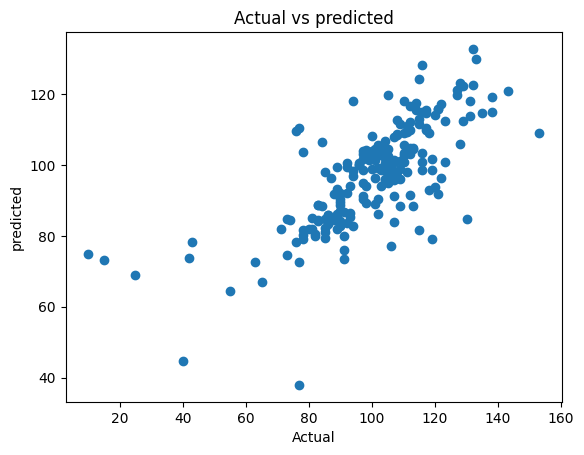

In [65]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test5, np.squeeze(model8.predict(X_test5)) )
print('r2_score:', r2_score)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test5, np.squeeze(model8.predict(X_test5)) )
mae= mean_absolute_error(Y_test5, np.squeeze(model8.predict(X_test5)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test5, np.squeeze(model8.predict(X_test5)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [66]:
prediction9 =np.squeeze(model8.predict([[80,2,2,129,prediction8]]))
print("Prediction: {}".format(prediction9))

y_prd=np.squeeze(np.squeeze(model8.predict(X_test5)) )
predic_dif=pd.DataFrame({'Actual':Y_test5,'predict':y_prd,"differences":Y_test5  -y_prd})
predic_dif[0:15]

1/1 [==============================] - 3s 3s/step
Prediction: 96.17757415771484
7/7 [==============================] - 0s 10ms/step


,Actual,predict,differences
1635,138,119.289619,18.710381
1815,107,95.623787,11.376213
144,55,64.513298,-9.513298
1494,119,101.744545,17.255455
34,90,84.247368,5.752632
563,73,74.604256,-1.604256
900,105,94.792130,10.207870
117,115,81.697853,33.302147
841,110,103.345345,6.654655
386,90,83.675125,6.324875


## keras tuner with dense and keras tuner with RNN

In [67]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [68]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model9 = tuner.hypermodel.build(best_hps)

model9.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
37/37 [==============================] - 3s 29ms/step - loss: 20.7453 - mean_absolute_error: 20.7453 - val_loss: 13.4988 - val_mean_absolute_error: 13.4988
Epoch 2/2000
37/37 [==============================] - 0s 7ms/step - loss: 12.4272 - mean_absolute_error: 12.4272 - val_loss: 12.3079 - val_mean_absolute_error: 12.3079
Epoch 3/2000
37/37 [==============================] - 0s 7ms/step - loss: 12.1491 - mean_absolute_error: 12.1491 - val_loss: 14.8910 - val_mean_absolute_error: 14.8910
Epoch 4/2000
37/37 [==============================] - 0s 9ms/step - loss: 12.5973 - mean_absolute_error: 12.5973 - val_loss: 13.3386 - val_mean_absolute_error: 13.3386
Epoch 5/2000
37/37 [==============================] - 0s 10ms/step - loss: 12.5416 - mean_absolute_error: 12.5416 - val_loss: 12.6725 - val_mean_abso

37/37 [==============================] - 0s 6ms/step - loss: 12.3552 - mean_absolute_error: 12.3552 - val_loss: 12.8418 - val_mean_absolute_error: 12.8418
Epoch 49/2000
37/37 [==============================] - 0s 6ms/step - loss: 12.2993 - mean_absolute_error: 12.2993 - val_loss: 12.2937 - val_mean_absolute_error: 12.2937
Epoch 50/2000
37/37 [==============================] - 0s 8ms/step - loss: 11.6383 - mean_absolute_error: 11.6383 - val_loss: 12.1745 - val_mean_absolute_error: 12.1745
Epoch 51/2000
37/37 [==============================] - 0s 7ms/step - loss: 11.5705 - mean_absolute_error: 11.5705 - val_loss: 12.2242 - val_mean_absolute_error: 12.2242
Epoch 52/2000
37/37 [==============================] - 0s 6ms/step - loss: 11.7976 - mean_absolute_error: 11.7976 - val_loss: 12.0714 - val_mean_absolute_error: 12.0714
Epoch 53/2000
37/37 [==============================] - 0s 7ms/step - loss: 11.5471 - mean_absolute_error: 11.5471 - val_loss: 12.7586 - val_mean_absolute_error: 12.7586


37/37 [==============================] - 0s 7ms/step - loss: 11.2255 - mean_absolute_error: 11.2255 - val_loss: 11.9405 - val_mean_absolute_error: 11.9405
Epoch 97/2000
37/37 [==============================] - 0s 5ms/step - loss: 11.2726 - mean_absolute_error: 11.2726 - val_loss: 12.4081 - val_mean_absolute_error: 12.4081
Epoch 98/2000
37/37 [==============================] - 0s 7ms/step - loss: 11.3484 - mean_absolute_error: 11.3484 - val_loss: 11.9667 - val_mean_absolute_error: 11.9667
Epoch 99/2000
37/37 [==============================] - 0s 7ms/step - loss: 11.2281 - mean_absolute_error: 11.2281 - val_loss: 12.2443 - val_mean_absolute_error: 12.2443
Epoch 100/2000
37/37 [==============================] - 0s 6ms/step - loss: 11.4036 - mean_absolute_error: 11.4036 - val_loss: 12.0020 - val_mean_absolute_error: 12.0020
Epoch 101/2000
37/37 [==============================] - 0s 7ms/step - loss: 11.3795 - mean_absolute_error: 11.3795 - val_loss: 12.2668 - val_mean_absolute_error: 12.266

37/37 [==============================] - 0s 6ms/step - loss: 11.3366 - mean_absolute_error: 11.3366 - val_loss: 12.2265 - val_mean_absolute_error: 12.2265
Epoch 145/2000
37/37 [==============================] - 0s 8ms/step - loss: 11.4175 - mean_absolute_error: 11.4175 - val_loss: 12.5320 - val_mean_absolute_error: 12.5320
Epoch 146/2000
37/37 [==============================] - 0s 5ms/step - loss: 11.1768 - mean_absolute_error: 11.1768 - val_loss: 12.2943 - val_mean_absolute_error: 12.2943
Epoch 147/2000
37/37 [==============================] - 0s 6ms/step - loss: 11.1067 - mean_absolute_error: 11.1067 - val_loss: 11.9346 - val_mean_absolute_error: 11.9346
Epoch 148/2000
37/37 [==============================] - 0s 9ms/step - loss: 11.3018 - mean_absolute_error: 11.3018 - val_loss: 11.8431 - val_mean_absolute_error: 11.8431
Epoch 149/2000
37/37 [==============================] - 0s 7ms/step - loss: 11.0658 - mean_absolute_error: 11.0658 - val_loss: 11.9146 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 6ms/step - loss: 11.2030 - mean_absolute_error: 11.2030 - val_loss: 12.0748 - val_mean_absolute_error: 12.0748
Epoch 193/2000
37/37 [==============================] - 0s 7ms/step - loss: 11.0115 - mean_absolute_error: 11.0115 - val_loss: 12.1409 - val_mean_absolute_error: 12.1409
Epoch 194/2000
37/37 [==============================] - 0s 6ms/step - loss: 11.0293 - mean_absolute_error: 11.0293 - val_loss: 12.4286 - val_mean_absolute_error: 12.4286
Epoch 195/2000
37/37 [==============================] - 0s 8ms/step - loss: 11.8837 - mean_absolute_error: 11.8837 - val_loss: 11.9284 - val_mean_absolute_error: 11.9284
Epoch 196/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.9986 - mean_absolute_error: 10.9986 - val_loss: 12.0686 - val_mean_absolute_error: 12.0686
Epoch 197/2000
37/37 [==============================] - 0s 8ms/step - loss: 11.0400 - mean_absolute_error: 11.0400 - val_loss: 12.2483 - val_mean_absolute_error: 12.

37/37 [==============================] - 0s 6ms/step - loss: 11.3365 - mean_absolute_error: 11.3365 - val_loss: 12.7062 - val_mean_absolute_error: 12.7062
Epoch 241/2000
37/37 [==============================] - 0s 6ms/step - loss: 11.1658 - mean_absolute_error: 11.1658 - val_loss: 11.9299 - val_mean_absolute_error: 11.9299
Epoch 242/2000
37/37 [==============================] - 0s 8ms/step - loss: 11.1448 - mean_absolute_error: 11.1448 - val_loss: 12.5919 - val_mean_absolute_error: 12.5919
Epoch 243/2000
37/37 [==============================] - 0s 7ms/step - loss: 11.6322 - mean_absolute_error: 11.6322 - val_loss: 12.0674 - val_mean_absolute_error: 12.0674
Epoch 244/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.8467 - mean_absolute_error: 10.8467 - val_loss: 11.7377 - val_mean_absolute_error: 11.7377
Epoch 245/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.9621 - mean_absolute_error: 10.9621 - val_loss: 11.7137 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 7ms/step - loss: 11.3411 - mean_absolute_error: 11.3411 - val_loss: 11.7993 - val_mean_absolute_error: 11.7993
Epoch 289/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.9669 - mean_absolute_error: 10.9669 - val_loss: 11.8656 - val_mean_absolute_error: 11.8656
Epoch 290/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.9349 - mean_absolute_error: 10.9349 - val_loss: 11.6834 - val_mean_absolute_error: 11.6834
Epoch 291/2000
37/37 [==============================] - 0s 7ms/step - loss: 11.2271 - mean_absolute_error: 11.2271 - val_loss: 11.7350 - val_mean_absolute_error: 11.7350
Epoch 292/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.9965 - mean_absolute_error: 10.9965 - val_loss: 11.8917 - val_mean_absolute_error: 11.8917
Epoch 293/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.9134 - mean_absolute_error: 10.9134 - val_loss: 11.6902 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 5ms/step - loss: 11.0060 - mean_absolute_error: 11.0060 - val_loss: 11.9038 - val_mean_absolute_error: 11.9038
Epoch 337/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.8951 - mean_absolute_error: 10.8951 - val_loss: 12.3196 - val_mean_absolute_error: 12.3196
Epoch 338/2000
37/37 [==============================] - 0s 6ms/step - loss: 11.3592 - mean_absolute_error: 11.3592 - val_loss: 11.5316 - val_mean_absolute_error: 11.5316
Epoch 339/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.8305 - mean_absolute_error: 10.8305 - val_loss: 11.7533 - val_mean_absolute_error: 11.7533
Epoch 340/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.8403 - mean_absolute_error: 10.8403 - val_loss: 11.5422 - val_mean_absolute_error: 11.5422
Epoch 341/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.9171 - mean_absolute_error: 10.9171 - val_loss: 11.6190 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 6ms/step - loss: 10.9150 - mean_absolute_error: 10.9150 - val_loss: 12.5982 - val_mean_absolute_error: 12.5982
Epoch 385/2000
37/37 [==============================] - 0s 5ms/step - loss: 11.1477 - mean_absolute_error: 11.1477 - val_loss: 11.6367 - val_mean_absolute_error: 11.6367
Epoch 386/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.6737 - mean_absolute_error: 10.6737 - val_loss: 11.5615 - val_mean_absolute_error: 11.5615
Epoch 387/2000
37/37 [==============================] - 0s 5ms/step - loss: 10.6666 - mean_absolute_error: 10.6666 - val_loss: 11.7744 - val_mean_absolute_error: 11.7744
Epoch 388/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.7561 - mean_absolute_error: 10.7561 - val_loss: 11.5017 - val_mean_absolute_error: 11.5017
Epoch 389/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.8944 - mean_absolute_error: 10.8944 - val_loss: 11.5335 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 6ms/step - loss: 10.6763 - mean_absolute_error: 10.6763 - val_loss: 11.6187 - val_mean_absolute_error: 11.6187
Epoch 433/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.9193 - mean_absolute_error: 10.9193 - val_loss: 11.8796 - val_mean_absolute_error: 11.8796
Epoch 434/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.8975 - mean_absolute_error: 10.8975 - val_loss: 11.7821 - val_mean_absolute_error: 11.7821
Epoch 435/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.9559 - mean_absolute_error: 10.9559 - val_loss: 11.5888 - val_mean_absolute_error: 11.5888
Epoch 436/2000
37/37 [==============================] - 0s 5ms/step - loss: 11.0281 - mean_absolute_error: 11.0281 - val_loss: 12.1674 - val_mean_absolute_error: 12.1674
Epoch 437/2000
37/37 [==============================] - 0s 5ms/step - loss: 10.7286 - mean_absolute_error: 10.7286 - val_loss: 11.6061 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 5ms/step - loss: 10.7825 - mean_absolute_error: 10.7825 - val_loss: 11.5405 - val_mean_absolute_error: 11.5405
Epoch 481/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.6741 - mean_absolute_error: 10.6741 - val_loss: 11.5558 - val_mean_absolute_error: 11.5558
Epoch 482/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.7062 - mean_absolute_error: 10.7062 - val_loss: 11.6399 - val_mean_absolute_error: 11.6399
Epoch 483/2000
37/37 [==============================] - 0s 5ms/step - loss: 10.6961 - mean_absolute_error: 10.6961 - val_loss: 11.9990 - val_mean_absolute_error: 11.9990
Epoch 484/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.9831 - mean_absolute_error: 10.9831 - val_loss: 11.5159 - val_mean_absolute_error: 11.5159
Epoch 485/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.5981 - mean_absolute_error: 10.5981 - val_loss: 11.5374 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 7ms/step - loss: 10.9988 - mean_absolute_error: 10.9988 - val_loss: 12.1777 - val_mean_absolute_error: 12.1777
Epoch 529/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.6952 - mean_absolute_error: 10.6952 - val_loss: 11.6502 - val_mean_absolute_error: 11.6502
Epoch 530/2000
37/37 [==============================] - 0s 5ms/step - loss: 10.6537 - mean_absolute_error: 10.6537 - val_loss: 11.9434 - val_mean_absolute_error: 11.9434
Epoch 531/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.6517 - mean_absolute_error: 10.6517 - val_loss: 11.6138 - val_mean_absolute_error: 11.6138
Epoch 532/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.6955 - mean_absolute_error: 10.6955 - val_loss: 12.5305 - val_mean_absolute_error: 12.5305
Epoch 533/2000
37/37 [==============================] - 0s 5ms/step - loss: 11.2499 - mean_absolute_error: 11.2499 - val_loss: 12.3461 - val_mean_absolute_error: 12.

37/37 [==============================] - 0s 6ms/step - loss: 10.6811 - mean_absolute_error: 10.6811 - val_loss: 11.6057 - val_mean_absolute_error: 11.6057
Epoch 577/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.6372 - mean_absolute_error: 10.6372 - val_loss: 12.2059 - val_mean_absolute_error: 12.2059
Epoch 578/2000
37/37 [==============================] - 0s 5ms/step - loss: 10.9674 - mean_absolute_error: 10.9674 - val_loss: 11.5822 - val_mean_absolute_error: 11.5822
Epoch 579/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.6671 - mean_absolute_error: 10.6671 - val_loss: 11.7834 - val_mean_absolute_error: 11.7834
Epoch 580/2000
37/37 [==============================] - 0s 4ms/step - loss: 10.5350 - mean_absolute_error: 10.5350 - val_loss: 11.7434 - val_mean_absolute_error: 11.7434
Epoch 581/2000
37/37 [==============================] - 0s 8ms/step - loss: 10.6031 - mean_absolute_error: 10.6031 - val_loss: 11.5943 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 6ms/step - loss: 10.5465 - mean_absolute_error: 10.5465 - val_loss: 11.6218 - val_mean_absolute_error: 11.6218
Epoch 625/2000
37/37 [==============================] - 0s 7ms/step - loss: 11.0212 - mean_absolute_error: 11.0212 - val_loss: 11.5804 - val_mean_absolute_error: 11.5804
Epoch 626/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.7345 - mean_absolute_error: 10.7345 - val_loss: 11.4370 - val_mean_absolute_error: 11.4370
Epoch 627/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.7579 - mean_absolute_error: 10.7579 - val_loss: 11.8491 - val_mean_absolute_error: 11.8491
Epoch 628/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.6470 - mean_absolute_error: 10.6470 - val_loss: 11.4169 - val_mean_absolute_error: 11.4169
Epoch 629/2000
37/37 [==============================] - 0s 5ms/step - loss: 10.6270 - mean_absolute_error: 10.6270 - val_loss: 11.6331 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 7ms/step - loss: 10.7164 - mean_absolute_error: 10.7164 - val_loss: 11.4635 - val_mean_absolute_error: 11.4635
Epoch 673/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.5534 - mean_absolute_error: 10.5534 - val_loss: 11.4312 - val_mean_absolute_error: 11.4312
Epoch 674/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.5873 - mean_absolute_error: 10.5873 - val_loss: 11.5037 - val_mean_absolute_error: 11.5037
Epoch 675/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.6283 - mean_absolute_error: 10.6283 - val_loss: 11.4605 - val_mean_absolute_error: 11.4605
Epoch 676/2000
37/37 [==============================] - 0s 8ms/step - loss: 10.7716 - mean_absolute_error: 10.7716 - val_loss: 11.5484 - val_mean_absolute_error: 11.5484
Epoch 677/2000
37/37 [==============================] - 0s 5ms/step - loss: 10.7389 - mean_absolute_error: 10.7389 - val_loss: 11.4437 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 7ms/step - loss: 10.7138 - mean_absolute_error: 10.7138 - val_loss: 11.7255 - val_mean_absolute_error: 11.7255
Epoch 721/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.5175 - mean_absolute_error: 10.5175 - val_loss: 11.4942 - val_mean_absolute_error: 11.4942
Epoch 722/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.6143 - mean_absolute_error: 10.6143 - val_loss: 11.4767 - val_mean_absolute_error: 11.4767
Epoch 723/2000
37/37 [==============================] - 0s 8ms/step - loss: 10.6120 - mean_absolute_error: 10.6120 - val_loss: 11.6205 - val_mean_absolute_error: 11.6205
Epoch 724/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.6678 - mean_absolute_error: 10.6678 - val_loss: 11.4778 - val_mean_absolute_error: 11.4778
Epoch 725/2000
37/37 [==============================] - 0s 5ms/step - loss: 10.5440 - mean_absolute_error: 10.5440 - val_loss: 11.4119 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 6ms/step - loss: 10.5459 - mean_absolute_error: 10.5459 - val_loss: 11.3658 - val_mean_absolute_error: 11.3658
Epoch 769/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.6823 - mean_absolute_error: 10.6823 - val_loss: 11.3533 - val_mean_absolute_error: 11.3533
Epoch 770/2000
37/37 [==============================] - 0s 5ms/step - loss: 10.6383 - mean_absolute_error: 10.6383 - val_loss: 11.5569 - val_mean_absolute_error: 11.5569
Epoch 771/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.4760 - mean_absolute_error: 10.4760 - val_loss: 11.3136 - val_mean_absolute_error: 11.3136
Epoch 772/2000
37/37 [==============================] - 0s 9ms/step - loss: 10.4212 - mean_absolute_error: 10.4212 - val_loss: 11.2898 - val_mean_absolute_error: 11.2898
Epoch 773/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.4768 - mean_absolute_error: 10.4768 - val_loss: 11.2332 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 6ms/step - loss: 10.4122 - mean_absolute_error: 10.4122 - val_loss: 11.1941 - val_mean_absolute_error: 11.1941
Epoch 817/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.3384 - mean_absolute_error: 10.3384 - val_loss: 11.4924 - val_mean_absolute_error: 11.4924
Epoch 818/2000
37/37 [==============================] - 0s 5ms/step - loss: 10.3590 - mean_absolute_error: 10.3590 - val_loss: 11.3470 - val_mean_absolute_error: 11.3470
Epoch 819/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.2969 - mean_absolute_error: 10.2969 - val_loss: 11.4189 - val_mean_absolute_error: 11.4189
Epoch 820/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.3644 - mean_absolute_error: 10.3644 - val_loss: 11.1820 - val_mean_absolute_error: 11.1820
Epoch 821/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.2756 - mean_absolute_error: 10.2756 - val_loss: 11.2886 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 5ms/step - loss: 10.7325 - mean_absolute_error: 10.7325 - val_loss: 11.3624 - val_mean_absolute_error: 11.3624
Epoch 865/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.2002 - mean_absolute_error: 10.2002 - val_loss: 11.4023 - val_mean_absolute_error: 11.4023
Epoch 866/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.1940 - mean_absolute_error: 10.1940 - val_loss: 11.3392 - val_mean_absolute_error: 11.3392
Epoch 867/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.1475 - mean_absolute_error: 10.1475 - val_loss: 11.3216 - val_mean_absolute_error: 11.3216
Epoch 868/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.1959 - mean_absolute_error: 10.1959 - val_loss: 11.1723 - val_mean_absolute_error: 11.1723
Epoch 869/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.2356 - mean_absolute_error: 10.2356 - val_loss: 11.3288 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 6ms/step - loss: 10.1675 - mean_absolute_error: 10.1675 - val_loss: 11.2564 - val_mean_absolute_error: 11.2564
Epoch 913/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.2407 - mean_absolute_error: 10.2407 - val_loss: 11.4107 - val_mean_absolute_error: 11.4107
Epoch 914/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.1285 - mean_absolute_error: 10.1285 - val_loss: 11.2513 - val_mean_absolute_error: 11.2513
Epoch 915/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.3762 - mean_absolute_error: 10.3762 - val_loss: 11.2436 - val_mean_absolute_error: 11.2436
Epoch 916/2000
37/37 [==============================] - 0s 8ms/step - loss: 10.3965 - mean_absolute_error: 10.3965 - val_loss: 11.4252 - val_mean_absolute_error: 11.4252
Epoch 917/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.2298 - mean_absolute_error: 10.2298 - val_loss: 11.2769 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 8ms/step - loss: 10.2772 - mean_absolute_error: 10.2772 - val_loss: 11.5828 - val_mean_absolute_error: 11.5828
Epoch 961/2000
37/37 [==============================] - 0s 8ms/step - loss: 10.2397 - mean_absolute_error: 10.2397 - val_loss: 11.3870 - val_mean_absolute_error: 11.3870
Epoch 962/2000
37/37 [==============================] - 0s 6ms/step - loss: 10.1617 - mean_absolute_error: 10.1617 - val_loss: 11.1620 - val_mean_absolute_error: 11.1620
Epoch 963/2000
37/37 [==============================] - 0s 8ms/step - loss: 10.0416 - mean_absolute_error: 10.0416 - val_loss: 11.2180 - val_mean_absolute_error: 11.2180
Epoch 964/2000
37/37 [==============================] - 0s 7ms/step - loss: 10.2263 - mean_absolute_error: 10.2263 - val_loss: 11.6815 - val_mean_absolute_error: 11.6815
Epoch 965/2000
37/37 [==============================] - 0s 8ms/step - loss: 10.2478 - mean_absolute_error: 10.2478 - val_loss: 11.1794 - val_mean_absolute_error: 11.

37/37 [==============================] - 0s 3ms/step - loss: 10.0991 - mean_absolute_error: 10.0991 - val_loss: 11.1300 - val_mean_absolute_error: 11.1300
Epoch 1009/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.3222 - mean_absolute_error: 10.3222 - val_loss: 11.1308 - val_mean_absolute_error: 11.1308
Epoch 1010/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.2534 - mean_absolute_error: 10.2534 - val_loss: 11.3185 - val_mean_absolute_error: 11.3185
Epoch 1011/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.0158 - mean_absolute_error: 10.0158 - val_loss: 11.0395 - val_mean_absolute_error: 11.0395
Epoch 1012/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.0218 - mean_absolute_error: 10.0218 - val_loss: 11.0323 - val_mean_absolute_error: 11.0323
Epoch 1013/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9771 - mean_absolute_error: 9.9771 - val_loss: 11.0399 - val_mean_absolute_error: 

37/37 [==============================] - 0s 4ms/step - loss: 10.1594 - mean_absolute_error: 10.1594 - val_loss: 11.1385 - val_mean_absolute_error: 11.1385
Epoch 1057/2000
37/37 [==============================] - 0s 4ms/step - loss: 10.1092 - mean_absolute_error: 10.1092 - val_loss: 11.3509 - val_mean_absolute_error: 11.3509
Epoch 1058/2000
37/37 [==============================] - 0s 4ms/step - loss: 10.0866 - mean_absolute_error: 10.0866 - val_loss: 11.1001 - val_mean_absolute_error: 11.1001
Epoch 1059/2000
37/37 [==============================] - 0s 4ms/step - loss: 9.9494 - mean_absolute_error: 9.9494 - val_loss: 11.0869 - val_mean_absolute_error: 11.0869
Epoch 1060/2000
37/37 [==============================] - 0s 4ms/step - loss: 10.1149 - mean_absolute_error: 10.1149 - val_loss: 11.6725 - val_mean_absolute_error: 11.6725
Epoch 1061/2000
37/37 [==============================] - 0s 4ms/step - loss: 10.2608 - mean_absolute_error: 10.2608 - val_loss: 11.1102 - val_mean_absolute_error: 

37/37 [==============================] - 0s 4ms/step - loss: 10.0310 - mean_absolute_error: 10.0310 - val_loss: 11.3087 - val_mean_absolute_error: 11.3087
Epoch 1105/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.3105 - mean_absolute_error: 10.3105 - val_loss: 11.0392 - val_mean_absolute_error: 11.0392
Epoch 1106/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.2088 - mean_absolute_error: 10.2088 - val_loss: 11.0296 - val_mean_absolute_error: 11.0296
Epoch 1107/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9983 - mean_absolute_error: 9.9983 - val_loss: 11.0948 - val_mean_absolute_error: 11.0948
Epoch 1108/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.2169 - mean_absolute_error: 10.2169 - val_loss: 11.6489 - val_mean_absolute_error: 11.6489
Epoch 1109/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.2661 - mean_absolute_error: 10.2661 - val_loss: 11.1668 - val_mean_absolute_error: 

37/37 [==============================] - 0s 4ms/step - loss: 9.9598 - mean_absolute_error: 9.9598 - val_loss: 11.6148 - val_mean_absolute_error: 11.6148
Epoch 1153/2000
37/37 [==============================] - 0s 5ms/step - loss: 10.0570 - mean_absolute_error: 10.0570 - val_loss: 11.0440 - val_mean_absolute_error: 11.0440
Epoch 1154/2000
37/37 [==============================] - 0s 4ms/step - loss: 10.1185 - mean_absolute_error: 10.1185 - val_loss: 11.1341 - val_mean_absolute_error: 11.1341
Epoch 1155/2000
37/37 [==============================] - 0s 4ms/step - loss: 10.0180 - mean_absolute_error: 10.0180 - val_loss: 11.0884 - val_mean_absolute_error: 11.0884
Epoch 1156/2000
37/37 [==============================] - 0s 4ms/step - loss: 10.0697 - mean_absolute_error: 10.0697 - val_loss: 11.1306 - val_mean_absolute_error: 11.1306
Epoch 1157/2000
37/37 [==============================] - 0s 4ms/step - loss: 10.0720 - mean_absolute_error: 10.0720 - val_loss: 11.7325 - val_mean_absolute_error: 

37/37 [==============================] - 0s 3ms/step - loss: 10.0972 - mean_absolute_error: 10.0972 - val_loss: 11.3824 - val_mean_absolute_error: 11.3824
Epoch 1201/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.0332 - mean_absolute_error: 10.0332 - val_loss: 11.0827 - val_mean_absolute_error: 11.0827
Epoch 1202/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8917 - mean_absolute_error: 9.8917 - val_loss: 11.3042 - val_mean_absolute_error: 11.3042
Epoch 1203/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9760 - mean_absolute_error: 9.9760 - val_loss: 11.1880 - val_mean_absolute_error: 11.1880
Epoch 1204/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9771 - mean_absolute_error: 9.9771 - val_loss: 11.1158 - val_mean_absolute_error: 11.1158
Epoch 1205/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.1186 - mean_absolute_error: 10.1186 - val_loss: 12.2733 - val_mean_absolute_error: 12.2

37/37 [==============================] - 0s 3ms/step - loss: 10.1514 - mean_absolute_error: 10.1514 - val_loss: 11.6638 - val_mean_absolute_error: 11.6638
Epoch 1249/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9148 - mean_absolute_error: 9.9148 - val_loss: 11.2210 - val_mean_absolute_error: 11.2210
Epoch 1250/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9664 - mean_absolute_error: 9.9664 - val_loss: 11.2459 - val_mean_absolute_error: 11.2459
Epoch 1251/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9531 - mean_absolute_error: 9.9531 - val_loss: 11.2469 - val_mean_absolute_error: 11.2469
Epoch 1252/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.2663 - mean_absolute_error: 10.2663 - val_loss: 11.2455 - val_mean_absolute_error: 11.2455
Epoch 1253/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.0363 - mean_absolute_error: 10.0363 - val_loss: 11.3920 - val_mean_absolute_error: 11.3

37/37 [==============================] - 0s 3ms/step - loss: 10.1564 - mean_absolute_error: 10.1564 - val_loss: 11.3447 - val_mean_absolute_error: 11.3447
Epoch 1297/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.0658 - mean_absolute_error: 10.0658 - val_loss: 11.3473 - val_mean_absolute_error: 11.3473
Epoch 1298/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.1419 - mean_absolute_error: 10.1419 - val_loss: 11.4150 - val_mean_absolute_error: 11.4150
Epoch 1299/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.5034 - mean_absolute_error: 10.5034 - val_loss: 11.4191 - val_mean_absolute_error: 11.4191
Epoch 1300/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.1559 - mean_absolute_error: 10.1559 - val_loss: 11.2664 - val_mean_absolute_error: 11.2664
Epoch 1301/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.1297 - mean_absolute_error: 10.1297 - val_loss: 11.7015 - val_mean_absolute_error

37/37 [==============================] - 0s 3ms/step - loss: 9.9951 - mean_absolute_error: 9.9951 - val_loss: 11.1553 - val_mean_absolute_error: 11.1553
Epoch 1345/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9151 - mean_absolute_error: 9.9151 - val_loss: 11.2863 - val_mean_absolute_error: 11.2863
Epoch 1346/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.0021 - mean_absolute_error: 10.0021 - val_loss: 11.2061 - val_mean_absolute_error: 11.2061
Epoch 1347/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.0682 - mean_absolute_error: 10.0682 - val_loss: 11.9511 - val_mean_absolute_error: 11.9511
Epoch 1348/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9725 - mean_absolute_error: 9.9725 - val_loss: 11.4582 - val_mean_absolute_error: 11.4582
Epoch 1349/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.0166 - mean_absolute_error: 10.0166 - val_loss: 11.1145 - val_mean_absolute_error: 11.1

37/37 [==============================] - 0s 3ms/step - loss: 10.0246 - mean_absolute_error: 10.0246 - val_loss: 11.2501 - val_mean_absolute_error: 11.2501
Epoch 1393/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9296 - mean_absolute_error: 9.9296 - val_loss: 11.1077 - val_mean_absolute_error: 11.1077
Epoch 1394/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.2401 - mean_absolute_error: 10.2401 - val_loss: 11.3496 - val_mean_absolute_error: 11.3496
Epoch 1395/2000
37/37 [==============================] - 0s 2ms/step - loss: 10.1871 - mean_absolute_error: 10.1871 - val_loss: 11.7003 - val_mean_absolute_error: 11.7003
Epoch 1396/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.2308 - mean_absolute_error: 10.2308 - val_loss: 11.1270 - val_mean_absolute_error: 11.1270
Epoch 1397/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8948 - mean_absolute_error: 9.8948 - val_loss: 11.3900 - val_mean_absolute_error: 11

37/37 [==============================] - 0s 3ms/step - loss: 9.9325 - mean_absolute_error: 9.9325 - val_loss: 11.3283 - val_mean_absolute_error: 11.3283
Epoch 1441/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9218 - mean_absolute_error: 9.9218 - val_loss: 11.0689 - val_mean_absolute_error: 11.0689
Epoch 1442/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.4243 - mean_absolute_error: 10.4243 - val_loss: 11.3072 - val_mean_absolute_error: 11.3072
Epoch 1443/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.0210 - mean_absolute_error: 10.0210 - val_loss: 11.3442 - val_mean_absolute_error: 11.3442
Epoch 1444/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9776 - mean_absolute_error: 9.9776 - val_loss: 11.3296 - val_mean_absolute_error: 11.3296
Epoch 1445/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8991 - mean_absolute_error: 9.8991 - val_loss: 11.1800 - val_mean_absolute_error: 11.180

37/37 [==============================] - 0s 5ms/step - loss: 10.0298 - mean_absolute_error: 10.0298 - val_loss: 11.0776 - val_mean_absolute_error: 11.0776
Epoch 1489/2000
37/37 [==============================] - 0s 4ms/step - loss: 9.8347 - mean_absolute_error: 9.8347 - val_loss: 11.2162 - val_mean_absolute_error: 11.2162
Epoch 1490/2000
37/37 [==============================] - 0s 4ms/step - loss: 9.9649 - mean_absolute_error: 9.9649 - val_loss: 11.4321 - val_mean_absolute_error: 11.4321
Epoch 1491/2000
37/37 [==============================] - 0s 4ms/step - loss: 9.8137 - mean_absolute_error: 9.8137 - val_loss: 11.1352 - val_mean_absolute_error: 11.1352
Epoch 1492/2000
37/37 [==============================] - 0s 4ms/step - loss: 9.9459 - mean_absolute_error: 9.9459 - val_loss: 11.4430 - val_mean_absolute_error: 11.4430
Epoch 1493/2000
37/37 [==============================] - 0s 4ms/step - loss: 10.1120 - mean_absolute_error: 10.1120 - val_loss: 11.6784 - val_mean_absolute_error: 11.678

37/37 [==============================] - 0s 3ms/step - loss: 9.9127 - mean_absolute_error: 9.9127 - val_loss: 11.1952 - val_mean_absolute_error: 11.1952
Epoch 1537/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9286 - mean_absolute_error: 9.9286 - val_loss: 11.3410 - val_mean_absolute_error: 11.3410
Epoch 1538/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9121 - mean_absolute_error: 9.9121 - val_loss: 11.6185 - val_mean_absolute_error: 11.6185
Epoch 1539/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8110 - mean_absolute_error: 9.8110 - val_loss: 11.1337 - val_mean_absolute_error: 11.1337
Epoch 1540/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.0078 - mean_absolute_error: 10.0078 - val_loss: 11.2073 - val_mean_absolute_error: 11.2073
Epoch 1541/2000
37/37 [==============================] - 0s 2ms/step - loss: 9.8740 - mean_absolute_error: 9.8740 - val_loss: 11.2567 - val_mean_absolute_error: 11.2567


37/37 [==============================] - 0s 3ms/step - loss: 9.8903 - mean_absolute_error: 9.8903 - val_loss: 11.0922 - val_mean_absolute_error: 11.0922
Epoch 1585/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9170 - mean_absolute_error: 9.9170 - val_loss: 11.5830 - val_mean_absolute_error: 11.5830
Epoch 1586/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.0948 - mean_absolute_error: 10.0948 - val_loss: 12.5915 - val_mean_absolute_error: 12.5915
Epoch 1587/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.2314 - mean_absolute_error: 10.2314 - val_loss: 11.6299 - val_mean_absolute_error: 11.6299
Epoch 1588/2000
37/37 [==============================] - 0s 2ms/step - loss: 9.9437 - mean_absolute_error: 9.9437 - val_loss: 11.0821 - val_mean_absolute_error: 11.0821
Epoch 1589/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.0859 - mean_absolute_error: 10.0859 - val_loss: 11.2013 - val_mean_absolute_error: 11.2

37/37 [==============================] - 0s 3ms/step - loss: 9.9148 - mean_absolute_error: 9.9148 - val_loss: 11.2407 - val_mean_absolute_error: 11.2407
Epoch 1633/2000
37/37 [==============================] - 0s 2ms/step - loss: 10.0149 - mean_absolute_error: 10.0149 - val_loss: 11.1800 - val_mean_absolute_error: 11.1800
Epoch 1634/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8751 - mean_absolute_error: 9.8751 - val_loss: 11.1114 - val_mean_absolute_error: 11.1114
Epoch 1635/2000
37/37 [==============================] - 0s 2ms/step - loss: 9.8659 - mean_absolute_error: 9.8659 - val_loss: 11.1495 - val_mean_absolute_error: 11.1495
Epoch 1636/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9436 - mean_absolute_error: 9.9436 - val_loss: 11.6095 - val_mean_absolute_error: 11.6095
Epoch 1637/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9936 - mean_absolute_error: 9.9936 - val_loss: 11.1495 - val_mean_absolute_error: 11.1495


37/37 [==============================] - 0s 3ms/step - loss: 9.8058 - mean_absolute_error: 9.8058 - val_loss: 11.0850 - val_mean_absolute_error: 11.0850
Epoch 1681/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.3356 - mean_absolute_error: 10.3356 - val_loss: 11.5351 - val_mean_absolute_error: 11.5351
Epoch 1682/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8780 - mean_absolute_error: 9.8780 - val_loss: 11.4228 - val_mean_absolute_error: 11.4228
Epoch 1683/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8294 - mean_absolute_error: 9.8294 - val_loss: 11.1901 - val_mean_absolute_error: 11.1901
Epoch 1684/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8645 - mean_absolute_error: 9.8645 - val_loss: 11.6744 - val_mean_absolute_error: 11.6744
Epoch 1685/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9851 - mean_absolute_error: 9.9851 - val_loss: 11.0906 - val_mean_absolute_error: 11.0906


37/37 [==============================] - 0s 3ms/step - loss: 10.0353 - mean_absolute_error: 10.0353 - val_loss: 11.2012 - val_mean_absolute_error: 11.2012
Epoch 1729/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.7885 - mean_absolute_error: 9.7885 - val_loss: 11.3932 - val_mean_absolute_error: 11.3932
Epoch 1730/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8360 - mean_absolute_error: 9.8360 - val_loss: 11.3817 - val_mean_absolute_error: 11.3817
Epoch 1731/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9294 - mean_absolute_error: 9.9294 - val_loss: 11.8694 - val_mean_absolute_error: 11.8694
Epoch 1732/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.2273 - mean_absolute_error: 10.2273 - val_loss: 11.3377 - val_mean_absolute_error: 11.3377
Epoch 1733/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9679 - mean_absolute_error: 9.9679 - val_loss: 11.0632 - val_mean_absolute_error: 11.063

37/37 [==============================] - 0s 3ms/step - loss: 9.9577 - mean_absolute_error: 9.9577 - val_loss: 11.1513 - val_mean_absolute_error: 11.1513
Epoch 1777/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.7822 - mean_absolute_error: 9.7822 - val_loss: 11.0755 - val_mean_absolute_error: 11.0755
Epoch 1778/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.7532 - mean_absolute_error: 9.7532 - val_loss: 11.3907 - val_mean_absolute_error: 11.3907
Epoch 1779/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9642 - mean_absolute_error: 9.9642 - val_loss: 11.3355 - val_mean_absolute_error: 11.3355
Epoch 1780/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.7787 - mean_absolute_error: 9.7787 - val_loss: 11.2341 - val_mean_absolute_error: 11.2341
Epoch 1781/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9764 - mean_absolute_error: 9.9764 - val_loss: 11.8298 - val_mean_absolute_error: 11.8298
Ep

37/37 [==============================] - 0s 3ms/step - loss: 9.7972 - mean_absolute_error: 9.7972 - val_loss: 11.2773 - val_mean_absolute_error: 11.2773
Epoch 1825/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.0308 - mean_absolute_error: 10.0308 - val_loss: 11.1561 - val_mean_absolute_error: 11.1561
Epoch 1826/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9150 - mean_absolute_error: 9.9150 - val_loss: 11.0859 - val_mean_absolute_error: 11.0859
Epoch 1827/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8144 - mean_absolute_error: 9.8144 - val_loss: 11.3975 - val_mean_absolute_error: 11.3975
Epoch 1828/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.0508 - mean_absolute_error: 10.0508 - val_loss: 11.1003 - val_mean_absolute_error: 11.1003
Epoch 1829/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8866 - mean_absolute_error: 9.8866 - val_loss: 11.4677 - val_mean_absolute_error: 11.467

37/37 [==============================] - 0s 3ms/step - loss: 9.8853 - mean_absolute_error: 9.8853 - val_loss: 11.4941 - val_mean_absolute_error: 11.4941
Epoch 1873/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8113 - mean_absolute_error: 9.8113 - val_loss: 11.2109 - val_mean_absolute_error: 11.2109
Epoch 1874/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.7812 - mean_absolute_error: 9.7812 - val_loss: 11.1852 - val_mean_absolute_error: 11.1852
Epoch 1875/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8565 - mean_absolute_error: 9.8565 - val_loss: 11.3464 - val_mean_absolute_error: 11.3464
Epoch 1876/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9753 - mean_absolute_error: 9.9753 - val_loss: 12.1004 - val_mean_absolute_error: 12.1004
Epoch 1877/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.0840 - mean_absolute_error: 10.0840 - val_loss: 11.0831 - val_mean_absolute_error: 11.0831


37/37 [==============================] - 0s 3ms/step - loss: 9.8274 - mean_absolute_error: 9.8274 - val_loss: 11.3361 - val_mean_absolute_error: 11.3361
Epoch 1921/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.5487 - mean_absolute_error: 10.5487 - val_loss: 11.8280 - val_mean_absolute_error: 11.8280
Epoch 1922/2000
37/37 [==============================] - 0s 3ms/step - loss: 10.1031 - mean_absolute_error: 10.1031 - val_loss: 11.2814 - val_mean_absolute_error: 11.2814
Epoch 1923/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8661 - mean_absolute_error: 9.8661 - val_loss: 11.7641 - val_mean_absolute_error: 11.7641
Epoch 1924/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8983 - mean_absolute_error: 9.8983 - val_loss: 11.1448 - val_mean_absolute_error: 11.1448
Epoch 1925/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.7204 - mean_absolute_error: 9.7204 - val_loss: 11.3807 - val_mean_absolute_error: 11.380

37/37 [==============================] - 0s 3ms/step - loss: 9.9208 - mean_absolute_error: 9.9208 - val_loss: 11.2897 - val_mean_absolute_error: 11.2897
Epoch 1969/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8925 - mean_absolute_error: 9.8925 - val_loss: 11.1446 - val_mean_absolute_error: 11.1446
Epoch 1970/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9070 - mean_absolute_error: 9.9070 - val_loss: 11.0635 - val_mean_absolute_error: 11.0635
Epoch 1971/2000
37/37 [==============================] - 0s 4ms/step - loss: 9.8173 - mean_absolute_error: 9.8173 - val_loss: 11.2976 - val_mean_absolute_error: 11.2976
Epoch 1972/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.9640 - mean_absolute_error: 9.9640 - val_loss: 11.1811 - val_mean_absolute_error: 11.1811
Epoch 1973/2000
37/37 [==============================] - 0s 3ms/step - loss: 9.8624 - mean_absolute_error: 9.8624 - val_loss: 11.0752 - val_mean_absolute_error: 11.0752
Ep

In [69]:
prediction10 = np.squeeze(model9.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction10))

1/1 [==============================] - 0s 85ms/step
Prediction: 104.80575561523438


In [70]:
y_prd=np.squeeze(np.squeeze(model9.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

23/23 [==============================] - 0s 2ms/step
      Actual     predict  differences
898       87   89.371887    -2.371887
182       65   68.431564    -3.431564
565      103  100.681152     2.318848
457       69   83.049782   -14.049782
1852     104  120.013153   -16.013153
...      ...         ...          ...
1812     112  113.706635    -1.706635
913       86   89.982681    -3.982681
1036     104   94.161118     9.838882
629       74   84.519943   -10.519943
61        63   81.577911   -18.577911

[714 rows x 3 columns]


In [71]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

-64.11366271972656
141.27854919433594
103.15158081054688
59.71293640136719
70.5400390625
-72.6497573852539
76.58265686035156
137.79111862182617
-72.692626953125
62.684600830078125
95.75604248046875
lower bound: -52.64663336312021
upper bound: 53.62208986804884


In [72]:
A.drop(A[(A['differences'] >53)].index, inplace=True)
A.drop(A[(A['differences'] <-52)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['HotWaterCostAveragePerDwelling']

print(B)

from sklearn.model_selection import train_test_split
X6=B.drop('Actual',axis=1)
Y6=B['Actual']
X_train6, X_test6, Y_train6, Y_test6 =train_test_split(X6,Y6, test_size=0.3, random_state = 0)

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
1                    0        1              4                          154   
6                    1        1              4                          213   
9                    1        4              4                          114   
10                   2        1              4                          153   
11                   2        2              4                          151   
...                ...      ...            ...                          ...   
2363               198        2              3                           96   
2367               198        4              1                          111   
2368               198        4              3                           88   
2372               199        4              3                           87   
2376               200        4              3                           99   

      Actual     predict  
1        115   82.120102

In [73]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.LSTM(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                                           input_shape=(X_train6.shape[1],1),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [74]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

tuner.search(X_train6,Y_train6 ,epochs=100,validation_data=(X_test6,Y_test6))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model10 = tuner.hypermodel.build(best_hps)

model10.fit(X_train6, Y_train6, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
11/11 [==============================] - 2s 53ms/step - loss: 54.6028 - mean_absolute_error: 54.6028 - val_loss: 14.4613 - val_mean_absolute_error: 14.4613
Epoch 2/2000
11/11 [==============================] - 0s 28ms/step - loss: 13.9794 - mean_absolute_error: 13.9794 - val_loss: 12.2950 - val_mean_absolute_error: 12.2950
Epoch 3/2000
11/11 [==============================] - 0s 30ms/step - loss: 10.6230 - mean_absolute_error: 10.6230 - val_loss: 11.0415 - val_mean_absolute_error: 11.0415
Epoch 4/2000
11/11 [==============================] - 0s 35ms/step - loss: 11.1287 - mean_absolute_error: 11.1287 - val_loss: 12.0153 - val_mean_absolute_error: 12.0153
Epoch 5/2000
11/11 [==============================] - 0s 33ms/step - loss: 10.5323 - mean_absolute_error: 10.5323 - val_loss: 11.1035 - val_mean_a

11/11 [==============================] - 0s 27ms/step - loss: 9.3604 - mean_absolute_error: 9.3604 - val_loss: 10.6568 - val_mean_absolute_error: 10.6568
Epoch 49/2000
11/11 [==============================] - 0s 26ms/step - loss: 8.8320 - mean_absolute_error: 8.8320 - val_loss: 10.5579 - val_mean_absolute_error: 10.5579
Epoch 50/2000
11/11 [==============================] - 0s 27ms/step - loss: 9.0050 - mean_absolute_error: 9.0050 - val_loss: 10.5056 - val_mean_absolute_error: 10.5056
Epoch 51/2000
11/11 [==============================] - 0s 31ms/step - loss: 9.0463 - mean_absolute_error: 9.0463 - val_loss: 10.5441 - val_mean_absolute_error: 10.5441
Epoch 52/2000
11/11 [==============================] - 0s 28ms/step - loss: 9.1924 - mean_absolute_error: 9.1924 - val_loss: 12.7255 - val_mean_absolute_error: 12.7255
Epoch 53/2000
11/11 [==============================] - 0s 28ms/step - loss: 9.4400 - mean_absolute_error: 9.4400 - val_loss: 11.0351 - val_mean_absolute_error: 11.0351
Epoch 

Epoch 97/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.9768 - mean_absolute_error: 8.9768 - val_loss: 11.8441 - val_mean_absolute_error: 11.8441
Epoch 98/2000
11/11 [==============================] - 0s 26ms/step - loss: 8.9523 - mean_absolute_error: 8.9523 - val_loss: 10.2684 - val_mean_absolute_error: 10.2684
Epoch 99/2000
11/11 [==============================] - 0s 26ms/step - loss: 8.6410 - mean_absolute_error: 8.6410 - val_loss: 10.3267 - val_mean_absolute_error: 10.3267
Epoch 100/2000
11/11 [==============================] - 0s 26ms/step - loss: 8.5418 - mean_absolute_error: 8.5418 - val_loss: 10.2663 - val_mean_absolute_error: 10.2663
Epoch 101/2000
11/11 [==============================] - 0s 26ms/step - loss: 8.4969 - mean_absolute_error: 8.4969 - val_loss: 10.3570 - val_mean_absolute_error: 10.3570
Epoch 102/2000
11/11 [==============================] - 0s 26ms/step - loss: 8.6185 - mean_absolute_error: 8.6185 - val_loss: 10.7724 - val_mean_absolute_erro

11/11 [==============================] - 0s 26ms/step - loss: 9.1523 - mean_absolute_error: 9.1523 - val_loss: 10.5099 - val_mean_absolute_error: 10.5099
Epoch 146/2000
11/11 [==============================] - 0s 26ms/step - loss: 8.8669 - mean_absolute_error: 8.8669 - val_loss: 10.2798 - val_mean_absolute_error: 10.2798
Epoch 147/2000
11/11 [==============================] - 0s 30ms/step - loss: 8.6691 - mean_absolute_error: 8.6691 - val_loss: 10.2100 - val_mean_absolute_error: 10.2100
Epoch 148/2000
11/11 [==============================] - 0s 26ms/step - loss: 8.3604 - mean_absolute_error: 8.3604 - val_loss: 10.6495 - val_mean_absolute_error: 10.6495
Epoch 149/2000
11/11 [==============================] - 0s 26ms/step - loss: 8.5273 - mean_absolute_error: 8.5273 - val_loss: 10.4009 - val_mean_absolute_error: 10.4009
Epoch 150/2000
11/11 [==============================] - 0s 25ms/step - loss: 8.5385 - mean_absolute_error: 8.5385 - val_loss: 10.4819 - val_mean_absolute_error: 10.4819
E

11/11 [==============================] - 0s 27ms/step - loss: 9.1330 - mean_absolute_error: 9.1330 - val_loss: 11.0651 - val_mean_absolute_error: 11.0651
Epoch 194/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.6881 - mean_absolute_error: 8.6881 - val_loss: 10.2458 - val_mean_absolute_error: 10.2458
Epoch 195/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.5748 - mean_absolute_error: 8.5748 - val_loss: 10.3436 - val_mean_absolute_error: 10.3436
Epoch 196/2000
11/11 [==============================] - 0s 28ms/step - loss: 8.5409 - mean_absolute_error: 8.5409 - val_loss: 10.2352 - val_mean_absolute_error: 10.2352
Epoch 197/2000
11/11 [==============================] - 0s 28ms/step - loss: 8.4594 - mean_absolute_error: 8.4594 - val_loss: 10.2507 - val_mean_absolute_error: 10.2507
Epoch 198/2000
11/11 [==============================] - 0s 28ms/step - loss: 8.5167 - mean_absolute_error: 8.5167 - val_loss: 10.3977 - val_mean_absolute_error: 10.3977
E

11/11 [==============================] - 0s 27ms/step - loss: 9.1018 - mean_absolute_error: 9.1018 - val_loss: 11.3003 - val_mean_absolute_error: 11.3003
Epoch 242/2000
11/11 [==============================] - 0s 28ms/step - loss: 8.6994 - mean_absolute_error: 8.6994 - val_loss: 10.6331 - val_mean_absolute_error: 10.6331
Epoch 243/2000
11/11 [==============================] - 0s 30ms/step - loss: 8.3402 - mean_absolute_error: 8.3402 - val_loss: 10.5993 - val_mean_absolute_error: 10.5993
Epoch 244/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.6735 - mean_absolute_error: 8.6735 - val_loss: 12.0064 - val_mean_absolute_error: 12.0064
Epoch 245/2000
11/11 [==============================] - 0s 29ms/step - loss: 9.5249 - mean_absolute_error: 9.5249 - val_loss: 10.9769 - val_mean_absolute_error: 10.9769
Epoch 246/2000
11/11 [==============================] - 0s 29ms/step - loss: 9.2175 - mean_absolute_error: 9.2175 - val_loss: 11.0808 - val_mean_absolute_error: 11.0808
E

11/11 [==============================] - 0s 28ms/step - loss: 8.6676 - mean_absolute_error: 8.6676 - val_loss: 10.3112 - val_mean_absolute_error: 10.3112
Epoch 290/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.5493 - mean_absolute_error: 8.5493 - val_loss: 10.3963 - val_mean_absolute_error: 10.3963
Epoch 291/2000
11/11 [==============================] - 0s 28ms/step - loss: 8.3578 - mean_absolute_error: 8.3578 - val_loss: 10.3572 - val_mean_absolute_error: 10.3572
Epoch 292/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.3006 - mean_absolute_error: 8.3006 - val_loss: 10.5958 - val_mean_absolute_error: 10.5958
Epoch 293/2000
11/11 [==============================] - 0s 28ms/step - loss: 8.3063 - mean_absolute_error: 8.3063 - val_loss: 10.4541 - val_mean_absolute_error: 10.4541
Epoch 294/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.3369 - mean_absolute_error: 8.3369 - val_loss: 10.4238 - val_mean_absolute_error: 10.4238
E

11/11 [==============================] - 0s 29ms/step - loss: 8.0934 - mean_absolute_error: 8.0934 - val_loss: 10.5563 - val_mean_absolute_error: 10.5563
Epoch 338/2000
11/11 [==============================] - 0s 28ms/step - loss: 7.9825 - mean_absolute_error: 7.9825 - val_loss: 10.8516 - val_mean_absolute_error: 10.8516
Epoch 339/2000
11/11 [==============================] - 0s 28ms/step - loss: 8.4037 - mean_absolute_error: 8.4037 - val_loss: 12.0219 - val_mean_absolute_error: 12.0219
Epoch 340/2000
11/11 [==============================] - 0s 28ms/step - loss: 8.4700 - mean_absolute_error: 8.4700 - val_loss: 11.6453 - val_mean_absolute_error: 11.6453
Epoch 341/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.3911 - mean_absolute_error: 8.3911 - val_loss: 11.1894 - val_mean_absolute_error: 11.1894
Epoch 342/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.4649 - mean_absolute_error: 8.4649 - val_loss: 11.1296 - val_mean_absolute_error: 11.1296
E

11/11 [==============================] - 0s 29ms/step - loss: 9.1334 - mean_absolute_error: 9.1334 - val_loss: 10.5778 - val_mean_absolute_error: 10.5778
Epoch 386/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.4652 - mean_absolute_error: 8.4652 - val_loss: 10.6435 - val_mean_absolute_error: 10.6435
Epoch 387/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.2245 - mean_absolute_error: 8.2245 - val_loss: 10.5117 - val_mean_absolute_error: 10.5117
Epoch 388/2000
11/11 [==============================] - 0s 28ms/step - loss: 7.9086 - mean_absolute_error: 7.9086 - val_loss: 10.7915 - val_mean_absolute_error: 10.7915
Epoch 389/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.3913 - mean_absolute_error: 8.3913 - val_loss: 10.7738 - val_mean_absolute_error: 10.7738
Epoch 390/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.9452 - mean_absolute_error: 7.9452 - val_loss: 10.6667 - val_mean_absolute_error: 10.6667
E

11/11 [==============================] - 0s 32ms/step - loss: 8.0062 - mean_absolute_error: 8.0062 - val_loss: 10.8843 - val_mean_absolute_error: 10.8843
Epoch 434/2000
11/11 [==============================] - 0s 33ms/step - loss: 7.9178 - mean_absolute_error: 7.9178 - val_loss: 10.7249 - val_mean_absolute_error: 10.7249
Epoch 435/2000
11/11 [==============================] - 0s 31ms/step - loss: 8.0505 - mean_absolute_error: 8.0505 - val_loss: 11.1623 - val_mean_absolute_error: 11.1623
Epoch 436/2000
11/11 [==============================] - 0s 30ms/step - loss: 8.2111 - mean_absolute_error: 8.2111 - val_loss: 10.4302 - val_mean_absolute_error: 10.4302
Epoch 437/2000
11/11 [==============================] - 0s 32ms/step - loss: 7.9228 - mean_absolute_error: 7.9228 - val_loss: 10.3767 - val_mean_absolute_error: 10.3767
Epoch 438/2000
11/11 [==============================] - 0s 31ms/step - loss: 7.8439 - mean_absolute_error: 7.8439 - val_loss: 10.9496 - val_mean_absolute_error: 10.9496
E

11/11 [==============================] - 0s 33ms/step - loss: 7.8801 - mean_absolute_error: 7.8801 - val_loss: 10.4494 - val_mean_absolute_error: 10.4494
Epoch 482/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.1941 - mean_absolute_error: 8.1941 - val_loss: 10.4693 - val_mean_absolute_error: 10.4693
Epoch 483/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.7793 - mean_absolute_error: 7.7793 - val_loss: 11.2572 - val_mean_absolute_error: 11.2572
Epoch 484/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.3372 - mean_absolute_error: 8.3372 - val_loss: 11.0211 - val_mean_absolute_error: 11.0211
Epoch 485/2000
11/11 [==============================] - 0s 26ms/step - loss: 8.1507 - mean_absolute_error: 8.1507 - val_loss: 10.5836 - val_mean_absolute_error: 10.5836
Epoch 486/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.9080 - mean_absolute_error: 7.9080 - val_loss: 10.3957 - val_mean_absolute_error: 10.3957
E

11/11 [==============================] - 0s 26ms/step - loss: 7.7304 - mean_absolute_error: 7.7304 - val_loss: 10.6166 - val_mean_absolute_error: 10.6166
Epoch 530/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.8648 - mean_absolute_error: 7.8648 - val_loss: 10.6052 - val_mean_absolute_error: 10.6052
Epoch 531/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.7630 - mean_absolute_error: 7.7630 - val_loss: 10.5473 - val_mean_absolute_error: 10.5473
Epoch 532/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.1750 - mean_absolute_error: 8.1750 - val_loss: 10.5008 - val_mean_absolute_error: 10.5008
Epoch 533/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.7537 - mean_absolute_error: 7.7537 - val_loss: 10.7112 - val_mean_absolute_error: 10.7112
Epoch 534/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.9569 - mean_absolute_error: 7.9569 - val_loss: 10.7646 - val_mean_absolute_error: 10.7646
E

11/11 [==============================] - 0s 27ms/step - loss: 8.0569 - mean_absolute_error: 8.0569 - val_loss: 10.6870 - val_mean_absolute_error: 10.6870
Epoch 578/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.9148 - mean_absolute_error: 7.9148 - val_loss: 10.6412 - val_mean_absolute_error: 10.6412
Epoch 579/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.7702 - mean_absolute_error: 7.7702 - val_loss: 10.7796 - val_mean_absolute_error: 10.7796
Epoch 580/2000
11/11 [==============================] - 0s 28ms/step - loss: 7.7558 - mean_absolute_error: 7.7558 - val_loss: 10.8719 - val_mean_absolute_error: 10.8719
Epoch 581/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.9056 - mean_absolute_error: 7.9056 - val_loss: 10.7406 - val_mean_absolute_error: 10.7406
Epoch 582/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.8364 - mean_absolute_error: 7.8364 - val_loss: 10.5125 - val_mean_absolute_error: 10.5125
E

11/11 [==============================] - 0s 25ms/step - loss: 7.4367 - mean_absolute_error: 7.4367 - val_loss: 10.7889 - val_mean_absolute_error: 10.7889
Epoch 626/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.9269 - mean_absolute_error: 7.9269 - val_loss: 11.0209 - val_mean_absolute_error: 11.0209
Epoch 627/2000
11/11 [==============================] - 0s 28ms/step - loss: 7.7227 - mean_absolute_error: 7.7227 - val_loss: 11.3198 - val_mean_absolute_error: 11.3198
Epoch 628/2000
11/11 [==============================] - 0s 27ms/step - loss: 8.0864 - mean_absolute_error: 8.0864 - val_loss: 10.8665 - val_mean_absolute_error: 10.8665
Epoch 629/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.7321 - mean_absolute_error: 7.7321 - val_loss: 10.7319 - val_mean_absolute_error: 10.7319
Epoch 630/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.5836 - mean_absolute_error: 7.5836 - val_loss: 10.5767 - val_mean_absolute_error: 10.5767
E

11/11 [==============================] - 0s 26ms/step - loss: 7.4930 - mean_absolute_error: 7.4930 - val_loss: 11.2053 - val_mean_absolute_error: 11.2053
Epoch 674/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.4612 - mean_absolute_error: 7.4612 - val_loss: 11.1319 - val_mean_absolute_error: 11.1319
Epoch 675/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.9087 - mean_absolute_error: 7.9087 - val_loss: 11.7002 - val_mean_absolute_error: 11.7002
Epoch 676/2000
11/11 [==============================] - 0s 28ms/step - loss: 7.8473 - mean_absolute_error: 7.8473 - val_loss: 11.7322 - val_mean_absolute_error: 11.7322
Epoch 677/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.7995 - mean_absolute_error: 7.7995 - val_loss: 11.5323 - val_mean_absolute_error: 11.5323
Epoch 678/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.7990 - mean_absolute_error: 7.7990 - val_loss: 11.7811 - val_mean_absolute_error: 11.7811
E

11/11 [==============================] - 0s 27ms/step - loss: 7.5067 - mean_absolute_error: 7.5067 - val_loss: 11.0469 - val_mean_absolute_error: 11.0469
Epoch 722/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.3251 - mean_absolute_error: 7.3251 - val_loss: 11.2241 - val_mean_absolute_error: 11.2241
Epoch 723/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.4733 - mean_absolute_error: 7.4733 - val_loss: 10.9266 - val_mean_absolute_error: 10.9266
Epoch 724/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.3847 - mean_absolute_error: 7.3847 - val_loss: 11.1466 - val_mean_absolute_error: 11.1466
Epoch 725/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.3932 - mean_absolute_error: 7.3932 - val_loss: 11.0915 - val_mean_absolute_error: 11.0915
Epoch 726/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.5574 - mean_absolute_error: 7.5574 - val_loss: 11.0737 - val_mean_absolute_error: 11.0737
E

11/11 [==============================] - 0s 31ms/step - loss: 7.1021 - mean_absolute_error: 7.1021 - val_loss: 11.2281 - val_mean_absolute_error: 11.2281
Epoch 770/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.3894 - mean_absolute_error: 7.3894 - val_loss: 11.1161 - val_mean_absolute_error: 11.1161
Epoch 771/2000
11/11 [==============================] - 0s 30ms/step - loss: 7.5869 - mean_absolute_error: 7.5869 - val_loss: 11.2250 - val_mean_absolute_error: 11.2250
Epoch 772/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.9044 - mean_absolute_error: 7.9044 - val_loss: 11.7997 - val_mean_absolute_error: 11.7997
Epoch 773/2000
11/11 [==============================] - 0s 28ms/step - loss: 8.2799 - mean_absolute_error: 8.2799 - val_loss: 11.2814 - val_mean_absolute_error: 11.2814
Epoch 774/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.4723 - mean_absolute_error: 7.4723 - val_loss: 11.2781 - val_mean_absolute_error: 11.2781
E

11/11 [==============================] - 0s 29ms/step - loss: 7.5077 - mean_absolute_error: 7.5077 - val_loss: 11.5624 - val_mean_absolute_error: 11.5624
Epoch 818/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.4674 - mean_absolute_error: 7.4674 - val_loss: 11.3592 - val_mean_absolute_error: 11.3592
Epoch 819/2000
11/11 [==============================] - 0s 27ms/step - loss: 7.0147 - mean_absolute_error: 7.0147 - val_loss: 11.0145 - val_mean_absolute_error: 11.0145
Epoch 820/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.5293 - mean_absolute_error: 7.5293 - val_loss: 11.3428 - val_mean_absolute_error: 11.3428
Epoch 821/2000
11/11 [==============================] - 0s 30ms/step - loss: 7.3368 - mean_absolute_error: 7.3368 - val_loss: 11.4889 - val_mean_absolute_error: 11.4889
Epoch 822/2000
11/11 [==============================] - 0s 28ms/step - loss: 7.2670 - mean_absolute_error: 7.2670 - val_loss: 10.9301 - val_mean_absolute_error: 10.9301
E

11/11 [==============================] - 0s 30ms/step - loss: 7.2430 - mean_absolute_error: 7.2430 - val_loss: 10.9912 - val_mean_absolute_error: 10.9912
Epoch 866/2000
11/11 [==============================] - 0s 30ms/step - loss: 6.8727 - mean_absolute_error: 6.8727 - val_loss: 11.1813 - val_mean_absolute_error: 11.1813
Epoch 867/2000
11/11 [==============================] - 0s 31ms/step - loss: 6.9375 - mean_absolute_error: 6.9375 - val_loss: 11.1658 - val_mean_absolute_error: 11.1658
Epoch 868/2000
11/11 [==============================] - 0s 30ms/step - loss: 6.9863 - mean_absolute_error: 6.9863 - val_loss: 11.3242 - val_mean_absolute_error: 11.3242
Epoch 869/2000
11/11 [==============================] - 0s 30ms/step - loss: 6.8075 - mean_absolute_error: 6.8075 - val_loss: 11.2570 - val_mean_absolute_error: 11.2570
Epoch 870/2000
11/11 [==============================] - 0s 31ms/step - loss: 6.9824 - mean_absolute_error: 6.9824 - val_loss: 11.7594 - val_mean_absolute_error: 11.7594
E

11/11 [==============================] - 0s 31ms/step - loss: 7.3203 - mean_absolute_error: 7.3203 - val_loss: 11.5180 - val_mean_absolute_error: 11.5180
Epoch 914/2000
11/11 [==============================] - 0s 31ms/step - loss: 7.6572 - mean_absolute_error: 7.6572 - val_loss: 11.1643 - val_mean_absolute_error: 11.1643
Epoch 915/2000
11/11 [==============================] - 0s 30ms/step - loss: 6.9993 - mean_absolute_error: 6.9993 - val_loss: 11.3116 - val_mean_absolute_error: 11.3116
Epoch 916/2000
11/11 [==============================] - 0s 31ms/step - loss: 7.0866 - mean_absolute_error: 7.0866 - val_loss: 11.0593 - val_mean_absolute_error: 11.0593
Epoch 917/2000
11/11 [==============================] - 0s 31ms/step - loss: 7.0371 - mean_absolute_error: 7.0371 - val_loss: 12.7903 - val_mean_absolute_error: 12.7903
Epoch 918/2000
11/11 [==============================] - 0s 30ms/step - loss: 7.5758 - mean_absolute_error: 7.5758 - val_loss: 12.2720 - val_mean_absolute_error: 12.2720
E

11/11 [==============================] - 0s 30ms/step - loss: 6.9316 - mean_absolute_error: 6.9316 - val_loss: 11.2098 - val_mean_absolute_error: 11.2098
Epoch 962/2000
11/11 [==============================] - 0s 30ms/step - loss: 7.3424 - mean_absolute_error: 7.3424 - val_loss: 10.7214 - val_mean_absolute_error: 10.7214
Epoch 963/2000
11/11 [==============================] - 0s 31ms/step - loss: 7.1882 - mean_absolute_error: 7.1882 - val_loss: 11.2477 - val_mean_absolute_error: 11.2477
Epoch 964/2000
11/11 [==============================] - 0s 30ms/step - loss: 7.2041 - mean_absolute_error: 7.2041 - val_loss: 10.9151 - val_mean_absolute_error: 10.9151
Epoch 965/2000
11/11 [==============================] - 0s 30ms/step - loss: 7.2188 - mean_absolute_error: 7.2188 - val_loss: 11.3543 - val_mean_absolute_error: 11.3543
Epoch 966/2000
11/11 [==============================] - 0s 30ms/step - loss: 7.1524 - mean_absolute_error: 7.1524 - val_loss: 11.4367 - val_mean_absolute_error: 11.4367
E

11/11 [==============================] - 0s 31ms/step - loss: 6.9758 - mean_absolute_error: 6.9758 - val_loss: 11.4818 - val_mean_absolute_error: 11.4818
Epoch 1010/2000
11/11 [==============================] - 0s 31ms/step - loss: 6.7861 - mean_absolute_error: 6.7861 - val_loss: 11.4562 - val_mean_absolute_error: 11.4562
Epoch 1011/2000
11/11 [==============================] - 0s 30ms/step - loss: 7.1142 - mean_absolute_error: 7.1142 - val_loss: 11.1092 - val_mean_absolute_error: 11.1092
Epoch 1012/2000
11/11 [==============================] - 0s 30ms/step - loss: 7.2353 - mean_absolute_error: 7.2353 - val_loss: 11.2074 - val_mean_absolute_error: 11.2074
Epoch 1013/2000
11/11 [==============================] - 0s 30ms/step - loss: 6.7243 - mean_absolute_error: 6.7243 - val_loss: 11.4422 - val_mean_absolute_error: 11.4422
Epoch 1014/2000
11/11 [==============================] - 0s 30ms/step - loss: 6.9632 - mean_absolute_error: 6.9632 - val_loss: 11.2649 - val_mean_absolute_error: 11.2

11/11 [==============================] - 0s 30ms/step - loss: 7.0587 - mean_absolute_error: 7.0587 - val_loss: 11.2640 - val_mean_absolute_error: 11.2640
Epoch 1058/2000
11/11 [==============================] - 0s 30ms/step - loss: 6.8276 - mean_absolute_error: 6.8276 - val_loss: 11.1050 - val_mean_absolute_error: 11.1050
Epoch 1059/2000
11/11 [==============================] - 0s 32ms/step - loss: 6.8960 - mean_absolute_error: 6.8960 - val_loss: 11.0140 - val_mean_absolute_error: 11.0140
Epoch 1060/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.1976 - mean_absolute_error: 7.1976 - val_loss: 11.4672 - val_mean_absolute_error: 11.4672
Epoch 1061/2000
11/11 [==============================] - 0s 32ms/step - loss: 7.2964 - mean_absolute_error: 7.2964 - val_loss: 11.1742 - val_mean_absolute_error: 11.1742
Epoch 1062/2000
11/11 [==============================] - 0s 33ms/step - loss: 7.1455 - mean_absolute_error: 7.1455 - val_loss: 10.9440 - val_mean_absolute_error: 10.9

11/11 [==============================] - 0s 29ms/step - loss: 6.9273 - mean_absolute_error: 6.9273 - val_loss: 10.6489 - val_mean_absolute_error: 10.6489
Epoch 1106/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.7663 - mean_absolute_error: 6.7663 - val_loss: 10.8186 - val_mean_absolute_error: 10.8186
Epoch 1107/2000
11/11 [==============================] - 0s 30ms/step - loss: 6.8022 - mean_absolute_error: 6.8022 - val_loss: 11.4523 - val_mean_absolute_error: 11.4523
Epoch 1108/2000
11/11 [==============================] - 0s 30ms/step - loss: 6.8004 - mean_absolute_error: 6.8004 - val_loss: 10.7079 - val_mean_absolute_error: 10.7079
Epoch 1109/2000
11/11 [==============================] - 0s 30ms/step - loss: 6.9275 - mean_absolute_error: 6.9275 - val_loss: 11.1183 - val_mean_absolute_error: 11.1183
Epoch 1110/2000
11/11 [==============================] - 0s 30ms/step - loss: 7.2397 - mean_absolute_error: 7.2397 - val_loss: 10.7632 - val_mean_absolute_error: 10.7

11/11 [==============================] - 0s 29ms/step - loss: 7.8627 - mean_absolute_error: 7.8627 - val_loss: 11.0774 - val_mean_absolute_error: 11.0774
Epoch 1154/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.7961 - mean_absolute_error: 7.7961 - val_loss: 10.6565 - val_mean_absolute_error: 10.6565
Epoch 1155/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.2624 - mean_absolute_error: 8.2624 - val_loss: 10.7964 - val_mean_absolute_error: 10.7964
Epoch 1156/2000
11/11 [==============================] - 0s 32ms/step - loss: 7.7730 - mean_absolute_error: 7.7730 - val_loss: 10.6147 - val_mean_absolute_error: 10.6147
Epoch 1157/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.8282 - mean_absolute_error: 7.8282 - val_loss: 10.5599 - val_mean_absolute_error: 10.5599
Epoch 1158/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.7544 - mean_absolute_error: 7.7544 - val_loss: 10.8272 - val_mean_absolute_error: 10.8

11/11 [==============================] - 0s 30ms/step - loss: 7.8653 - mean_absolute_error: 7.8653 - val_loss: 10.5935 - val_mean_absolute_error: 10.5935
Epoch 1202/2000
11/11 [==============================] - 0s 30ms/step - loss: 7.7271 - mean_absolute_error: 7.7271 - val_loss: 10.4031 - val_mean_absolute_error: 10.4031
Epoch 1203/2000
11/11 [==============================] - 0s 30ms/step - loss: 7.6707 - mean_absolute_error: 7.6707 - val_loss: 10.5246 - val_mean_absolute_error: 10.5246
Epoch 1204/2000
11/11 [==============================] - 0s 30ms/step - loss: 7.5328 - mean_absolute_error: 7.5328 - val_loss: 10.6146 - val_mean_absolute_error: 10.6146
Epoch 1205/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.7187 - mean_absolute_error: 7.7187 - val_loss: 10.6601 - val_mean_absolute_error: 10.6601
Epoch 1206/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.6115 - mean_absolute_error: 7.6115 - val_loss: 10.4011 - val_mean_absolute_error: 10.4

11/11 [==============================] - 0s 29ms/step - loss: 7.4725 - mean_absolute_error: 7.4725 - val_loss: 11.0775 - val_mean_absolute_error: 11.0775
Epoch 1250/2000
11/11 [==============================] - 0s 31ms/step - loss: 7.4352 - mean_absolute_error: 7.4352 - val_loss: 10.7225 - val_mean_absolute_error: 10.7225
Epoch 1251/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.0521 - mean_absolute_error: 7.0521 - val_loss: 11.3640 - val_mean_absolute_error: 11.3640
Epoch 1252/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.2315 - mean_absolute_error: 7.2315 - val_loss: 11.1721 - val_mean_absolute_error: 11.1721
Epoch 1253/2000
11/11 [==============================] - 0s 26ms/step - loss: 7.0830 - mean_absolute_error: 7.0830 - val_loss: 11.0661 - val_mean_absolute_error: 11.0661
Epoch 1254/2000
11/11 [==============================] - 0s 27ms/step - loss: 6.9880 - mean_absolute_error: 6.9880 - val_loss: 10.9869 - val_mean_absolute_error: 10.9

11/11 [==============================] - 0s 29ms/step - loss: 8.3213 - mean_absolute_error: 8.3213 - val_loss: 10.8090 - val_mean_absolute_error: 10.8090
Epoch 1298/2000
11/11 [==============================] - 0s 29ms/step - loss: 8.0548 - mean_absolute_error: 8.0548 - val_loss: 11.1174 - val_mean_absolute_error: 11.1174
Epoch 1299/2000
11/11 [==============================] - 0s 31ms/step - loss: 7.9762 - mean_absolute_error: 7.9762 - val_loss: 10.6219 - val_mean_absolute_error: 10.6219
Epoch 1300/2000
11/11 [==============================] - 0s 33ms/step - loss: 7.7762 - mean_absolute_error: 7.7762 - val_loss: 10.5087 - val_mean_absolute_error: 10.5087
Epoch 1301/2000
11/11 [==============================] - 0s 35ms/step - loss: 7.6067 - mean_absolute_error: 7.6067 - val_loss: 10.4210 - val_mean_absolute_error: 10.4210
Epoch 1302/2000
11/11 [==============================] - 0s 33ms/step - loss: 7.5755 - mean_absolute_error: 7.5755 - val_loss: 10.4367 - val_mean_absolute_error: 10.4

11/11 [==============================] - 0s 29ms/step - loss: 7.1996 - mean_absolute_error: 7.1996 - val_loss: 10.6717 - val_mean_absolute_error: 10.6717
Epoch 1346/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.2031 - mean_absolute_error: 7.2031 - val_loss: 10.6296 - val_mean_absolute_error: 10.6296
Epoch 1347/2000
11/11 [==============================] - 0s 28ms/step - loss: 7.1503 - mean_absolute_error: 7.1503 - val_loss: 10.6159 - val_mean_absolute_error: 10.6159
Epoch 1348/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.1089 - mean_absolute_error: 7.1089 - val_loss: 10.7180 - val_mean_absolute_error: 10.7180
Epoch 1349/2000
11/11 [==============================] - 0s 28ms/step - loss: 6.8992 - mean_absolute_error: 6.8992 - val_loss: 10.7447 - val_mean_absolute_error: 10.7447
Epoch 1350/2000
11/11 [==============================] - 0s 28ms/step - loss: 6.8552 - mean_absolute_error: 6.8552 - val_loss: 10.7209 - val_mean_absolute_error: 10.7

11/11 [==============================] - 0s 31ms/step - loss: 6.9998 - mean_absolute_error: 6.9998 - val_loss: 11.0078 - val_mean_absolute_error: 11.0078
Epoch 1394/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.8593 - mean_absolute_error: 6.8593 - val_loss: 10.4554 - val_mean_absolute_error: 10.4554
Epoch 1395/2000
11/11 [==============================] - 0s 28ms/step - loss: 7.1170 - mean_absolute_error: 7.1170 - val_loss: 10.2085 - val_mean_absolute_error: 10.2085
Epoch 1396/2000
11/11 [==============================] - 0s 27ms/step - loss: 6.9831 - mean_absolute_error: 6.9831 - val_loss: 11.4581 - val_mean_absolute_error: 11.4581
Epoch 1397/2000
11/11 [==============================] - 0s 29ms/step - loss: 7.0253 - mean_absolute_error: 7.0253 - val_loss: 10.9562 - val_mean_absolute_error: 10.9562
Epoch 1398/2000
11/11 [==============================] - 0s 27ms/step - loss: 6.4731 - mean_absolute_error: 6.4731 - val_loss: 10.6170 - val_mean_absolute_error: 10.6

11/11 [==============================] - 0s 30ms/step - loss: 6.6310 - mean_absolute_error: 6.6310 - val_loss: 10.3279 - val_mean_absolute_error: 10.3279
Epoch 1442/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.5510 - mean_absolute_error: 6.5510 - val_loss: 10.6756 - val_mean_absolute_error: 10.6756
Epoch 1443/2000
11/11 [==============================] - 0s 28ms/step - loss: 6.4357 - mean_absolute_error: 6.4357 - val_loss: 10.7312 - val_mean_absolute_error: 10.7312
Epoch 1444/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.5234 - mean_absolute_error: 6.5234 - val_loss: 10.6090 - val_mean_absolute_error: 10.6090
Epoch 1445/2000
11/11 [==============================] - 0s 28ms/step - loss: 6.6578 - mean_absolute_error: 6.6578 - val_loss: 10.3727 - val_mean_absolute_error: 10.3727
Epoch 1446/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.4227 - mean_absolute_error: 6.4227 - val_loss: 10.5667 - val_mean_absolute_error: 10.5

11/11 [==============================] - 0s 30ms/step - loss: 6.3265 - mean_absolute_error: 6.3265 - val_loss: 11.2077 - val_mean_absolute_error: 11.2077
Epoch 1490/2000
11/11 [==============================] - 0s 30ms/step - loss: 6.3148 - mean_absolute_error: 6.3148 - val_loss: 10.2554 - val_mean_absolute_error: 10.2554
Epoch 1491/2000
11/11 [==============================] - 0s 30ms/step - loss: 6.2070 - mean_absolute_error: 6.2070 - val_loss: 10.5030 - val_mean_absolute_error: 10.5030
Epoch 1492/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.2734 - mean_absolute_error: 6.2734 - val_loss: 10.5212 - val_mean_absolute_error: 10.5212
Epoch 1493/2000
11/11 [==============================] - 0s 31ms/step - loss: 6.5790 - mean_absolute_error: 6.5790 - val_loss: 10.8653 - val_mean_absolute_error: 10.8653
Epoch 1494/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.6756 - mean_absolute_error: 6.6756 - val_loss: 10.7802 - val_mean_absolute_error: 10.7

11/11 [==============================] - 0s 30ms/step - loss: 6.3897 - mean_absolute_error: 6.3897 - val_loss: 10.4695 - val_mean_absolute_error: 10.4695
Epoch 1538/2000
11/11 [==============================] - 0s 30ms/step - loss: 6.1780 - mean_absolute_error: 6.1780 - val_loss: 10.5849 - val_mean_absolute_error: 10.5849
Epoch 1539/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.3942 - mean_absolute_error: 6.3942 - val_loss: 10.5007 - val_mean_absolute_error: 10.5007
Epoch 1540/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.4177 - mean_absolute_error: 6.4177 - val_loss: 10.4107 - val_mean_absolute_error: 10.4107
Epoch 1541/2000
11/11 [==============================] - 0s 30ms/step - loss: 6.5013 - mean_absolute_error: 6.5013 - val_loss: 10.0861 - val_mean_absolute_error: 10.0861
Epoch 1542/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.3155 - mean_absolute_error: 6.3155 - val_loss: 10.3651 - val_mean_absolute_error: 10.3

11/11 [==============================] - 0s 30ms/step - loss: 6.1015 - mean_absolute_error: 6.1015 - val_loss: 10.0280 - val_mean_absolute_error: 10.0280
Epoch 1586/2000
11/11 [==============================] - 0s 32ms/step - loss: 6.6187 - mean_absolute_error: 6.6187 - val_loss: 10.3265 - val_mean_absolute_error: 10.3265
Epoch 1587/2000
11/11 [==============================] - 0s 31ms/step - loss: 6.2888 - mean_absolute_error: 6.2888 - val_loss: 10.2081 - val_mean_absolute_error: 10.2081
Epoch 1588/2000
11/11 [==============================] - 0s 31ms/step - loss: 6.6009 - mean_absolute_error: 6.6009 - val_loss: 10.5072 - val_mean_absolute_error: 10.5072
Epoch 1589/2000
11/11 [==============================] - 0s 32ms/step - loss: 6.4012 - mean_absolute_error: 6.4012 - val_loss: 9.8487 - val_mean_absolute_error: 9.8487
Epoch 1590/2000
11/11 [==============================] - 0s 31ms/step - loss: 6.4364 - mean_absolute_error: 6.4364 - val_loss: 10.4099 - val_mean_absolute_error: 10.409

11/11 [==============================] - 0s 29ms/step - loss: 6.6208 - mean_absolute_error: 6.6208 - val_loss: 10.5378 - val_mean_absolute_error: 10.5378
Epoch 1634/2000
11/11 [==============================] - 0s 30ms/step - loss: 6.6653 - mean_absolute_error: 6.6653 - val_loss: 10.5105 - val_mean_absolute_error: 10.5105
Epoch 1635/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.0960 - mean_absolute_error: 6.0960 - val_loss: 10.6401 - val_mean_absolute_error: 10.6401
Epoch 1636/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.3668 - mean_absolute_error: 6.3668 - val_loss: 10.6353 - val_mean_absolute_error: 10.6353
Epoch 1637/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.1405 - mean_absolute_error: 6.1405 - val_loss: 10.0860 - val_mean_absolute_error: 10.0860
Epoch 1638/2000
11/11 [==============================] - 0s 28ms/step - loss: 6.0801 - mean_absolute_error: 6.0801 - val_loss: 10.4238 - val_mean_absolute_error: 10.4

11/11 [==============================] - 0s 29ms/step - loss: 6.2473 - mean_absolute_error: 6.2473 - val_loss: 10.4677 - val_mean_absolute_error: 10.4677
Epoch 1682/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.2879 - mean_absolute_error: 6.2879 - val_loss: 10.7467 - val_mean_absolute_error: 10.7467
Epoch 1683/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.7311 - mean_absolute_error: 6.7311 - val_loss: 10.5470 - val_mean_absolute_error: 10.5470
Epoch 1684/2000
11/11 [==============================] - 0s 28ms/step - loss: 6.6959 - mean_absolute_error: 6.6959 - val_loss: 10.6756 - val_mean_absolute_error: 10.6756
Epoch 1685/2000
11/11 [==============================] - 0s 28ms/step - loss: 6.4695 - mean_absolute_error: 6.4695 - val_loss: 10.1365 - val_mean_absolute_error: 10.1365
Epoch 1686/2000
11/11 [==============================] - 0s 30ms/step - loss: 6.2374 - mean_absolute_error: 6.2374 - val_loss: 11.1007 - val_mean_absolute_error: 11.1

11/11 [==============================] - 0s 29ms/step - loss: 6.2595 - mean_absolute_error: 6.2595 - val_loss: 10.0957 - val_mean_absolute_error: 10.0957
Epoch 1730/2000
11/11 [==============================] - 0s 28ms/step - loss: 6.4891 - mean_absolute_error: 6.4891 - val_loss: 11.0949 - val_mean_absolute_error: 11.0949
Epoch 1731/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.3023 - mean_absolute_error: 6.3023 - val_loss: 10.2958 - val_mean_absolute_error: 10.2958
Epoch 1732/2000
11/11 [==============================] - 0s 28ms/step - loss: 6.1815 - mean_absolute_error: 6.1815 - val_loss: 10.2955 - val_mean_absolute_error: 10.2955
Epoch 1733/2000
11/11 [==============================] - 0s 28ms/step - loss: 6.2389 - mean_absolute_error: 6.2389 - val_loss: 11.0911 - val_mean_absolute_error: 11.0911
Epoch 1734/2000
11/11 [==============================] - 0s 29ms/step - loss: 6.4062 - mean_absolute_error: 6.4062 - val_loss: 10.6242 - val_mean_absolute_error: 10.6

11/11 [==============================] - 0s 28ms/step - loss: 6.1010 - mean_absolute_error: 6.1010 - val_loss: 10.6678 - val_mean_absolute_error: 10.6678
Epoch 1778/2000
11/11 [==============================] - 0s 27ms/step - loss: 6.0734 - mean_absolute_error: 6.0734 - val_loss: 10.5807 - val_mean_absolute_error: 10.5807
Epoch 1779/2000
11/11 [==============================] - 0s 27ms/step - loss: 5.9242 - mean_absolute_error: 5.9242 - val_loss: 10.1962 - val_mean_absolute_error: 10.1962
Epoch 1780/2000
11/11 [==============================] - 0s 26ms/step - loss: 5.7827 - mean_absolute_error: 5.7827 - val_loss: 10.4660 - val_mean_absolute_error: 10.4660
Epoch 1781/2000
11/11 [==============================] - 0s 27ms/step - loss: 5.8345 - mean_absolute_error: 5.8345 - val_loss: 10.7539 - val_mean_absolute_error: 10.7539
Epoch 1782/2000
11/11 [==============================] - 0s 27ms/step - loss: 5.8063 - mean_absolute_error: 5.8063 - val_loss: 10.5476 - val_mean_absolute_error: 10.5

11/11 [==============================] - 0s 27ms/step - loss: 6.6458 - mean_absolute_error: 6.6458 - val_loss: 10.1483 - val_mean_absolute_error: 10.1483
Epoch 1826/2000
11/11 [==============================] - 0s 26ms/step - loss: 6.6897 - mean_absolute_error: 6.6897 - val_loss: 10.3327 - val_mean_absolute_error: 10.3327
Epoch 1827/2000
11/11 [==============================] - 0s 26ms/step - loss: 6.9053 - mean_absolute_error: 6.9053 - val_loss: 10.2645 - val_mean_absolute_error: 10.2645
Epoch 1828/2000
11/11 [==============================] - 0s 27ms/step - loss: 6.9237 - mean_absolute_error: 6.9237 - val_loss: 10.2161 - val_mean_absolute_error: 10.2161
Epoch 1829/2000
11/11 [==============================] - 0s 25ms/step - loss: 6.6211 - mean_absolute_error: 6.6211 - val_loss: 10.5122 - val_mean_absolute_error: 10.5122
Epoch 1830/2000
11/11 [==============================] - 0s 26ms/step - loss: 6.6178 - mean_absolute_error: 6.6178 - val_loss: 10.4158 - val_mean_absolute_error: 10.4

11/11 [==============================] - 0s 31ms/step - loss: 5.8387 - mean_absolute_error: 5.8387 - val_loss: 10.8129 - val_mean_absolute_error: 10.8129
Epoch 1874/2000
11/11 [==============================] - 0s 33ms/step - loss: 5.9903 - mean_absolute_error: 5.9903 - val_loss: 10.9288 - val_mean_absolute_error: 10.9288
Epoch 1875/2000
11/11 [==============================] - 0s 35ms/step - loss: 6.3119 - mean_absolute_error: 6.3119 - val_loss: 10.4882 - val_mean_absolute_error: 10.4882
Epoch 1876/2000
11/11 [==============================] - 0s 33ms/step - loss: 6.2046 - mean_absolute_error: 6.2046 - val_loss: 11.2061 - val_mean_absolute_error: 11.2061
Epoch 1877/2000
11/11 [==============================] - 0s 34ms/step - loss: 6.3682 - mean_absolute_error: 6.3682 - val_loss: 10.5907 - val_mean_absolute_error: 10.5907
Epoch 1878/2000
11/11 [==============================] - 0s 36ms/step - loss: 6.2951 - mean_absolute_error: 6.2951 - val_loss: 10.7779 - val_mean_absolute_error: 10.7

11/11 [==============================] - 0s 27ms/step - loss: 6.1049 - mean_absolute_error: 6.1049 - val_loss: 10.5744 - val_mean_absolute_error: 10.5744
Epoch 1922/2000
11/11 [==============================] - 0s 26ms/step - loss: 5.9659 - mean_absolute_error: 5.9659 - val_loss: 10.7083 - val_mean_absolute_error: 10.7083
Epoch 1923/2000
11/11 [==============================] - 0s 27ms/step - loss: 5.7878 - mean_absolute_error: 5.7878 - val_loss: 10.8652 - val_mean_absolute_error: 10.8652
Epoch 1924/2000
11/11 [==============================] - 0s 28ms/step - loss: 5.8437 - mean_absolute_error: 5.8437 - val_loss: 10.7844 - val_mean_absolute_error: 10.7844
Epoch 1925/2000
11/11 [==============================] - 0s 26ms/step - loss: 5.9143 - mean_absolute_error: 5.9143 - val_loss: 10.9571 - val_mean_absolute_error: 10.9571
Epoch 1926/2000
11/11 [==============================] - 0s 26ms/step - loss: 5.9459 - mean_absolute_error: 5.9459 - val_loss: 10.7141 - val_mean_absolute_error: 10.7

11/11 [==============================] - 0s 26ms/step - loss: 6.0853 - mean_absolute_error: 6.0853 - val_loss: 10.5334 - val_mean_absolute_error: 10.5334
Epoch 1970/2000
11/11 [==============================] - 0s 26ms/step - loss: 5.9934 - mean_absolute_error: 5.9934 - val_loss: 10.7245 - val_mean_absolute_error: 10.7245
Epoch 1971/2000
11/11 [==============================] - 0s 26ms/step - loss: 6.2426 - mean_absolute_error: 6.2426 - val_loss: 11.1334 - val_mean_absolute_error: 11.1334
Epoch 1972/2000
11/11 [==============================] - 0s 26ms/step - loss: 6.0914 - mean_absolute_error: 6.0914 - val_loss: 10.5125 - val_mean_absolute_error: 10.5125
Epoch 1973/2000
11/11 [==============================] - 0s 26ms/step - loss: 5.9138 - mean_absolute_error: 5.9138 - val_loss: 11.4392 - val_mean_absolute_error: 11.4392
Epoch 1974/2000
11/11 [==============================] - 0s 27ms/step - loss: 5.8005 - mean_absolute_error: 5.8005 - val_loss: 10.6606 - val_mean_absolute_error: 10.6

7/7 [==============================] - 0s 9ms/step
r2_score: 0.45602434201188935
7/7 [==============================] - 0s 8ms/step
mean squired error: 218.29428775473923
mean absolute error: 10.018804812318342
7/7 [==============================] - 0s 8ms/step


Text(0.5, 1.0, 'Actual vs predicted')

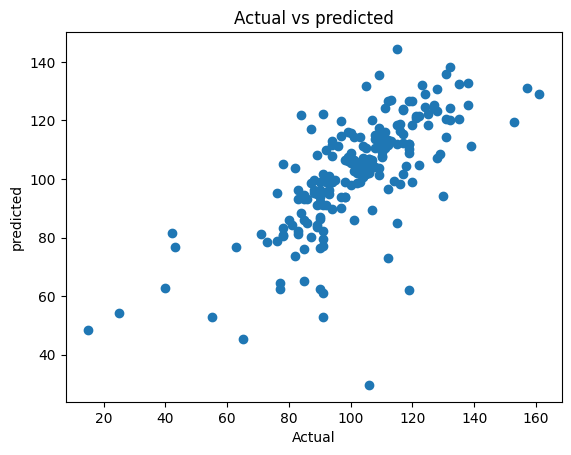

In [75]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test6, np.squeeze(model10.predict(X_test6)) )
print('r2_score:', r2_score)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test6, np.squeeze(model10.predict(X_test6)) )
mae= mean_absolute_error(Y_test6, np.squeeze(model10.predict(X_test6)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test6, np.squeeze(model10.predict(X_test6)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [76]:
prediction11 =np.squeeze(model10.predict([[80,2,2,129,prediction10]]))
print("Prediction: {}".format(prediction11))

y_prd=np.squeeze(np.squeeze(model10.predict(X_test6)) )
predic_dif=pd.DataFrame({'Actual':Y_test6,'predict':y_prd,"differences":Y_test6-y_prd})
predic_dif[0:15]

1/1 [==============================] - 0s 176ms/step
Prediction: 112.32808685302734
7/7 [==============================] - 0s 9ms/step


,Actual,predict,differences
1555,125,122.251686,2.748314
2288,94,111.723541,-17.723541
2116,107,119.993141,-12.993141
1677,121,121.560890,-0.560890
727,106,106.740402,-0.740402
1498,119,108.927505,10.072495
1891,132,124.138931,7.861069
1058,98,93.736168,4.263832
33,87,80.238632,6.761368
778,85,86.041702,-1.041702
